# Forbes 2000 Largest Companies Analysis (2019)

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install statistics
!{sys.executable} -m pip install csv
!{sys.executable} -m pip install re

ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics as stats
import csv
import re

Things to be fixed/updated:
- Both scrapers need to be updated
- Spider forbes2 needs to be fixed
- Country/Industry plot can be polished up if this project gets updated
- Update blog post and add to portfolio

### Import Scraped Data

In [4]:
forbes1 = pd.read_csv("Forbes1.csv", header = None)
forbes2 = pd.read_csv("Forbes2.csv", header = None)

### Set up data frame for analysis

In [5]:
forbes1.shape

(2001, 6)

In [6]:
forbes1.columns = ['Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value']

In [7]:
forbes1.head()

Company        Country     Sales  Profits      Assets  \
0                        ICBC          China  $165.3 B  $43.7 B  $4,210.9 B   
1     China Construction Bank          China  $143.2 B  $37.2 B  $3,631.6 B   
2              JPMorgan Chase  United States  $118.2 B  $26.5 B  $2,609.8 B   
3          Berkshire Hathaway  United States  $235.2 B  $39.7 B    $702.7 B   
4  Agricultural Bank of China          China  $129.3 B  $29.6 B  $3,439.3 B   

  Market Value  
0       $311 B  
1     $261.2 B  
2     $387.7 B  
3     $491.9 B  
4     $184.1 B

In [8]:
forbes2.shape

(2027, 7)

In [9]:
forbes2 = forbes2.drop_duplicates()

In [10]:
forbes2.shape    

(1998, 7)

In [11]:
forbes2.columns = ['CompRank', 'Market Capitalization', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees']

In [12]:
forbes2.head()

CompRank Market Capitalization             Industry  \
0                        #1 ICBC                 $311B          Major Banks   
1     #2 China Construction Bank               $261.2B          Major Banks   
2              #3 JPMorgan Chase               $387.7B          Major Banks   
3          #4 Berkshire Hathaway               $491.9B  Investment Services   
4  #5 Agricultural Bank of China               $184.1B       Regional Banks   

  Founded        Country        Chairman Employees  
0    1984          China          Shu Gu   453,048  
1    1954          China       Wang Zuji   352,621  
2    1968  United States     Jamie Dimon   252,539  
3    1955  United States  Warren Buffett   377,000  
4    1951          China       Huan Zhao   487,307

### Fix column names so that the data frames can be merged
CompRank combines the rank and name so they will be split and placed into separate columns

In [13]:
forbes2[["Rank", "Name"]] = forbes2['CompRank'].str.split(n = 1, expand = True)

forbes2 = forbes2.drop(['CompRank'], axis = 1)

forbes2.columns = ['Market Value', 'Industry', 'Founded', 'Country', 'Chairman', 'Employees', 'Rank', 'Company']

# Merge data frames
And fix columns

In [14]:
forbes = forbes2.merge(forbes1, on = 'Company')

forbes.columns

Index(['Market Value_x', 'Industry', 'Founded', 'Country_x', 'Chairman',
       'Employees', 'Rank', 'Company', 'Country_y', 'Sales', 'Profits',
       'Assets', 'Market Value_y'],
      dtype='object')

In [15]:
forbes = forbes.drop(["Market Value_x", "Country_x"], axis = 1)

In [16]:
cols = forbes.columns.tolist()
cols = ['Rank', 'Company', 'Country_y', 'Industry', 'Assets', 'Sales', 'Profits', 'Market Value_y', 'Employees', 'Founded', 'Chairman']

forbes = forbes[cols]

forbes = forbes.rename(columns = {'Country_y': 'Country', 'Market Value_y': 'Market Capitalization'})

In [17]:
forbes.shape

(1967, 11)

In [18]:
forbes.head()

Rank                     Company        Country             Industry  \
0   #1                        ICBC          China          Major Banks   
1   #2     China Construction Bank          China          Major Banks   
2   #3              JPMorgan Chase  United States          Major Banks   
3   #4          Berkshire Hathaway  United States  Investment Services   
4   #5  Agricultural Bank of China          China       Regional Banks   

       Assets     Sales  Profits Market Capitalization Employees Founded  \
0  $4,210.9 B  $165.3 B  $43.7 B                $311 B   453,048    1984   
1  $3,631.6 B  $143.2 B  $37.2 B              $261.2 B   352,621    1954   
2  $2,609.8 B  $118.2 B  $26.5 B              $387.7 B   252,539    1968   
3    $702.7 B  $235.2 B  $39.7 B              $491.9 B   377,000    1955   
4  $3,439.3 B  $129.3 B  $29.6 B              $184.1 B   487,307    1951   

         Chairman  
0          Shu Gu  
1       Wang Zuji  
2     Jamie Dimon  
3  Warren Buffett  
4       Huan Zhao

### Fix mismatched data
Some data was mismatched in the second scraper and unfortunately have to drop some rows because the webpage has been updated.

In [19]:
forbes['Employees'] = forbes['Employees'].astype(str)
forbesFix =  forbes.loc[forbes['Employees'].str.contains('[A-Za-z]')].index
forbes.drop(forbesFix, inplace=True)

In [20]:
forbes['Employees'] = forbes['Employees'].str.replace(",", "")
forbes["Employees"] = pd.to_numeric(forbes["Employees"])

In [21]:
forbes.shape

(1806, 11)

### Create function to convert dollar values

In [22]:
def convert_str_to_float(s):
    try:
        num, order = s.strip().split()
        num = float(num)
        if order == 'B':
            return num * 1000000000
        elif order == 'M':
            return num * 1000000
        else:
            pass
    except:
        pass

### Convert dollar values to float
Looks like $ may give you issues in a future python update

In [23]:
forbes['Assets'] = forbes['Assets'].str.replace(",", "")
forbes['Assets'] = forbes['Assets'].str.replace("$", "")
forbes['Assets'] = forbes['Assets'].apply(convert_str_to_float)

/tmp/ipykernel_25113/2453056257.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Assets'] = forbes['Assets'].str.replace("$", "")


In [24]:
forbes['Sales'] = forbes['Sales'].str.replace(",", "")
forbes['Sales'] = forbes['Sales'].str.replace("$", "")
forbes['Sales'] = forbes['Sales'].apply(convert_str_to_float)

/tmp/ipykernel_25113/2184177535.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Sales'] = forbes['Sales'].str.replace("$", "")


In [25]:
forbes['Profits'] = forbes['Profits'].str.replace(",", "")
forbes['Profits'] = forbes['Profits'].str.replace("$", "")
forbes['Profits'] = forbes['Profits'].apply(convert_str_to_float)

/tmp/ipykernel_25113/2489106819.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Profits'] = forbes['Profits'].str.replace("$", "")


In [26]:
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace(",", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace("$", "")
forbes['Market Capitalization'] = forbes['Market Capitalization'].apply(convert_str_to_float)

/tmp/ipykernel_25113/1217367912.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes['Market Capitalization'] = forbes['Market Capitalization'].str.replace("$", "")


##### Numerical vs Categorical features

In [27]:
forbes = forbes.apply(pd.to_numeric, errors='ignore')

numerical_features = forbes.dtypes[forbes.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = forbes.dtypes[forbes.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  6
Number of Categorical features:  5


In [28]:
print(categorical_features)

Index(['Rank', 'Company', 'Country', 'Industry', 'Chairman'], dtype='object')


In [29]:
print(numerical_features)

Index(['Assets', 'Sales', 'Profits', 'Market Capitalization', 'Employees',
       'Founded'],
      dtype='object')


### Fix Missing Values

In [30]:
total = forbes.isnull().sum().sort_values(ascending=False)
percent = (forbes.isnull().sum()/forbes.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Percent > 0]

Total   Percent
Assets                     3  0.001661
Market Capitalization      2  0.001107

In [31]:
forbes.loc[forbes['Assets'].isnull()]

Rank                Company  Country        Industry  Assets  \
824    #842  Infineon Technologies  Germany  Semiconductors     NaN   
1623  #1650          IndusInd Bank    India  Regional Banks     NaN   
1831  #1860         Bank of Greece   Greece     Major Banks     NaN   

             Sales       Profits  Market Capitalization  Employees  Founded  \
824   8.500000e+09  1.300000e+09           3.240000e+10      37479     1999   
1623  2.800000e+09  4.280000e+08           1.690000e+10      25314     1994   
1831  1.700000e+09  1.100000e+09           3.540000e+08       1864     1927   

                     Chairman  
824            Reinhard Ploss  
1623             Romesh Sobti  
1831  Konstantinos Michalidis

In [32]:
forbes.loc[forbes['Market Capitalization'].isnull()]

Rank                Company Country               Industry  \
1087  #1108        Hainan Airlines   China                Airline   
1227  #1250  Wanhua Chemical Group   China  Specialized Chemicals   

            Assets         Sales       Profits  Market Capitalization  \
1087  2.960000e+10  9.400000e+09  5.830000e+08                    NaN   
1227  1.060000e+10  8.300000e+09  1.900000e+09                    NaN   

      Employees  Founded  Chairman  
1087      24772     1989  Jian Sun  
1227       9165     1998   Yun Che

Not sure what to do with missing values yet. They are all in foreign companies and could just be due to lack of information. Imputing with the mean could be a good option.

##### One final transformation

In [33]:
lbls = ['1800s', '1810s', '1820s', '1830s', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s']

forbes['Decade'] = pd.cut(forbes.Founded, range(1800,2020,10), right=False, labels = lbls)

# Analysis

### Year Stuff
Start by grouping the data on 'Founded' and create a separate data frame for the top 20 so you can plot the results.

In [34]:
forbes_FoundedCount = forbes.groupby('Founded', as_index = False).count()

forbes_FoundedCount = forbes_FoundedCount.rename(columns = {'Rank': 'Number of Companies Founded'})
forbes_FoundedCount = forbes_FoundedCount.rename(columns = {'Founded': 'Year'})

forbes_FoundedCount = forbes_FoundedCount.sort_values(by = ['Number of Companies Founded'], ascending = False)

forbes_FoundedCountTop = forbes_FoundedCount.iloc[:20]

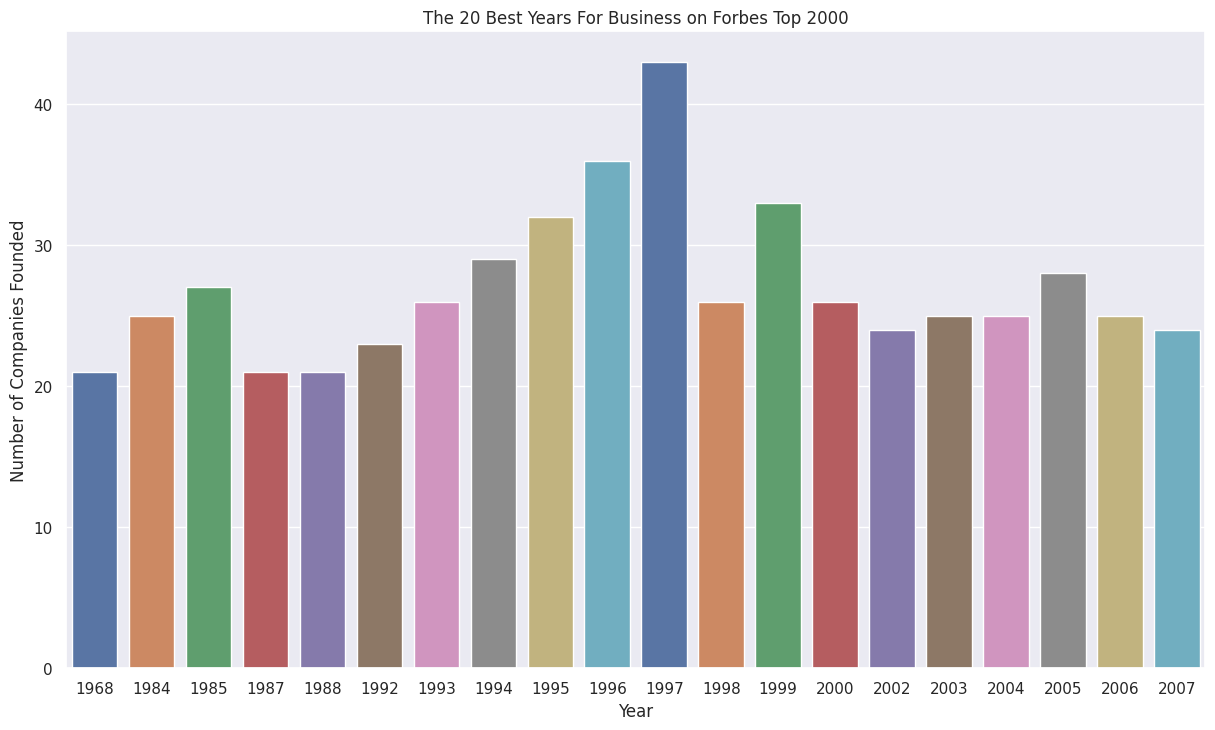

In [35]:
sns.set(rc={'figure.figsize':(14.7,8.27)})

founded_bar = sns.barplot(x = 'Year', y = 'Number of Companies Founded', data = forbes_FoundedCountTop, palette = 'deep').set_title("The 20 Best Years For Business on Forbes Top 2000")

##### We can see a huge boom in the 1990's as well as the 2000's.  Lets see if the same is true for the US

In [36]:
forbes_US = pd.DataFrame(data = forbes.loc[forbes["Country"] == "United States"])

forbes_USFounded = forbes_US.groupby('Founded', as_index = False).count().sort_values(by = 'Rank', ascending = False).iloc[:20]

forbes_USFounded = forbes_USFounded.rename(columns = {'Rank': 'Number of Companies Founded'})
forbes_USFounded = forbes_USFounded.rename(columns = {'Founded': 'Year'})

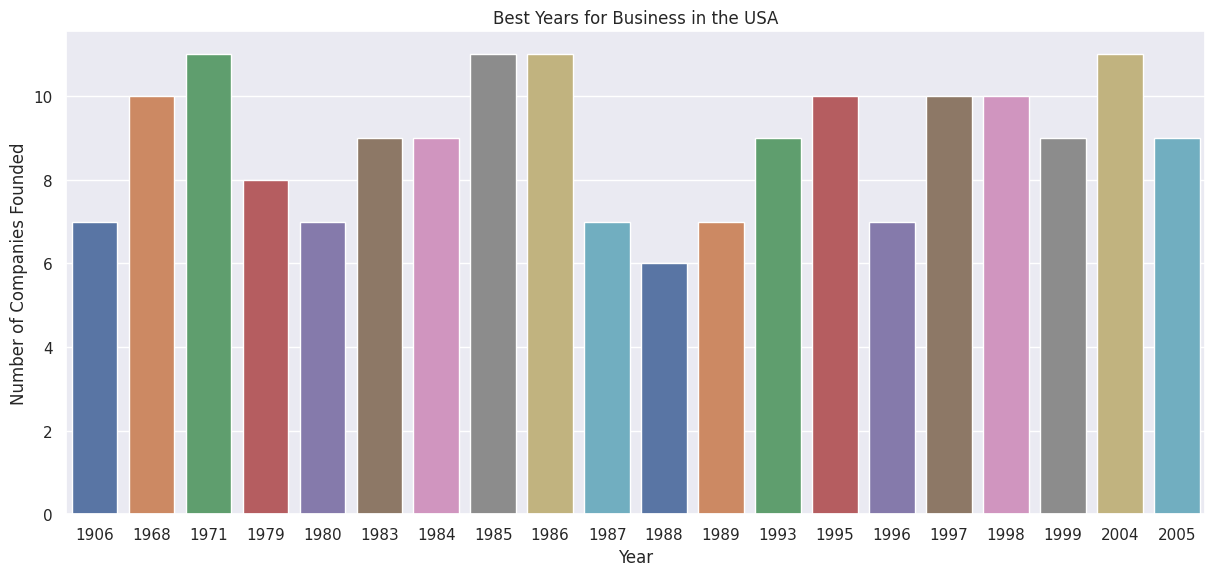

In [37]:
sns.set(rc={'figure.figsize':(14.7, 6.27)})

USfounded_bar = sns.barplot(x = 'Year', y = 'Number of Companies Founded', data = forbes_USFounded, palette='deep').set_title("Best Years for Business in the USA")

We can see the US was booming in the 90s as well, but was also booming in the 80s and 70s.

##### Lets compare each decade to see when the biggest chunk of these companies were founded.

In [38]:
forbes_FoundedDecade = pd.DataFrame(data=forbes)

lbls = ['1800s', '1810s', '1820s', '1830s', '1840s', '1850s', '1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s']
forbes_FoundedDecade['Decade'] = pd.cut(forbes.Founded, range(1800,2020,10), right=False, labels = lbls)

In [39]:
forbes_FoundedDecade = forbes_FoundedDecade.groupby('Decade', as_index = False).count()

forbes_FoundedDecade = forbes_FoundedDecade.rename(columns = {'Rank': 'Number of Companies Founded'})

forbes_FoundedDecade = forbes_FoundedDecade.sort_values(by = ['Decade'], ascending = False)

forbes_FoundedDecadeTop = forbes_FoundedDecade.iloc[:20]

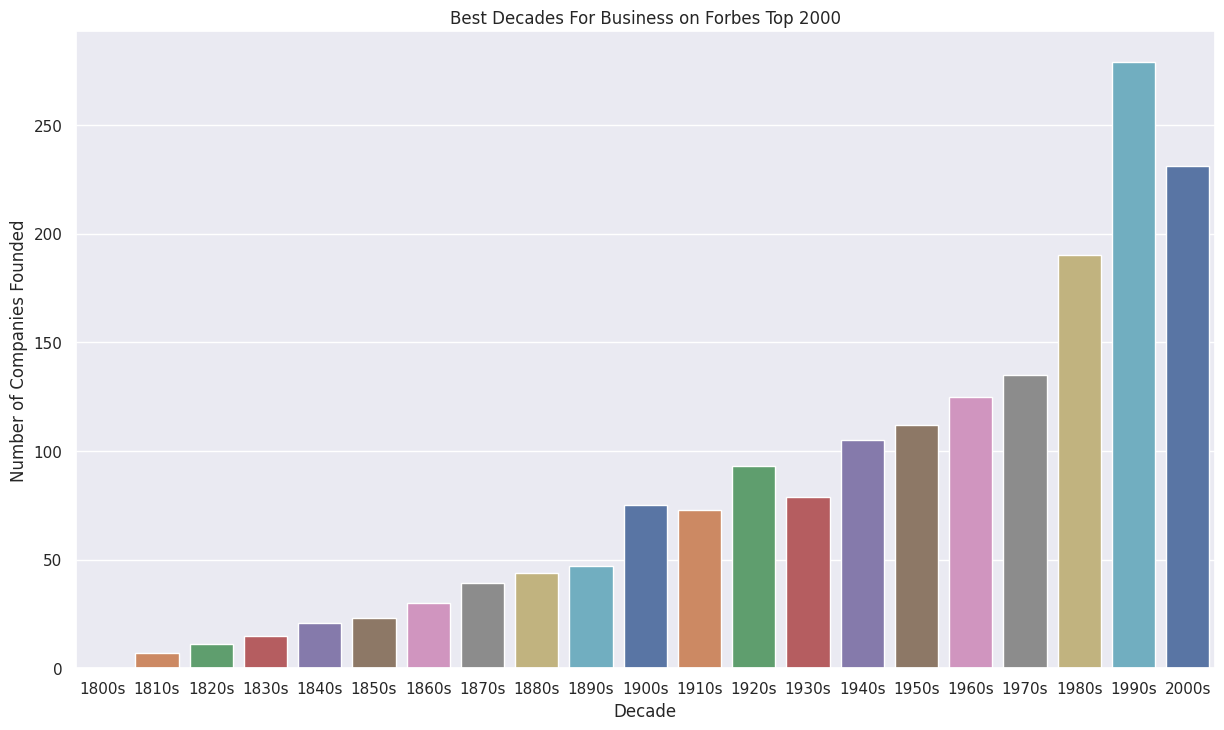

In [40]:
sns.set(rc={'figure.figsize':(14.7,8.27)})

founded_bar = sns.barplot(x = 'Decade', y = 'Number of Companies Founded', data = forbes_FoundedDecadeTop, palette = 'deep').set_title("Best Decades For Business on Forbes Top 2000")

This confirms my suspicions that the 90's were in fact the greatest decade of all time.

The dip in the 2000s could be due to multiple different factors. It may not even be due to a decline in economic activity, but due to the fact that they were founded so recently and are still growing substantially.

### Group by country:

In [41]:
forbes_Country = forbes.groupby('Country', as_index = False).count()

forbes_Country = forbes_Country.rename(columns = {'Rank': 'Number of Companies Founded'})

cols = ['Country', 'Number of Companies Founded']
forbes_CountryTop = forbes_Country[cols].sort_values('Number of Companies Founded', ascending = False).iloc[:20]

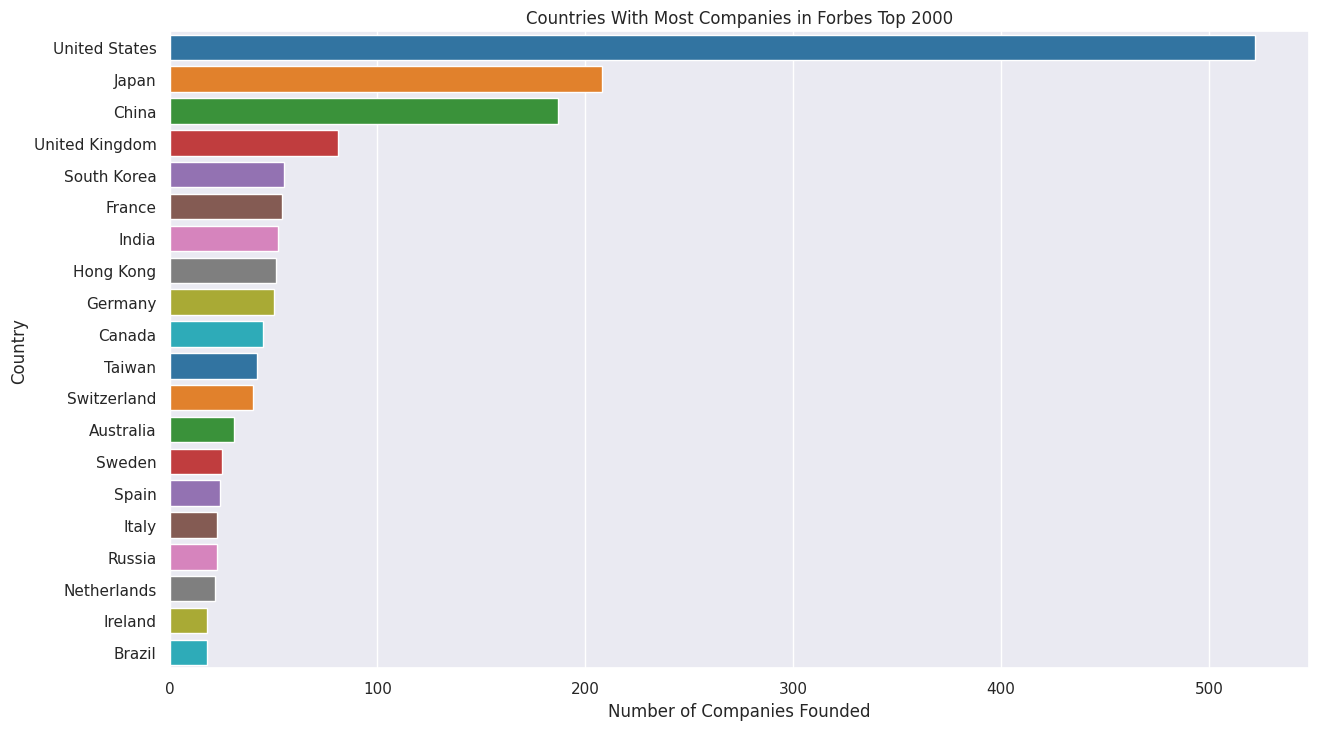

In [42]:
sns.set(rc={'figure.figsize':(14.7,8.27)})

country_bar = sns.barplot(x = 'Number of Companies Founded', y = 'Country', data = forbes_CountryTop, orient = 'h', palette = 'tab10').set_title("Countries With Most Companies in Forbes Top 2000")

##### Grouping by country and decade: 
Comparing how the top four of the previous chart compare over the decades

In [43]:
forbes_UJCU = pd.DataFrame(data = forbes.loc[forbes['Country'].isin(["United States", "Japan", "China", "United Kingdom"])])

In [44]:
forbes_UJCU = forbes_UJCU.groupby(['Country', 'Decade'], as_index = False).size()
forbes_UJCU = forbes_UJCU.rename(columns = {'size': 'Number of Companies Founded'})

In [45]:
forbes_UJCU

Country Decade  Number of Companies Founded
0           China  1800s                            0
1           China  1810s                            0
2           China  1820s                            0
3           China  1830s                            0
4           China  1840s                            0
..            ...    ...                          ...
79  United States  1960s                           37
80  United States  1970s                           44
81  United States  1980s                           77
82  United States  1990s                           69
83  United States  2000s                           48

[84 rows x 3 columns]

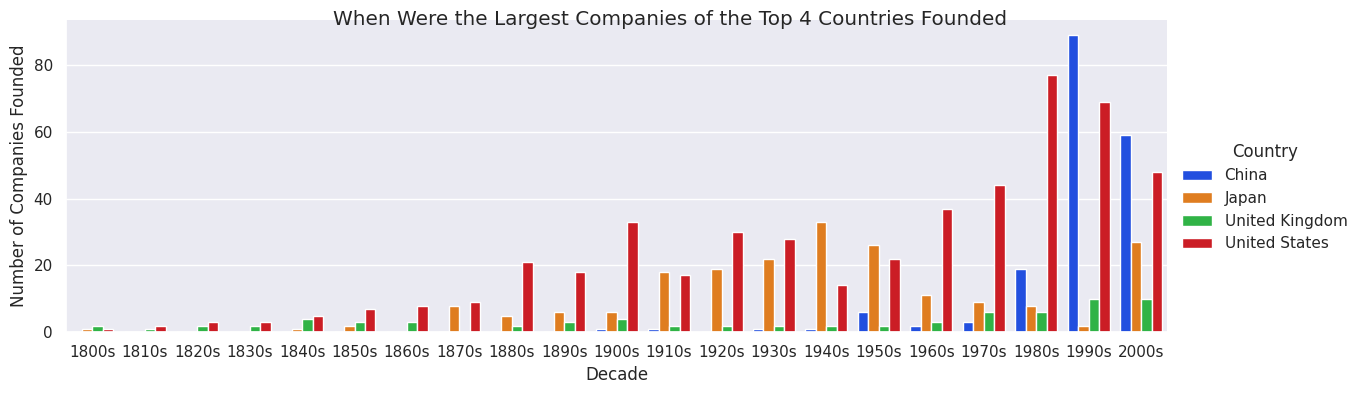

In [46]:
ujcu = sns.catplot(data = forbes_UJCU, kind = "bar", x = "Decade", y = "Number of Companies Founded", hue = "Country", palette = "bright", aspect = 3, height = 4)
ujcu.fig.suptitle("When Were the Largest Companies of the Top 4 Countries Founded")
ujcu.legend.set_title("Country")

In [47]:
forbes_top10 = pd.DataFrame(data = forbes_CountryTop)
forbes_top10 = forbes_CountryTop.sort_values('Number of Companies Founded', ascending = False).iloc[:10]
top_countries = list(forbes_top10.Country)
decades = list(forbes_UJCU.Decade.unique())

In [48]:
forbes_decade_country = pd.DataFrame(data = forbes.loc[forbes['Country'].isin(top_countries)])
forbes_decade_country = forbes_decade_country.groupby(['Decade', 'Country'], as_index = False).size()
forbes_decade_country = forbes_decade_country.rename(columns = {'size': 'Number of Companies Founded'})

<Axes: xlabel='Decade', ylabel='Number of Companies Founded'>

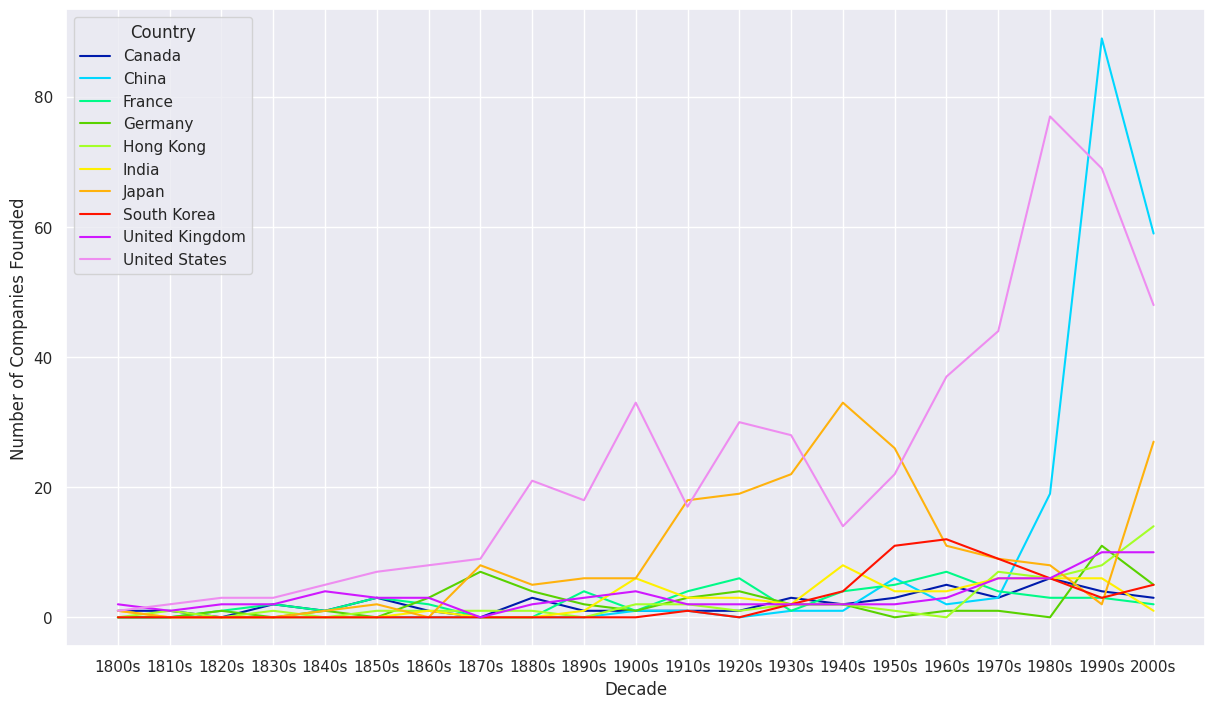

In [49]:
sns.lineplot(x = 'Decade', y = 'Number of Companies Founded', data = forbes_decade_country, hue = 'Country', palette = 'gist_ncar')

US has been dominant but Japan gave the US some competition throughout the 1900s. Then in the 1990's China emerged as the dominant presence on Forbes Top 2000.

Good place to summarize

##### Biggest Industries In America Over the Decades

Was there a particular industry in this time period that made America have so many large companies come into existence?

In [50]:
# Find Americas top industries

forbes_US = pd.DataFrame(data = forbes.loc[forbes["Country"] == "United States"])

forbes_USIndustryTop = forbes_US.groupby(['Industry'], as_index = False).count().sort_values('Rank', ascending = False).iloc[:20]

top_industries = list(forbes_USIndustryTop.Industry.unique())

forbes_US = forbes_US.groupby(['Decade', 'Industry'], as_index = False).size().rename(columns = {'size': 'Number of Companies'})

forbes_US = forbes_US.rename(columns = {'size': 'Number of Companies Founded'})

decades = list(forbes_US.Decade.unique())

In [51]:
##### Make the plots show exactly all of the nonzero data #####

/tmp/ipykernel_25113/3615758966.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


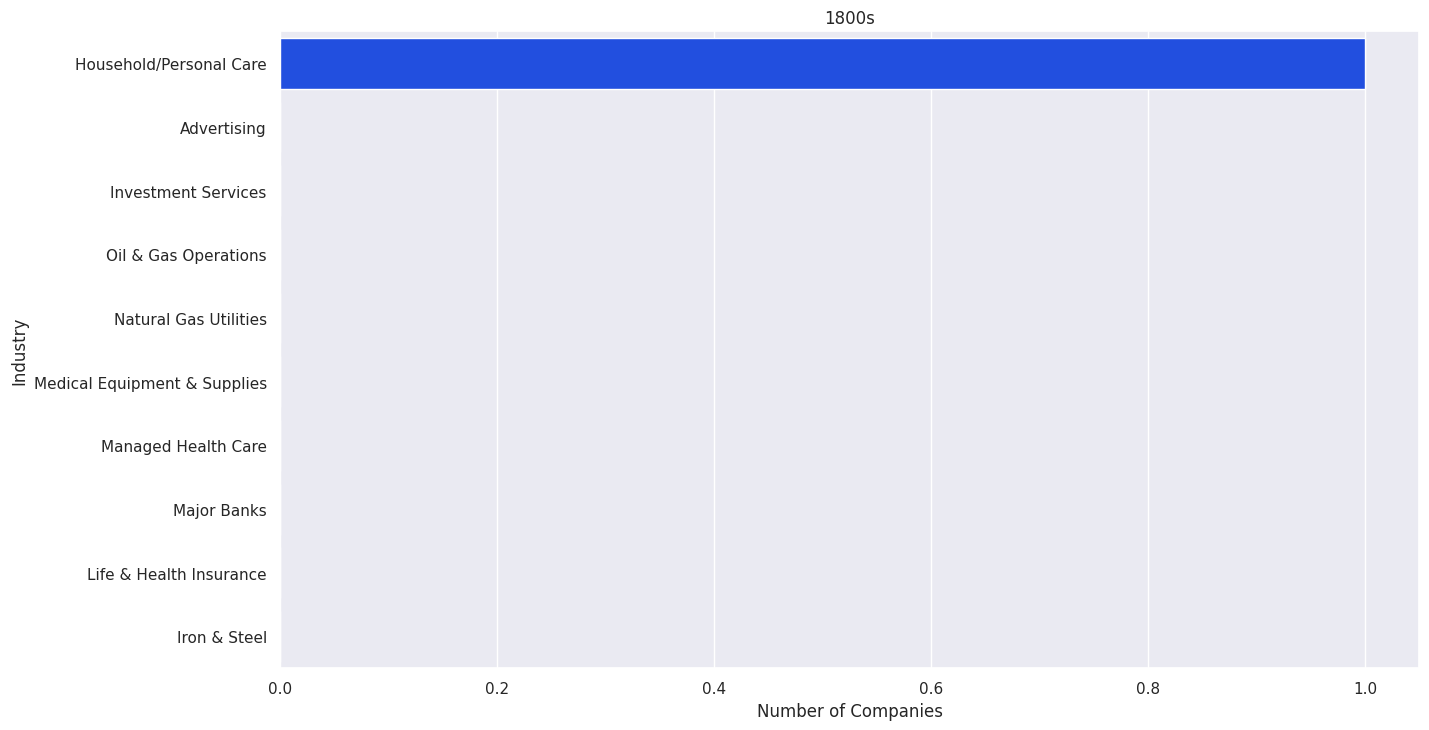

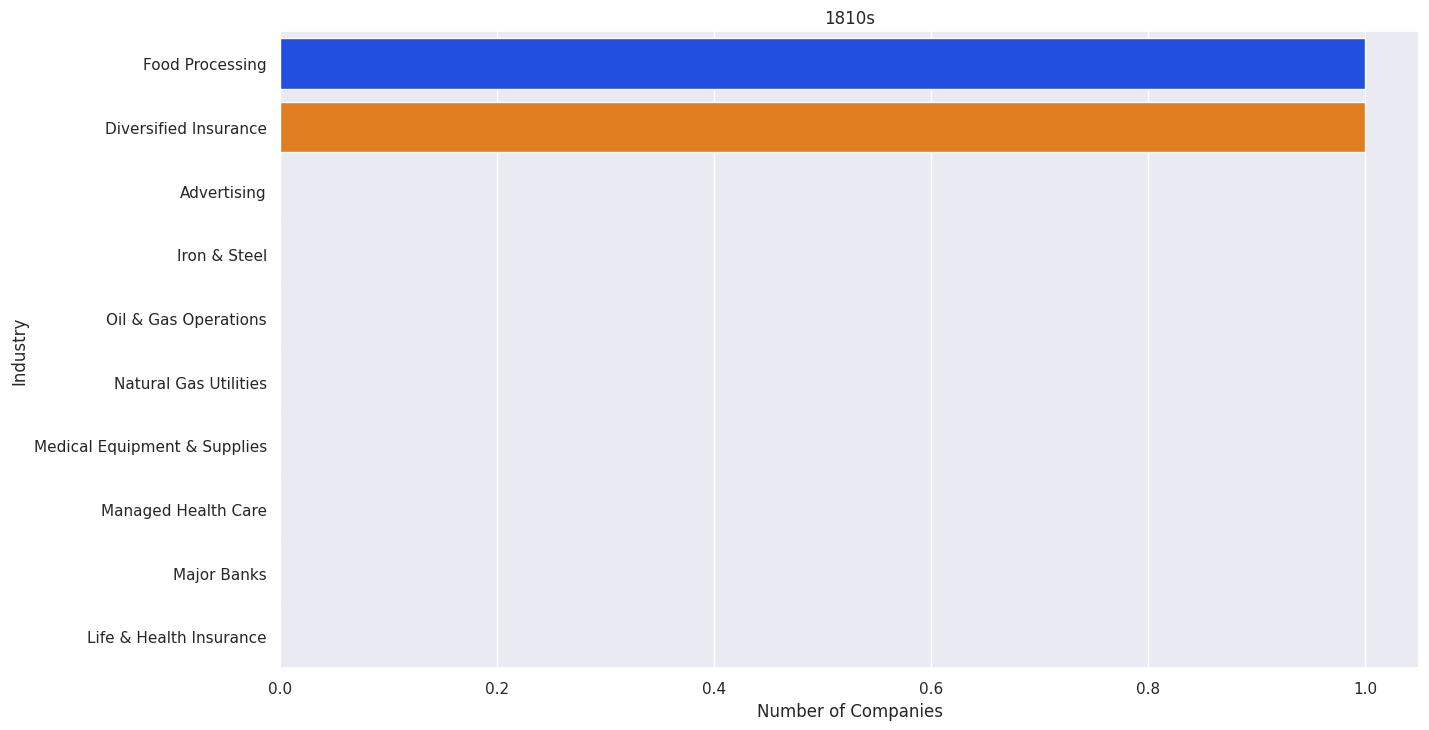

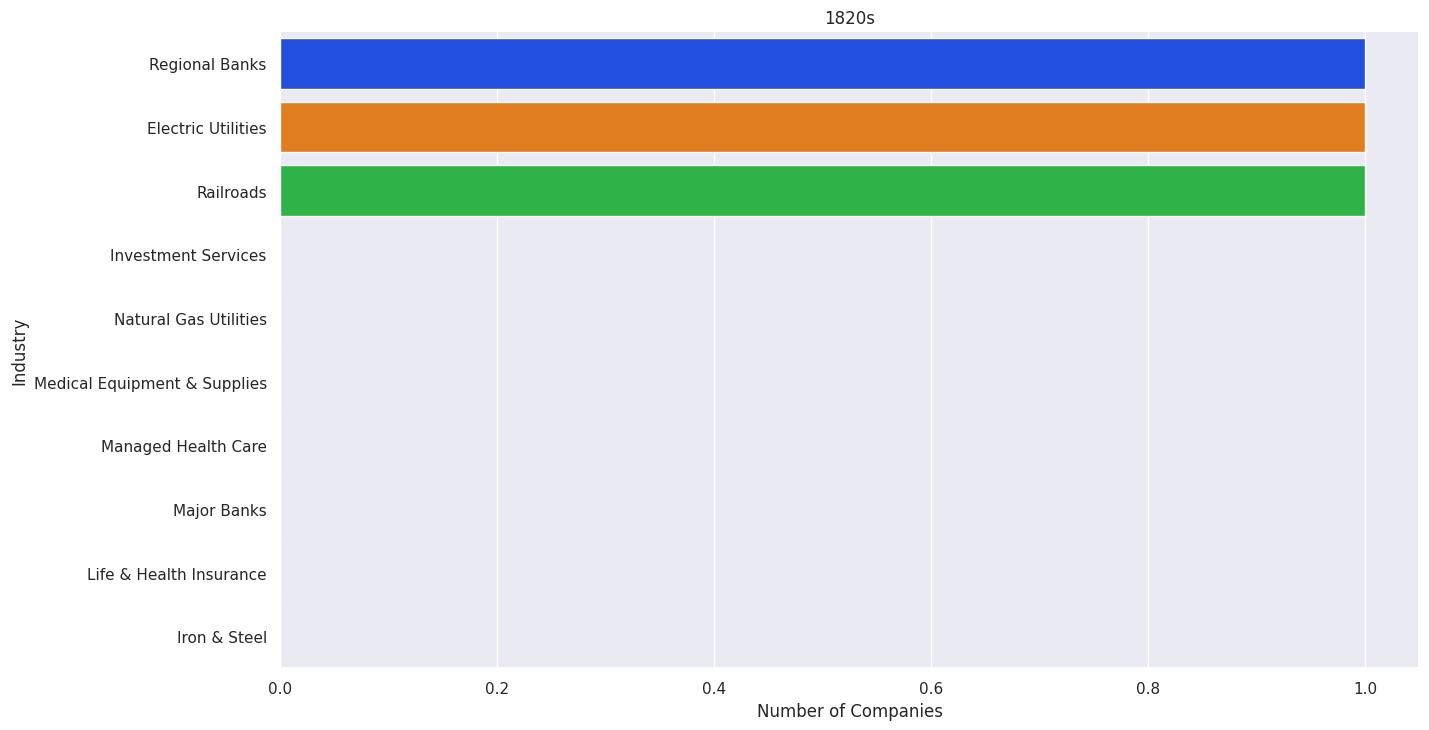

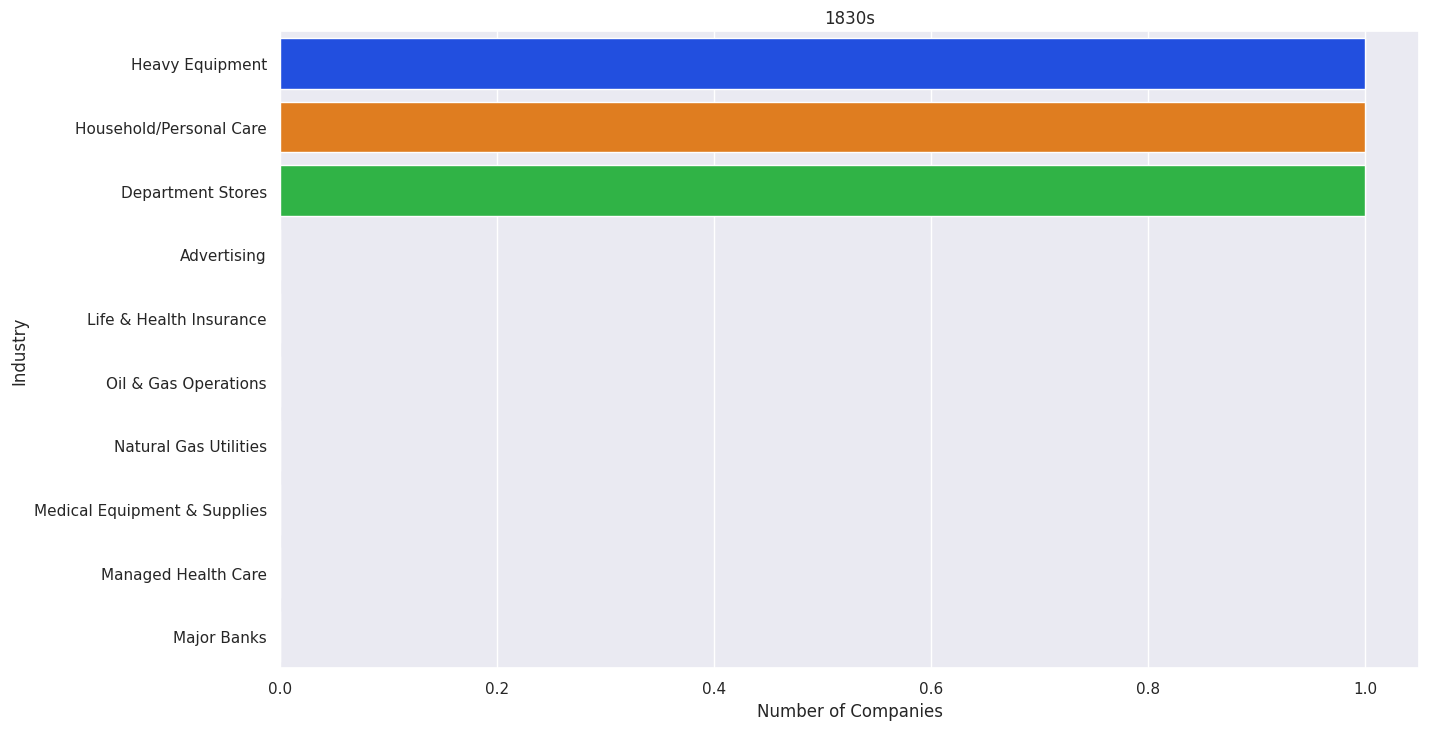

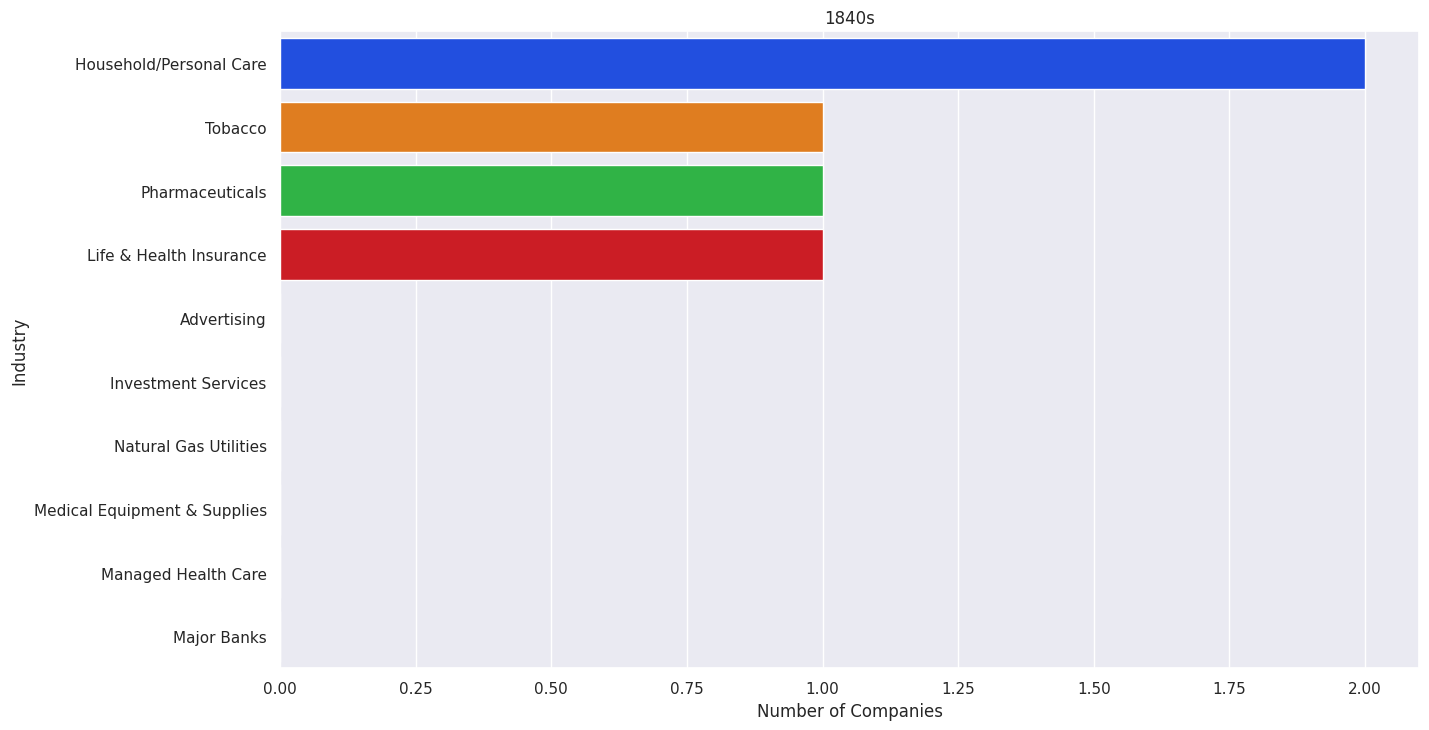

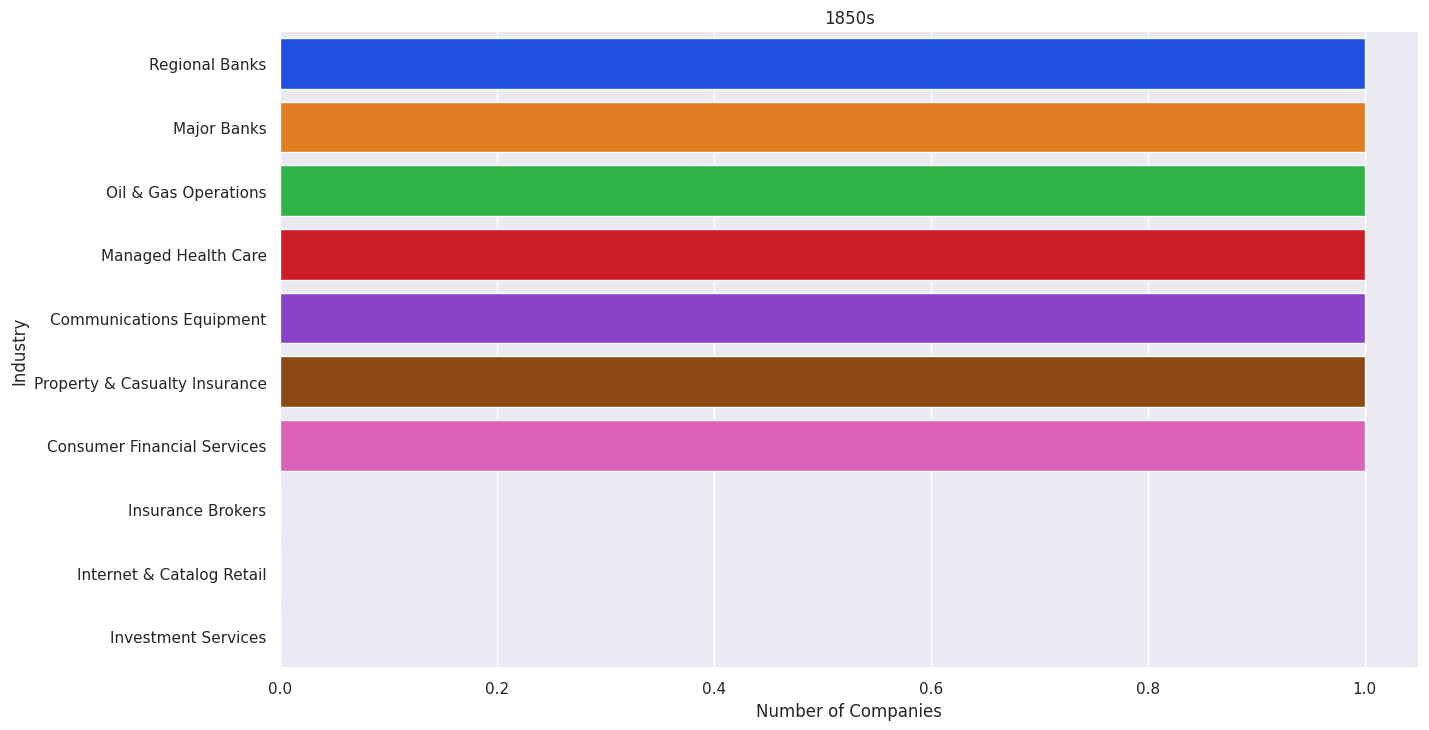

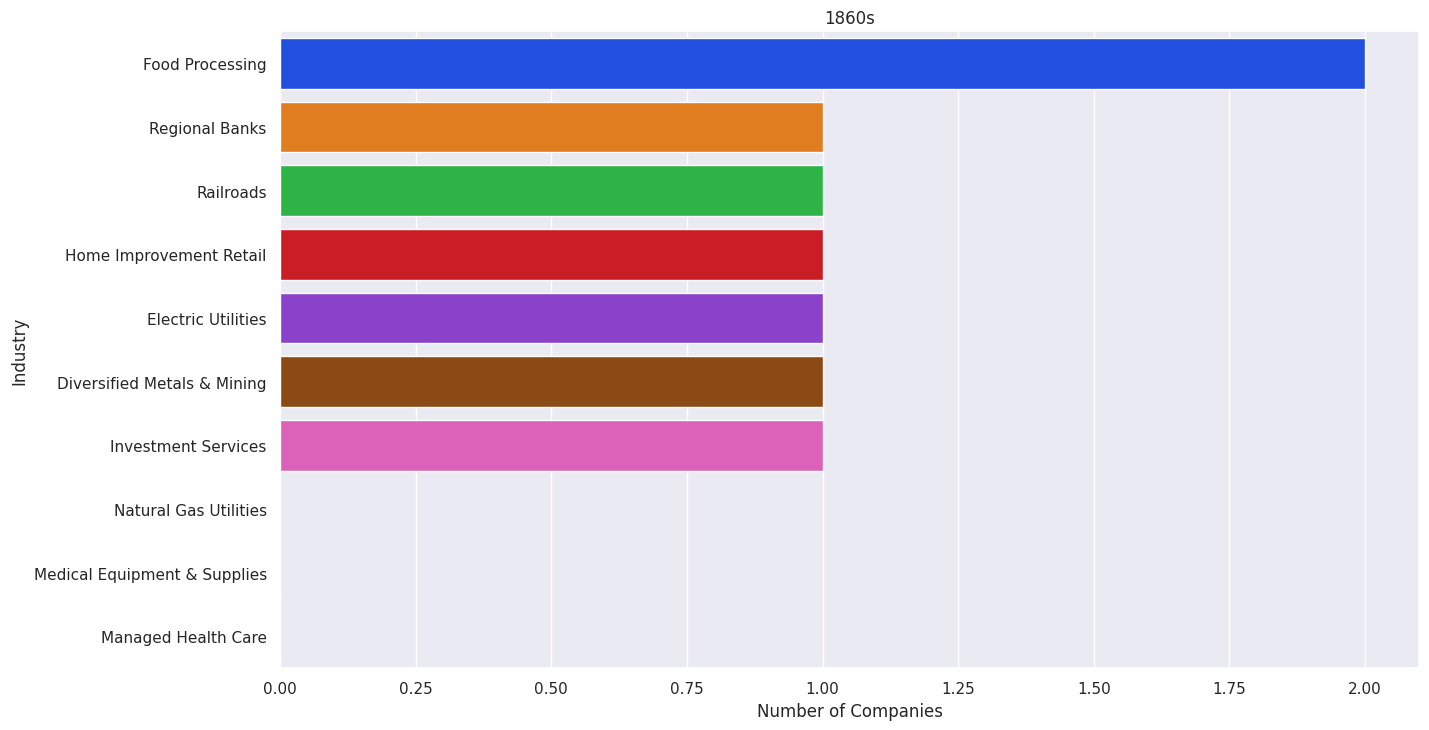

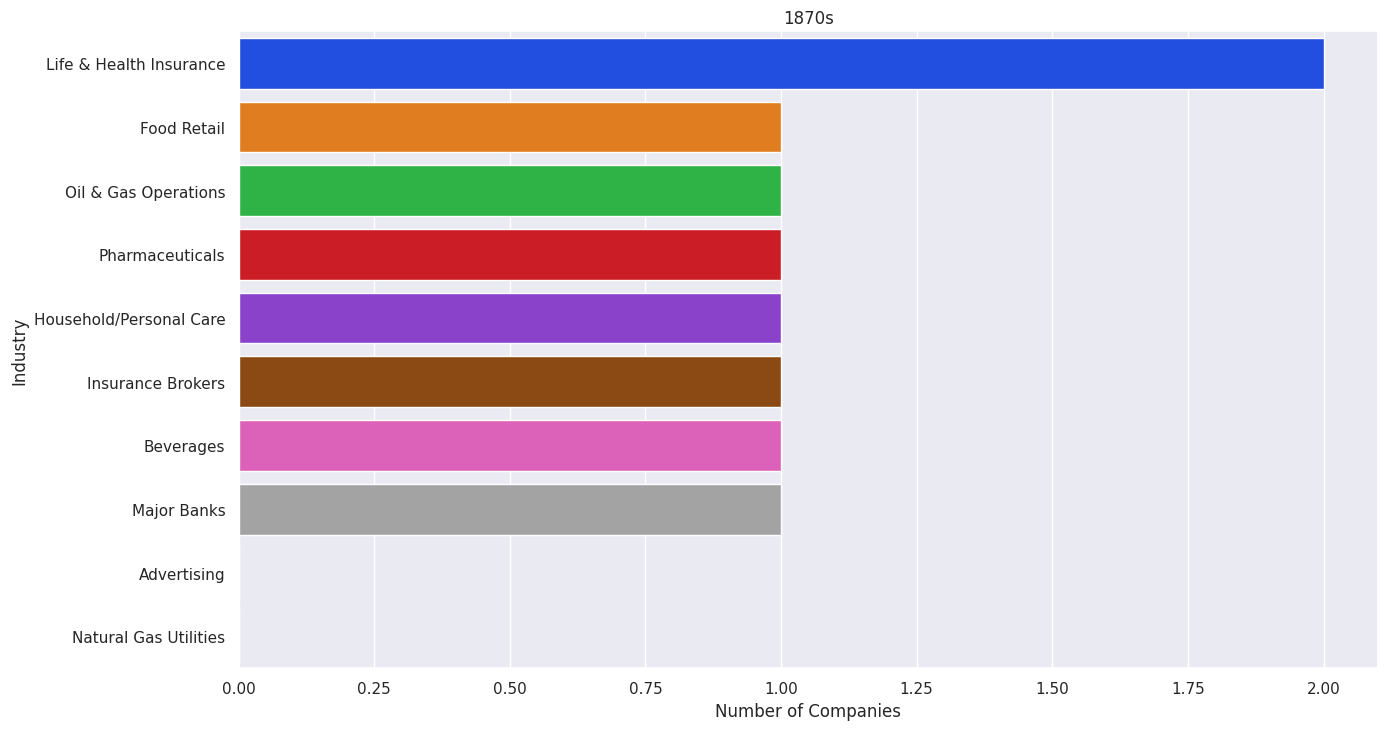

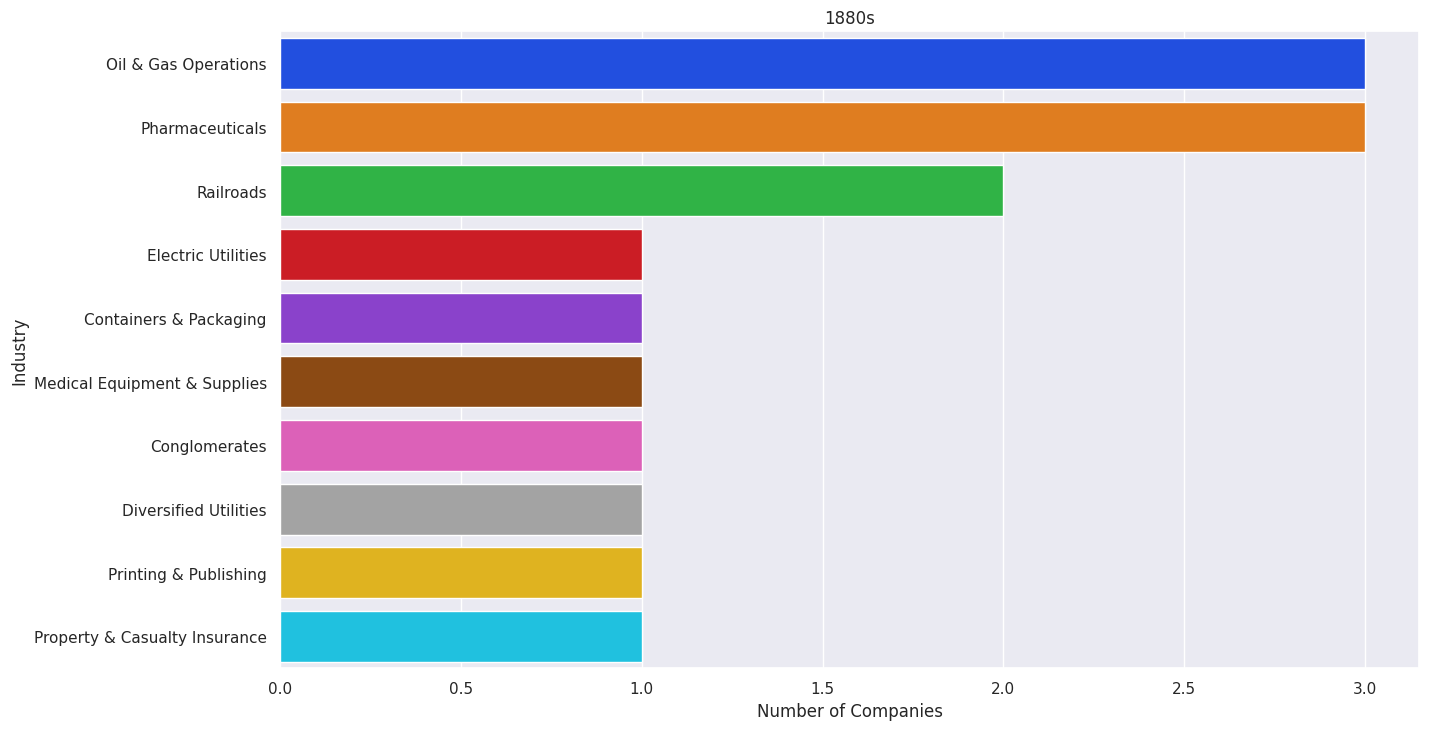

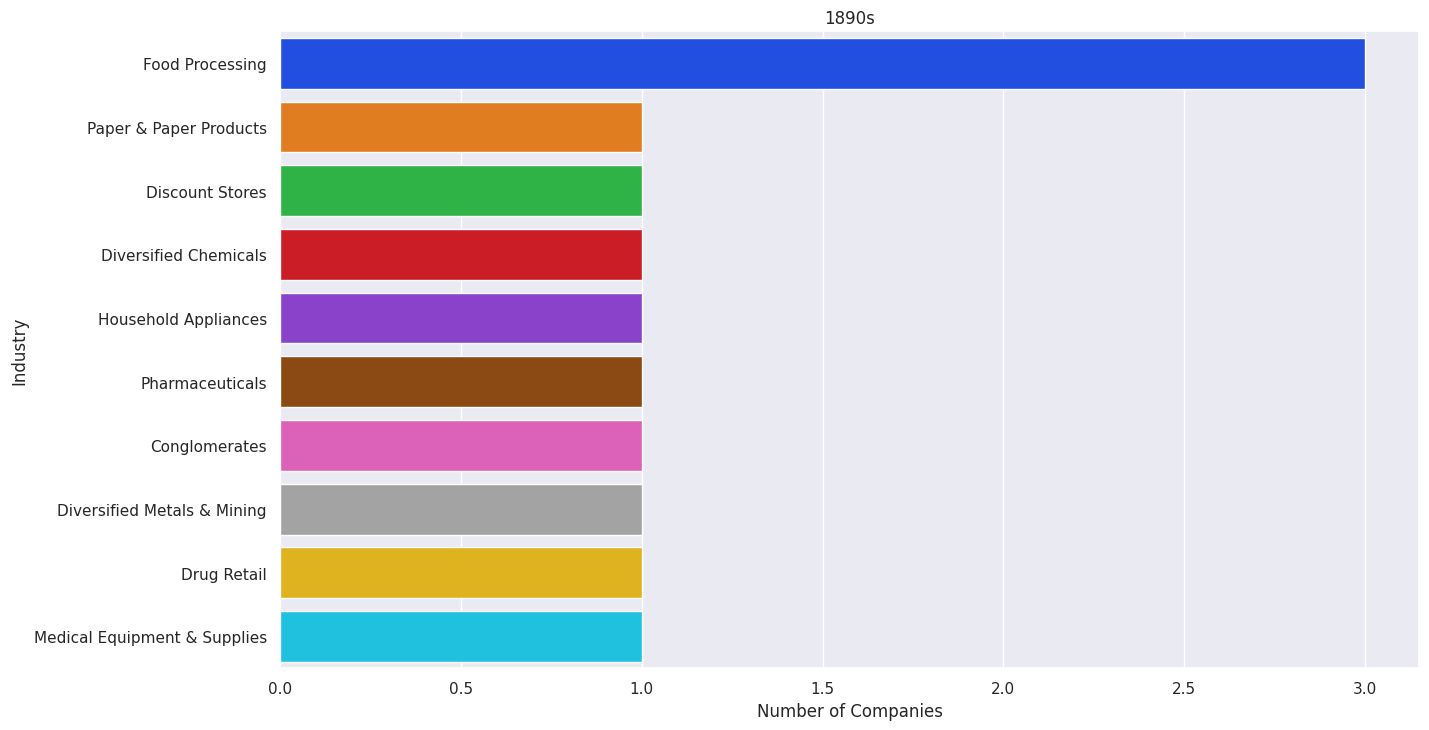

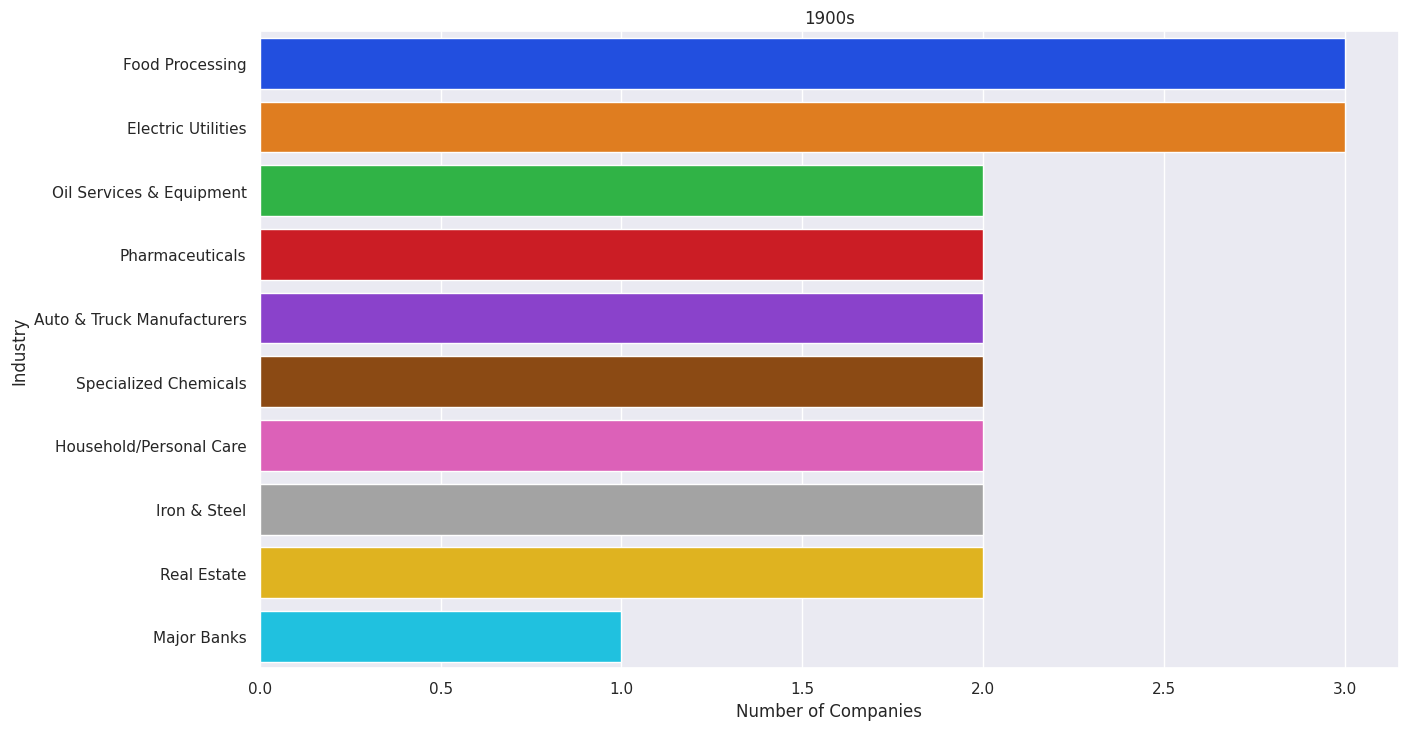

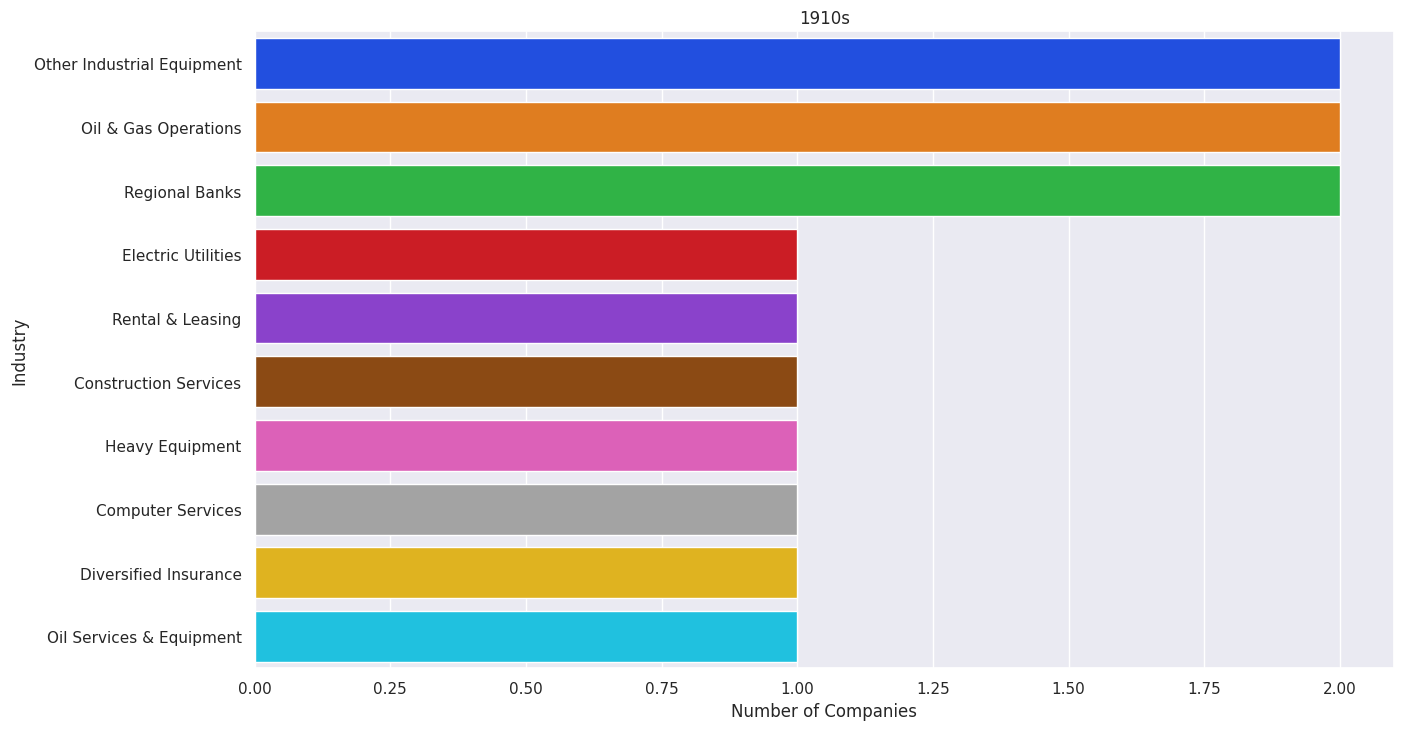

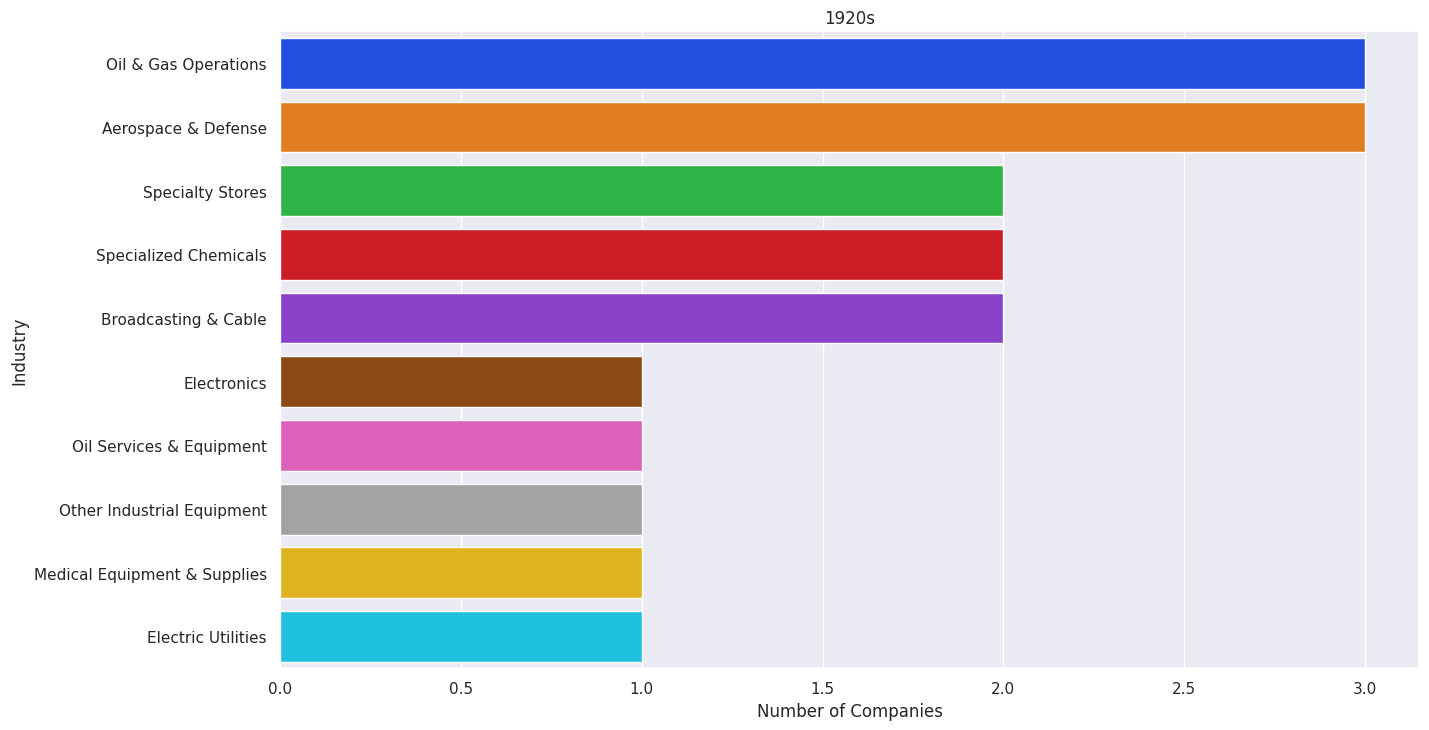

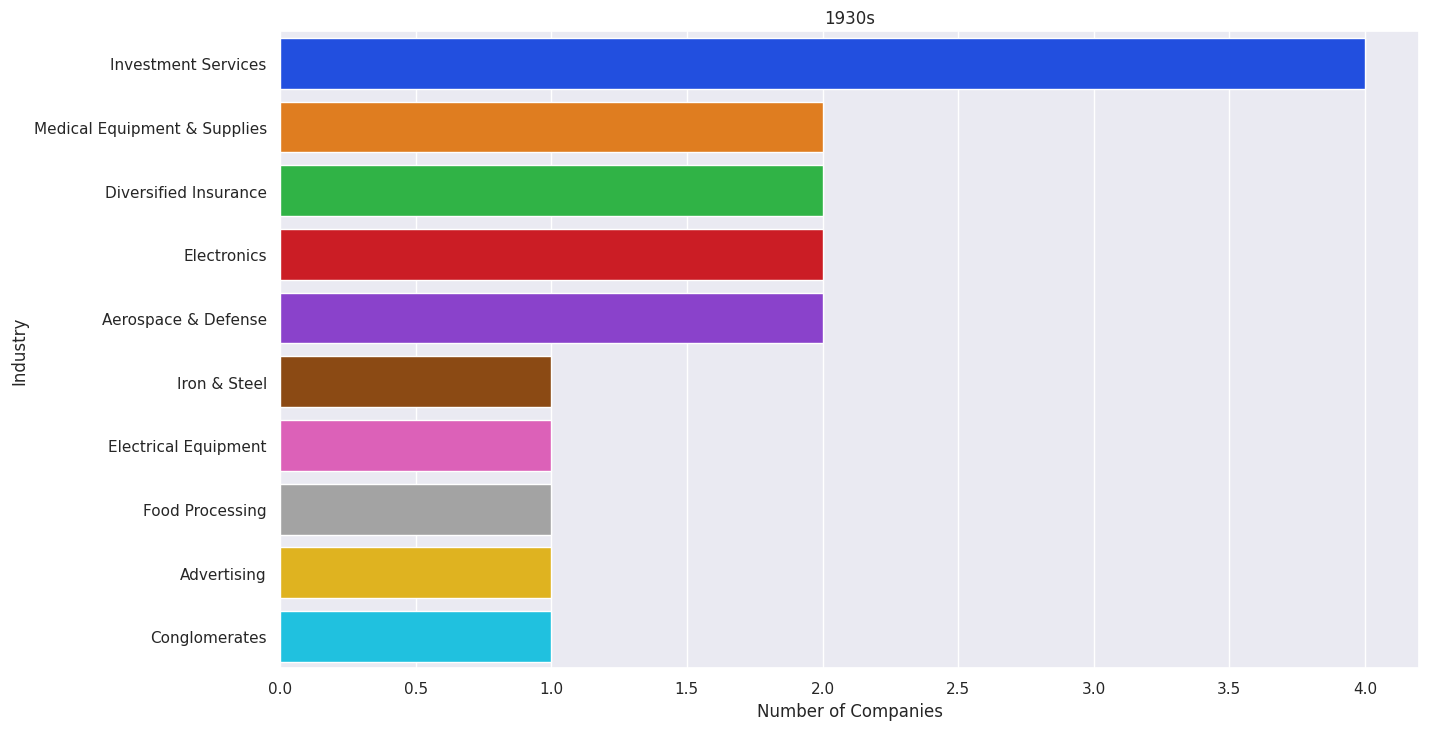

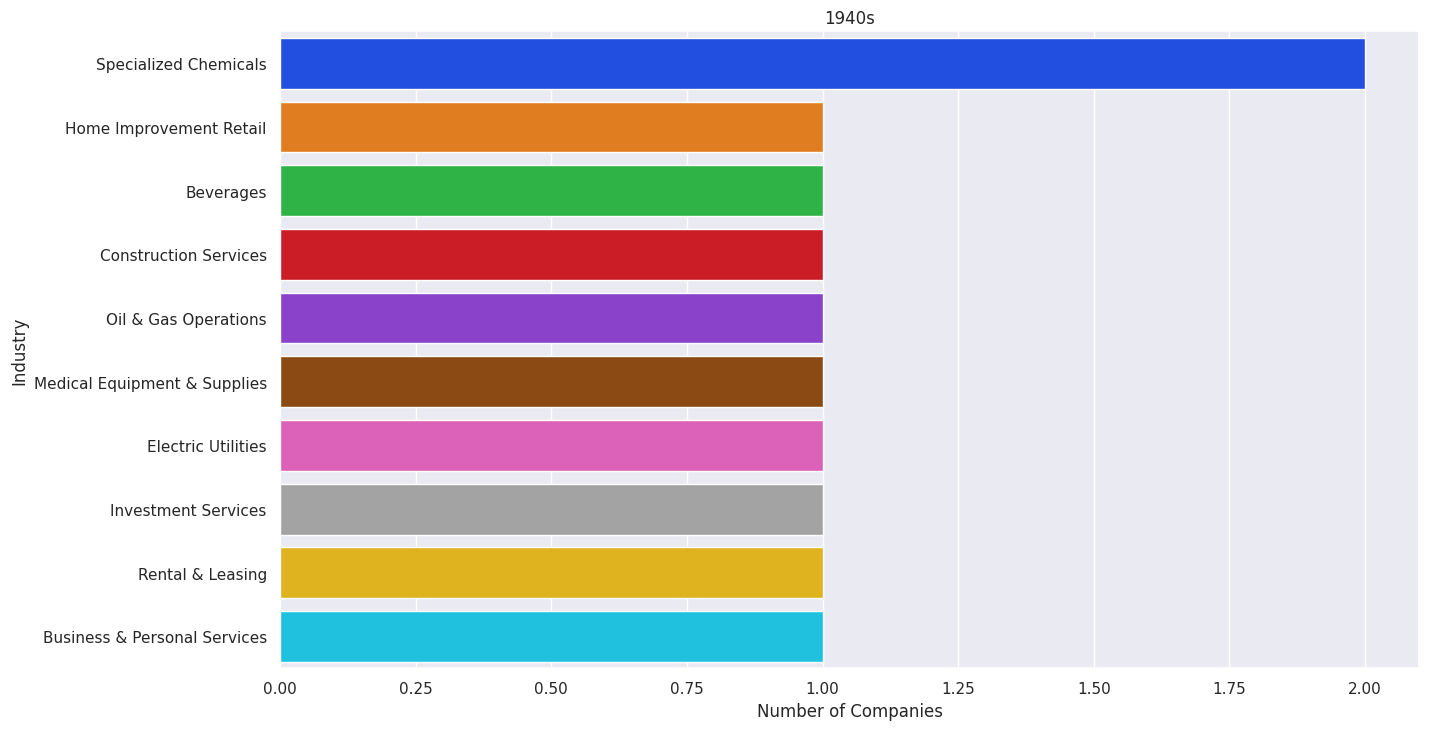

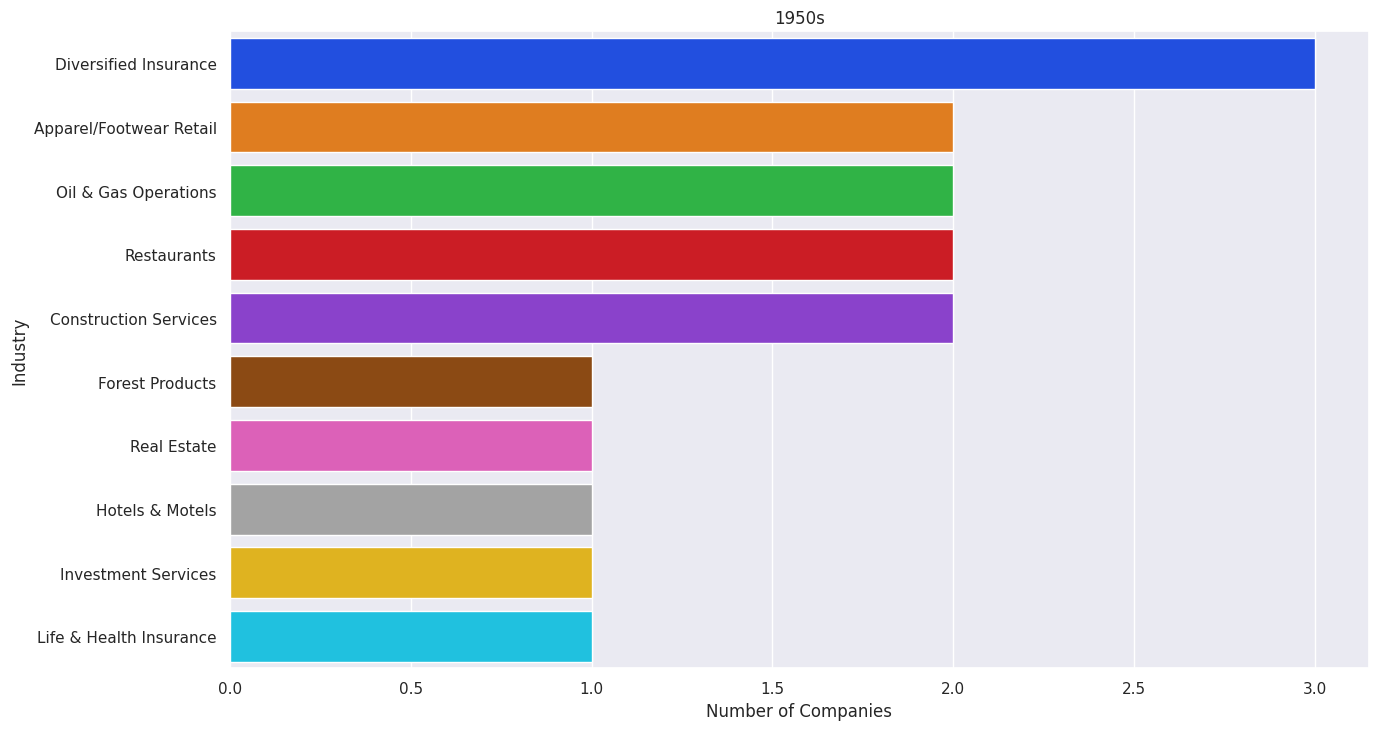

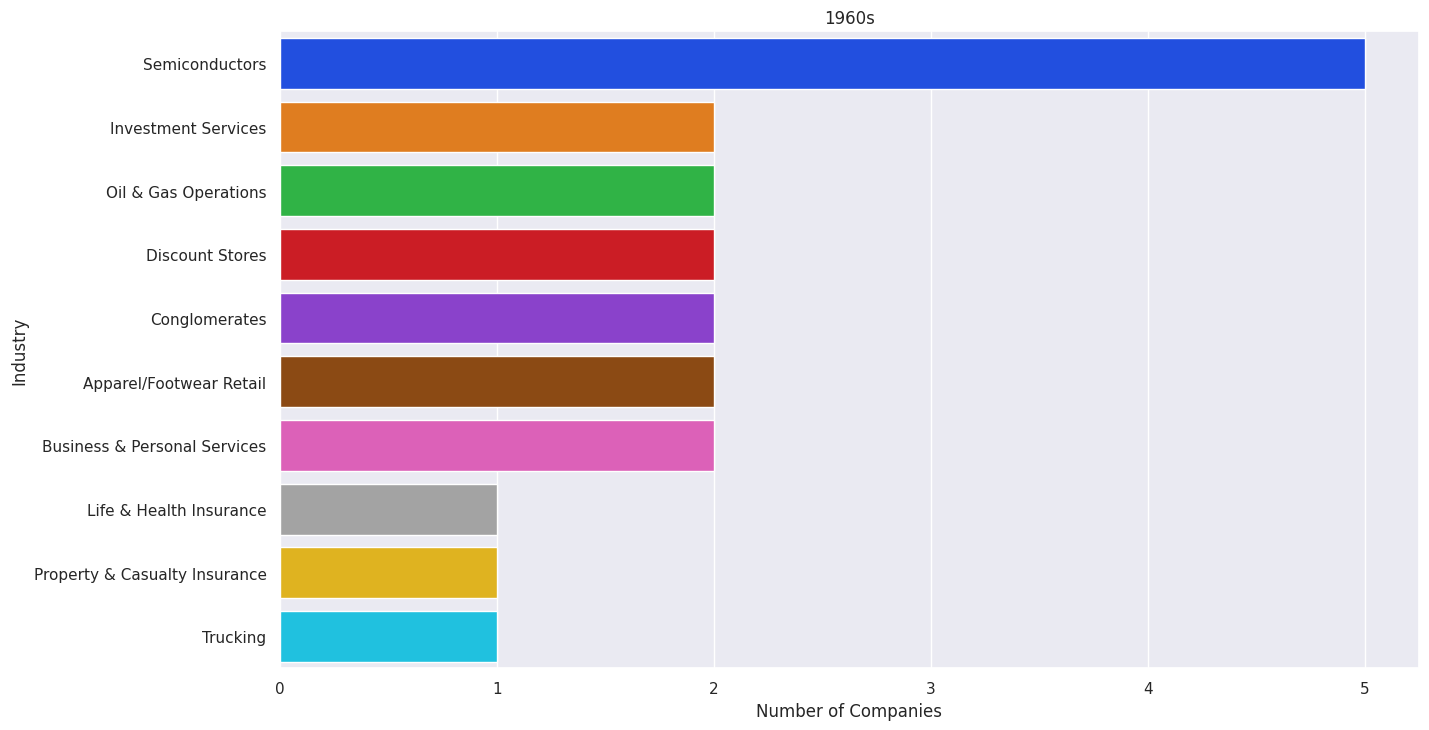

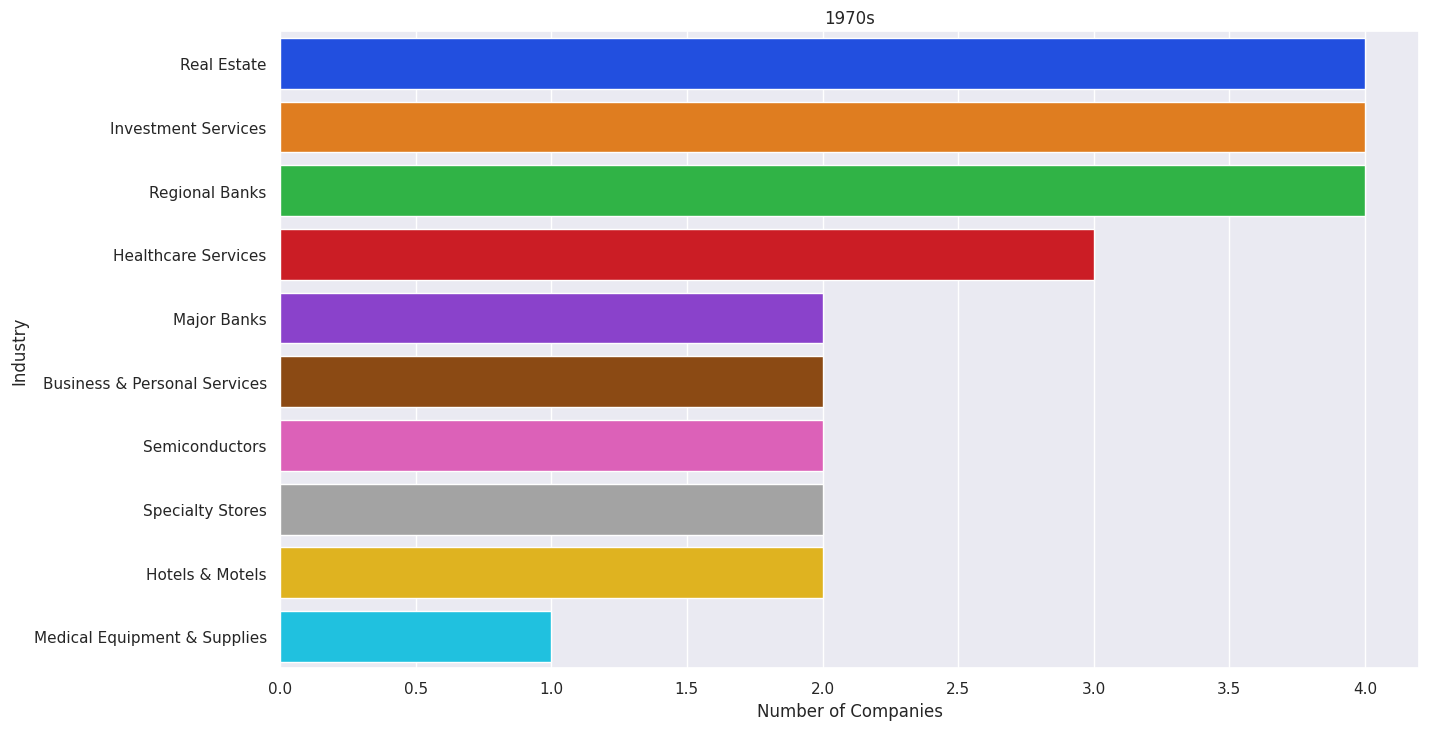

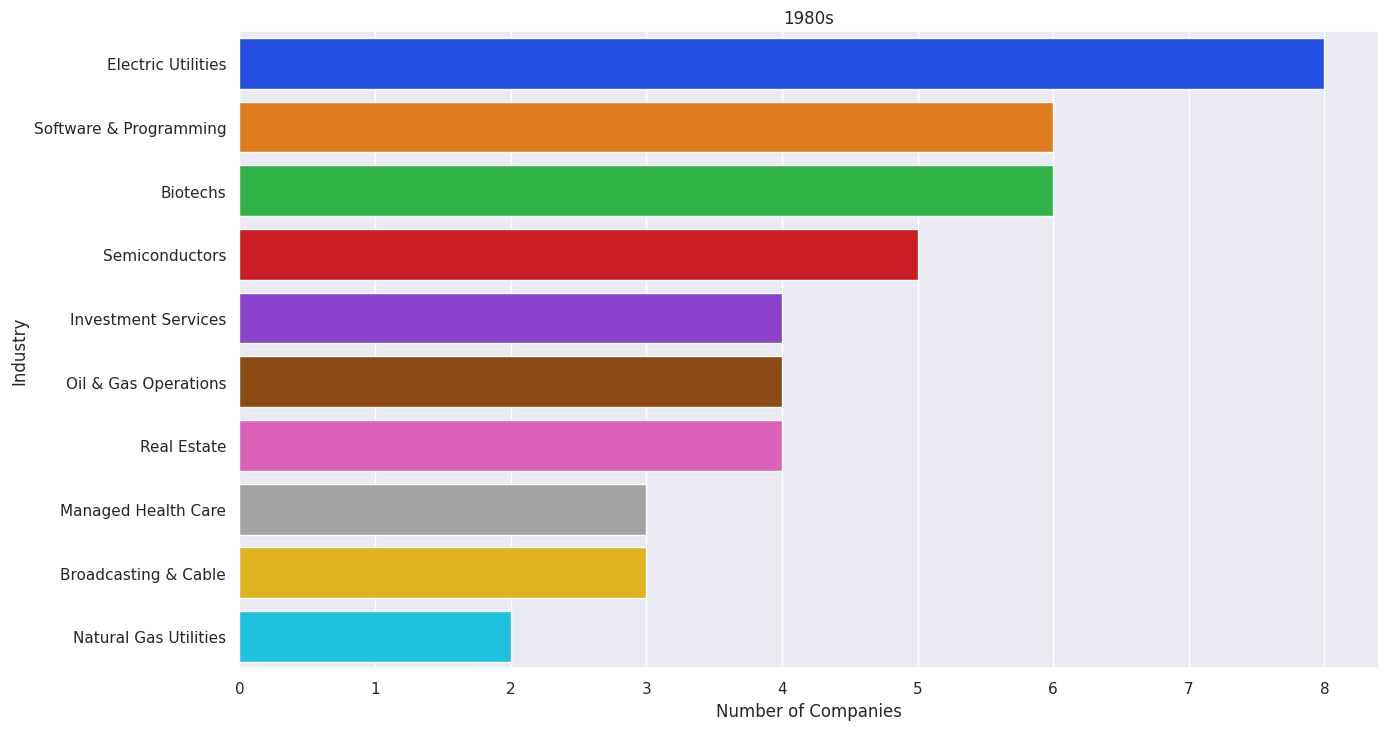

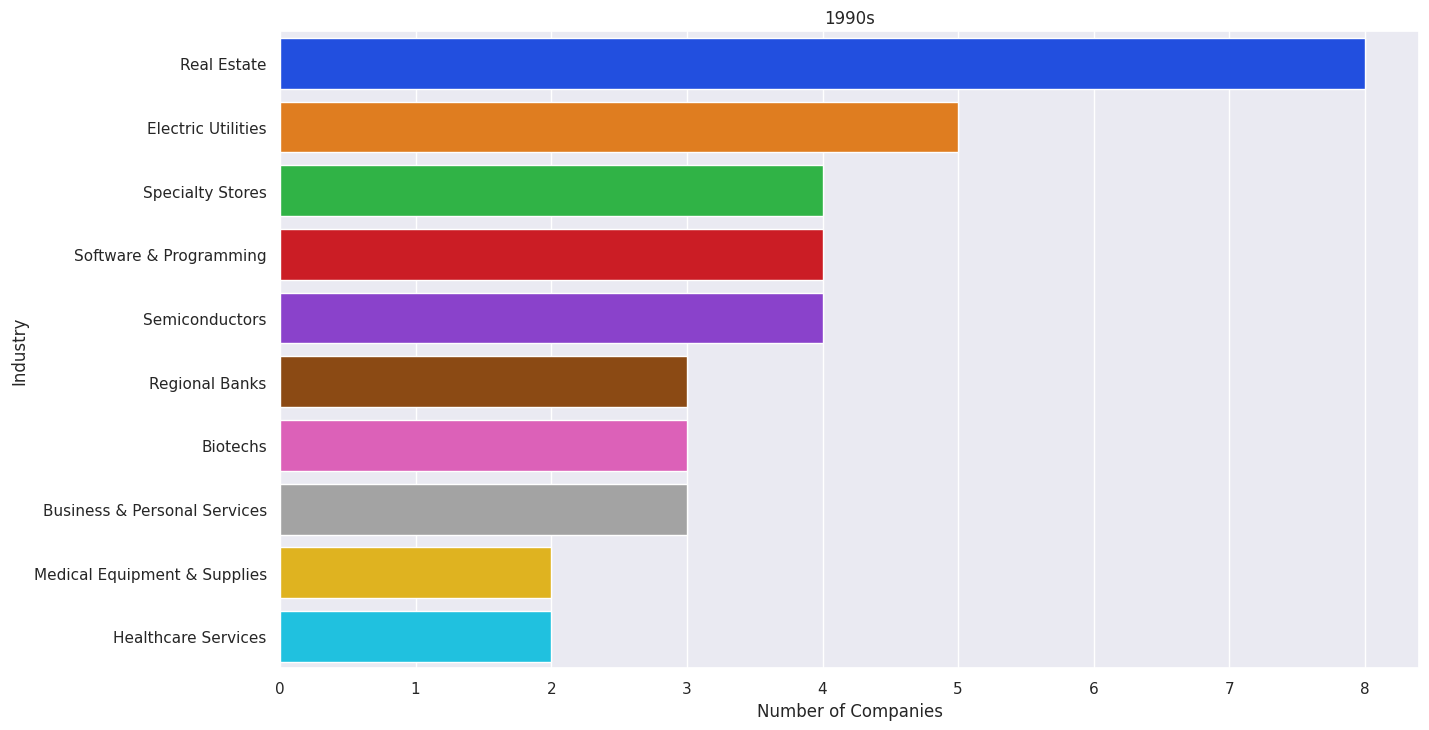

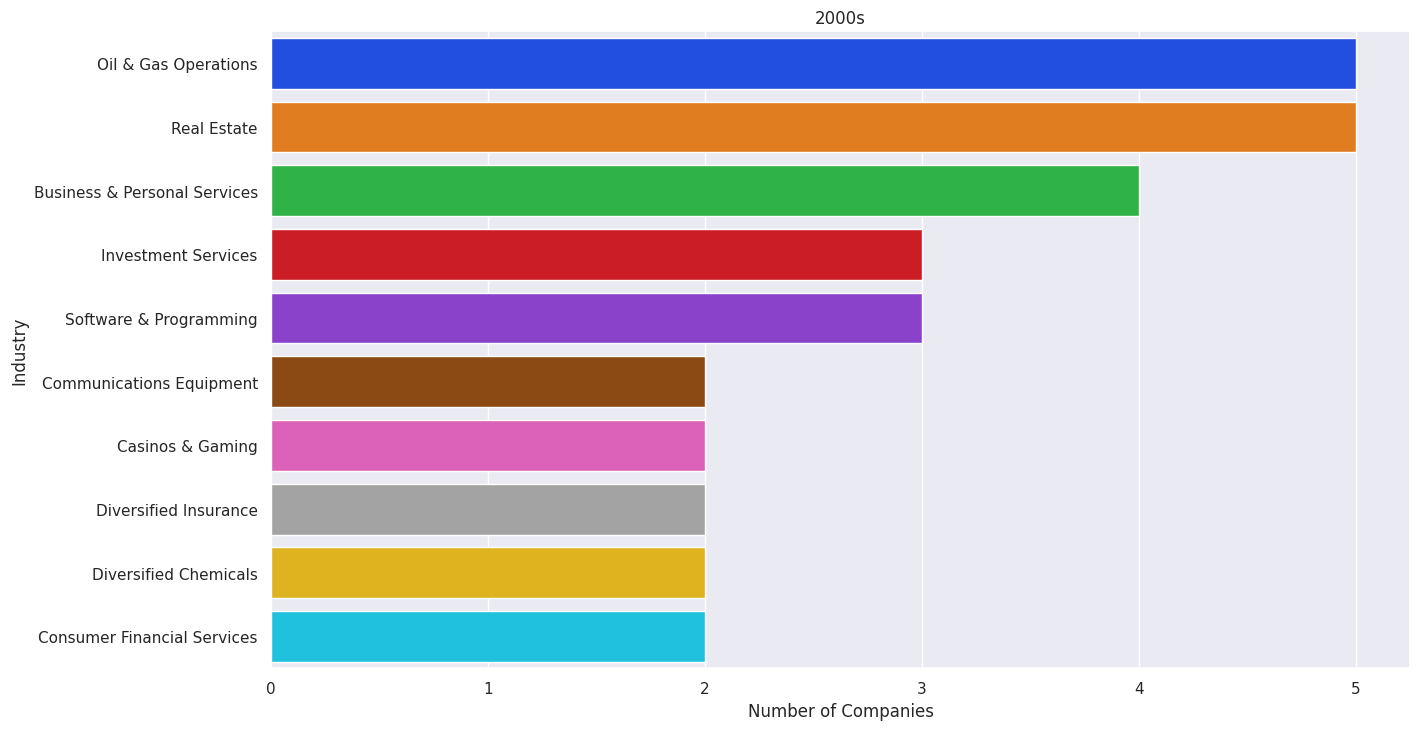

In [52]:
for decade in decades:
    decade_ = forbes_US[forbes_US['Decade'] ==  decade]
    fig, ax = plt.subplots()
    sns.set(rc={'figure.figsize':(14.7,8.27)})
    sns.barplot(data = decade_.sort_values("Number of Companies", ascending = False).iloc[:10], x = "Number of Companies", y = "Industry", orient = 'h', palette = "bright").set_title(decade)
plt.show()

### Biggest Industries on the Forbes 2000 vs the US

In [53]:
##### Give brief explanation here #####
##### Not a priority to show forbes industries without US companies at this time #####

In [54]:
forbes_Industry = forbes.groupby('Industry', as_index = False).count()

forbes_Industry = forbes_Industry.rename(columns = {'Rank': 'Number of Companies'})

forbes_USIndustryTop = forbes_USIndustryTop.rename(columns = {'Rank': 'Number of Companies'})
cols = ['Industry', 'Number of Companies']
forbes_IndustryTop = forbes_Industry[cols].sort_values('Number of Companies', ascending = False).iloc[:20]

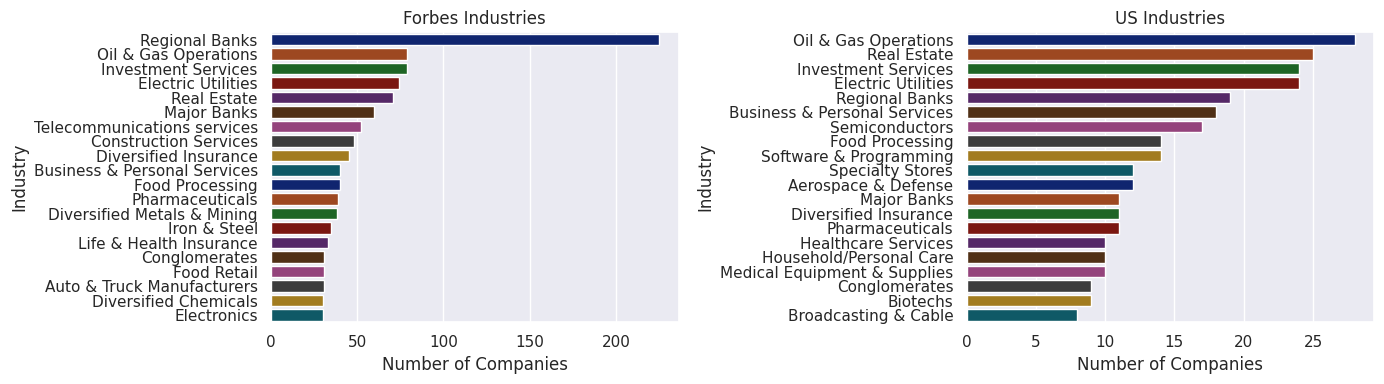

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))

industry_bar = sns.barplot(x = 'Number of Companies', y='Industry', data = forbes_IndustryTop, ax = ax1, palette = 'dark', orient = 'h').set_title("Forbes Industries")
industry_USbar = sns.barplot(x = 'Number of Companies', y='Industry', data = forbes_USIndustryTop, ax = ax2, palette = 'dark', orient = 'h').set_title("US Industries")
fig.tight_layout()
plt.show()

You can compare the overall list to American industries here. Then continue to see which countries lead in specific industries. You may also want to take out the US data from the forbes chart above.

### Each Country and their Biggest Industries 

In [56]:
forbes_country_industry = pd.DataFrame(data = forbes)
forbes_country_industry = forbes_country_industry.groupby(['Country', 'Industry'], as_index = False).size()

In [57]:
countries = list(forbes.Country.unique())

In [58]:
##### Explain that this would be better in a flask or django application #####
##### Could be potential for future projects here if you fix your scraper #####

/tmp/ipykernel_25113/1355960618.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


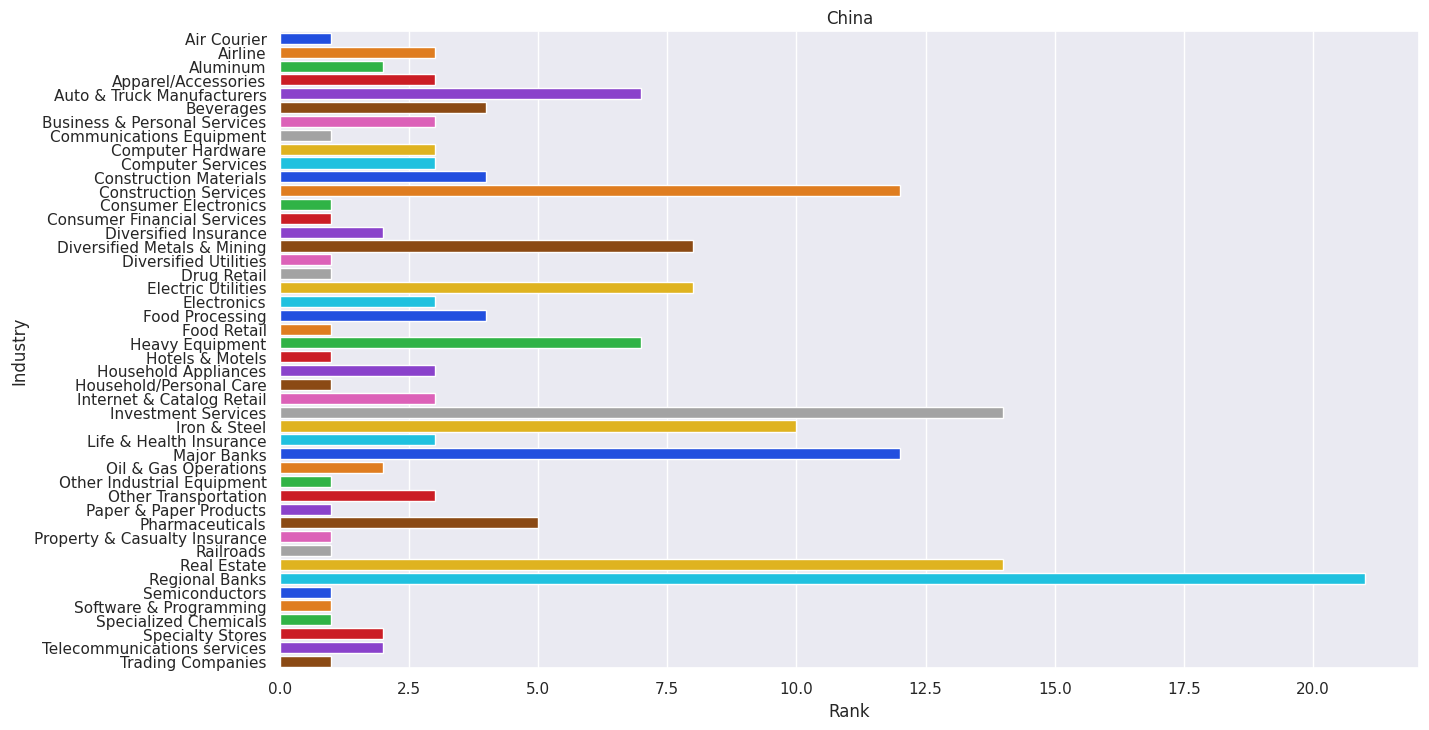

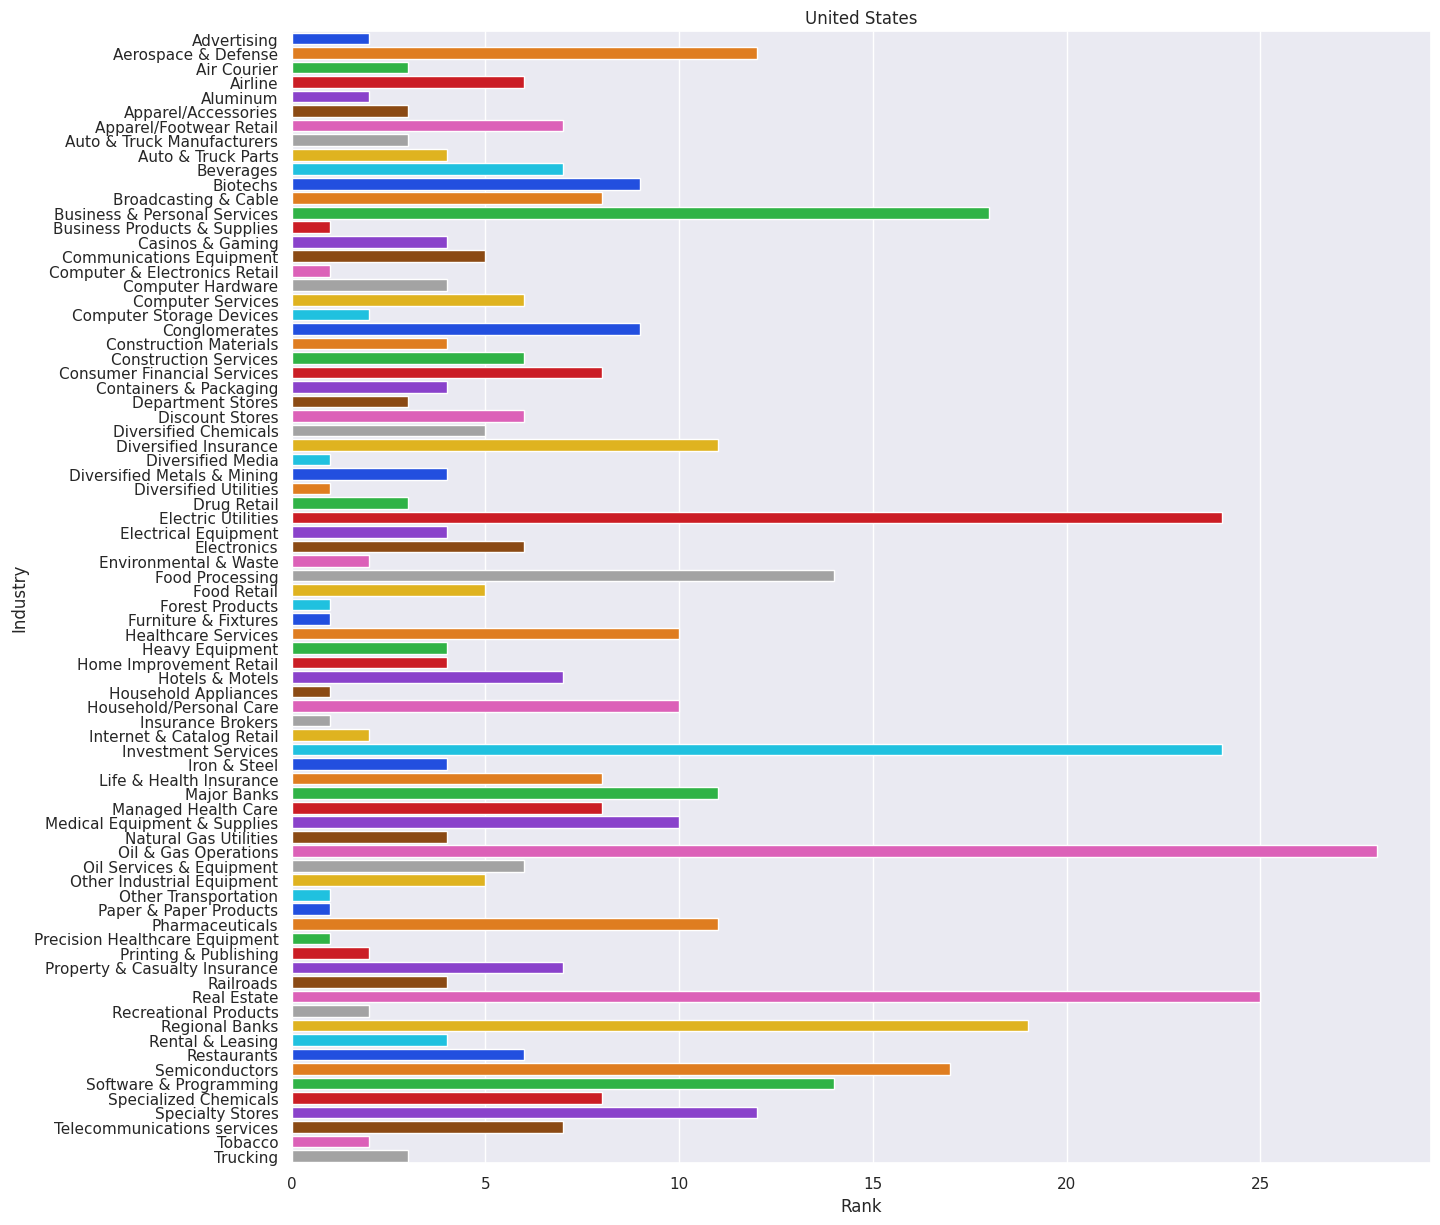

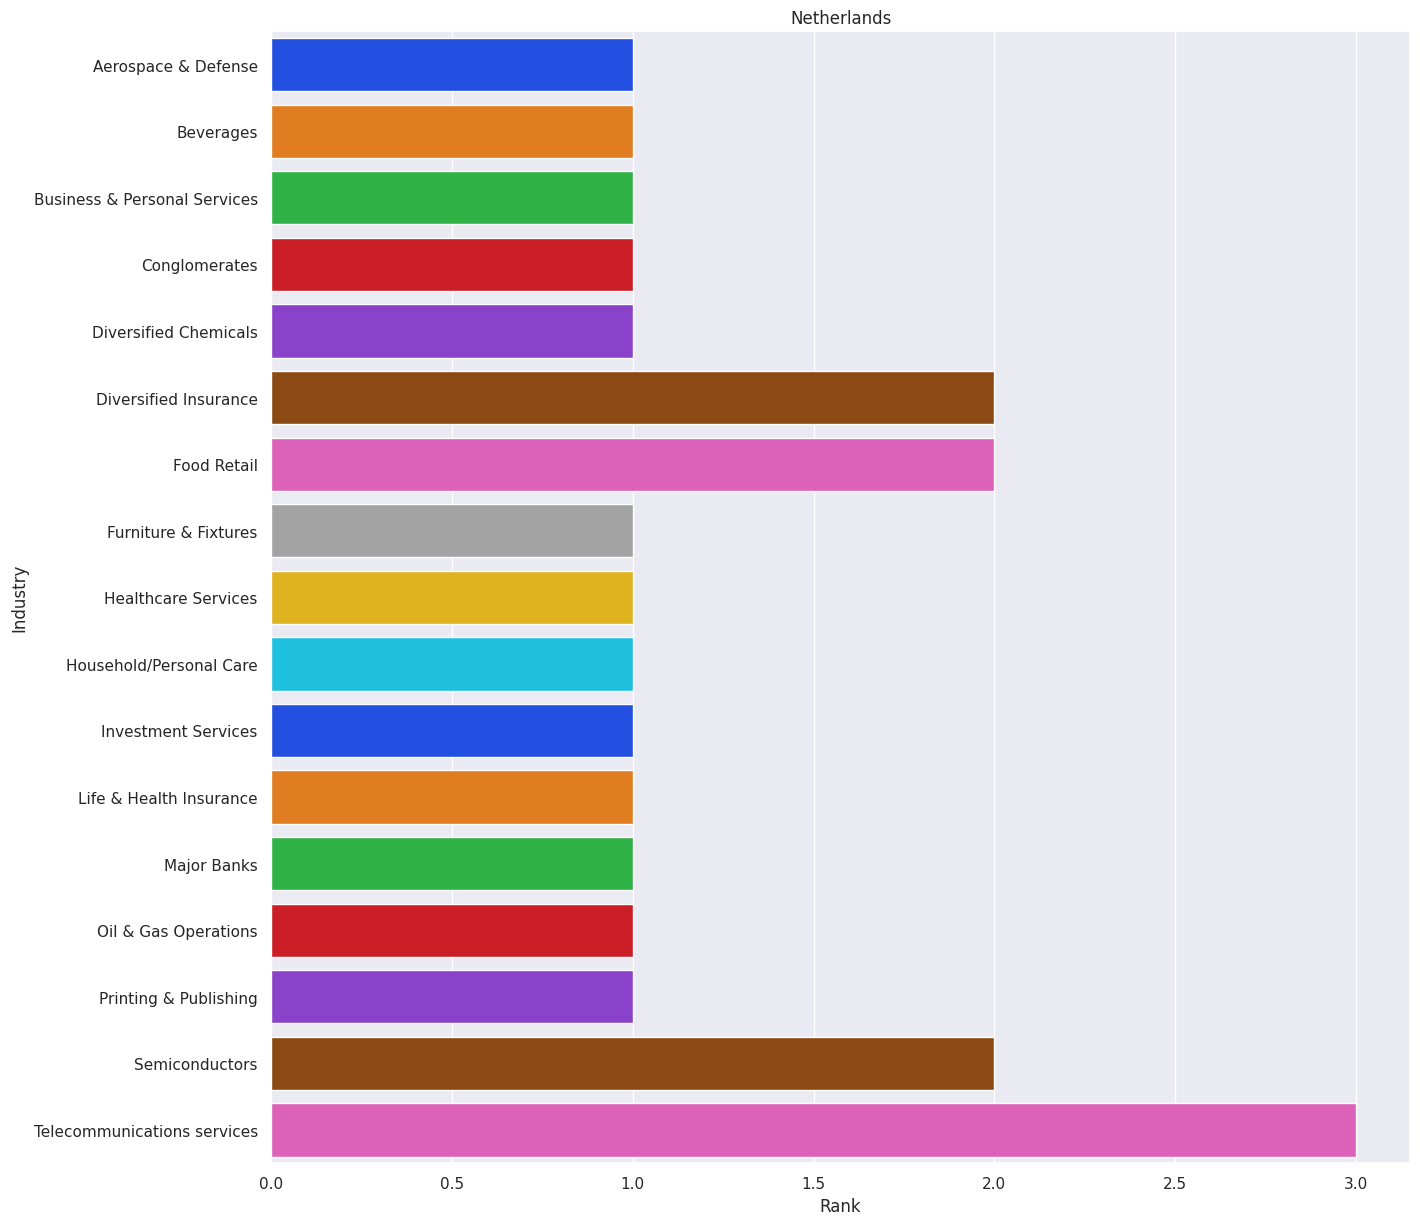

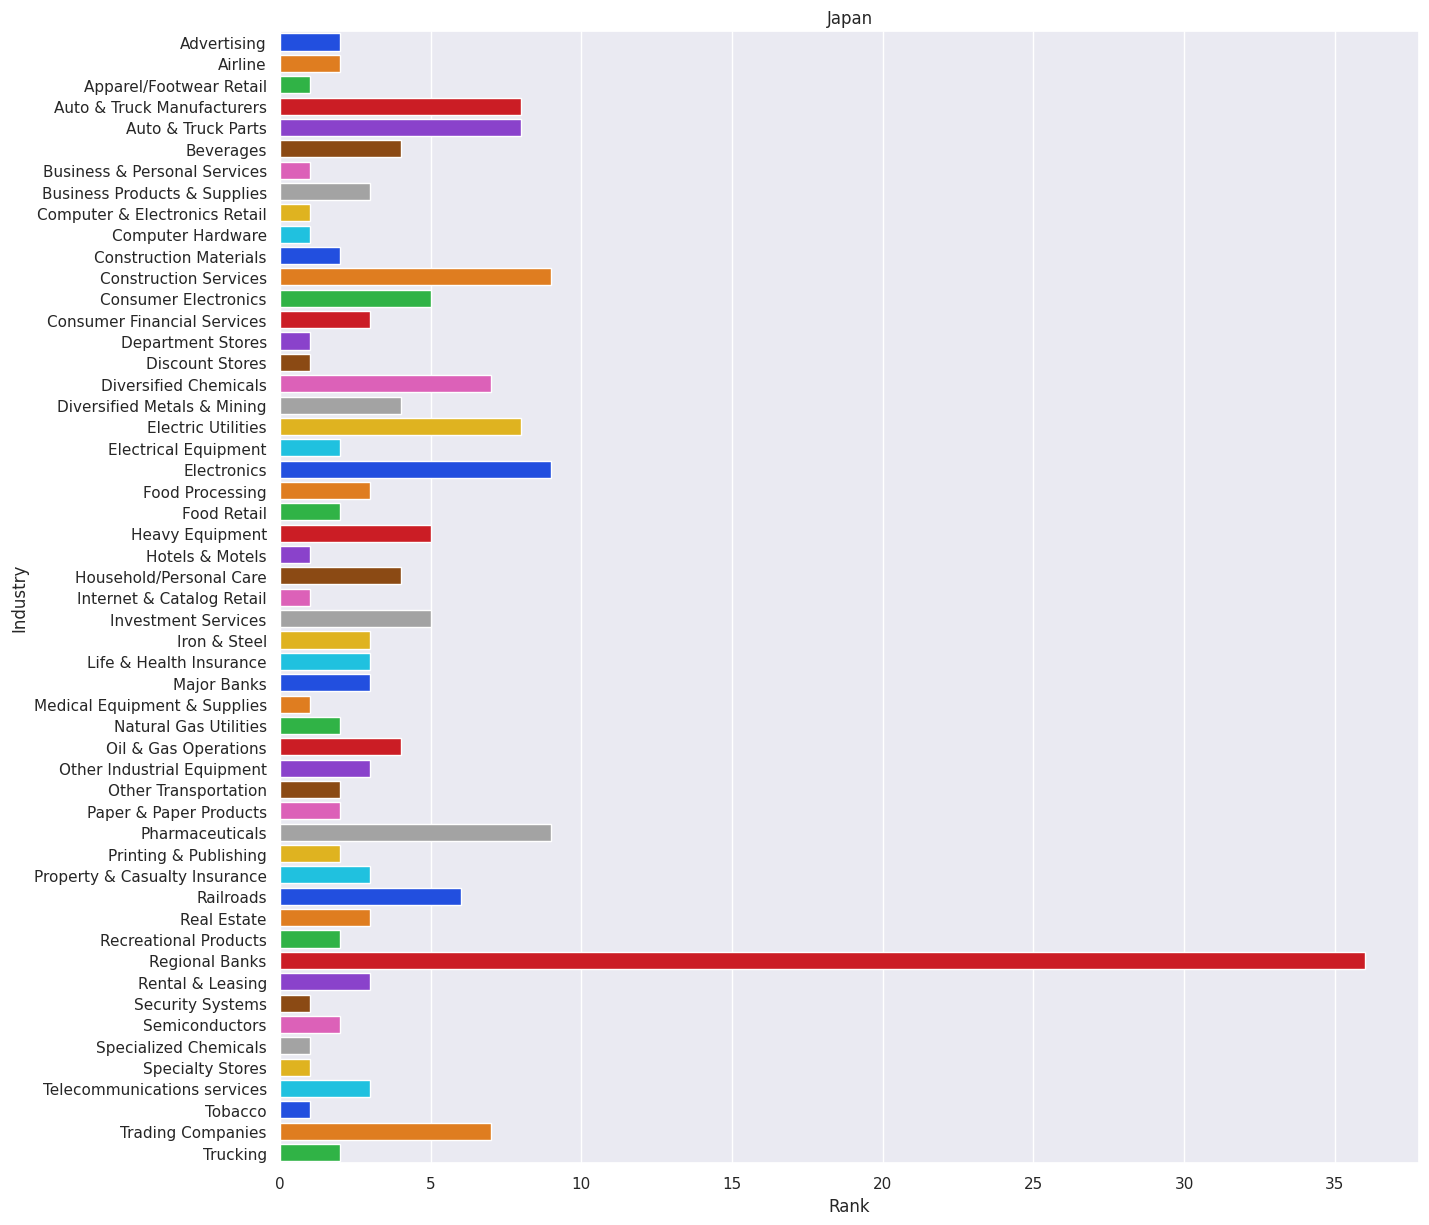

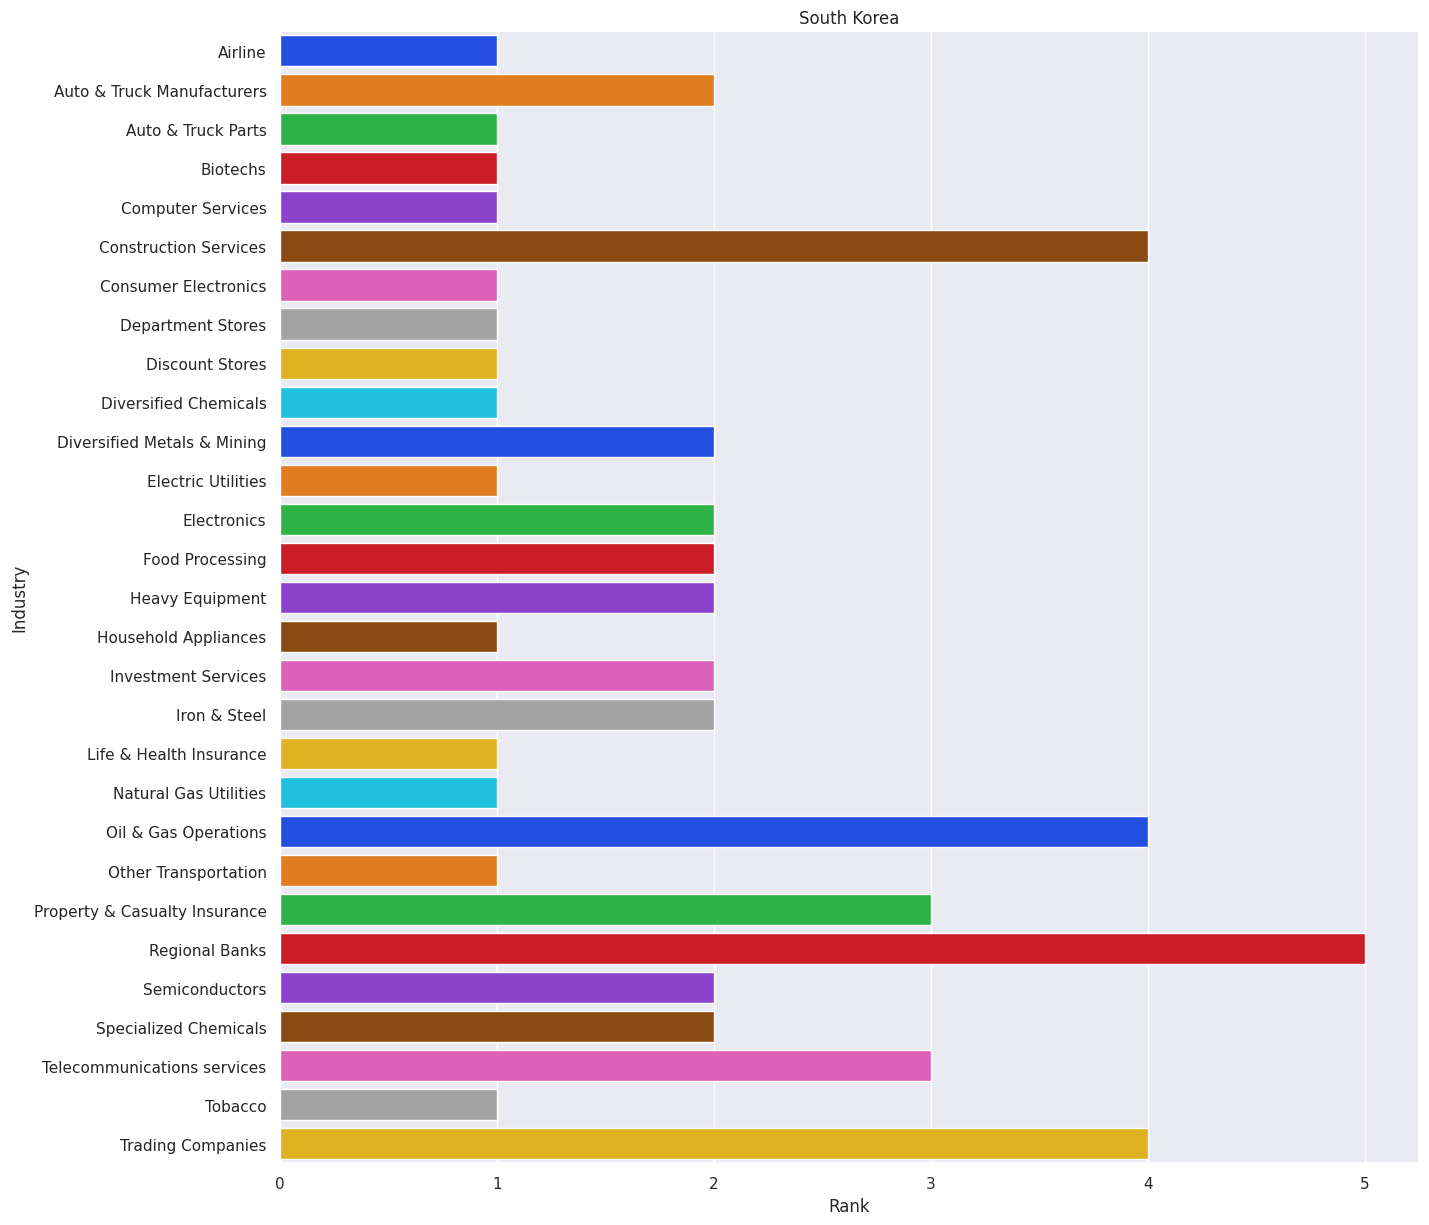

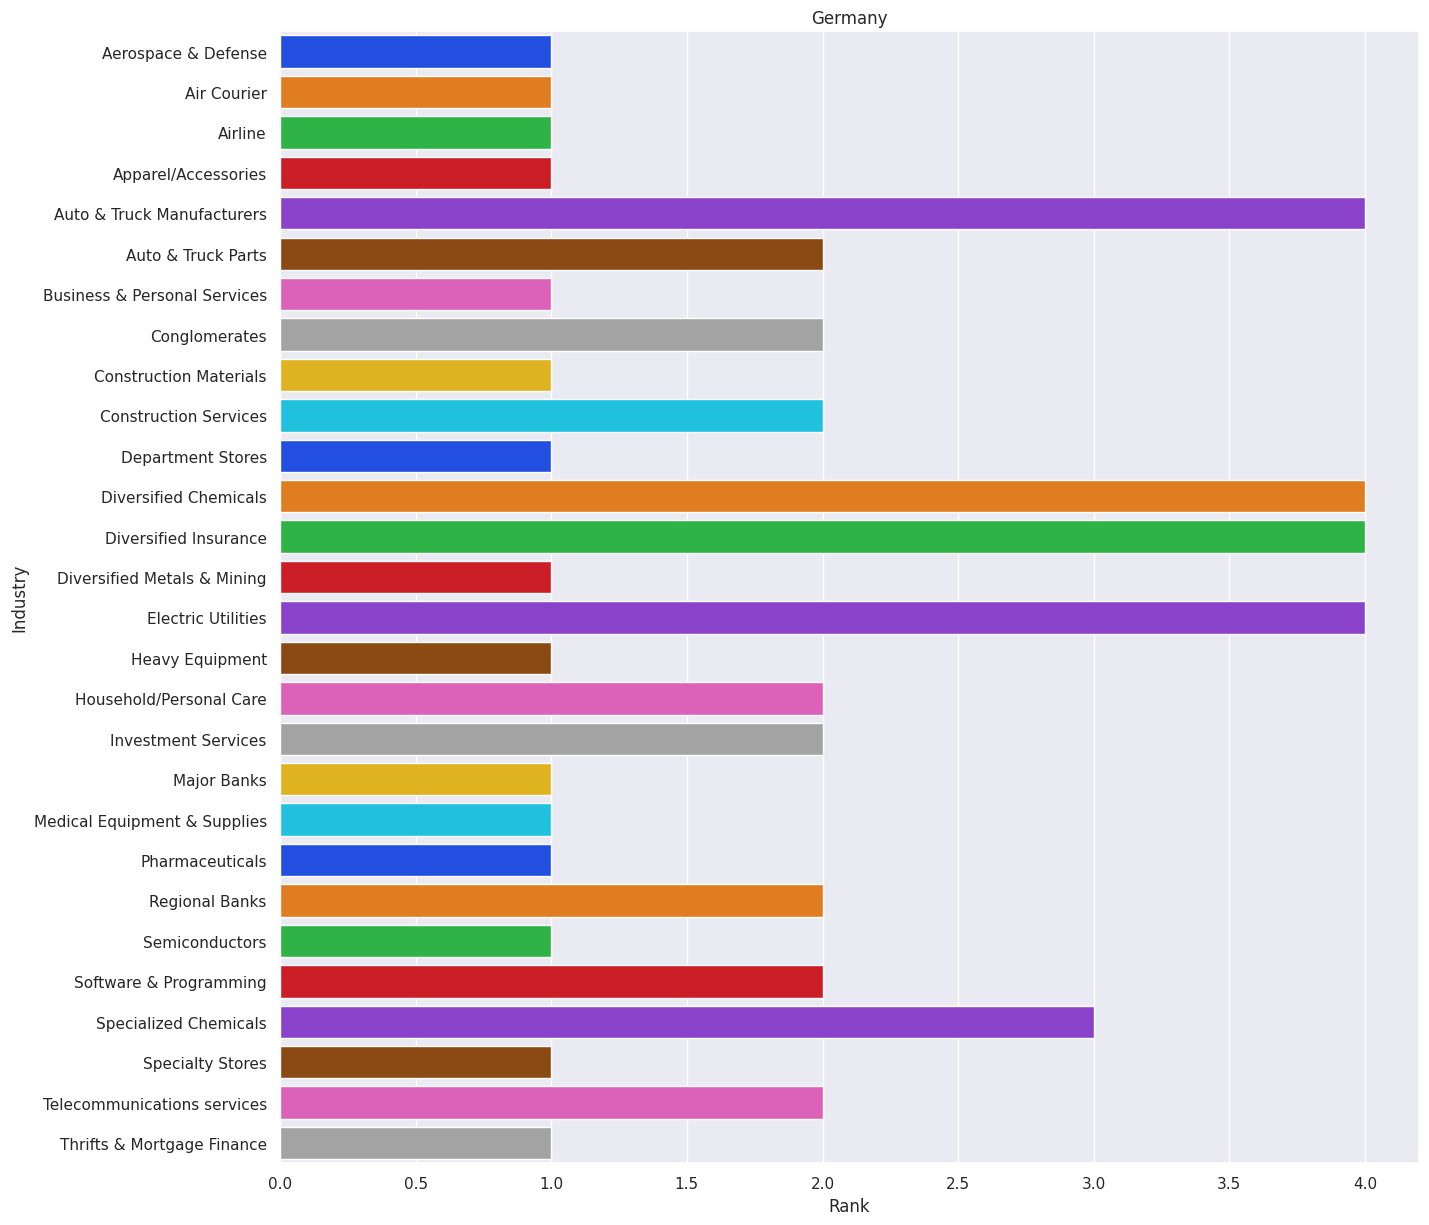

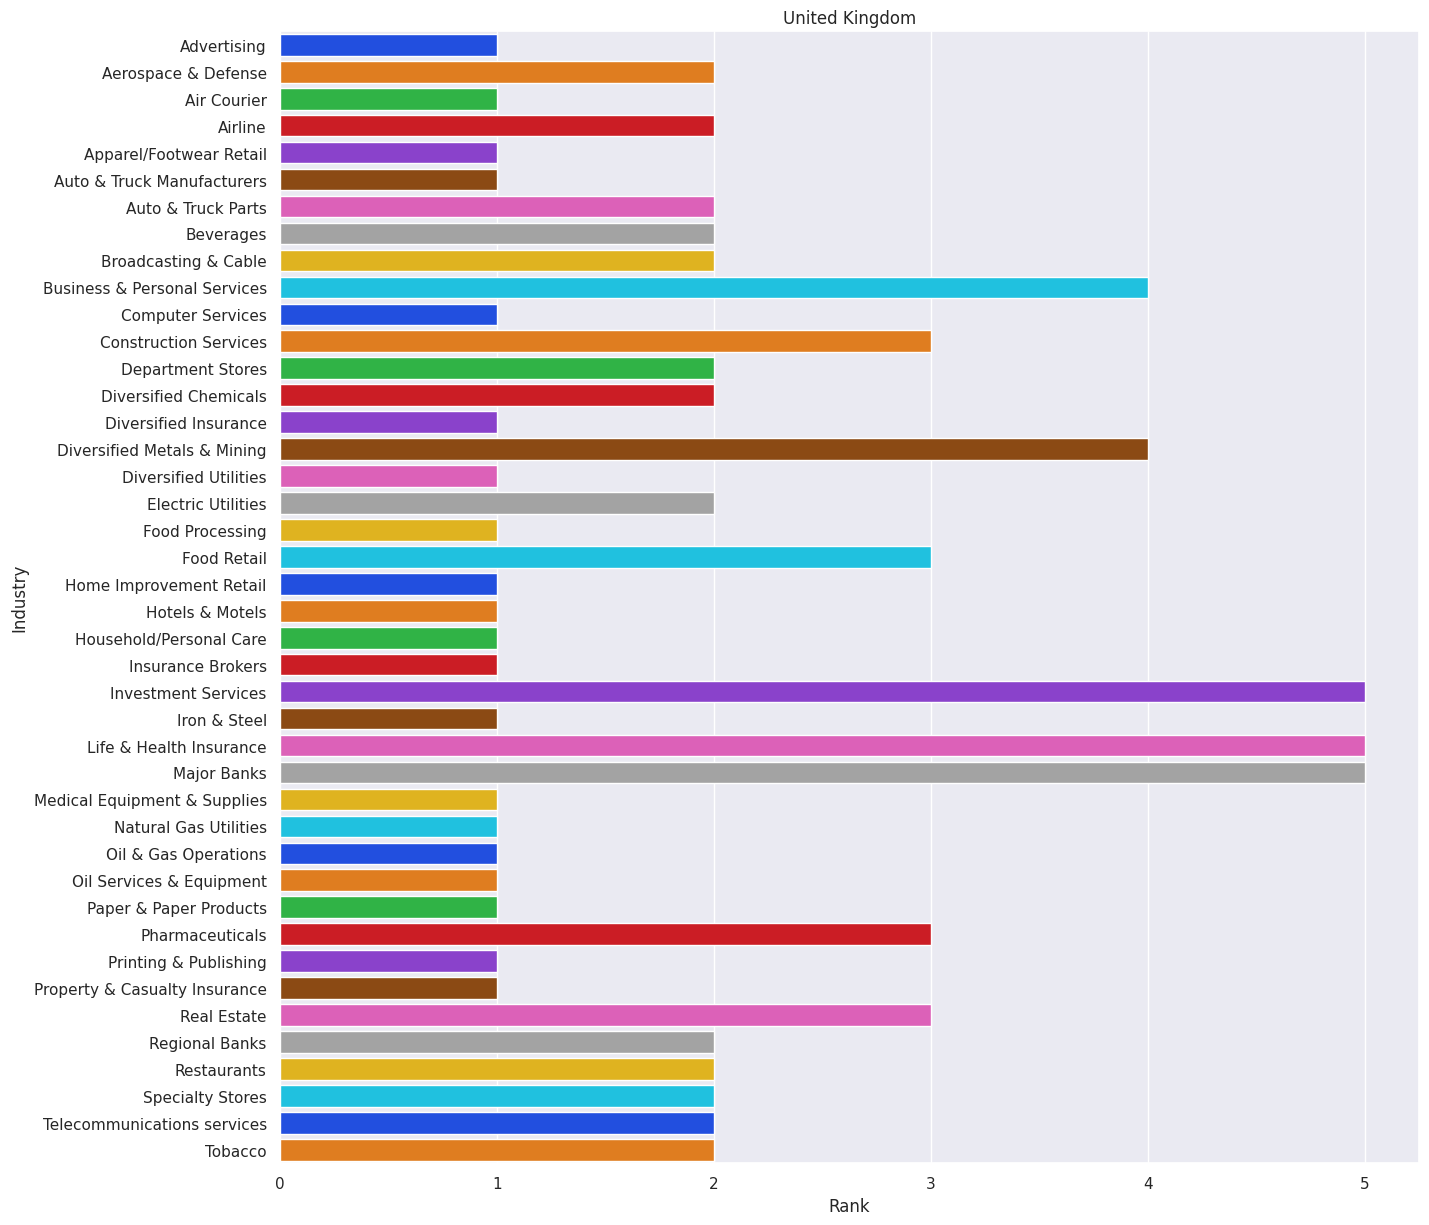

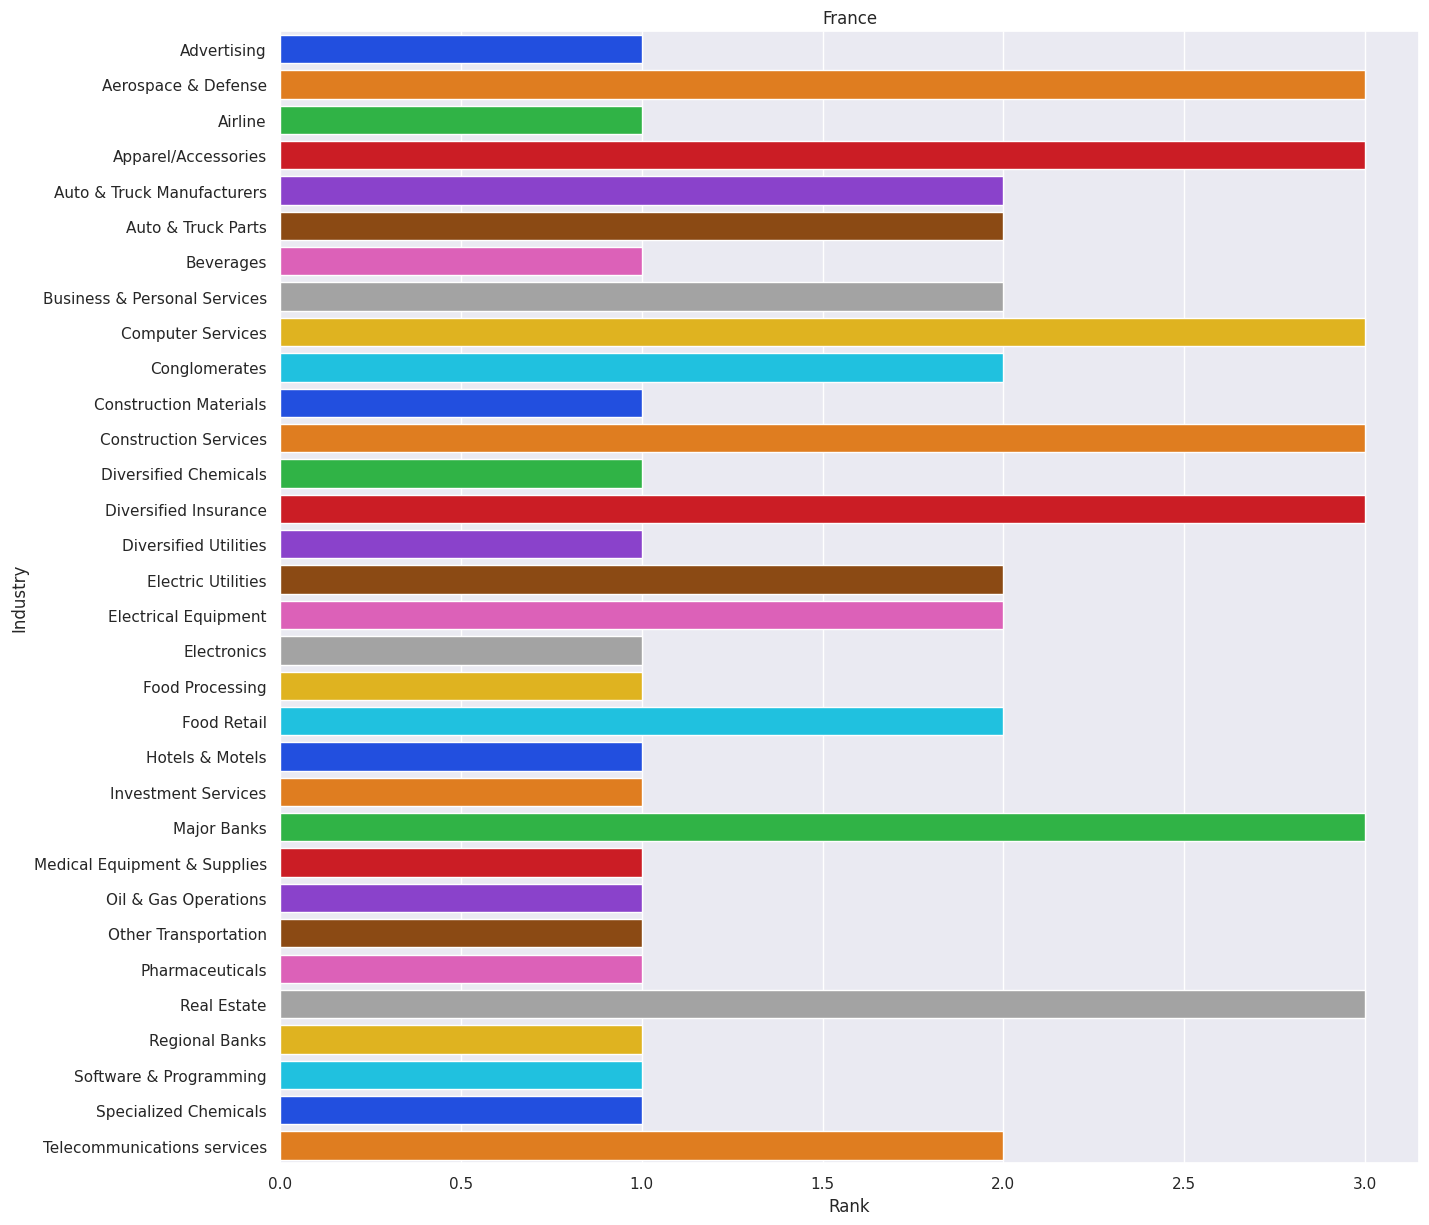

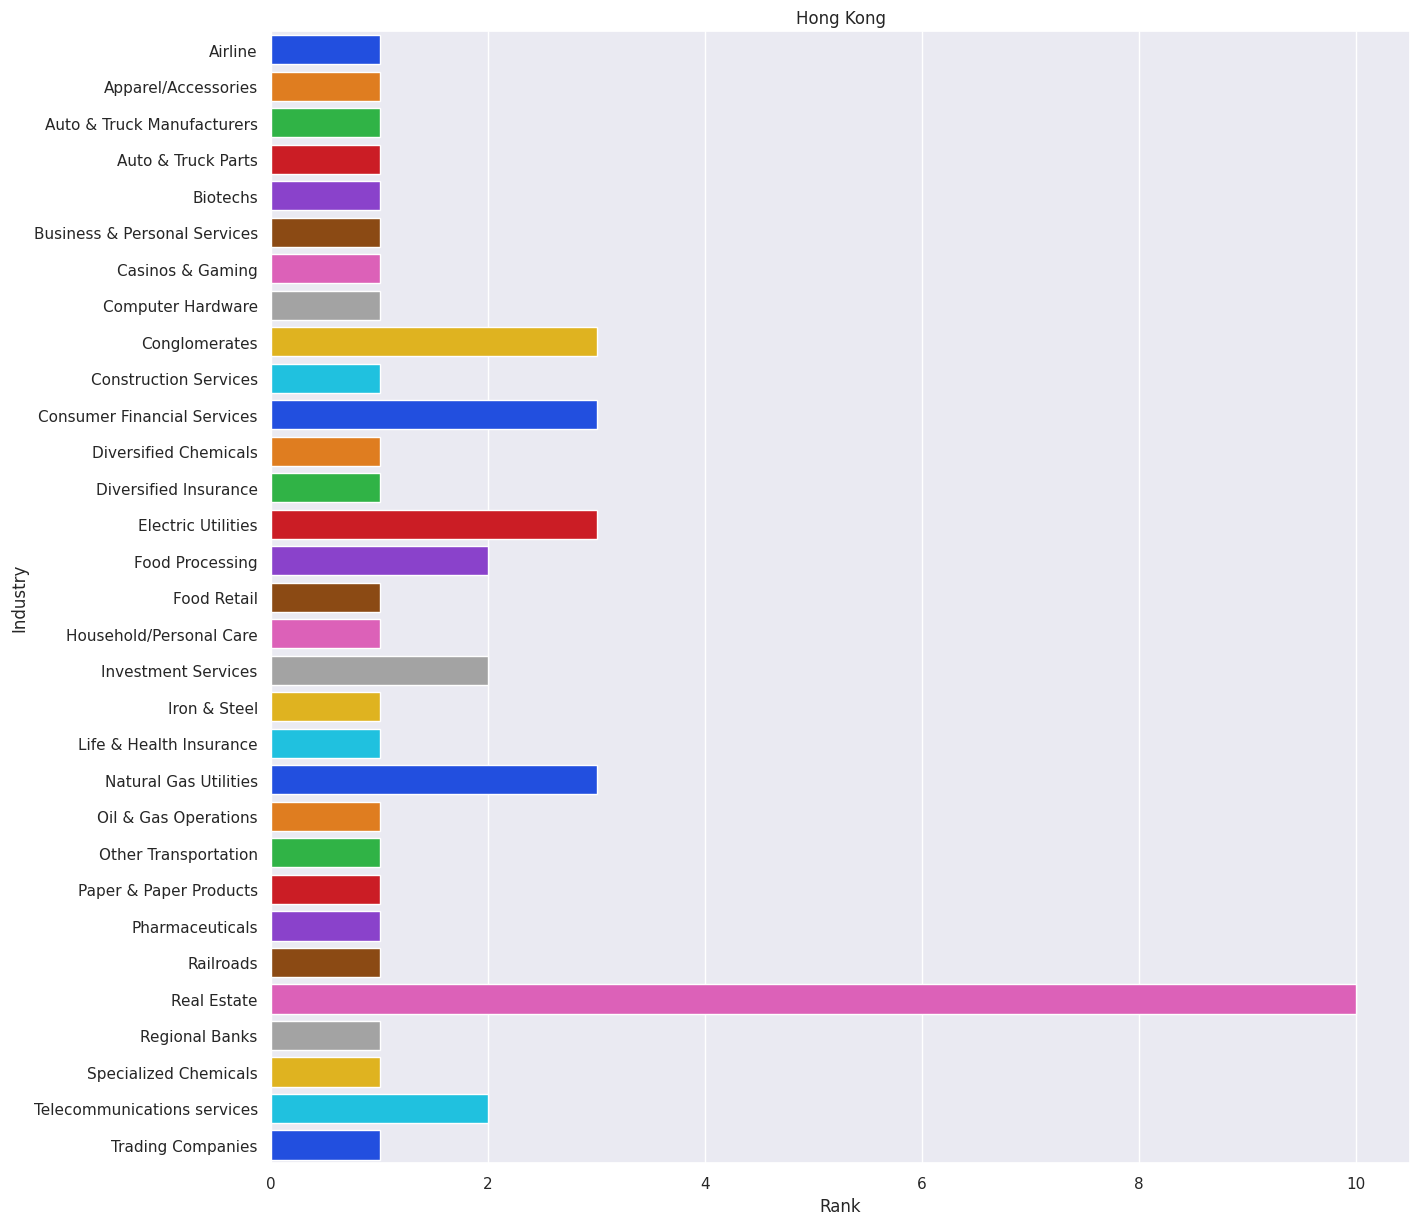

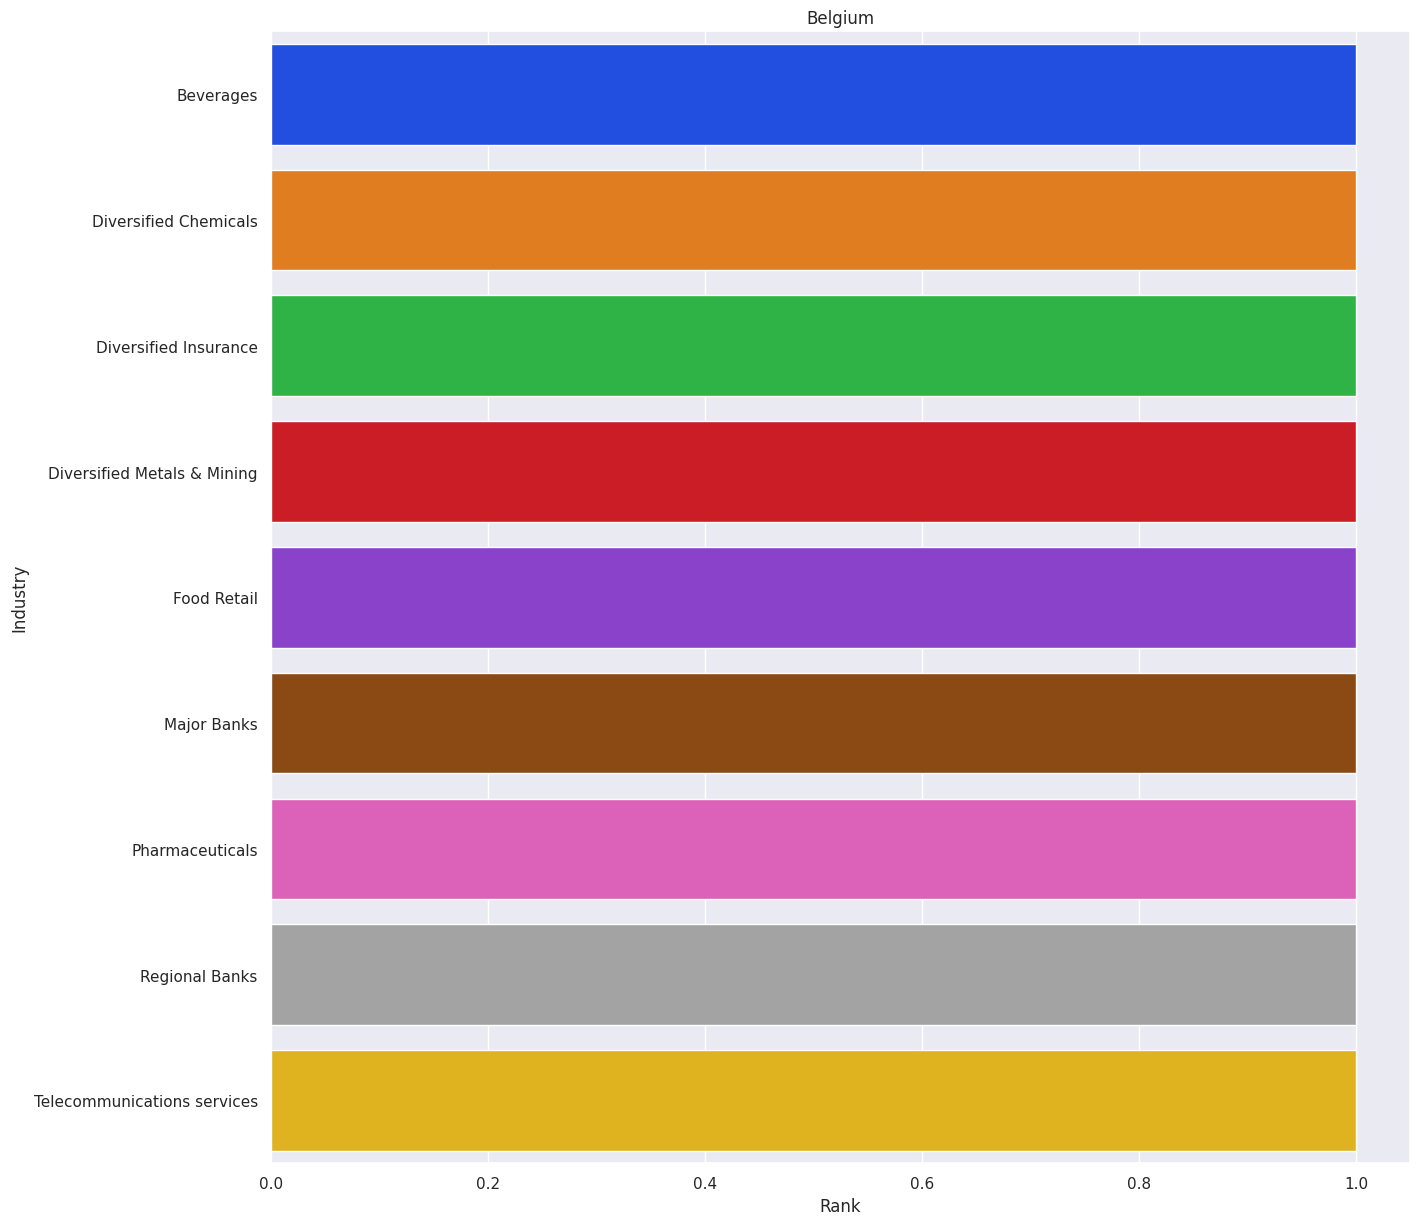

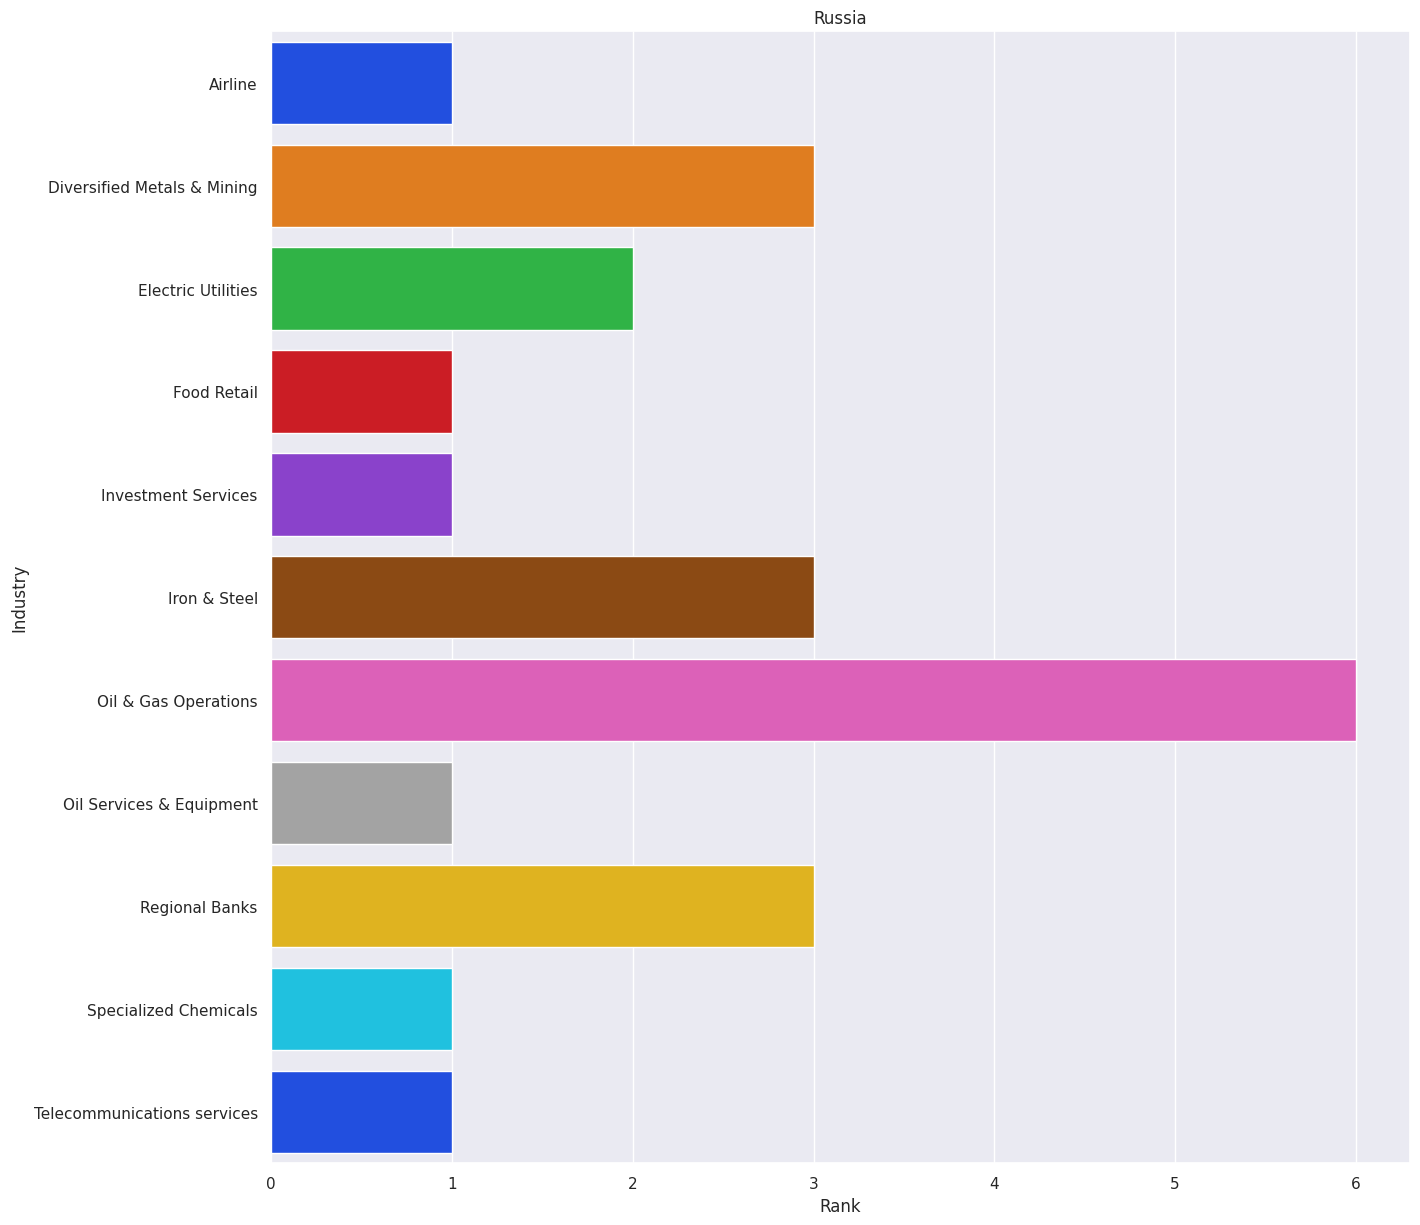

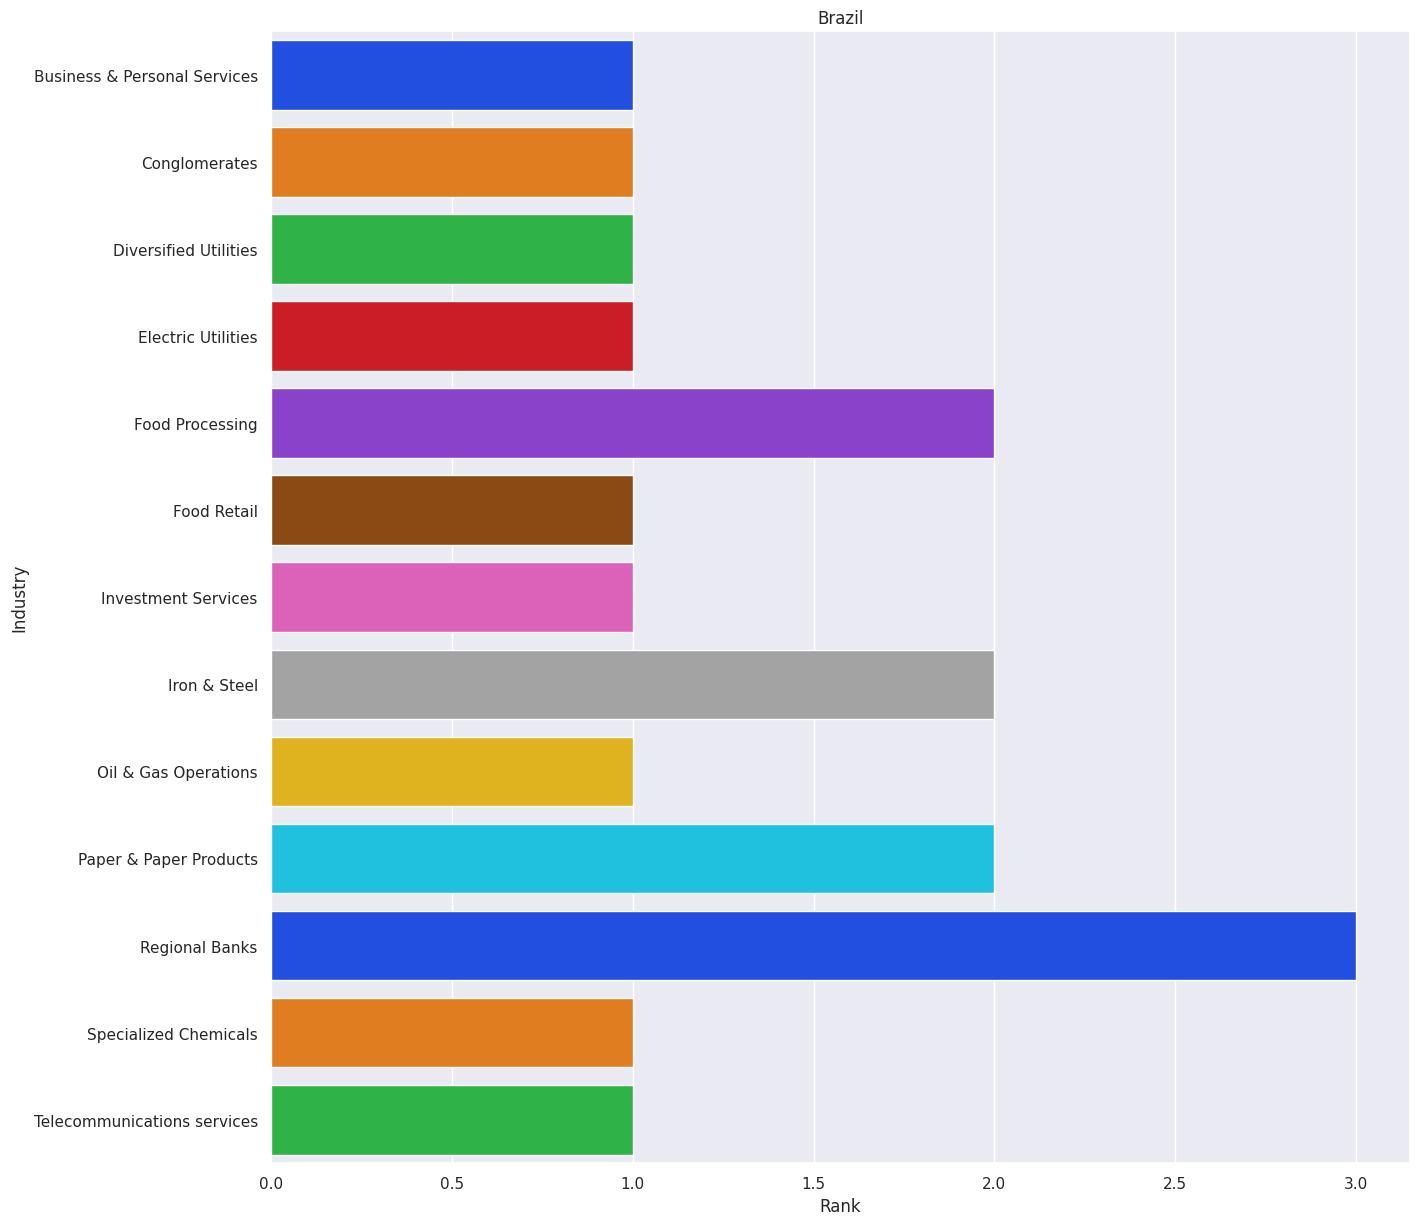

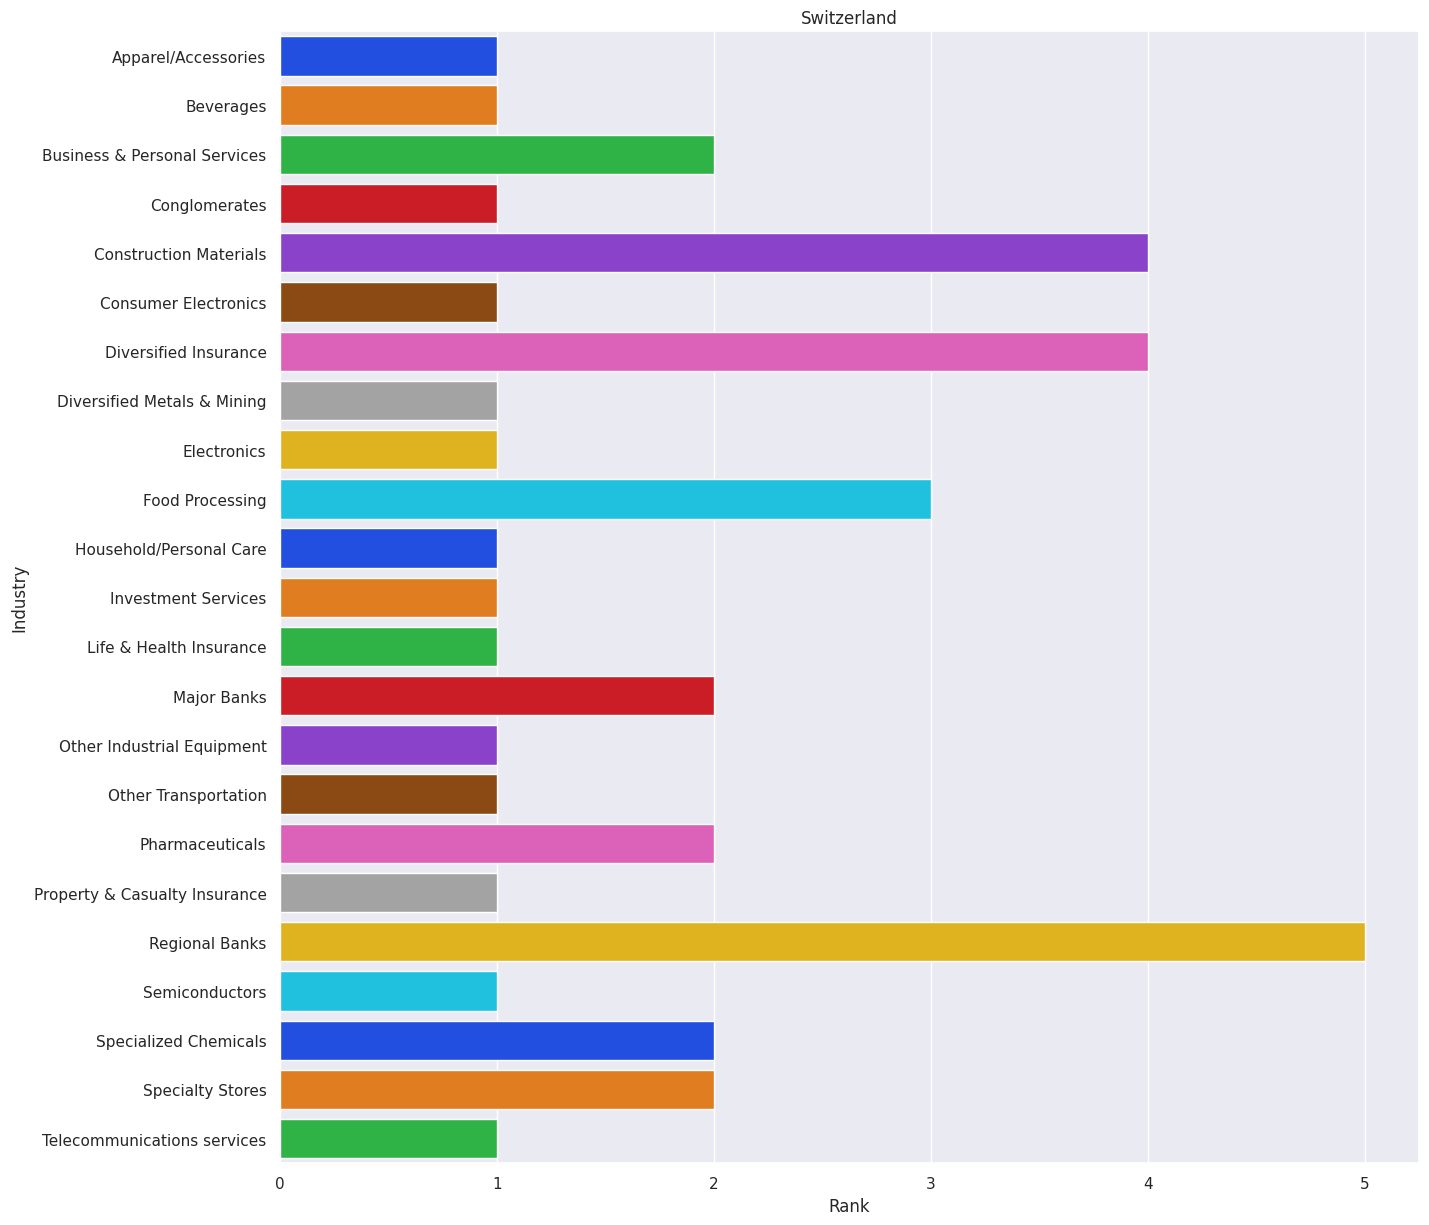

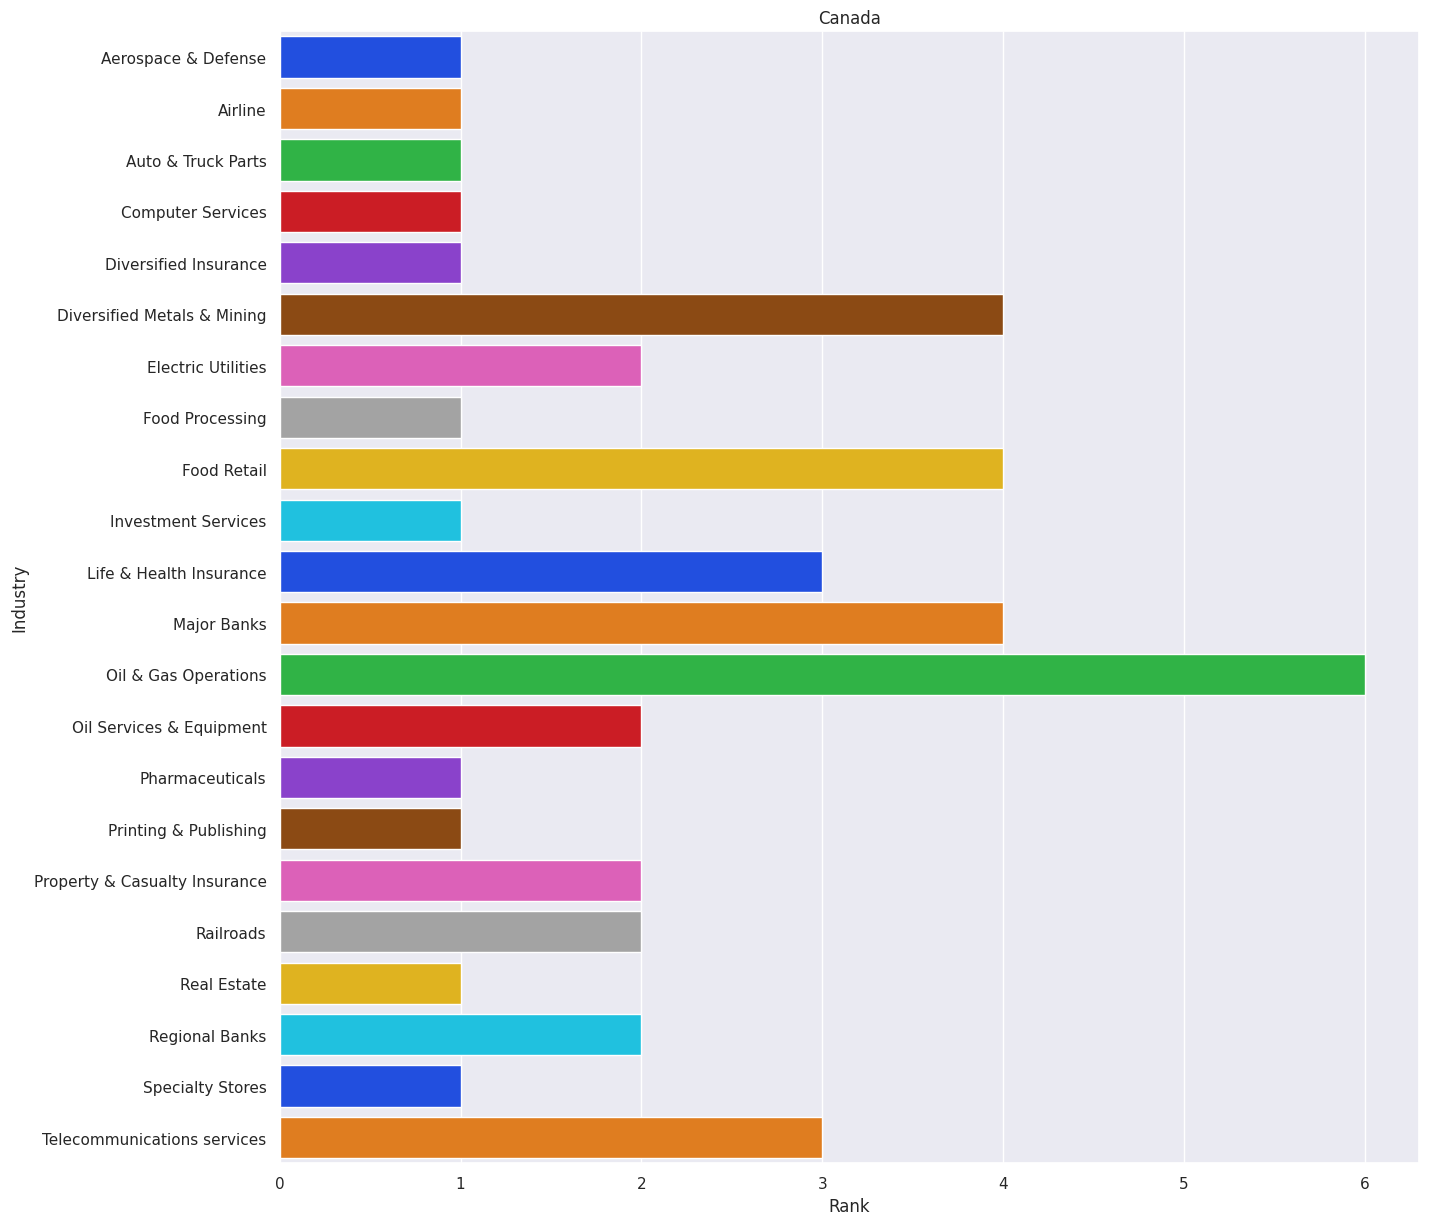

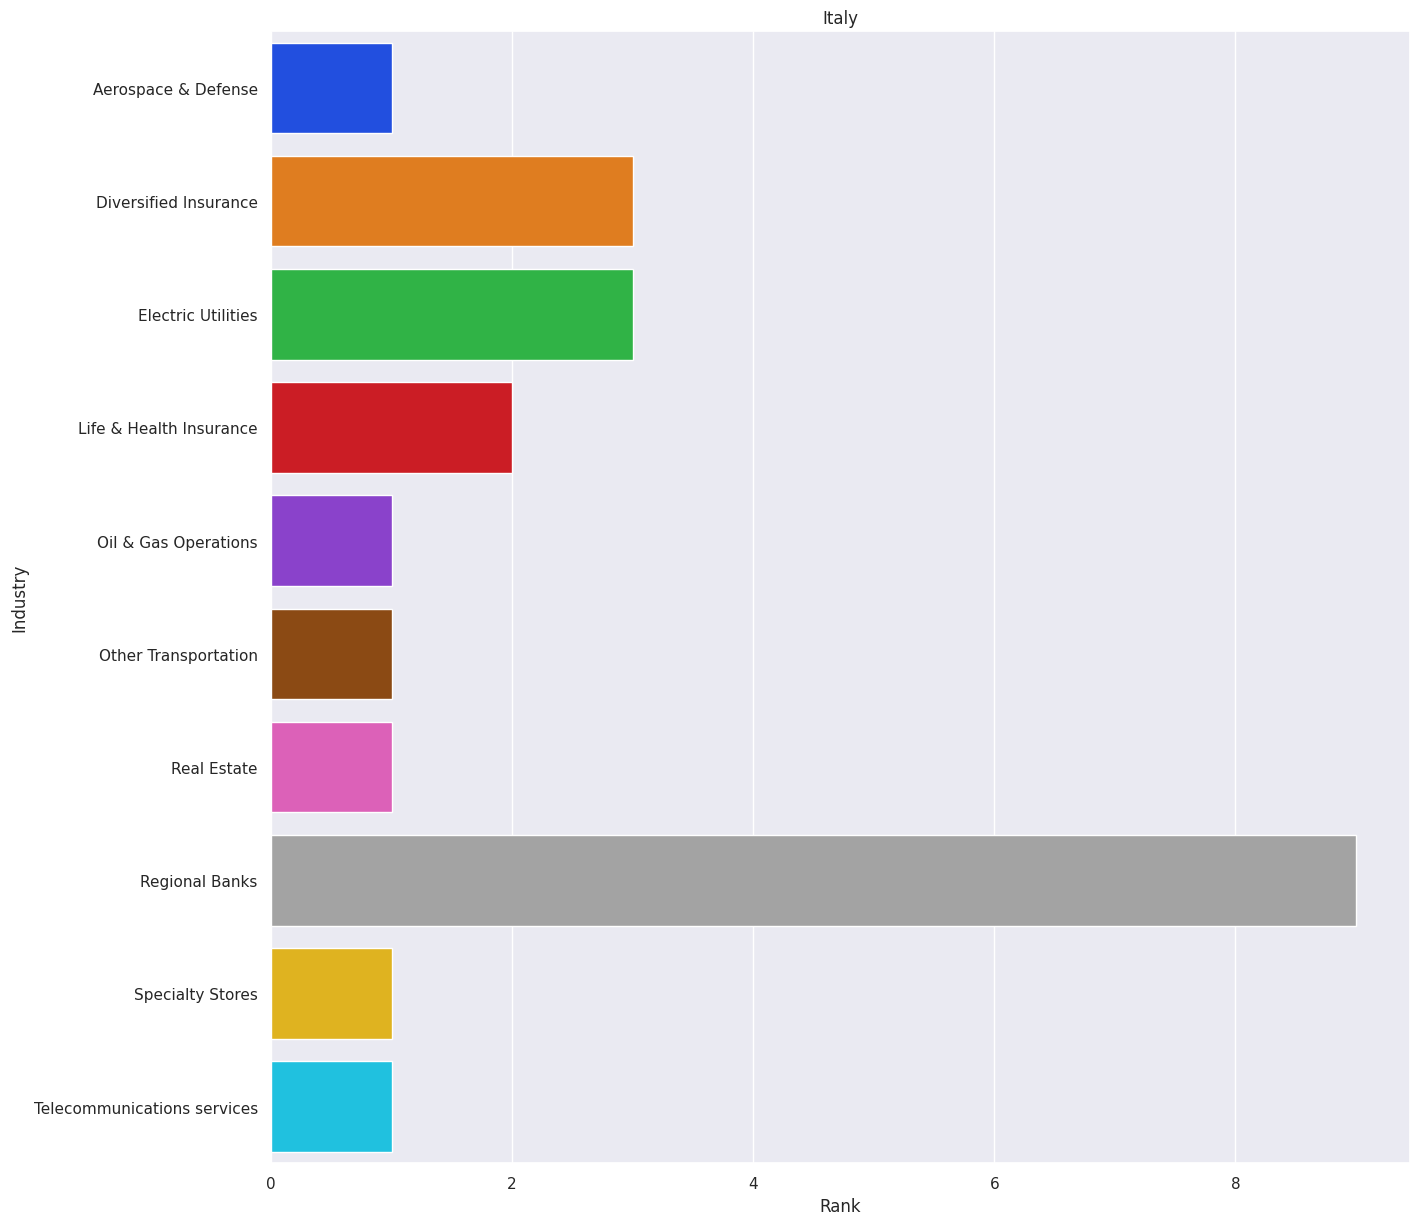

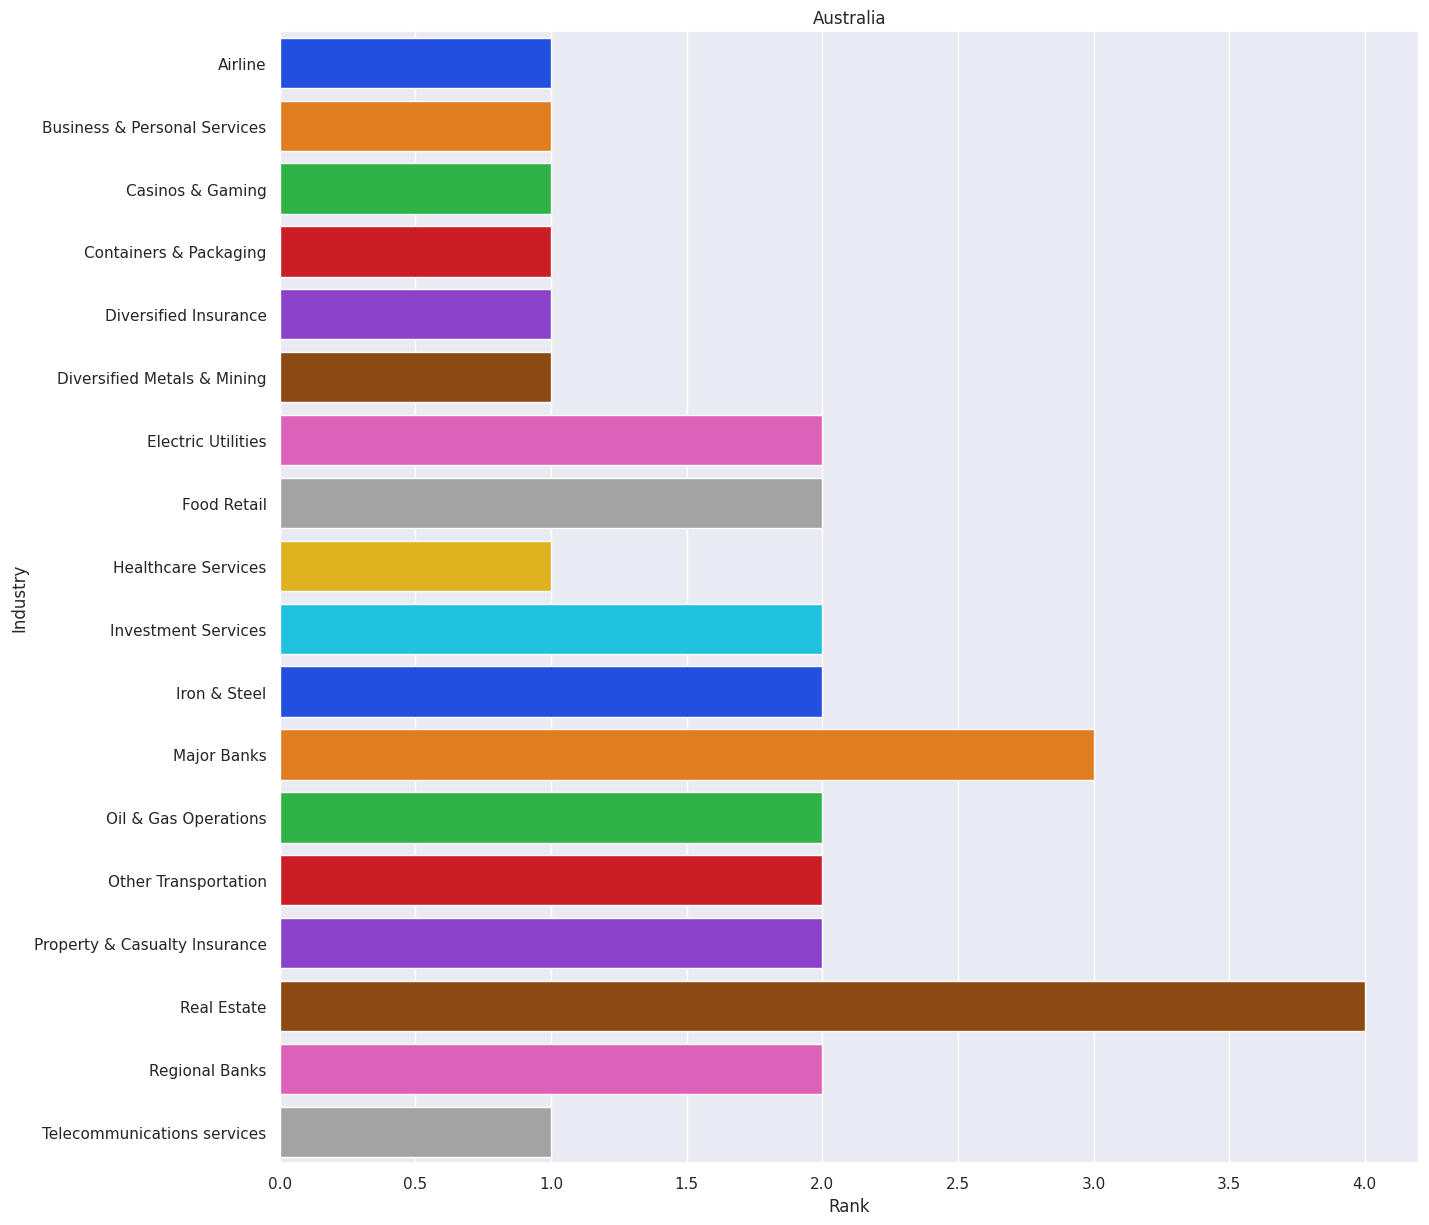

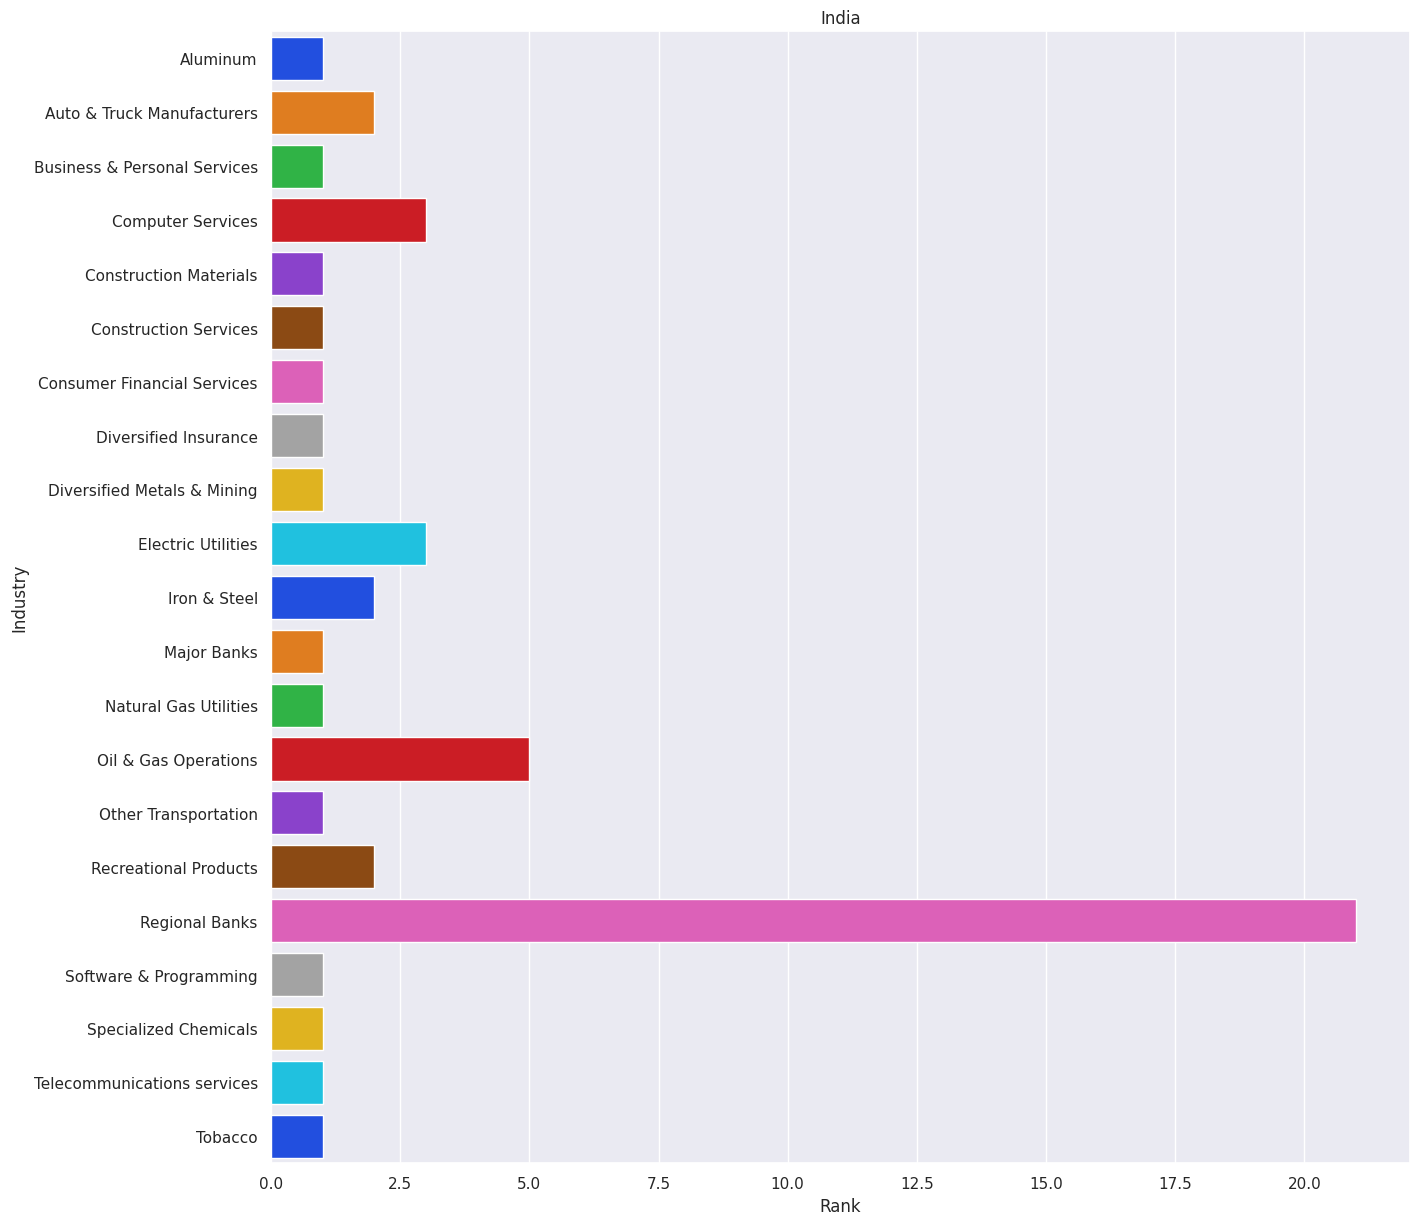

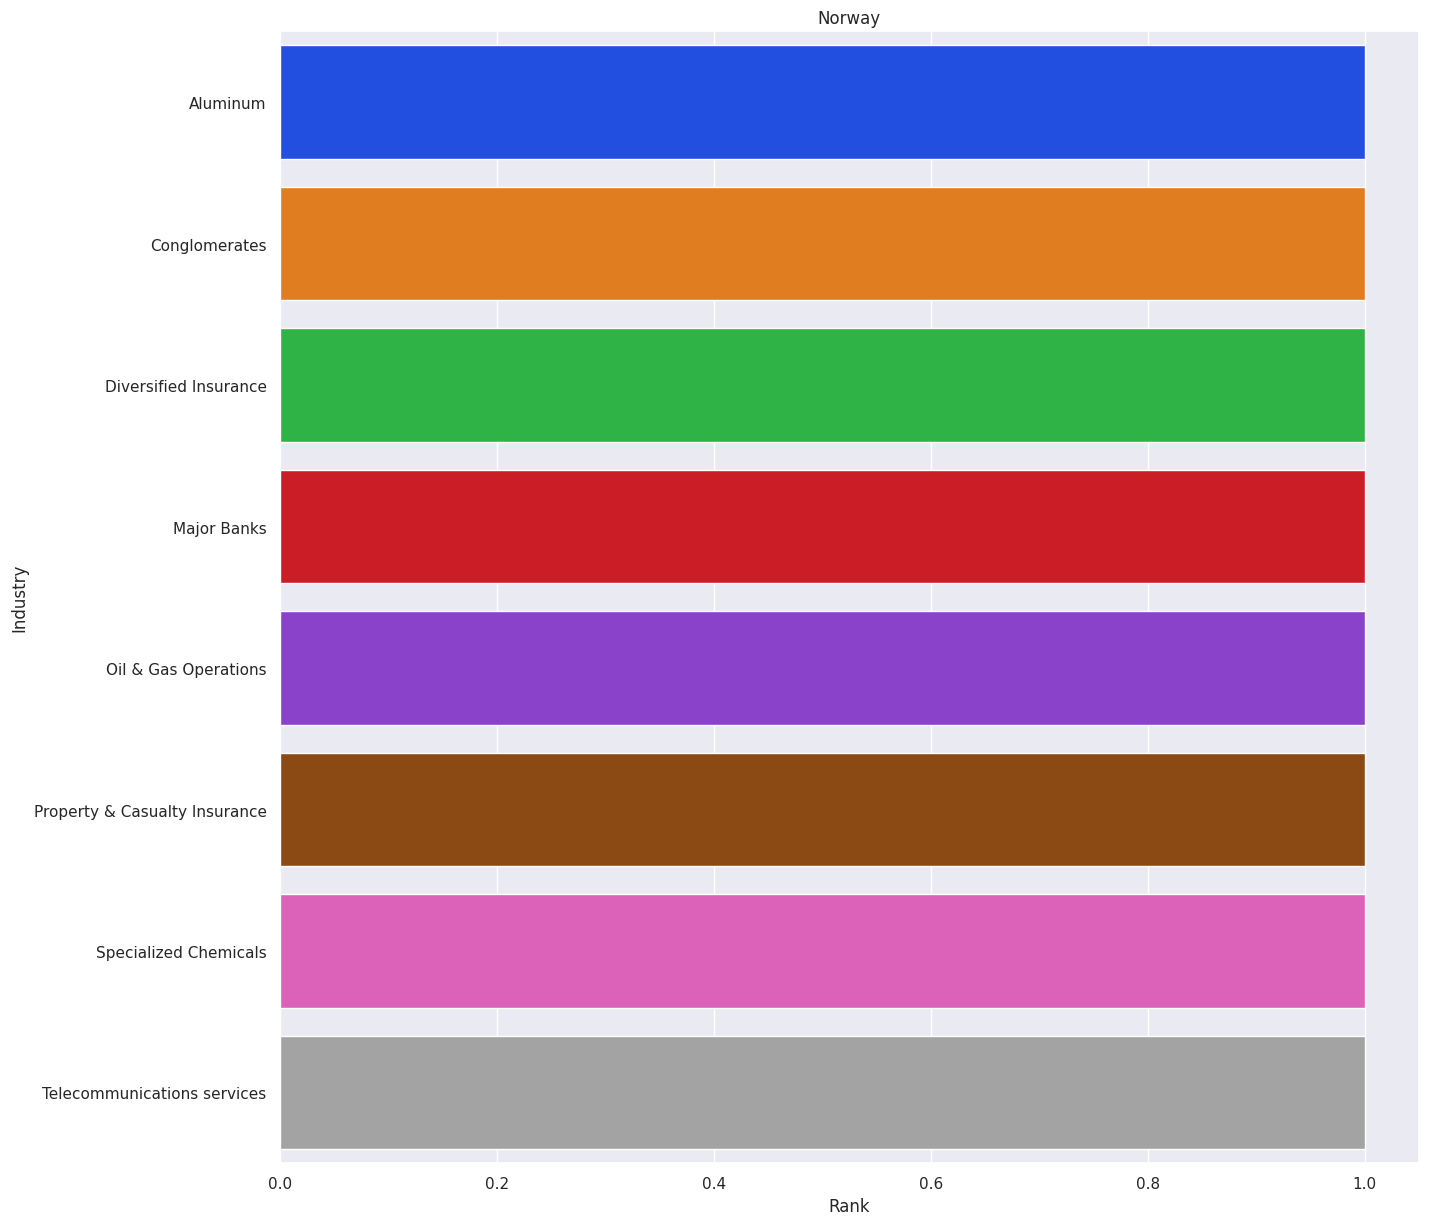

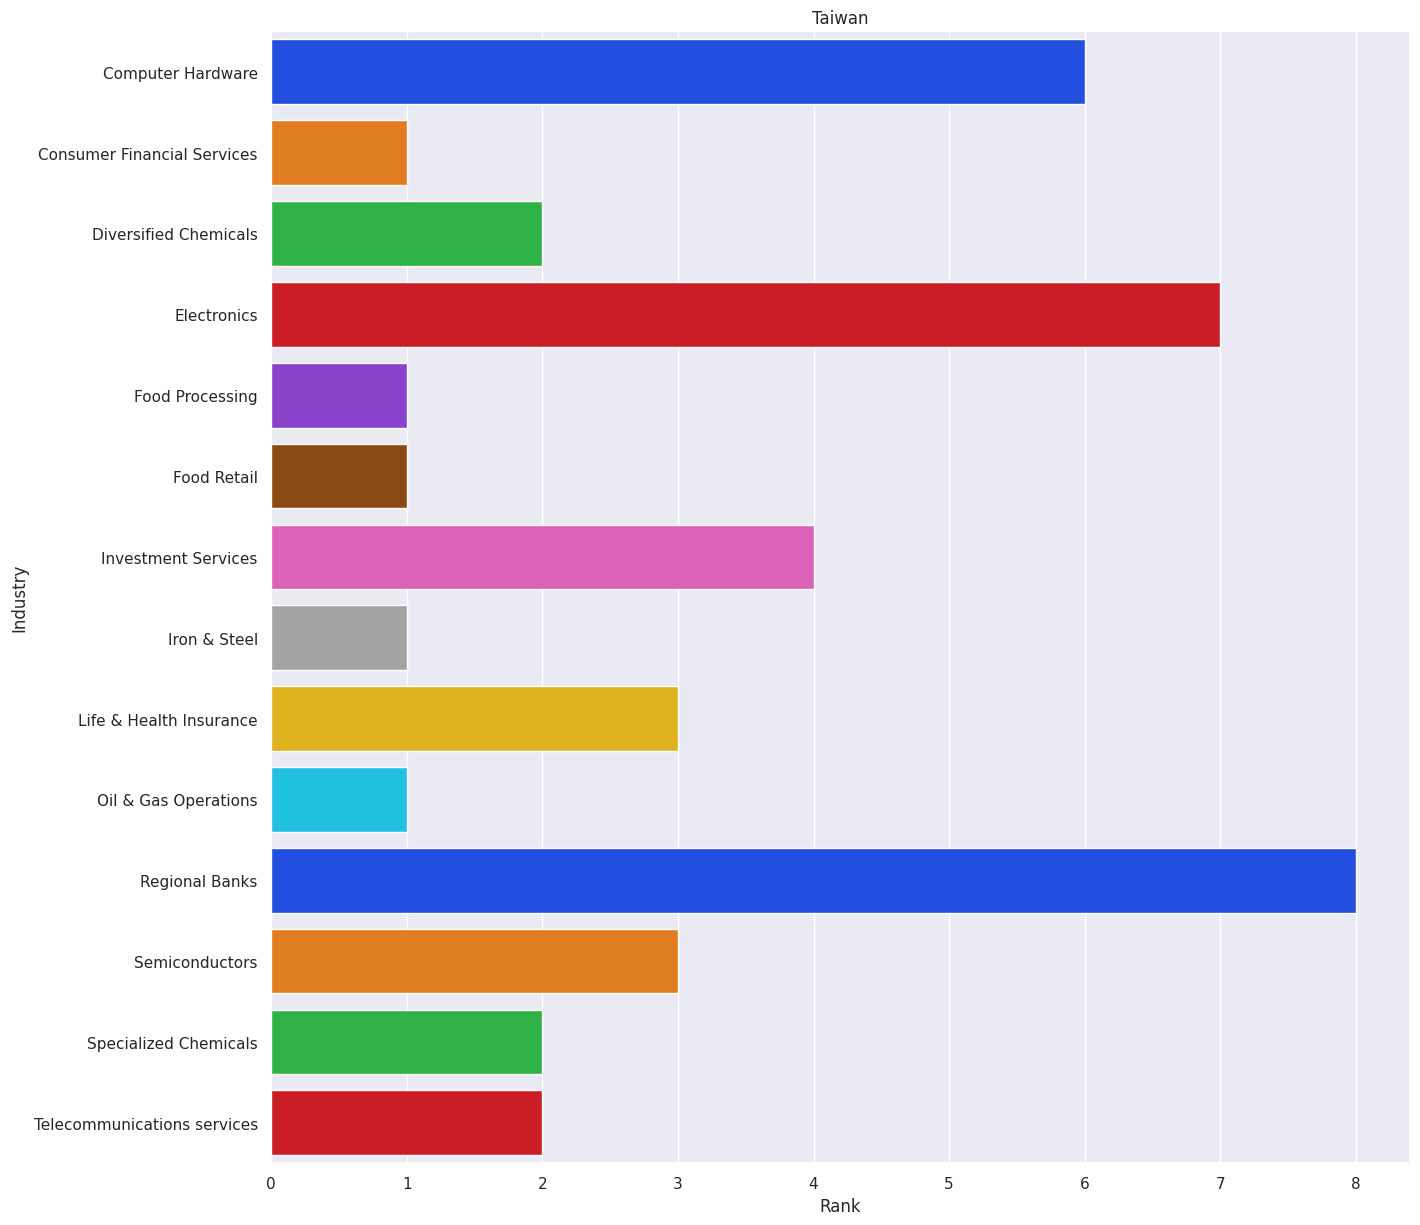

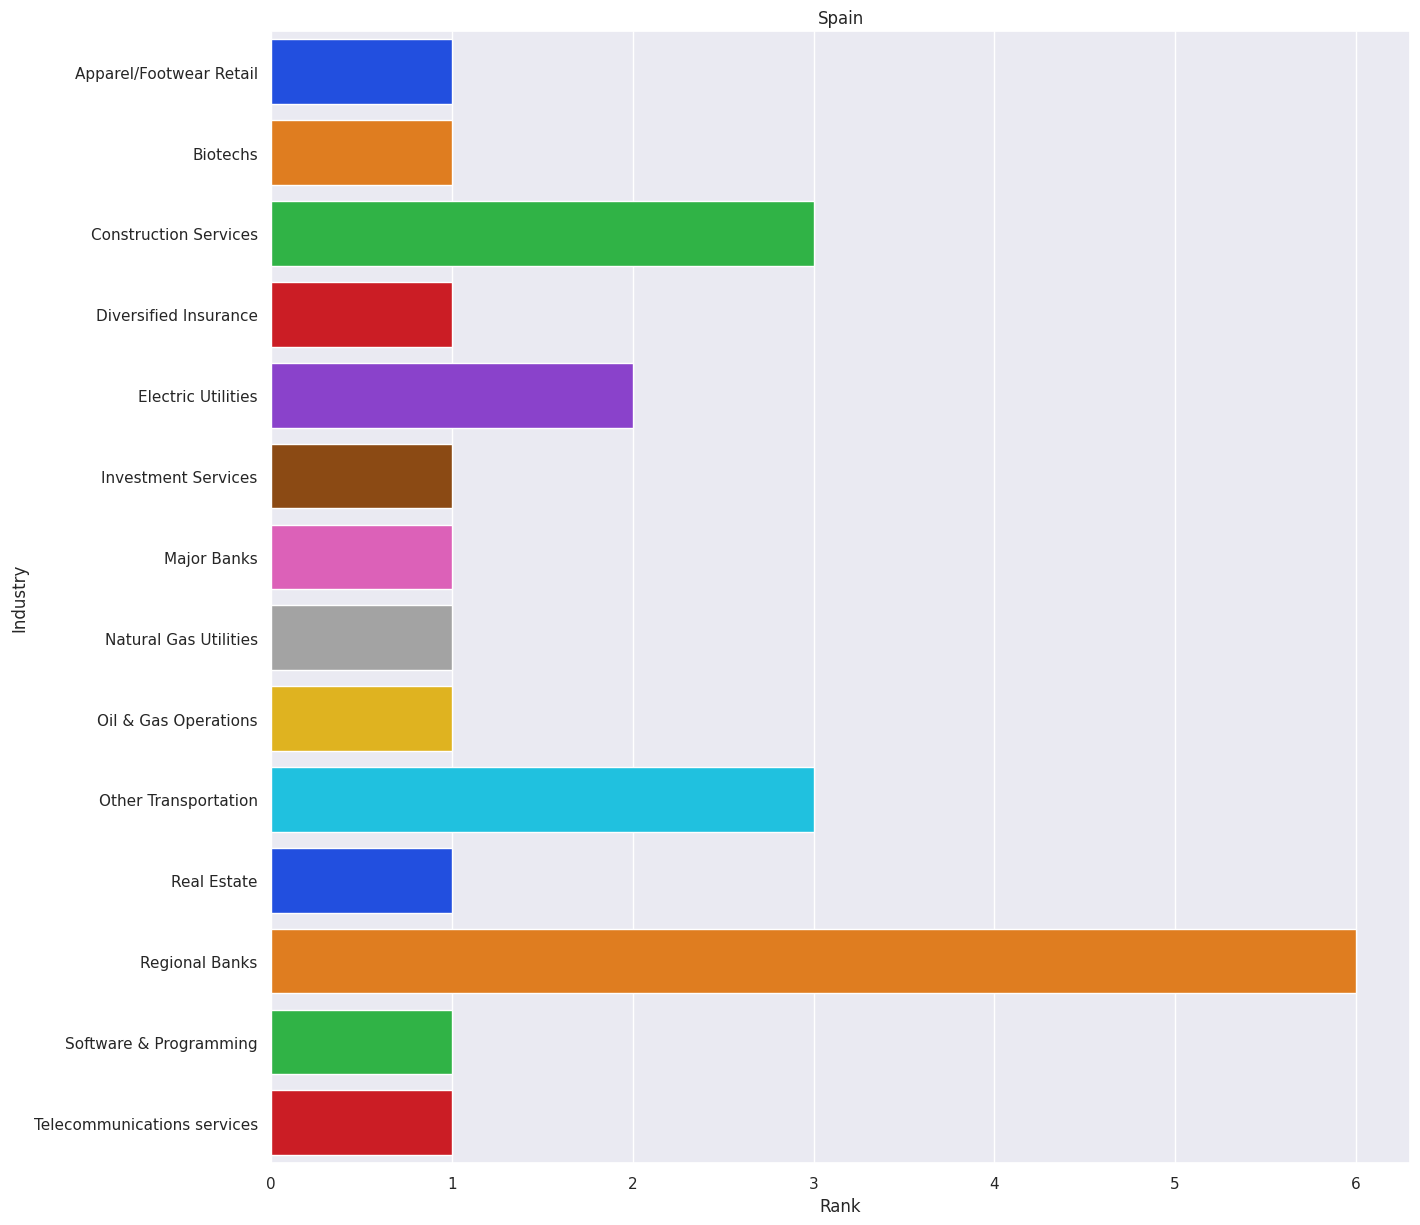

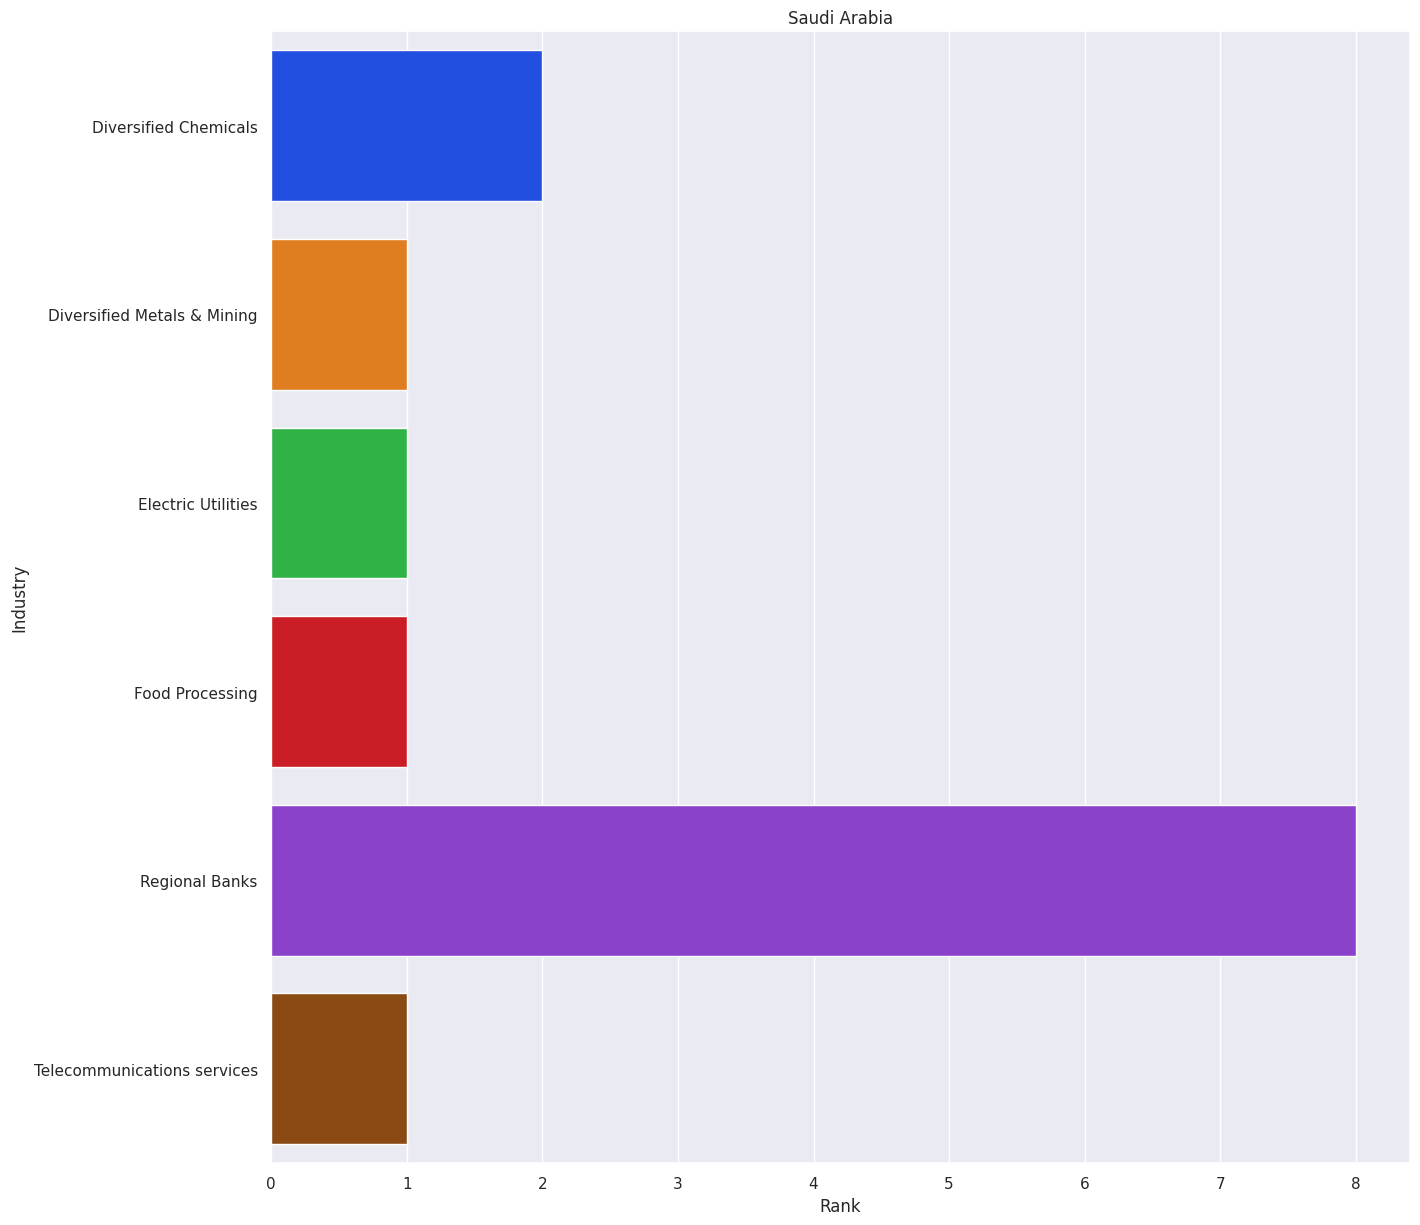

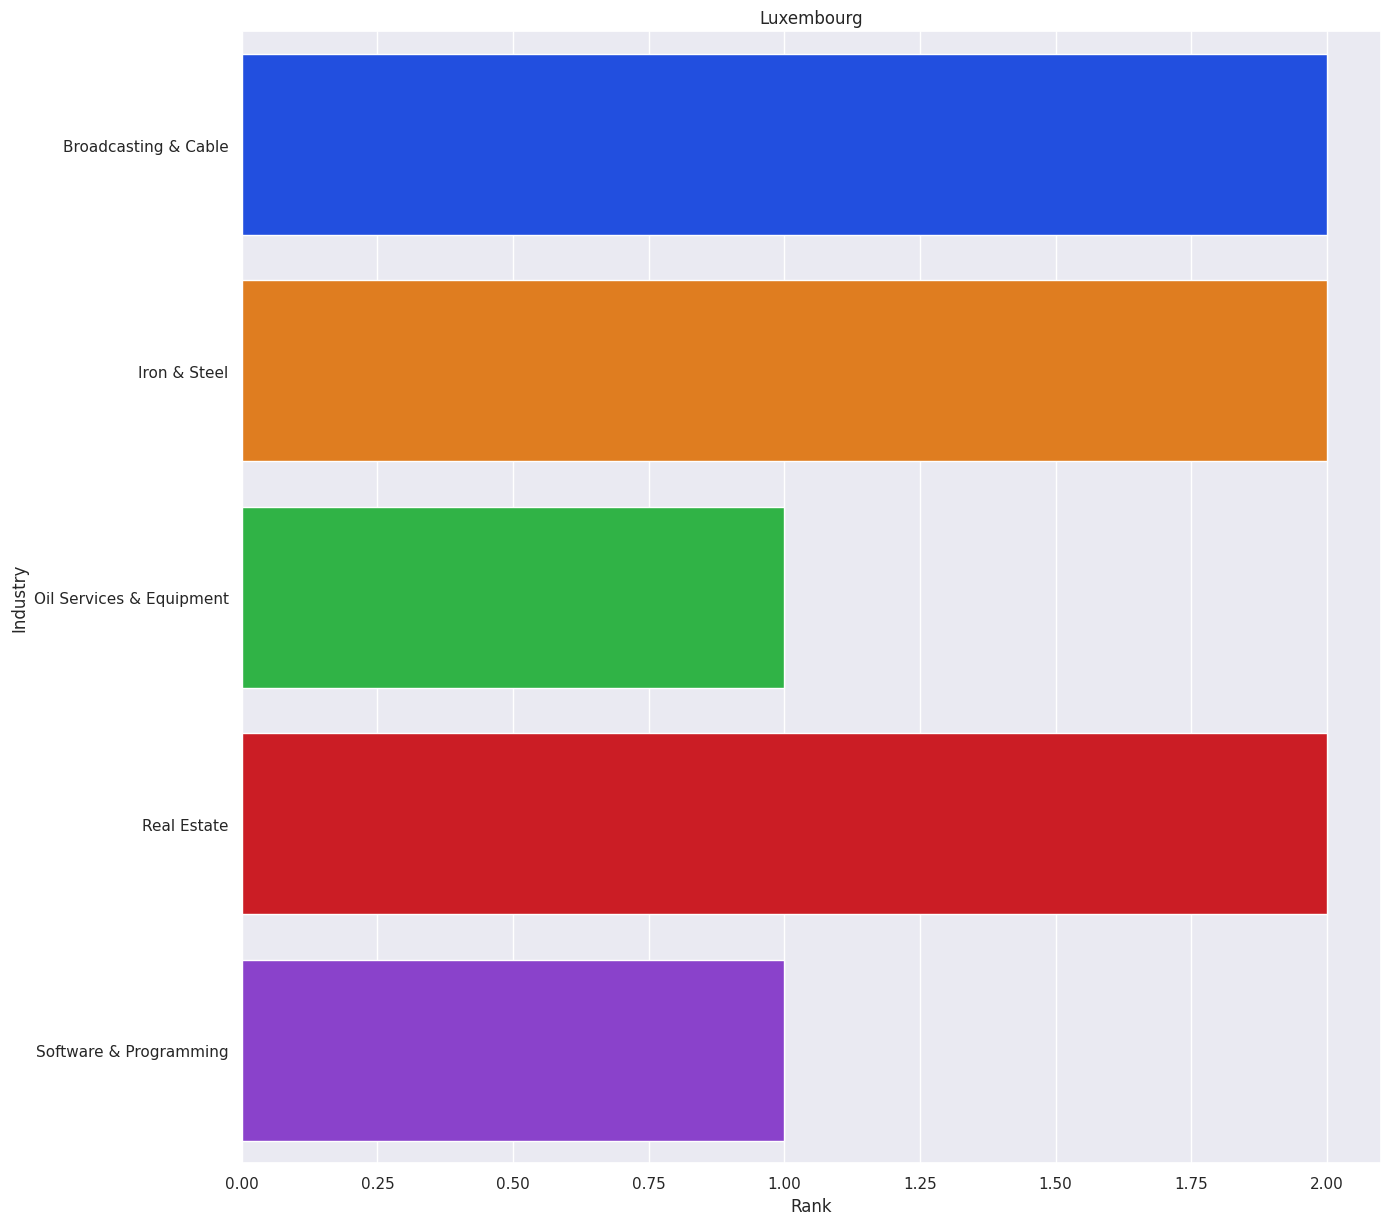

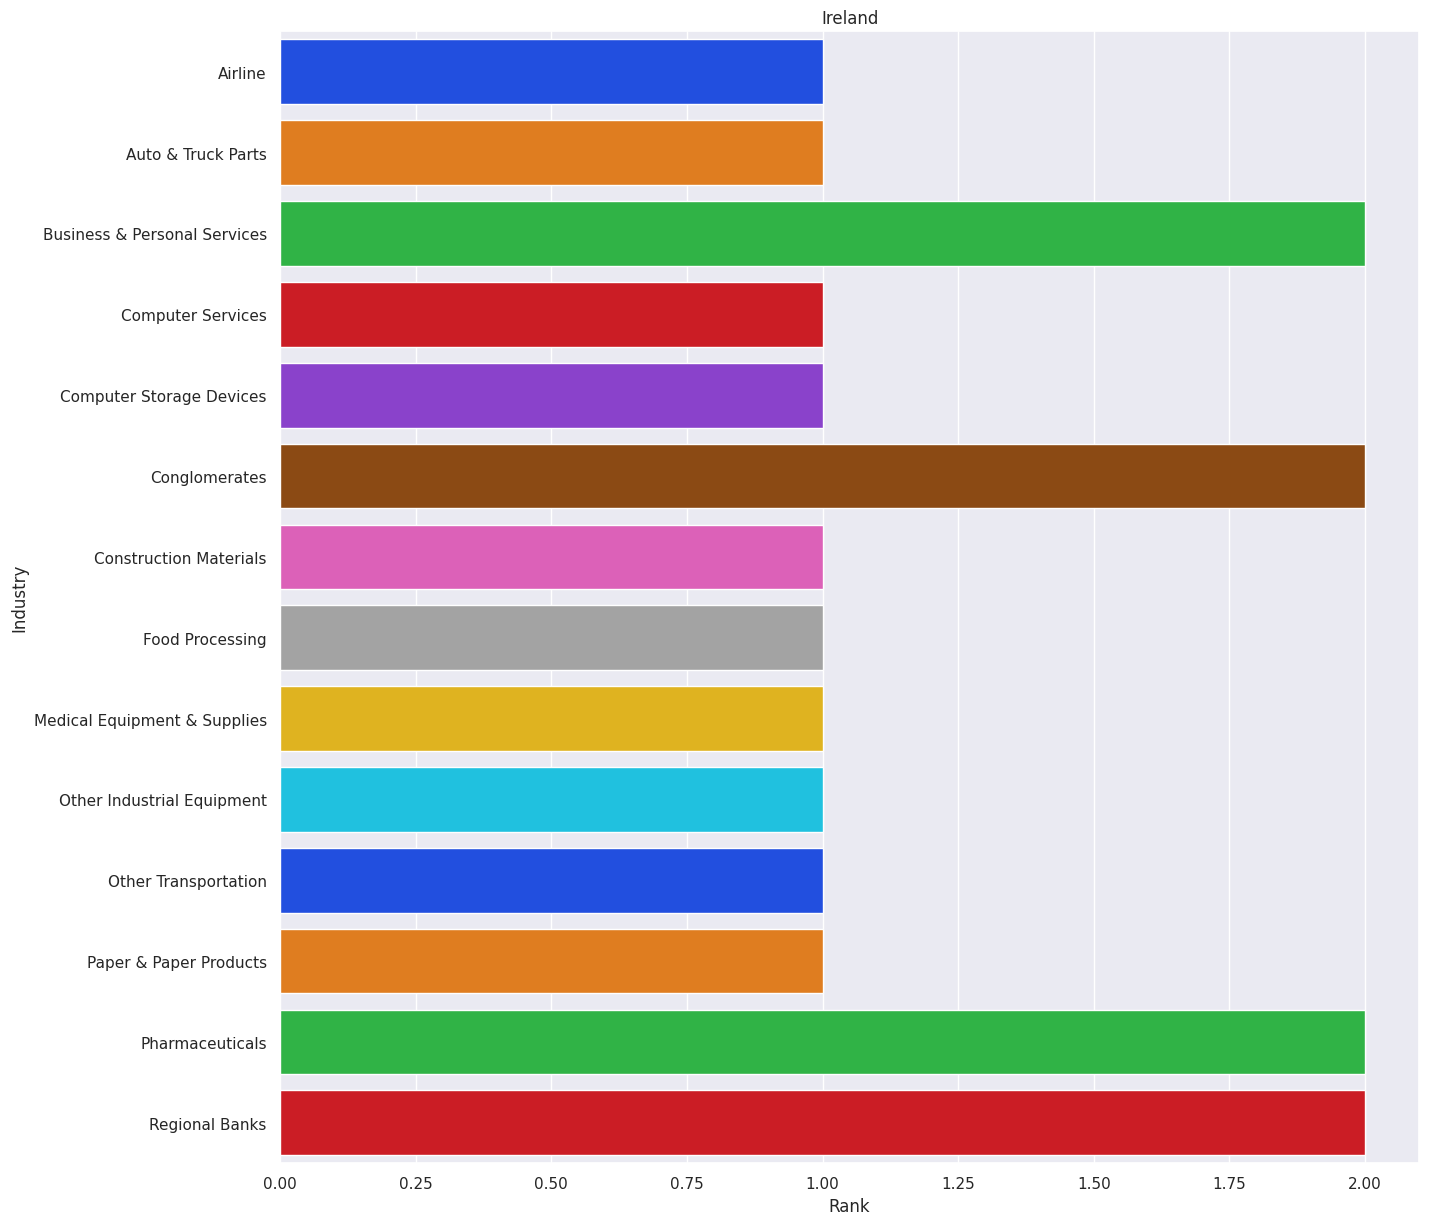

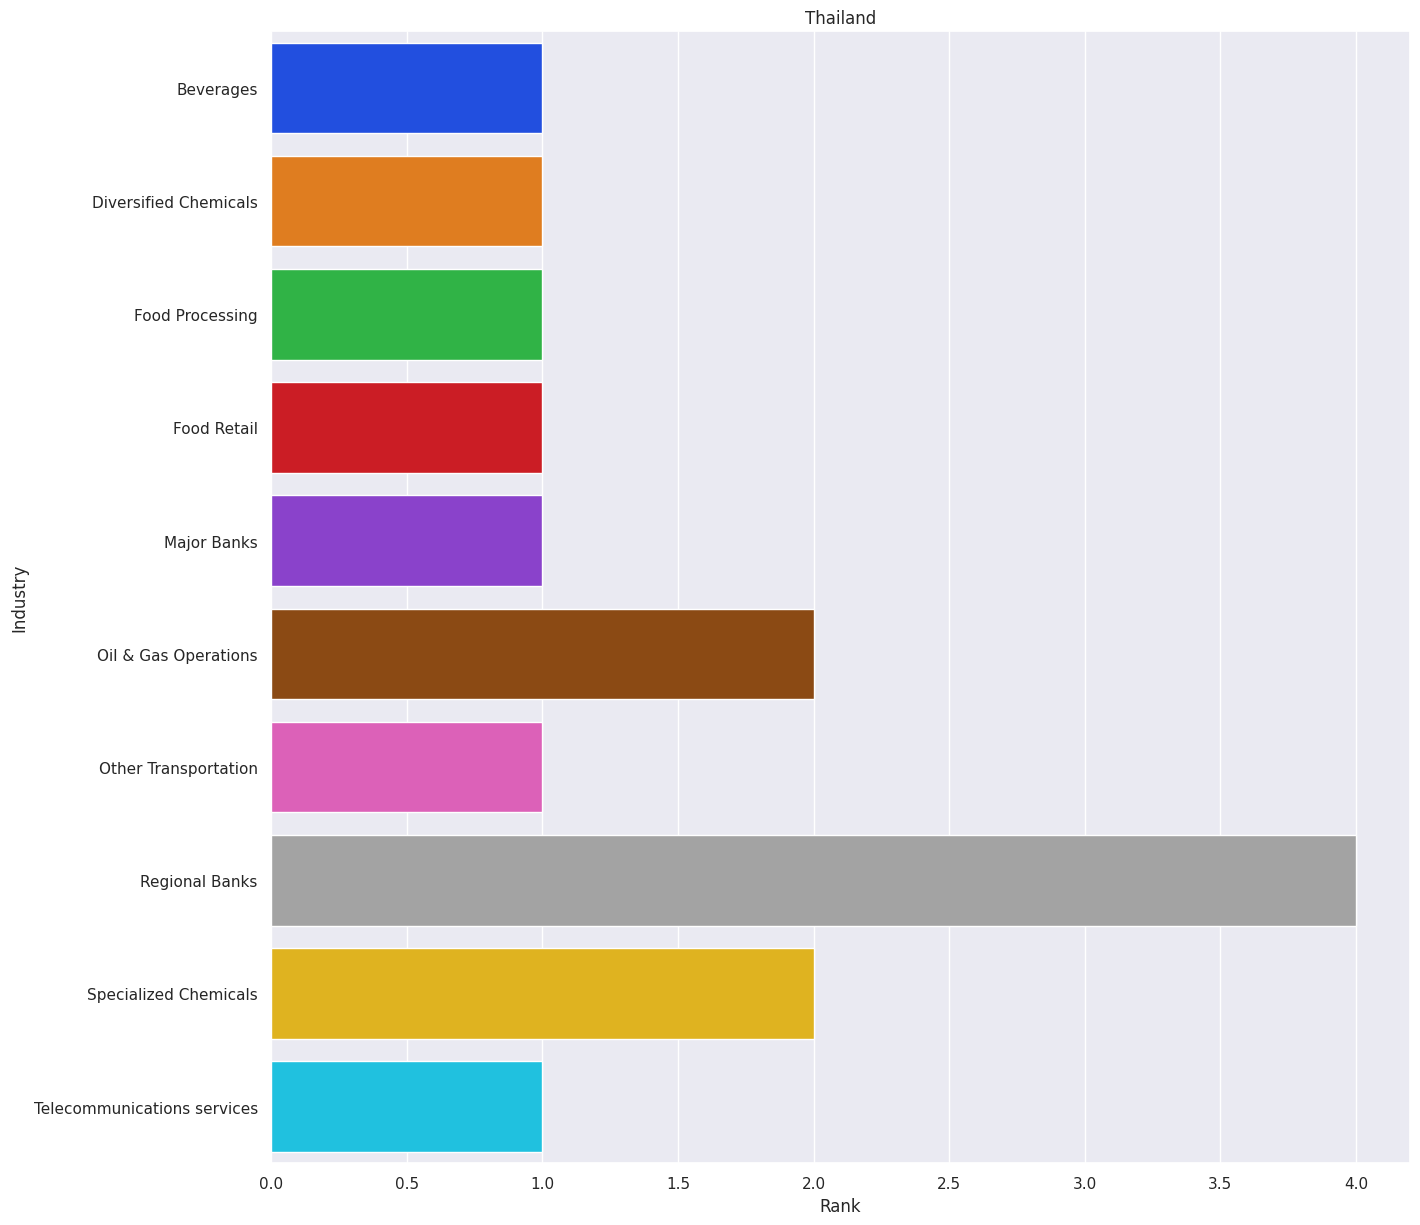

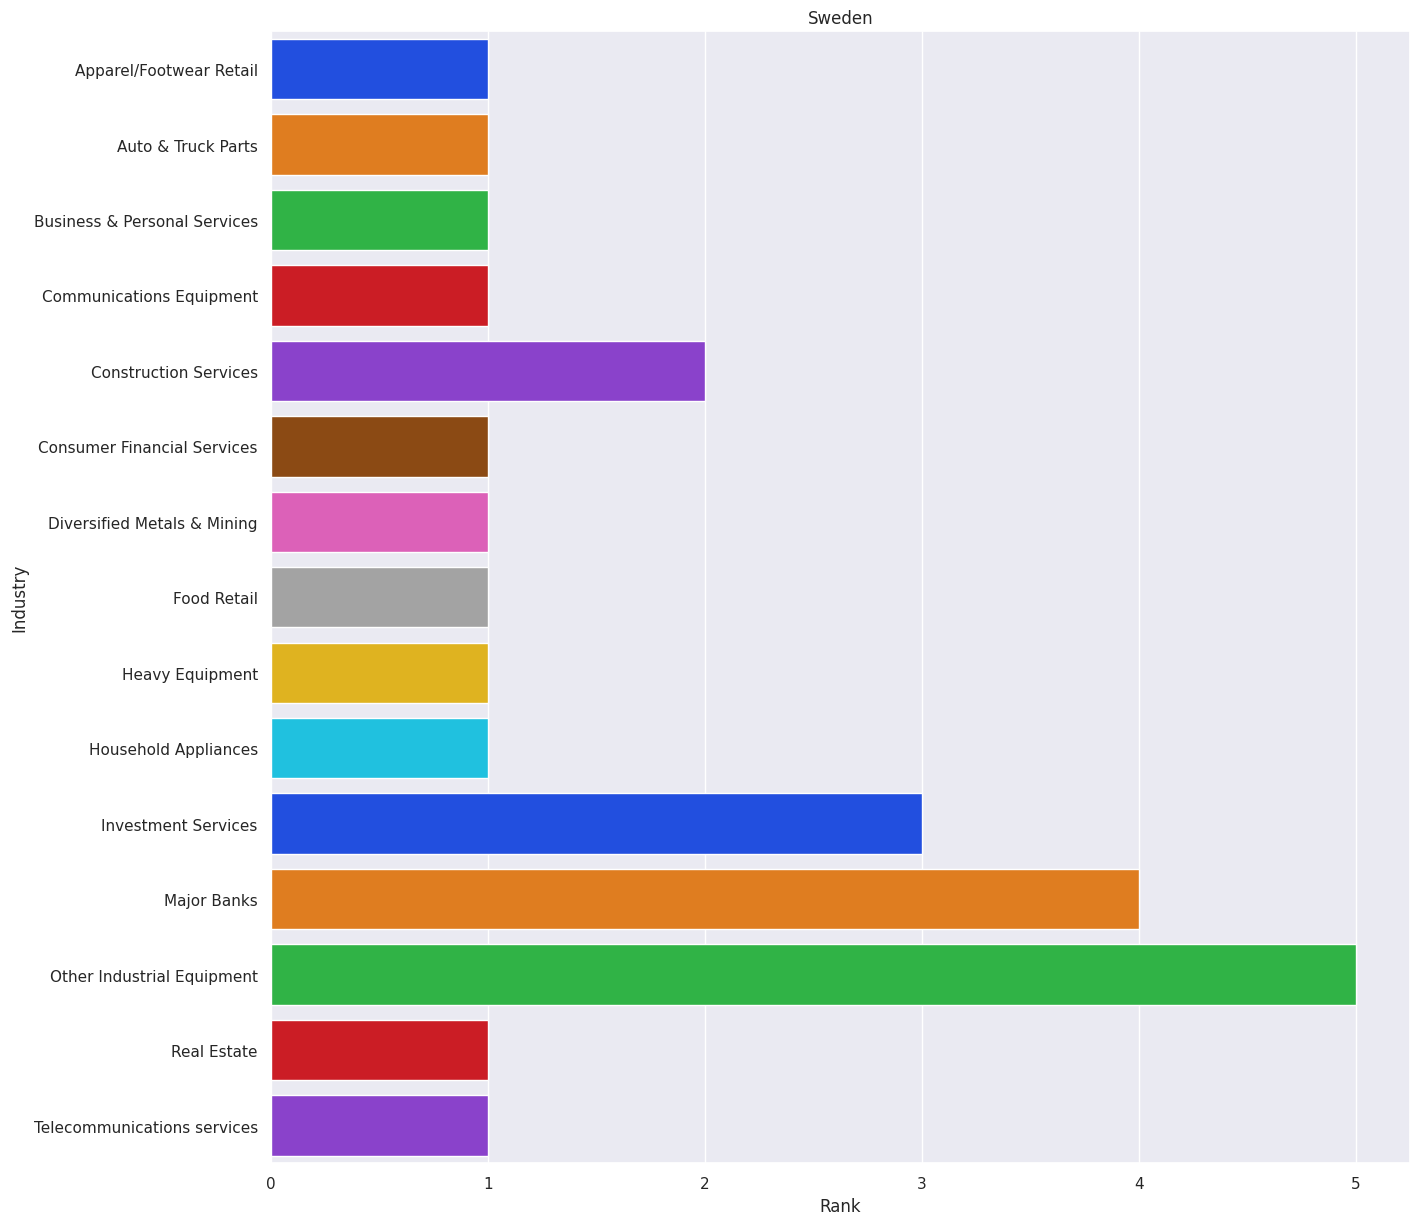

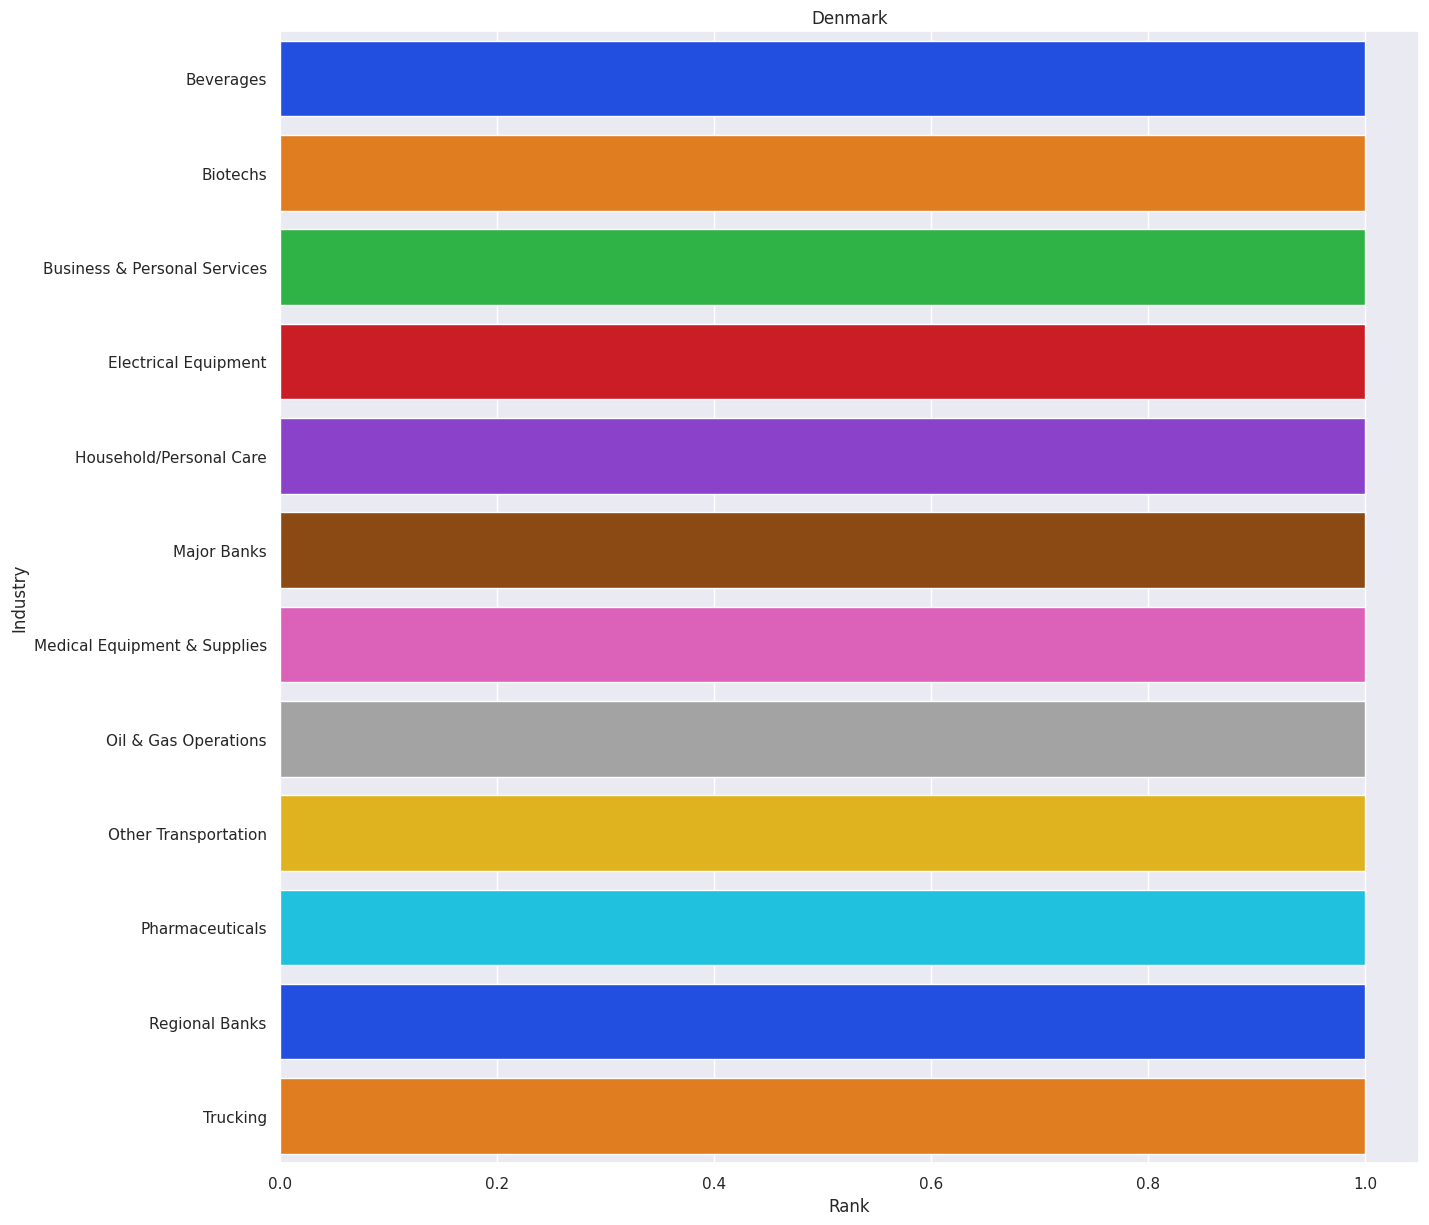

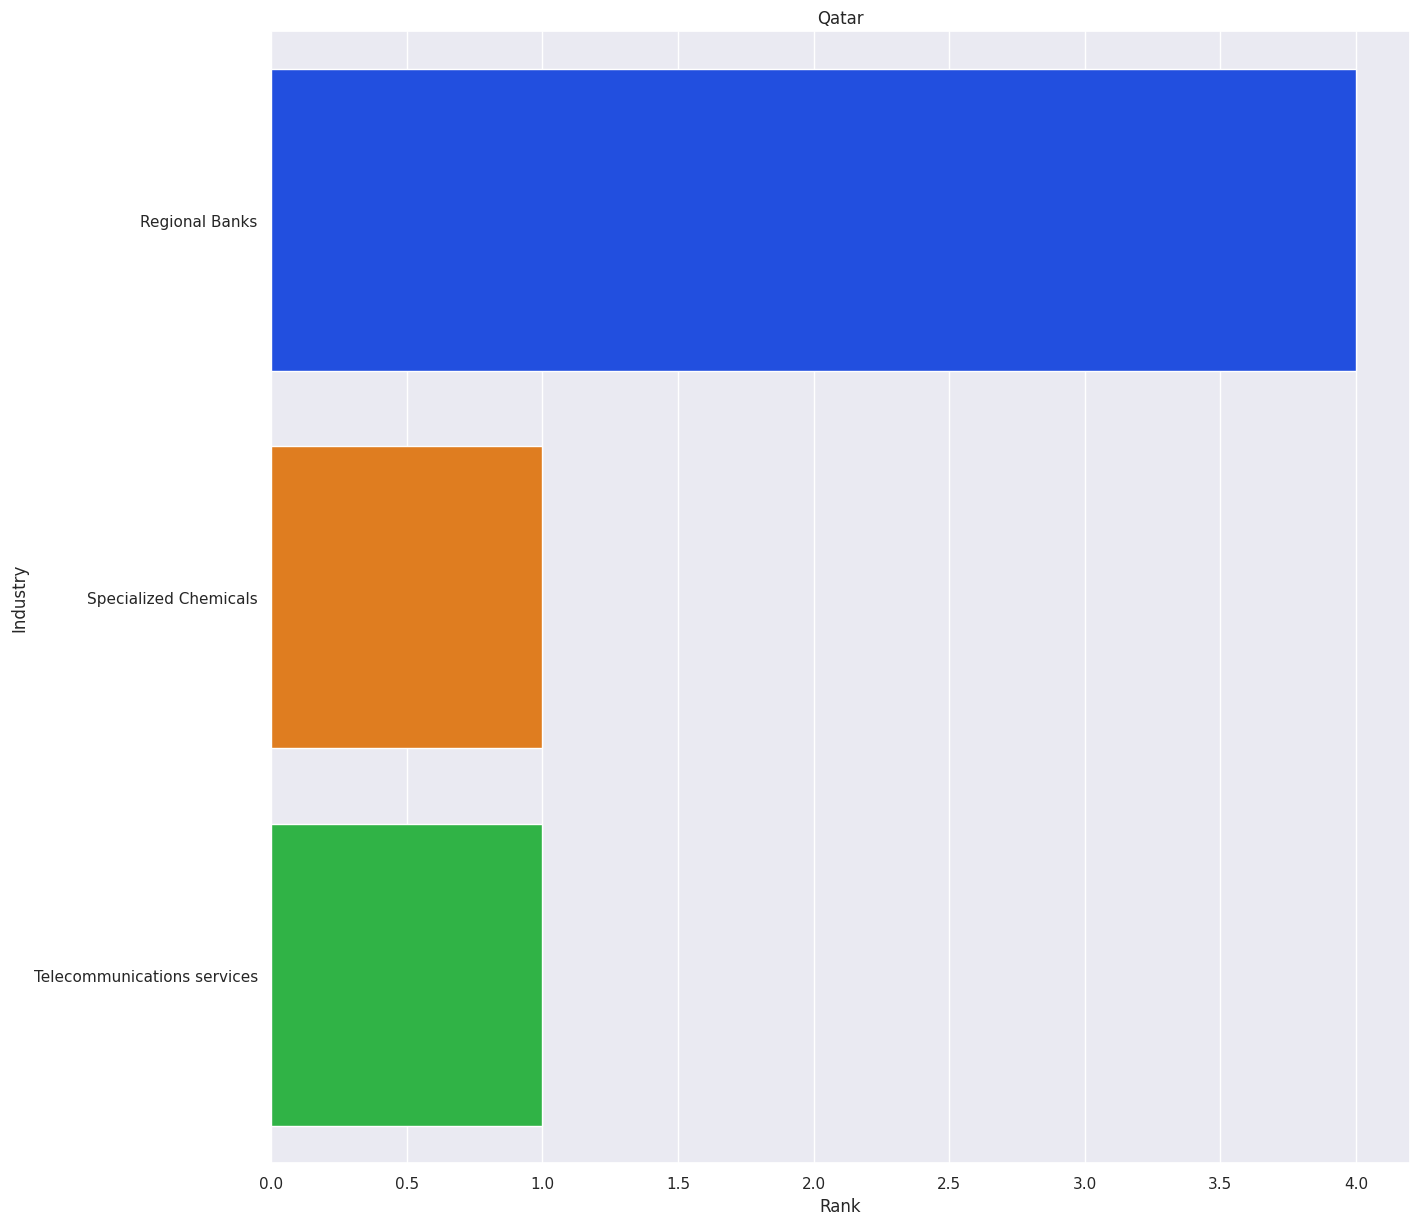

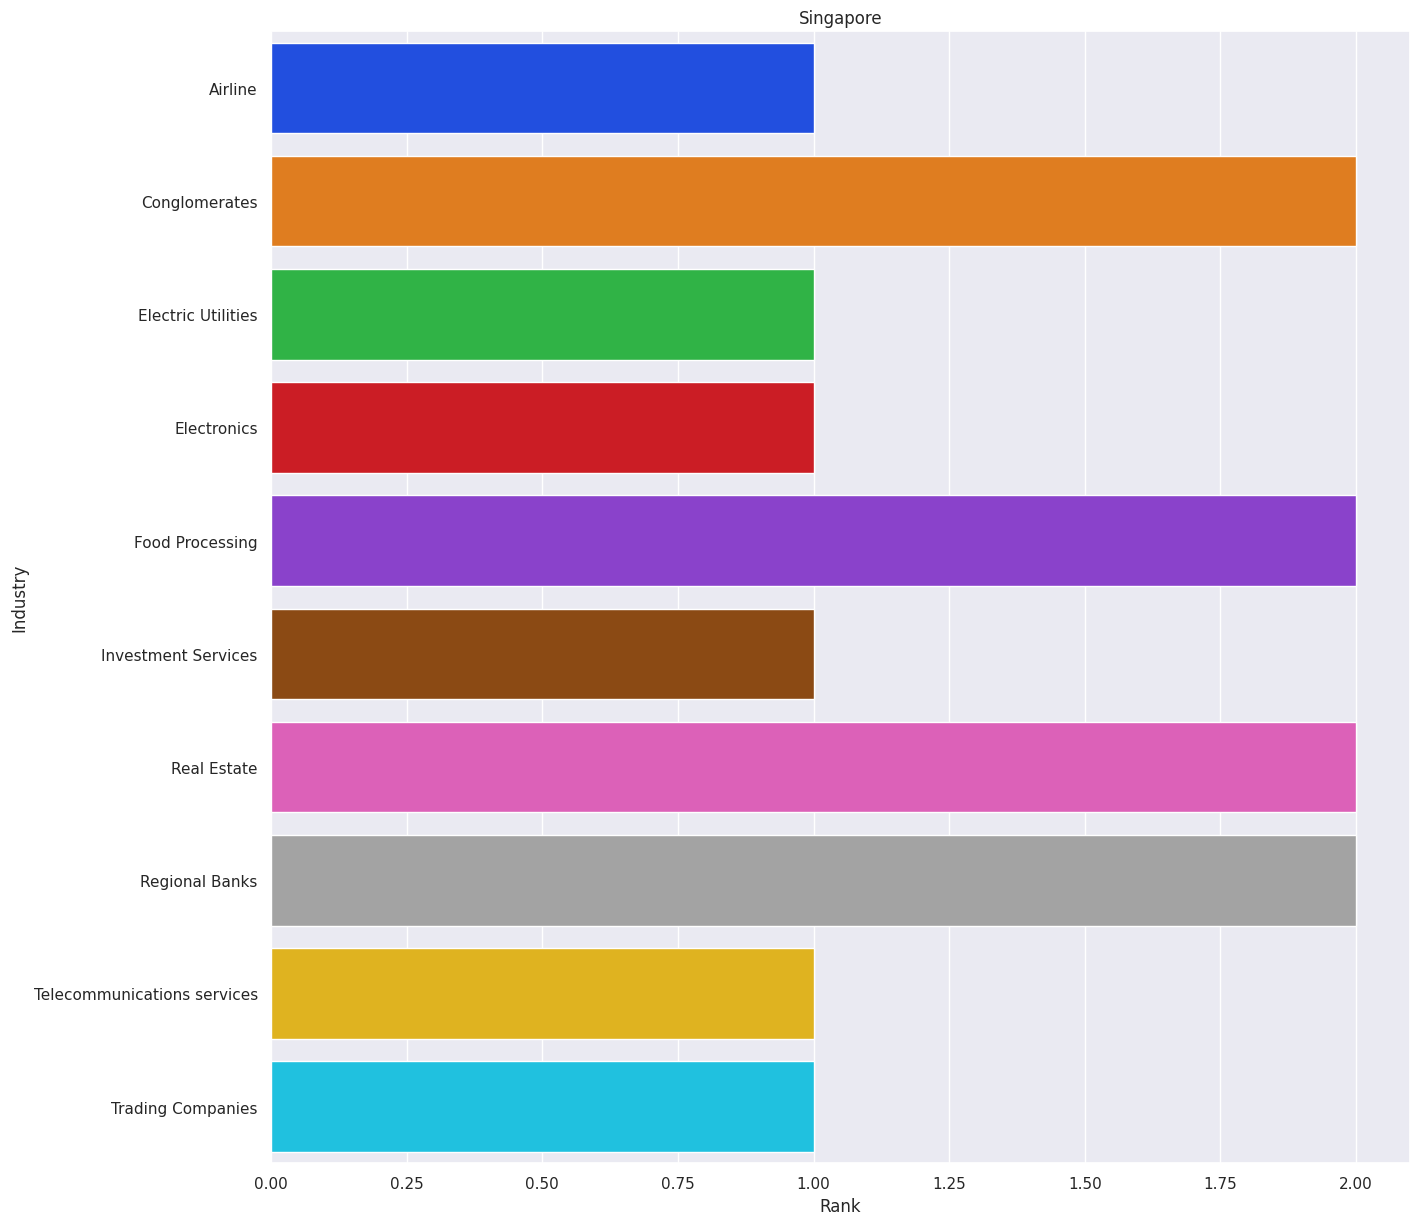

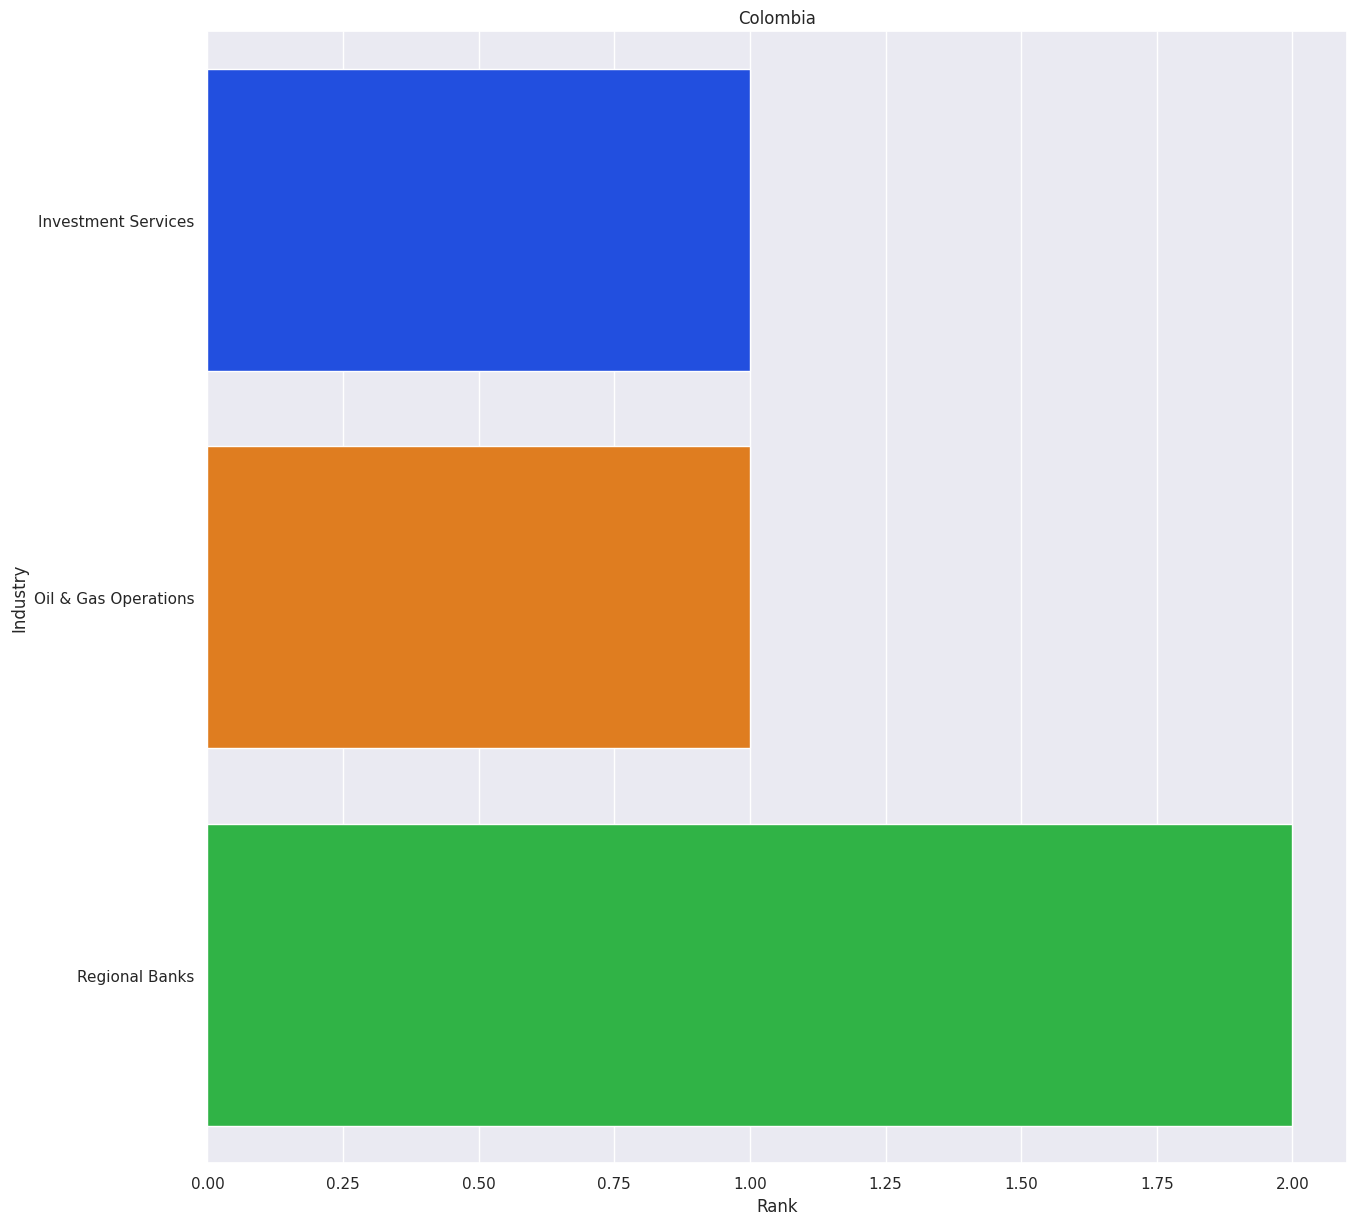

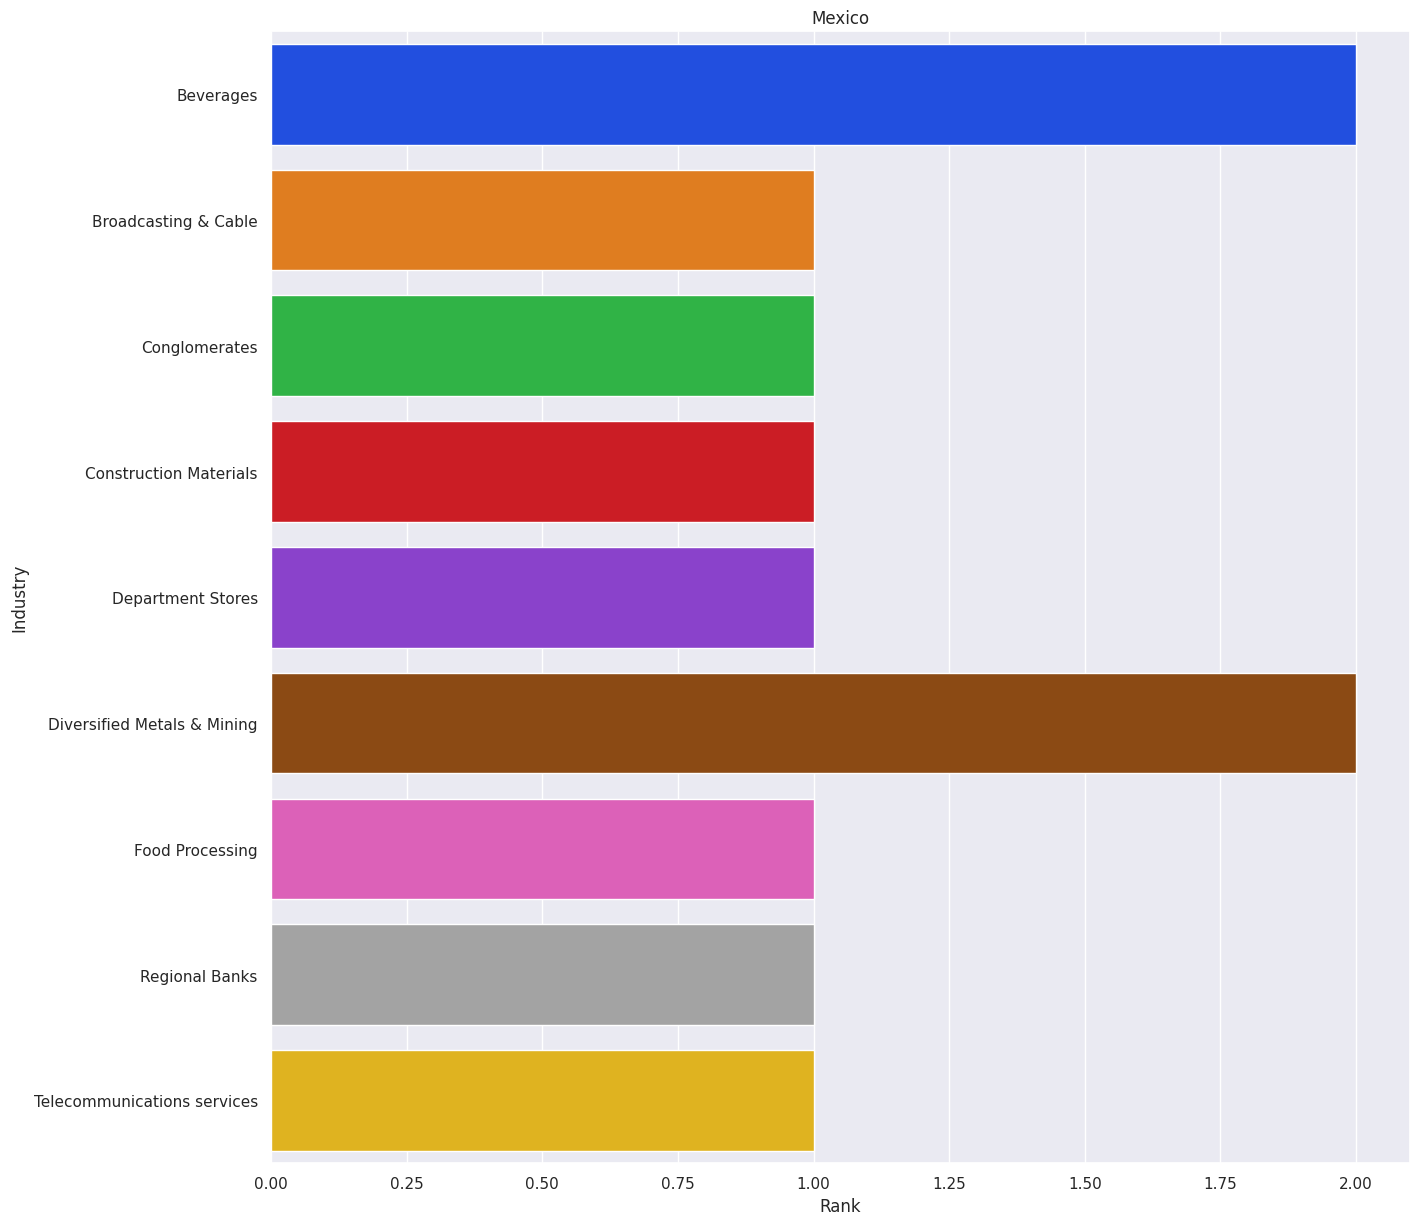

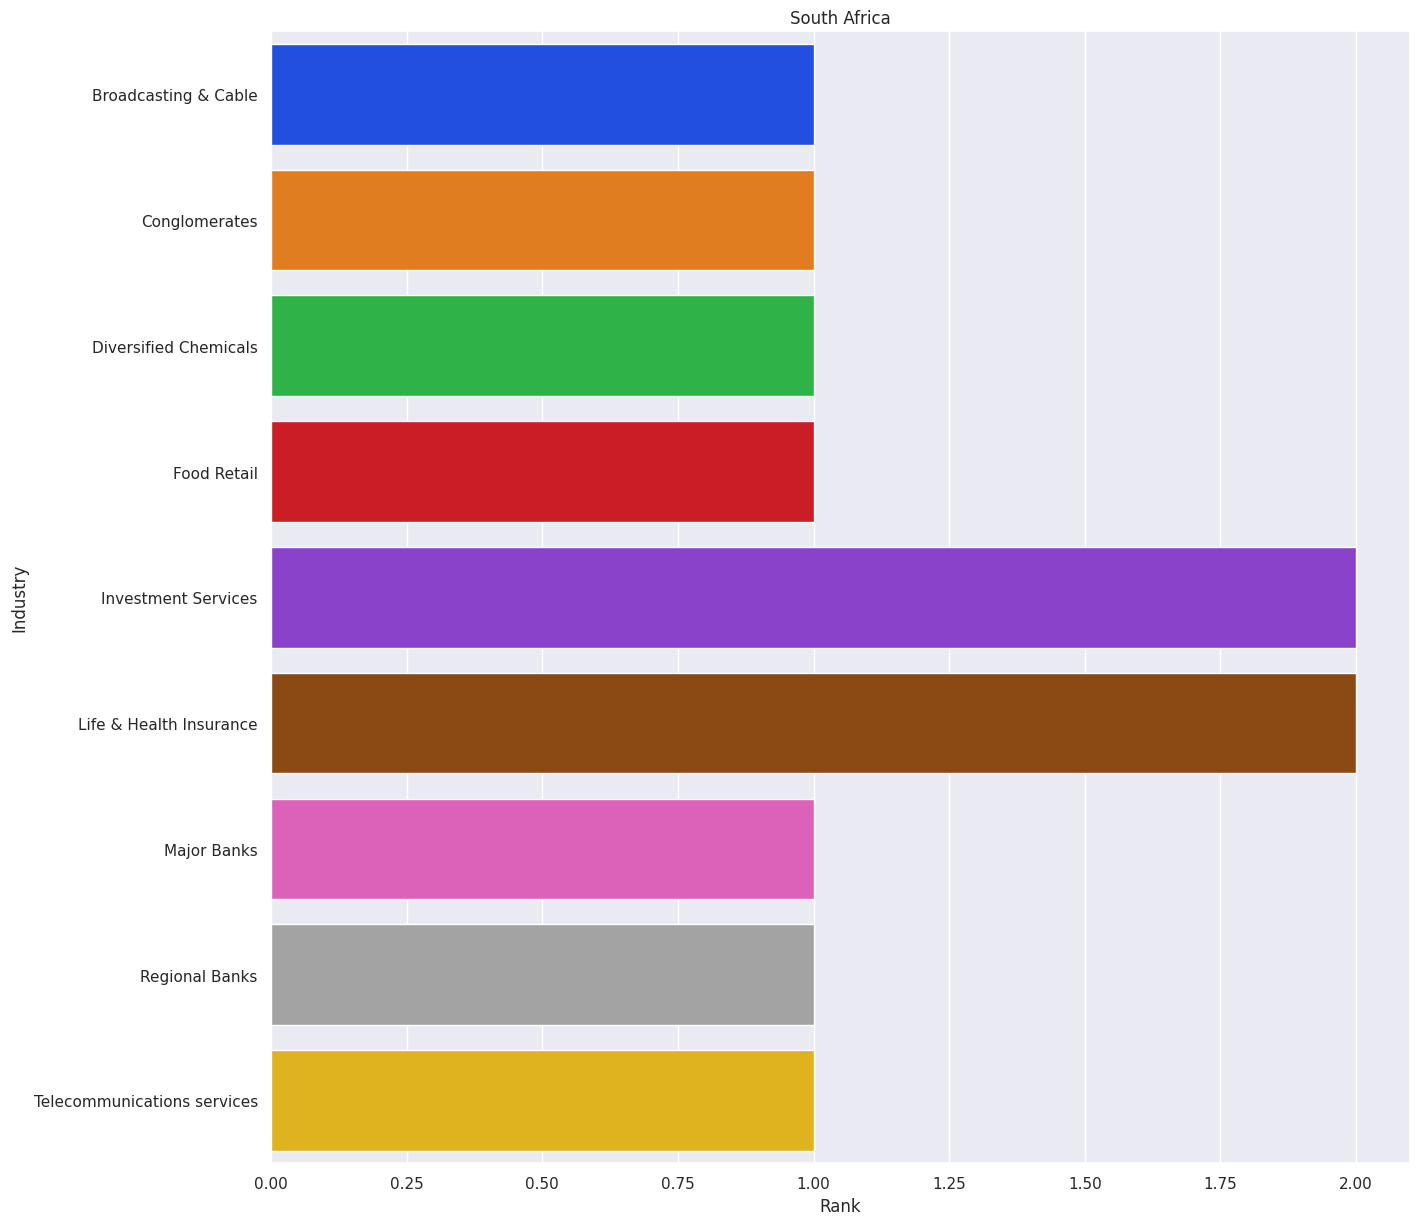

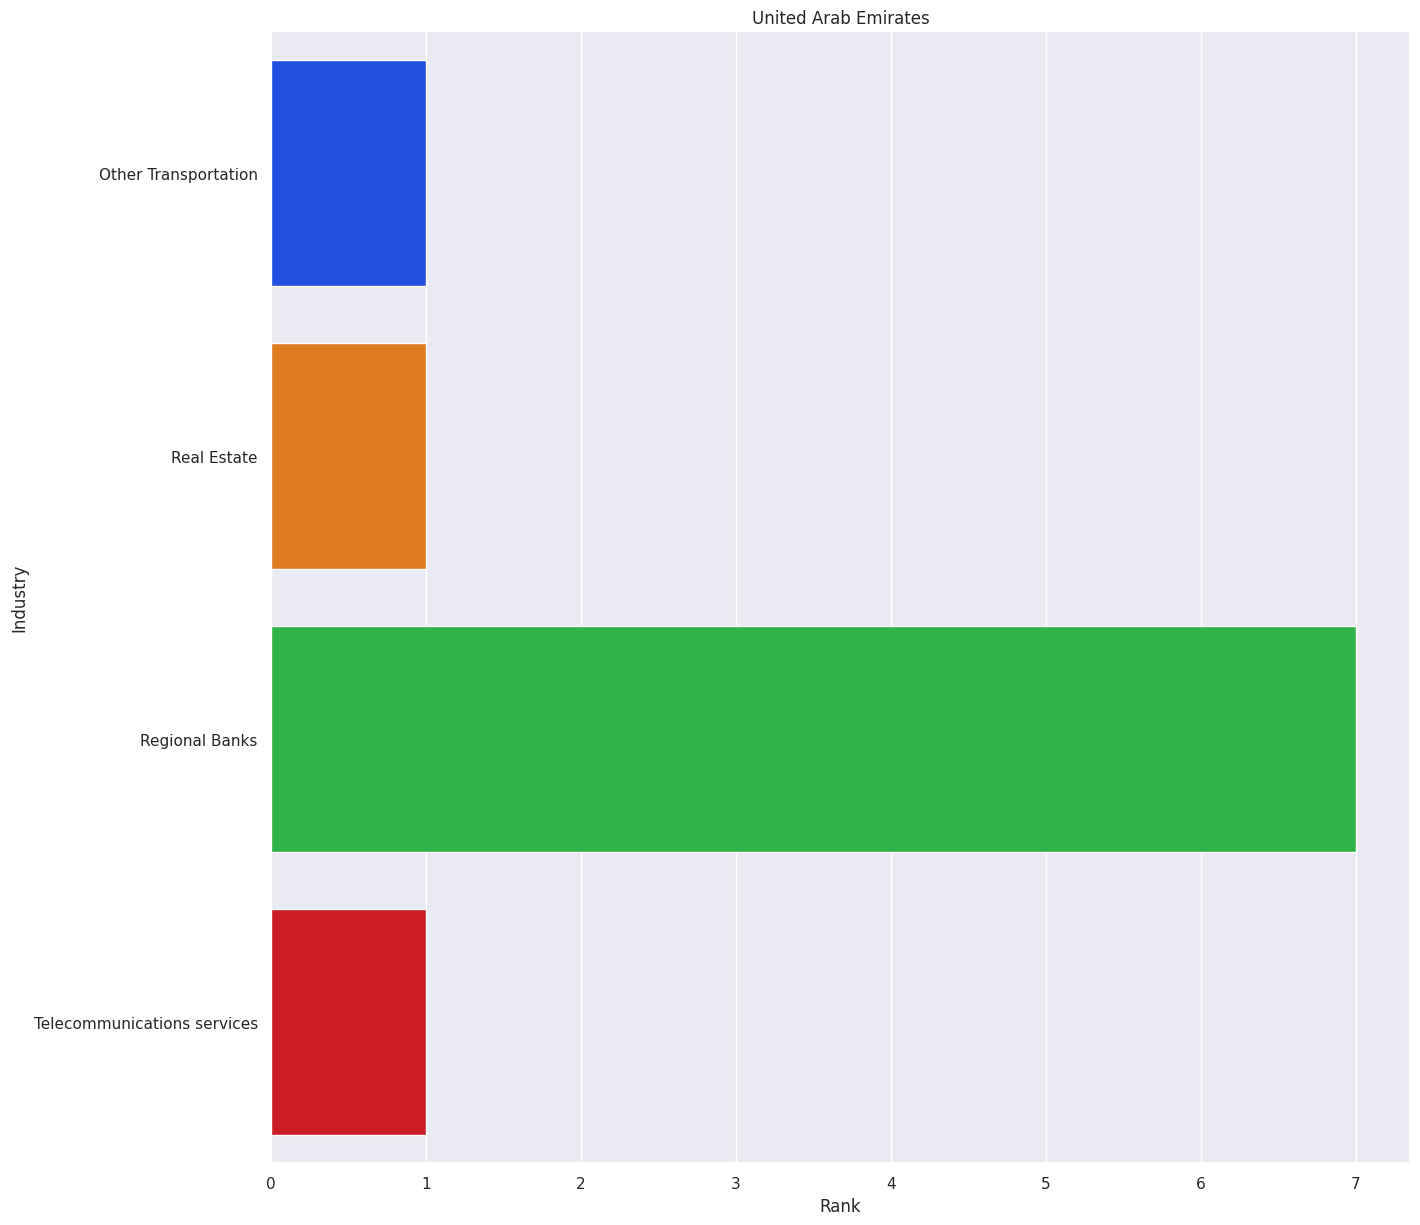

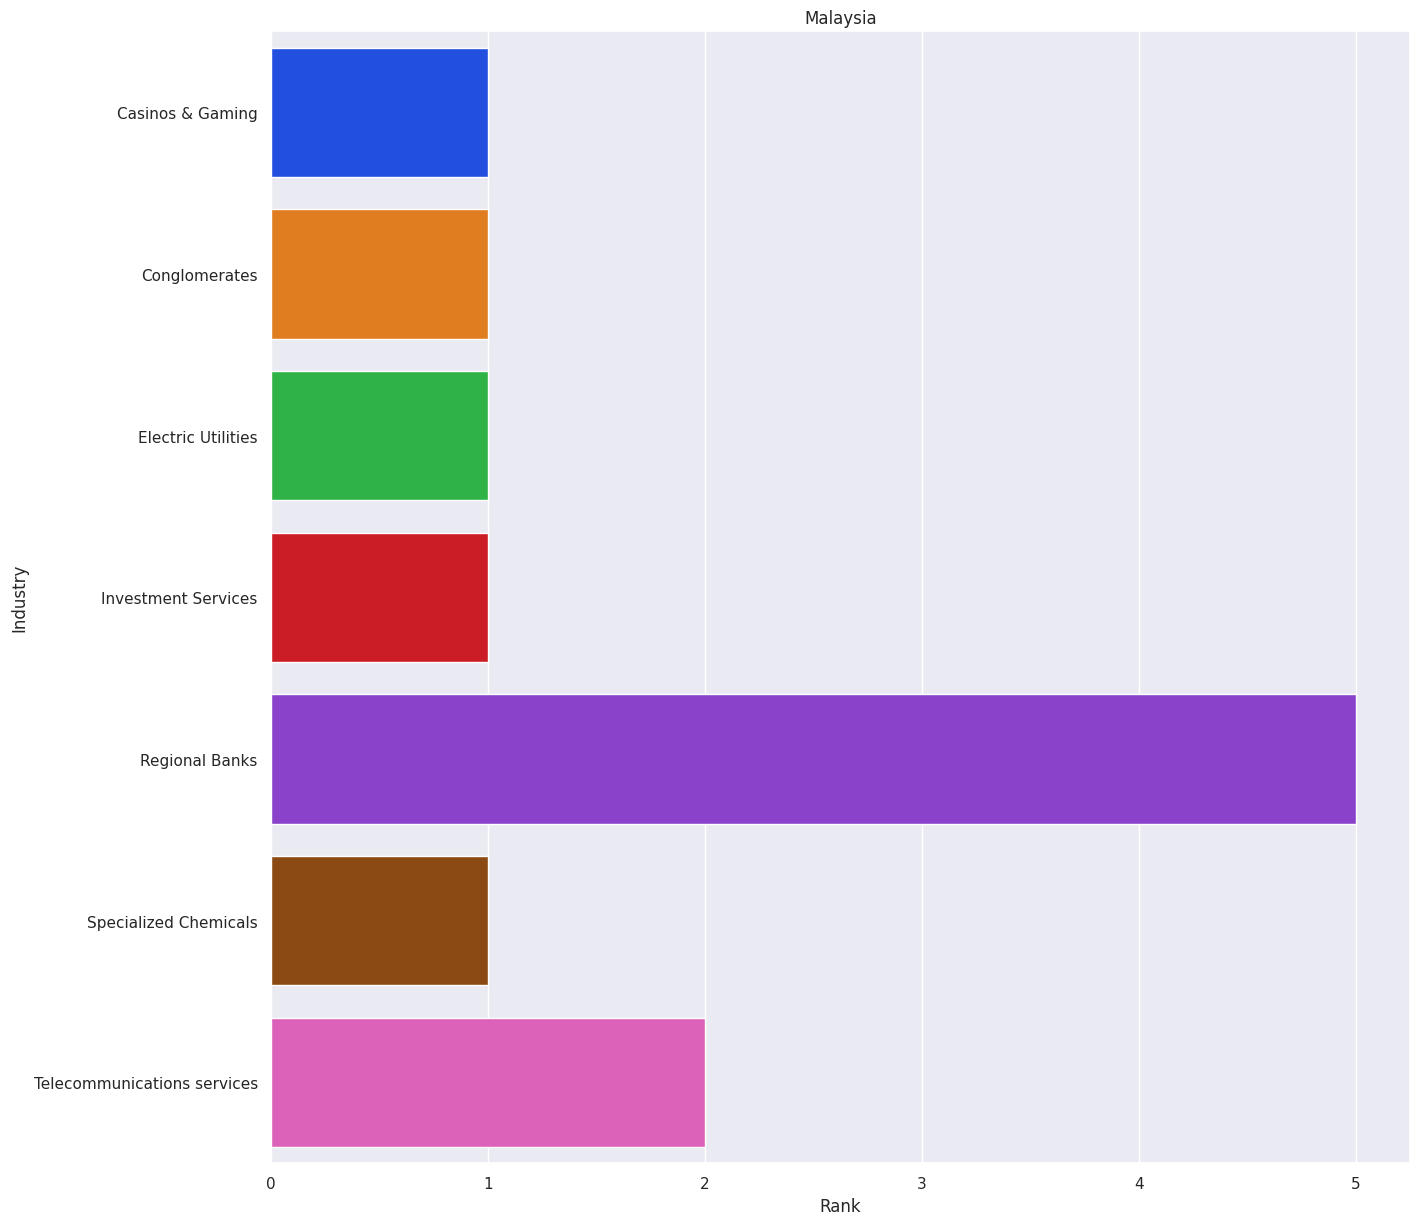

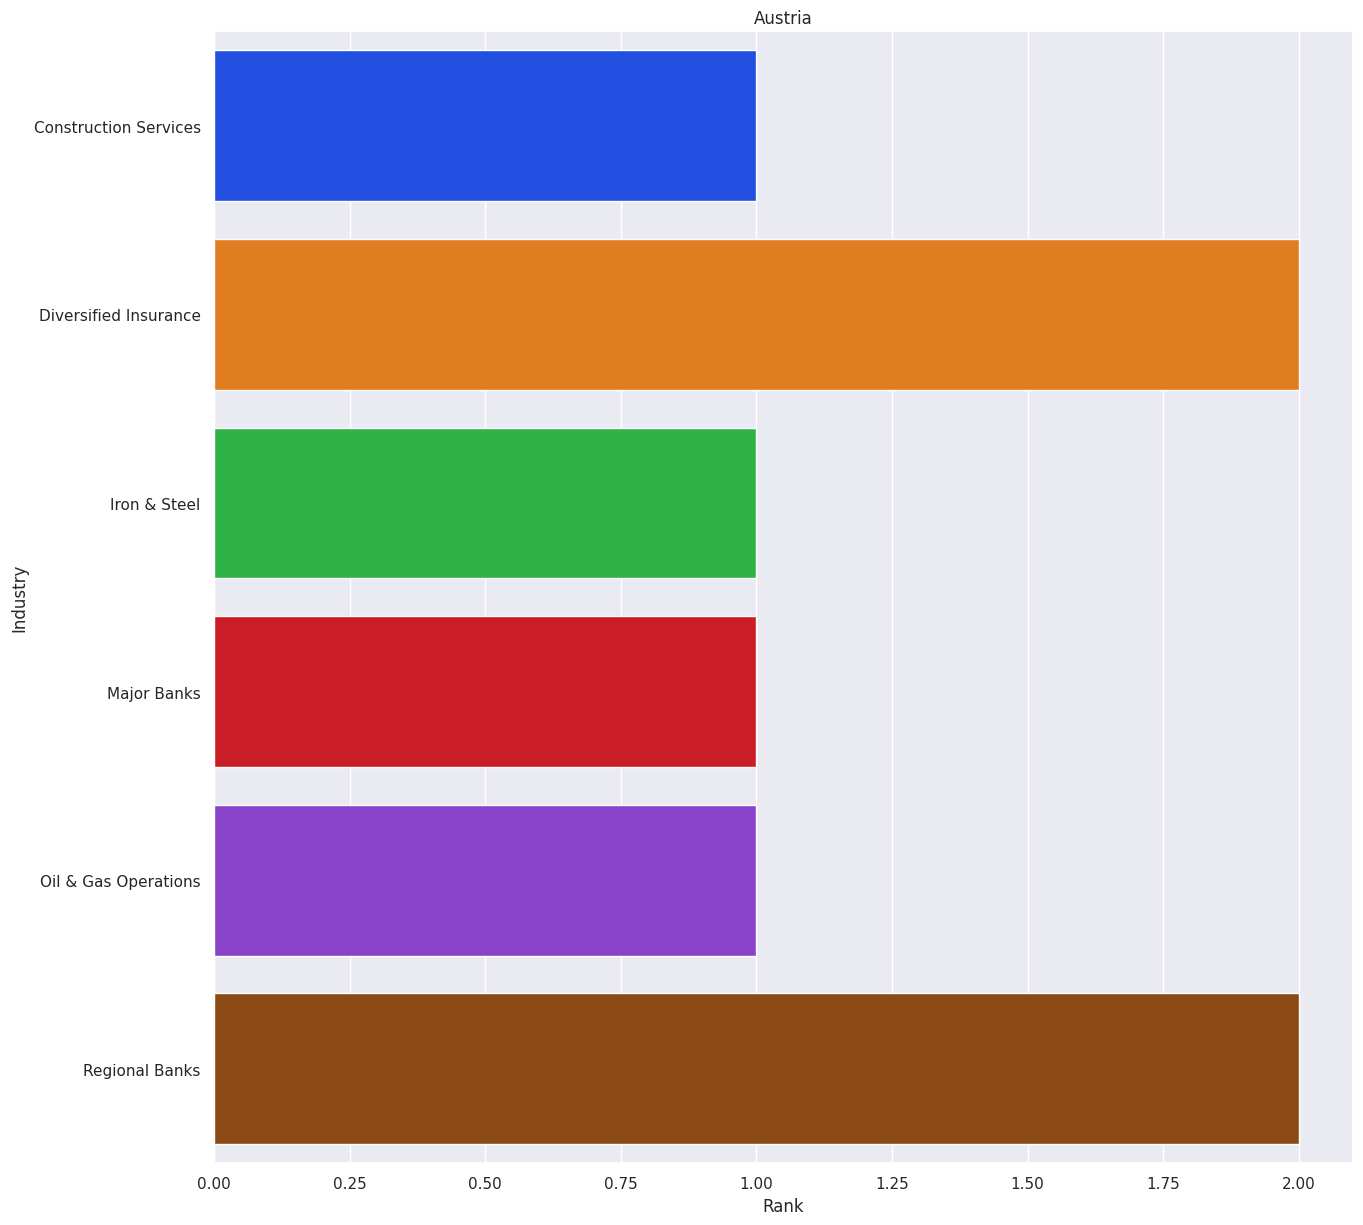

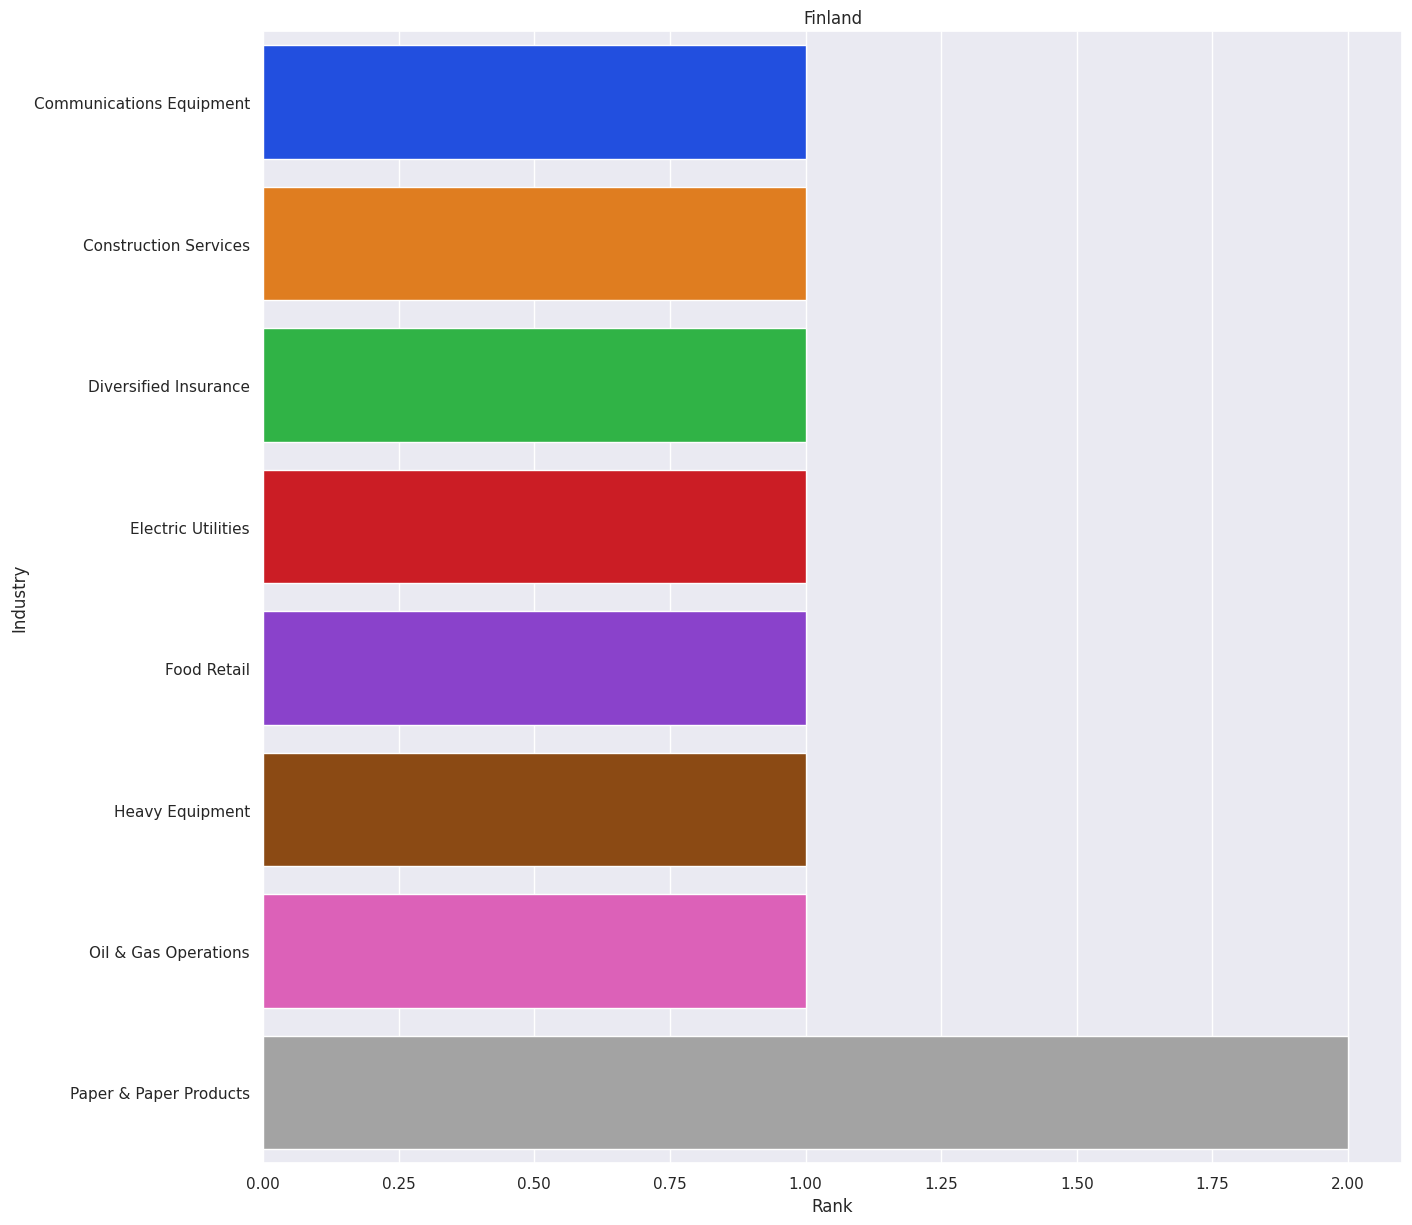

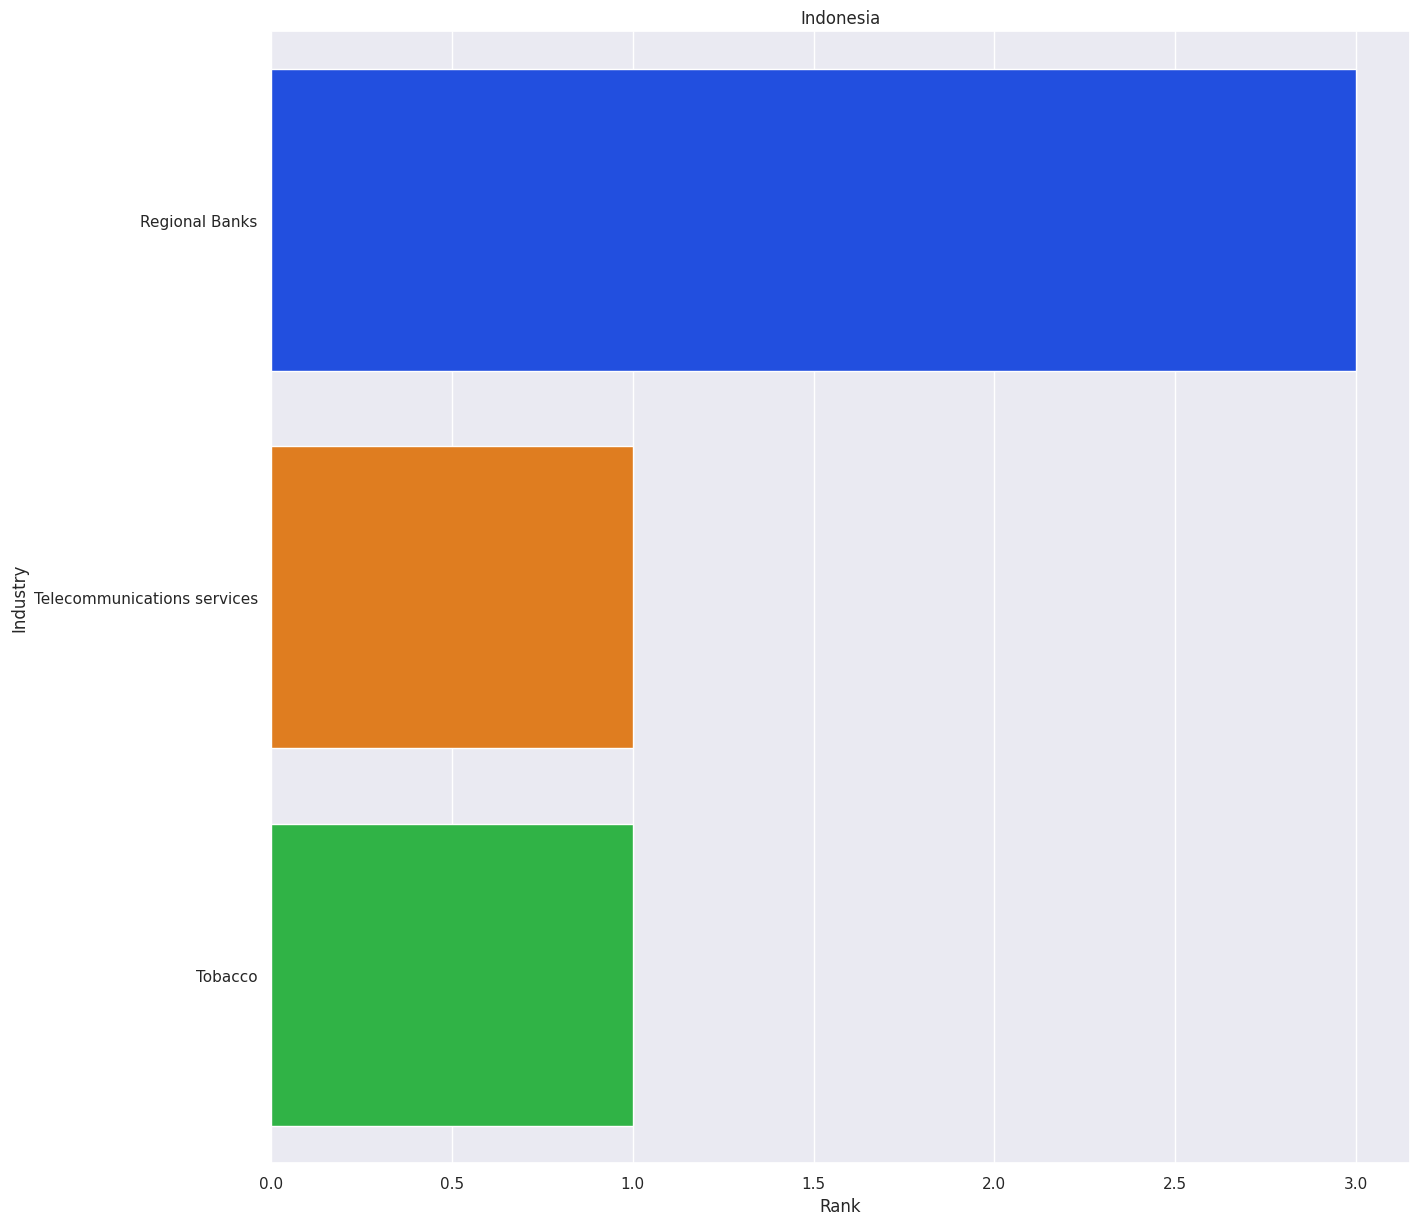

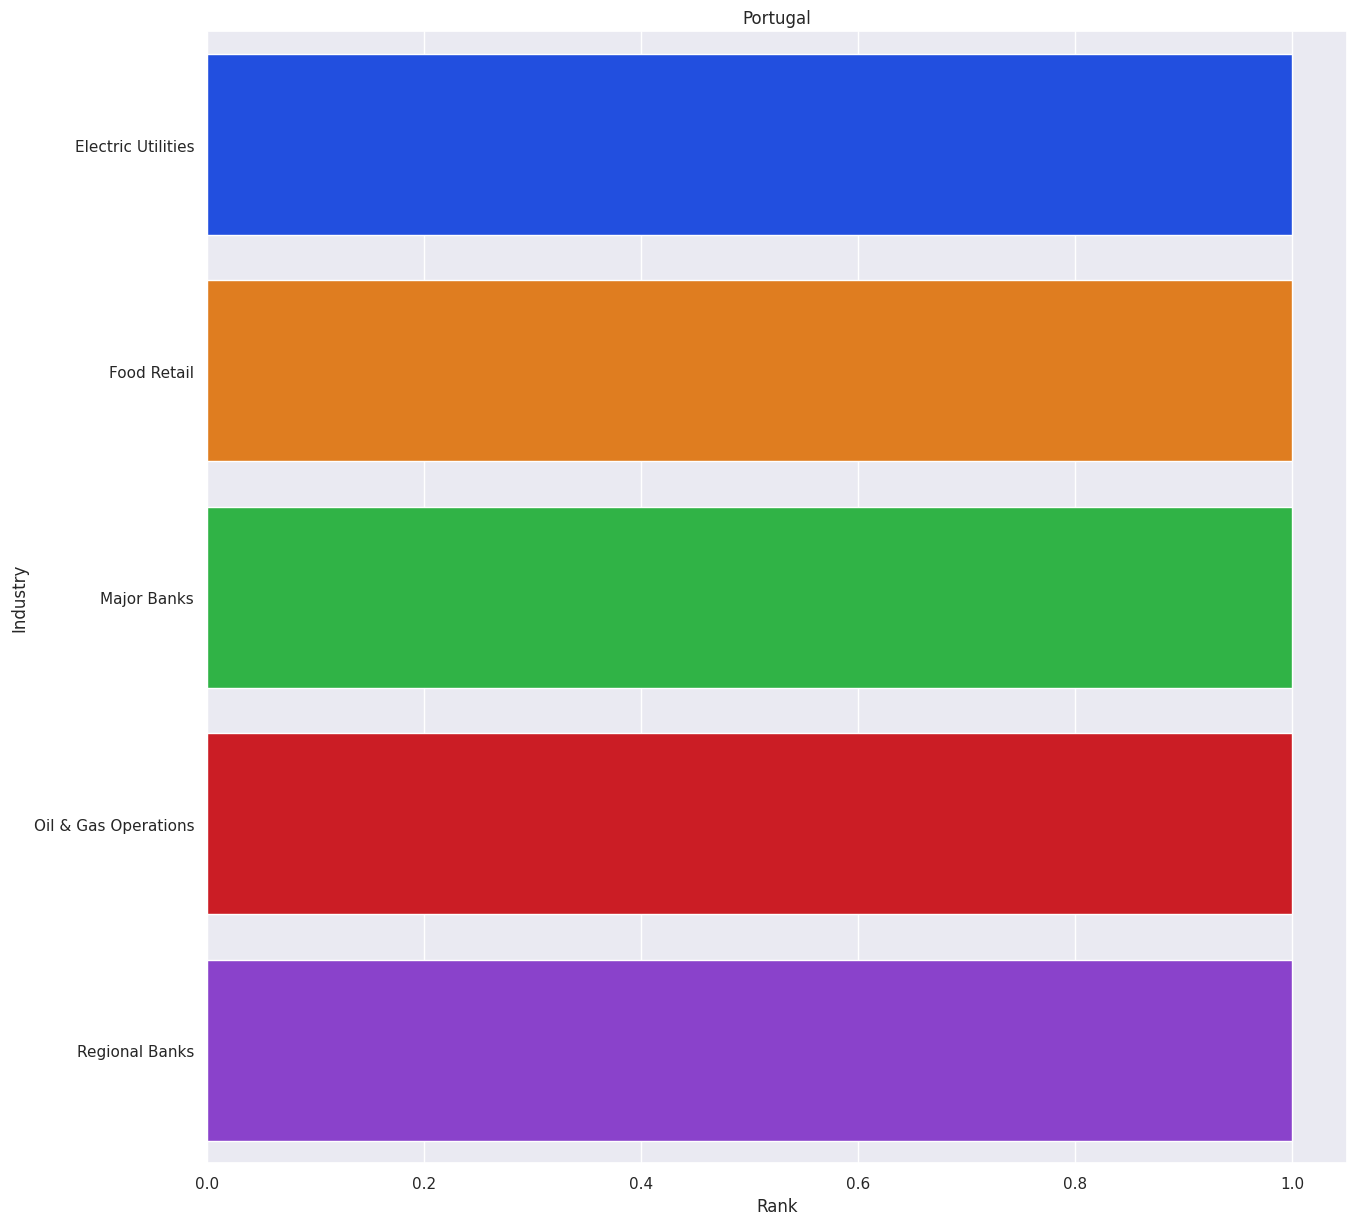

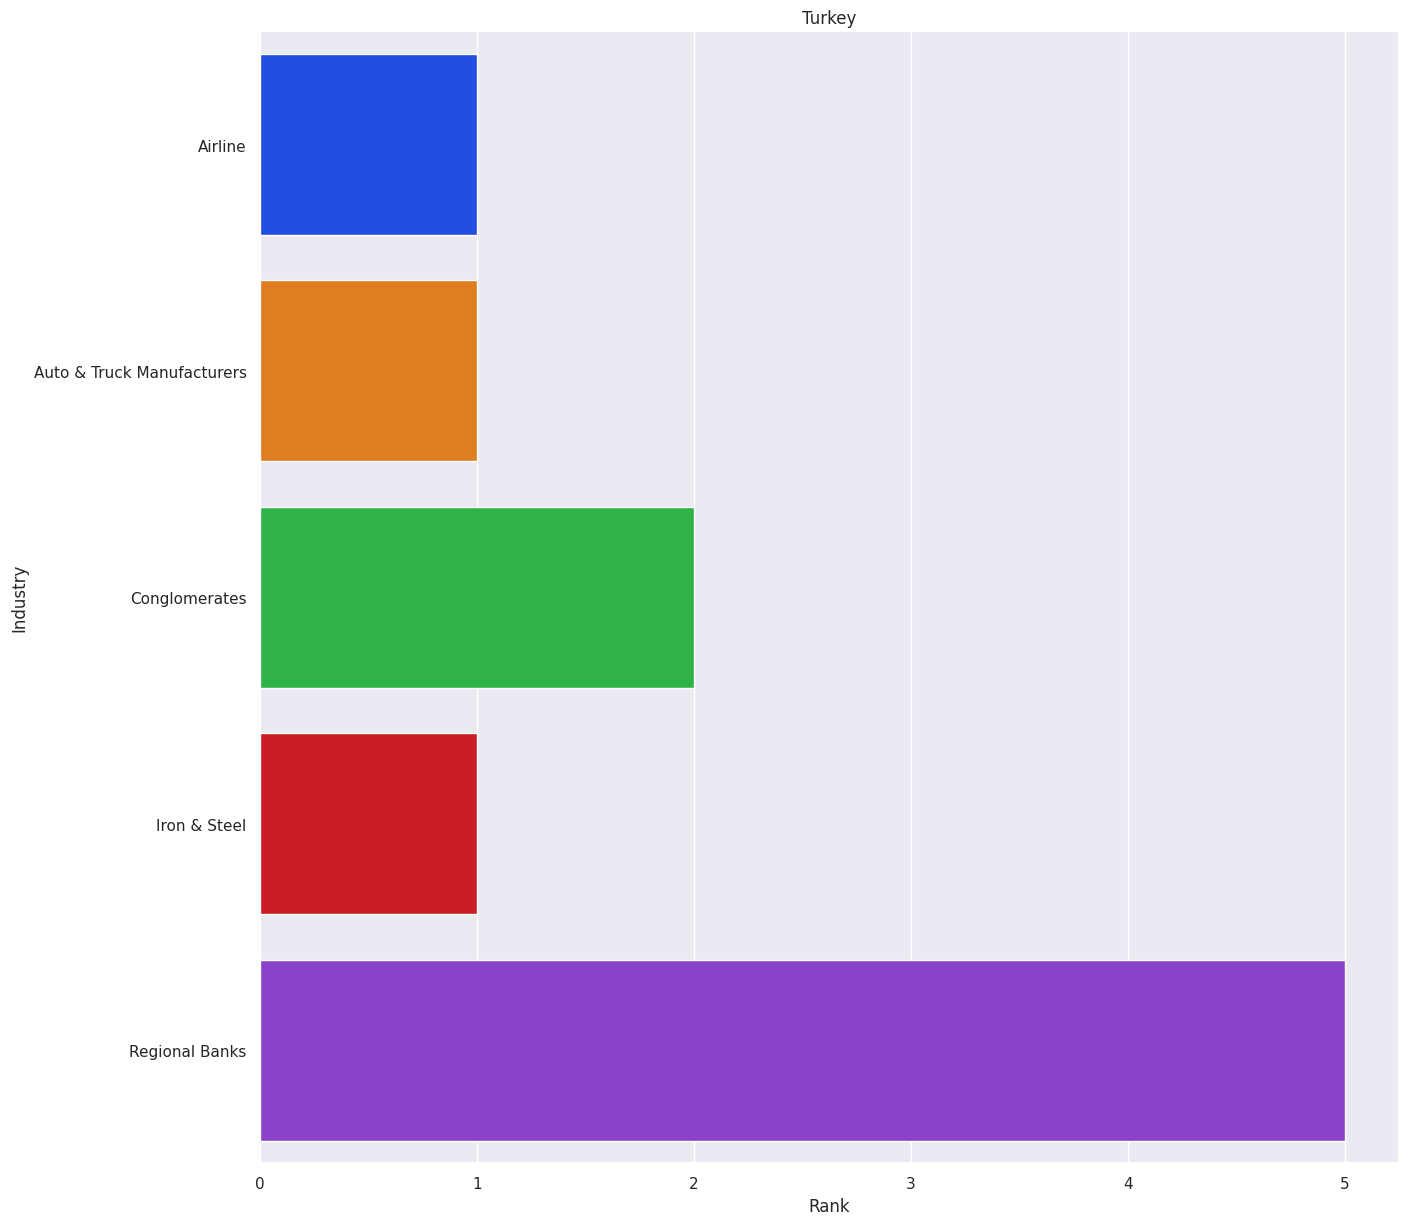

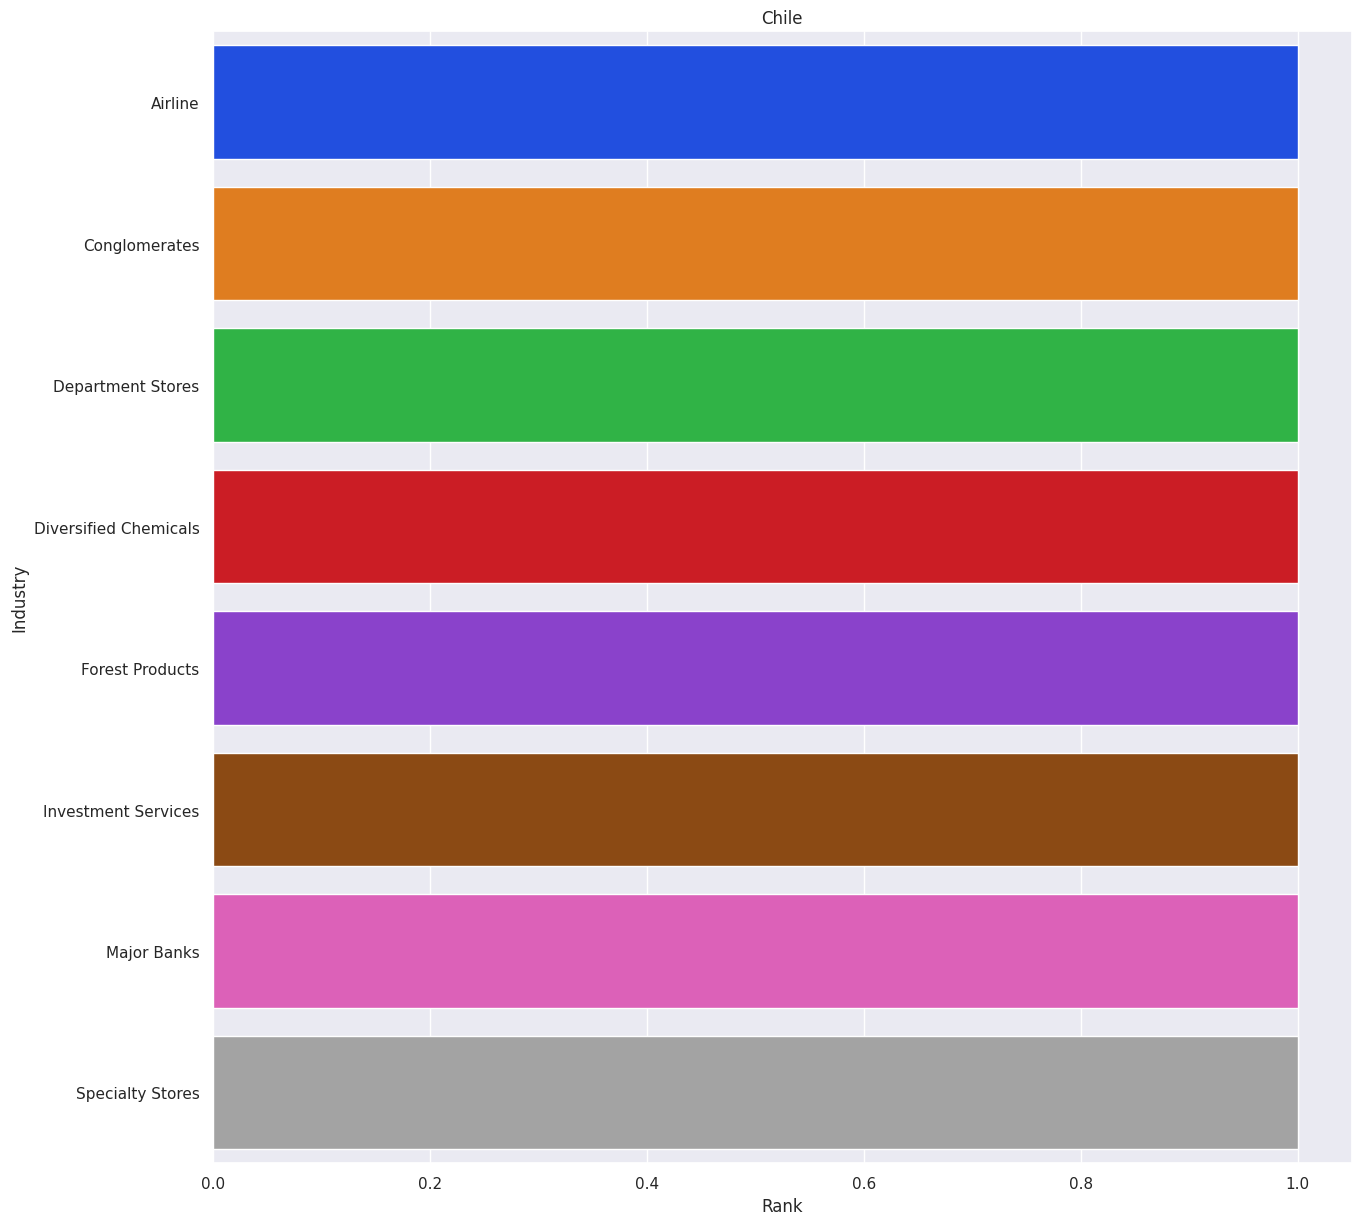

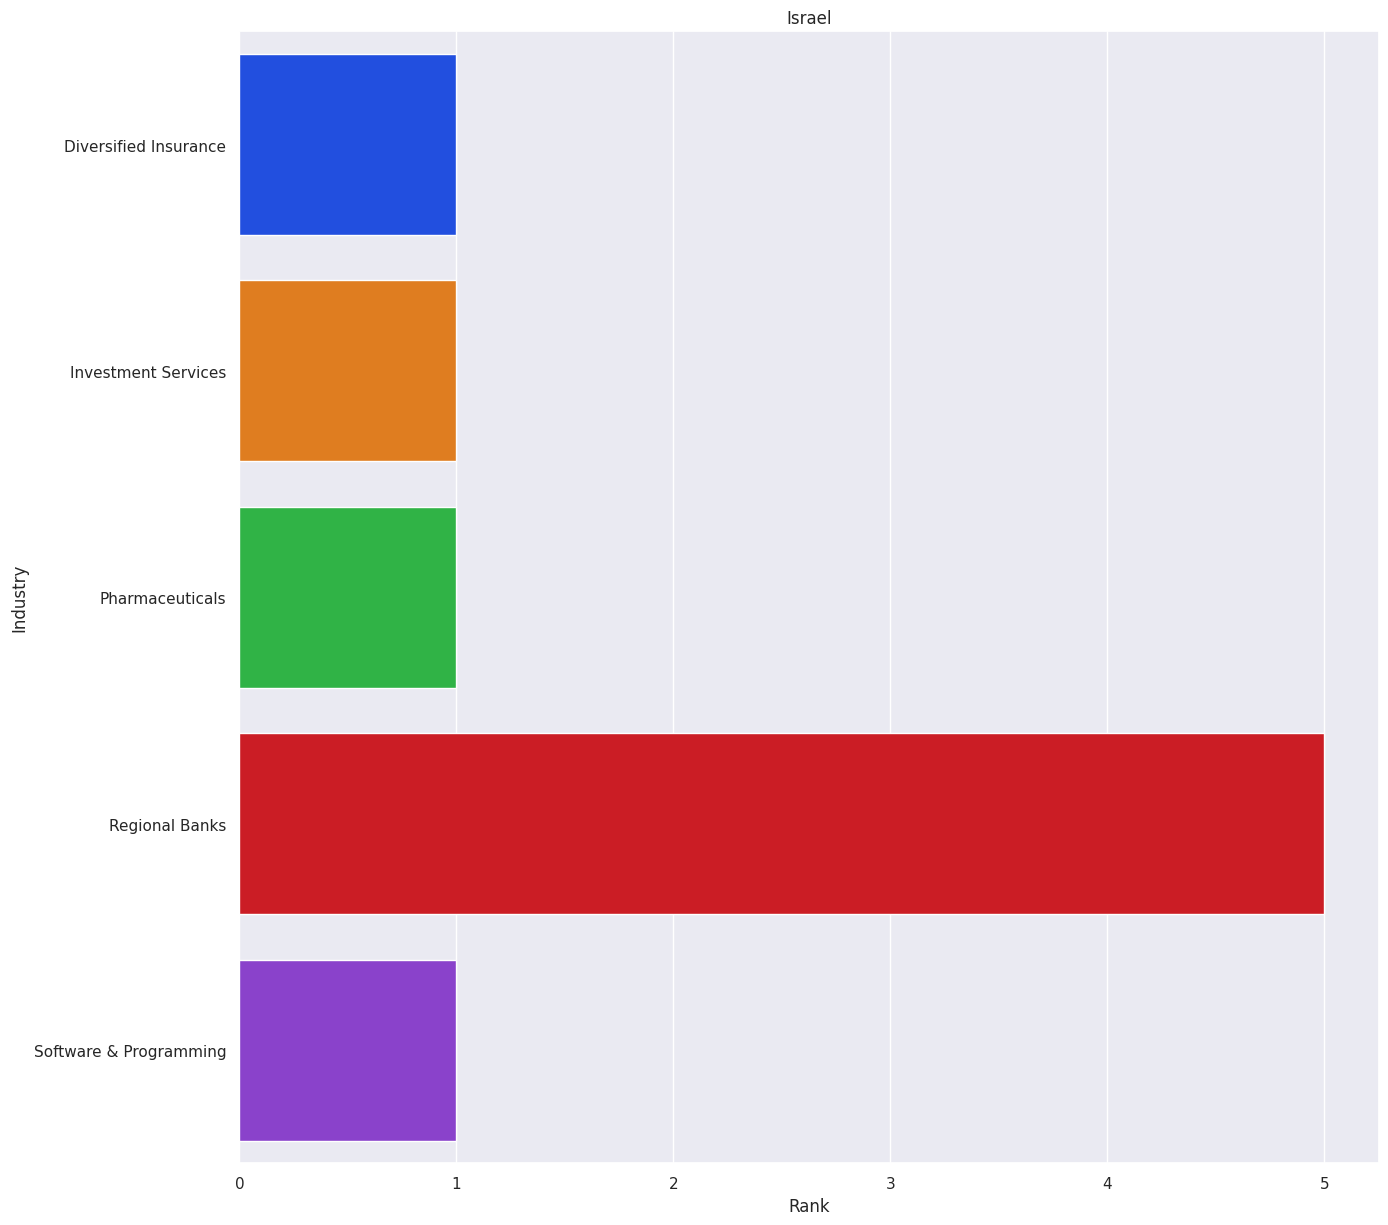

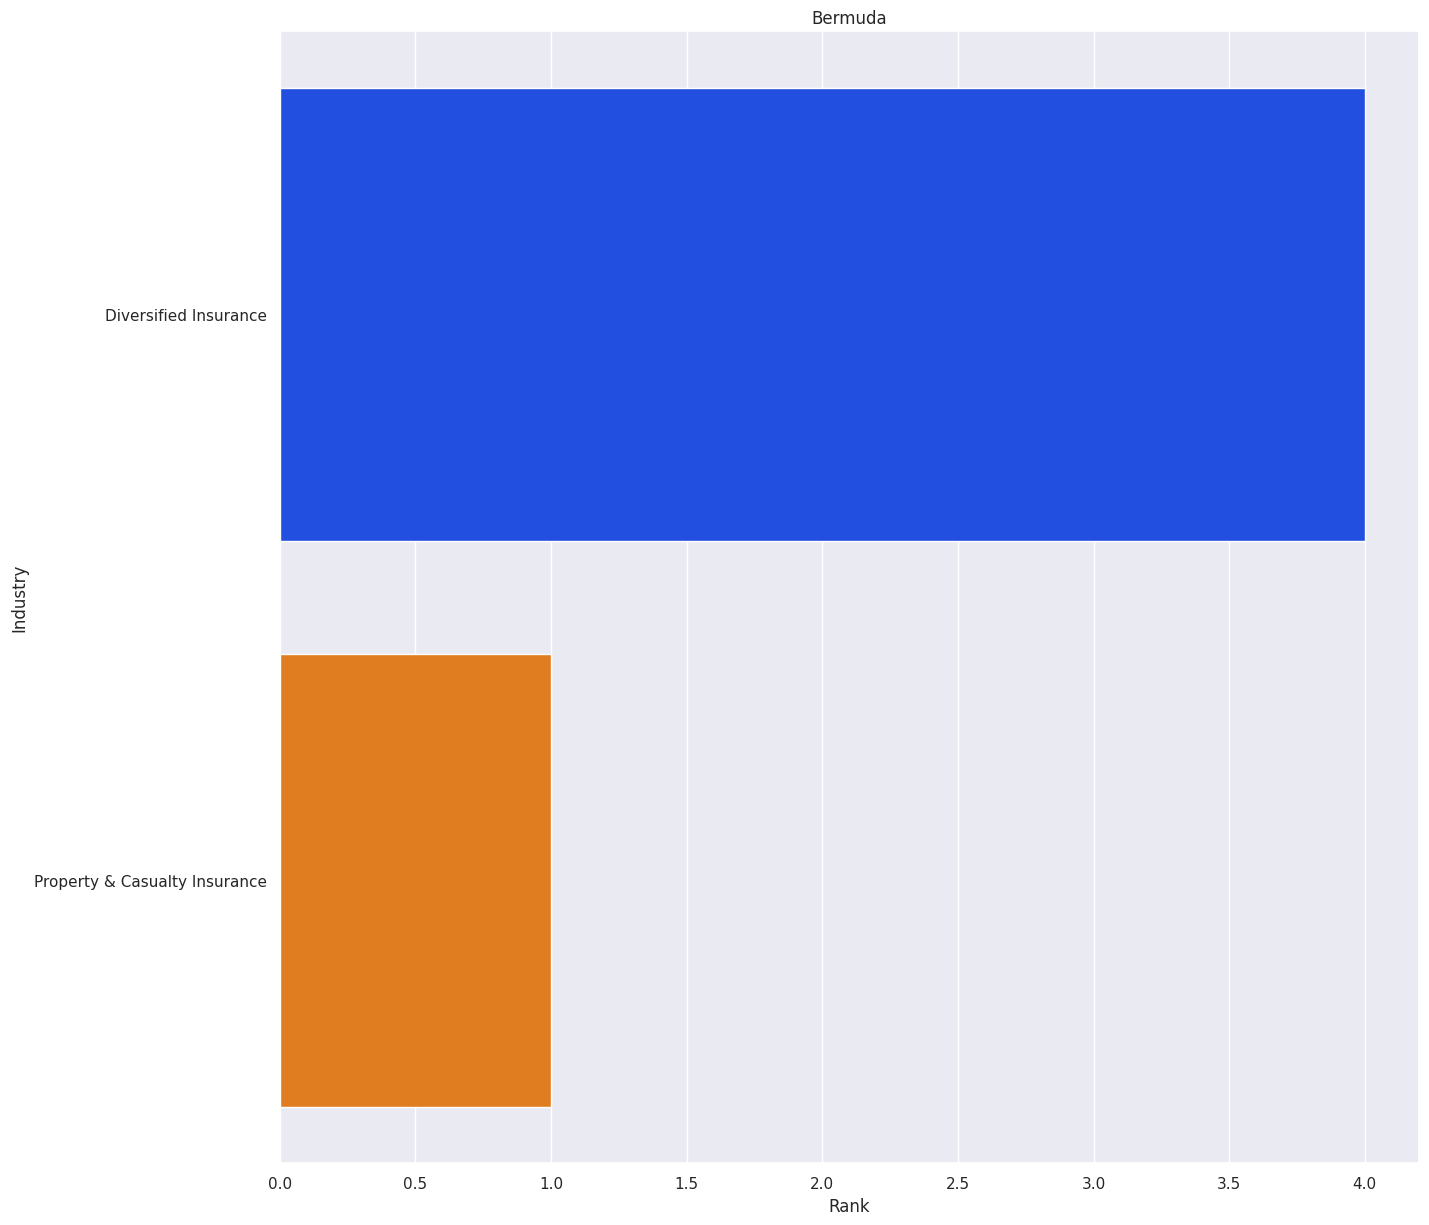

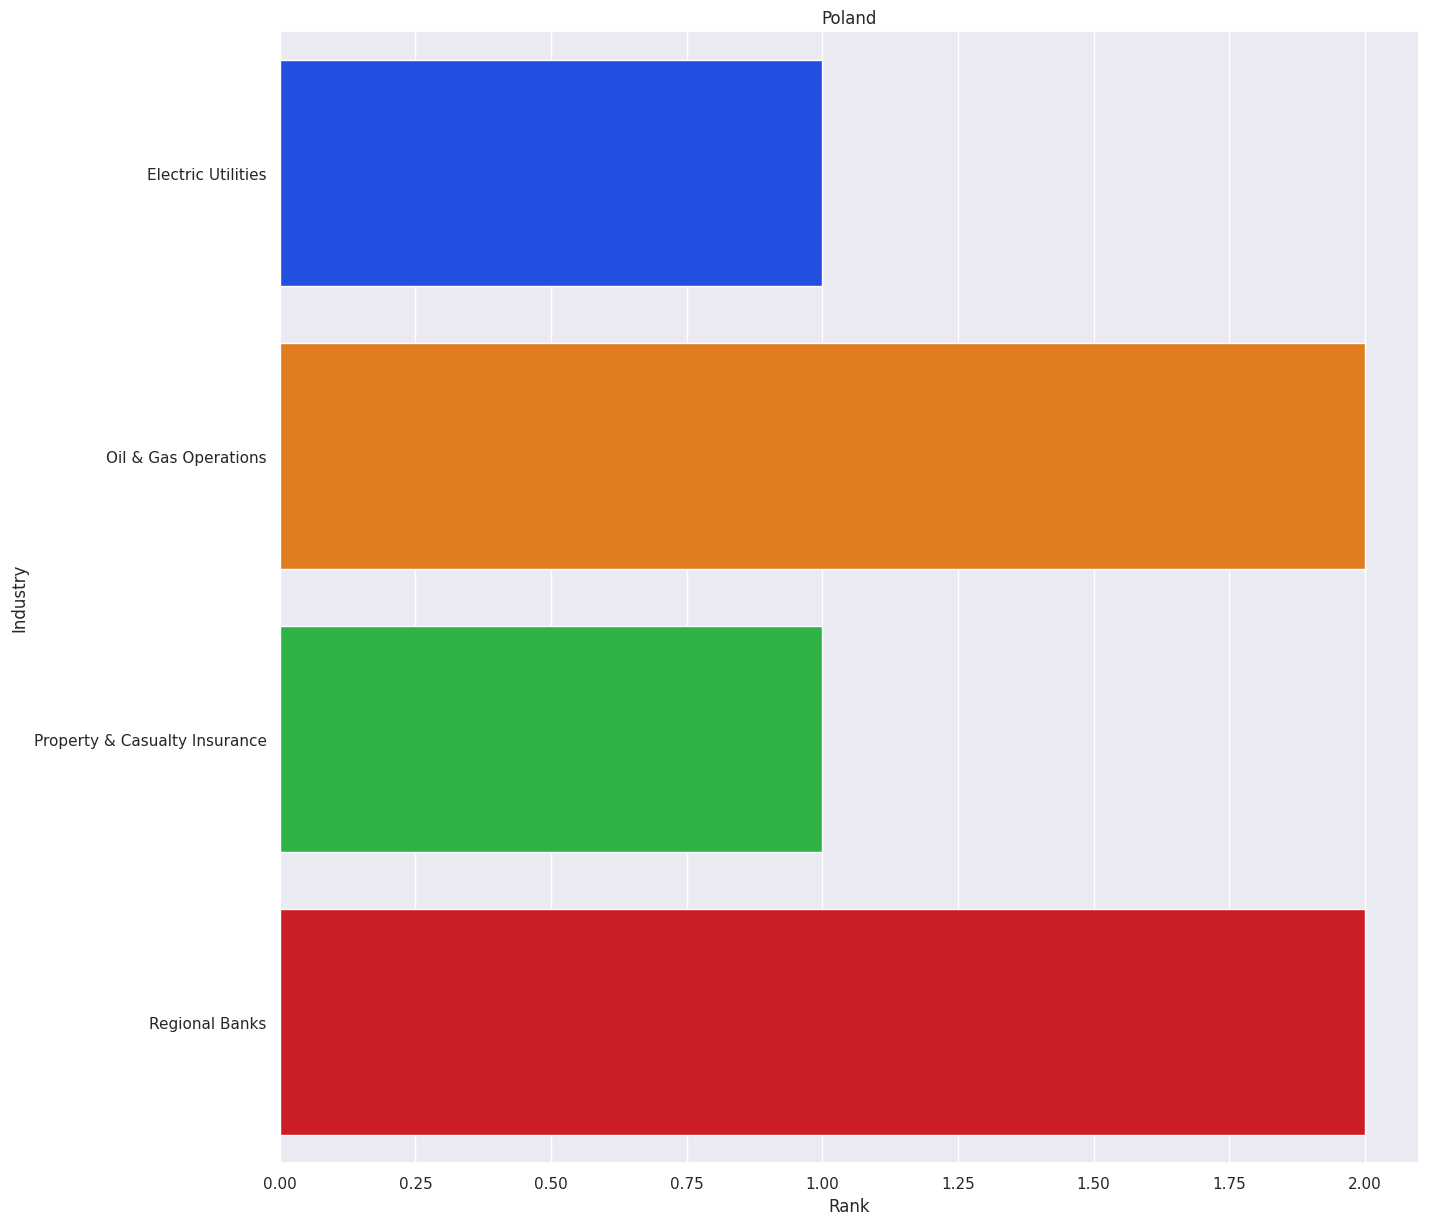

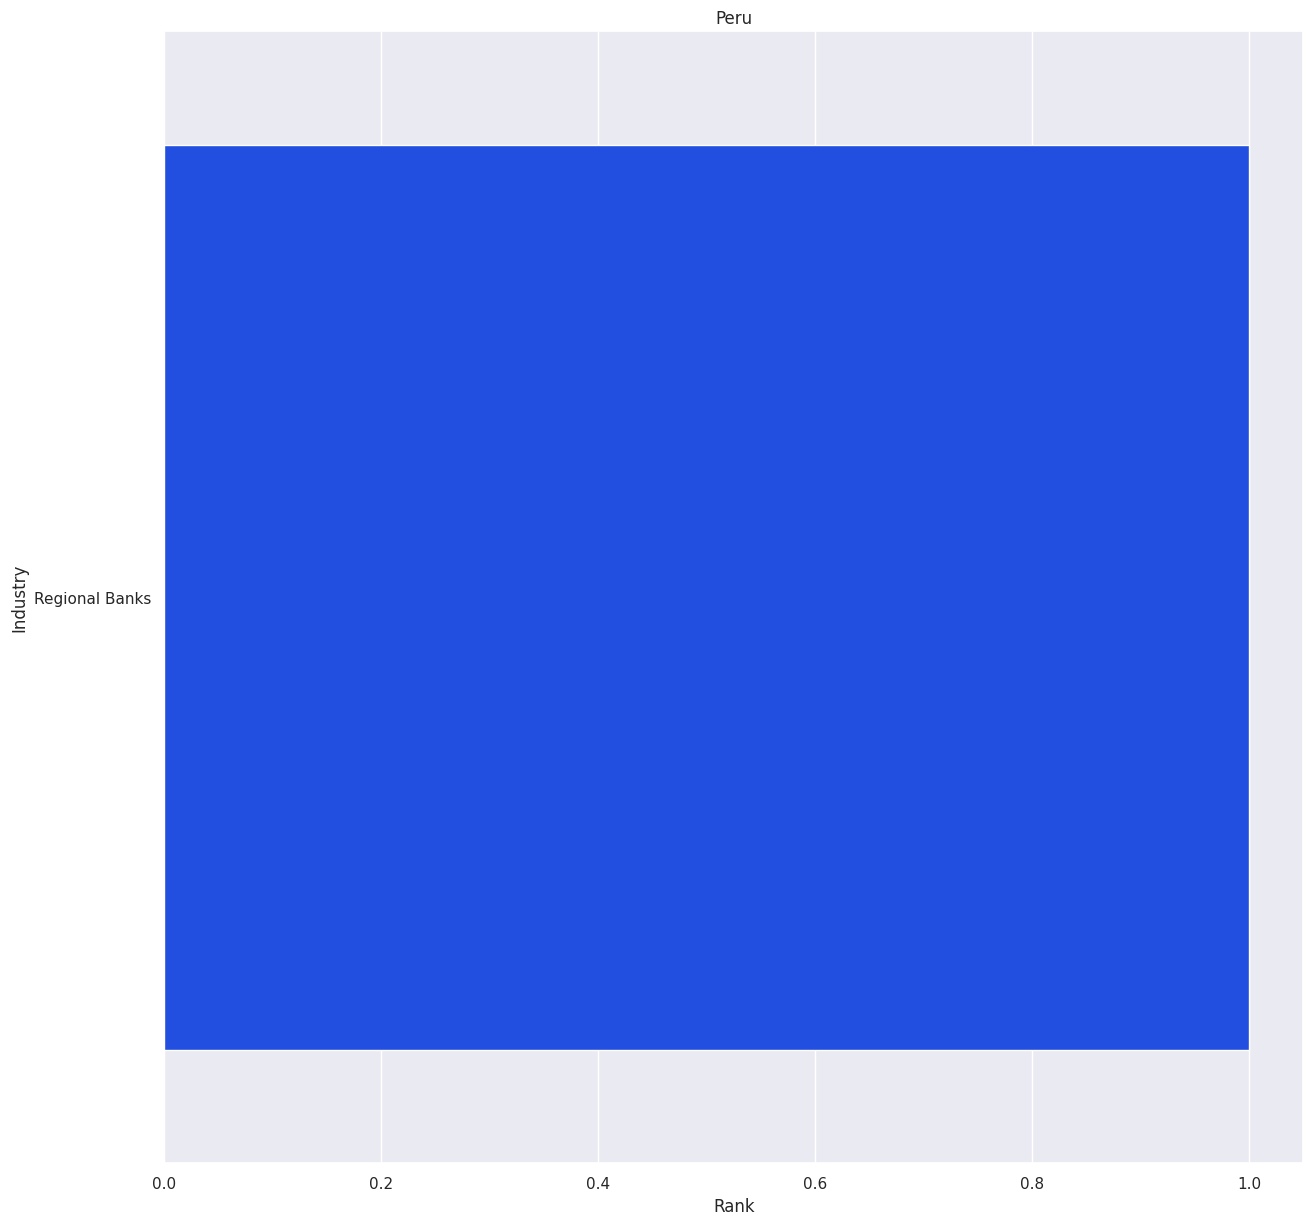

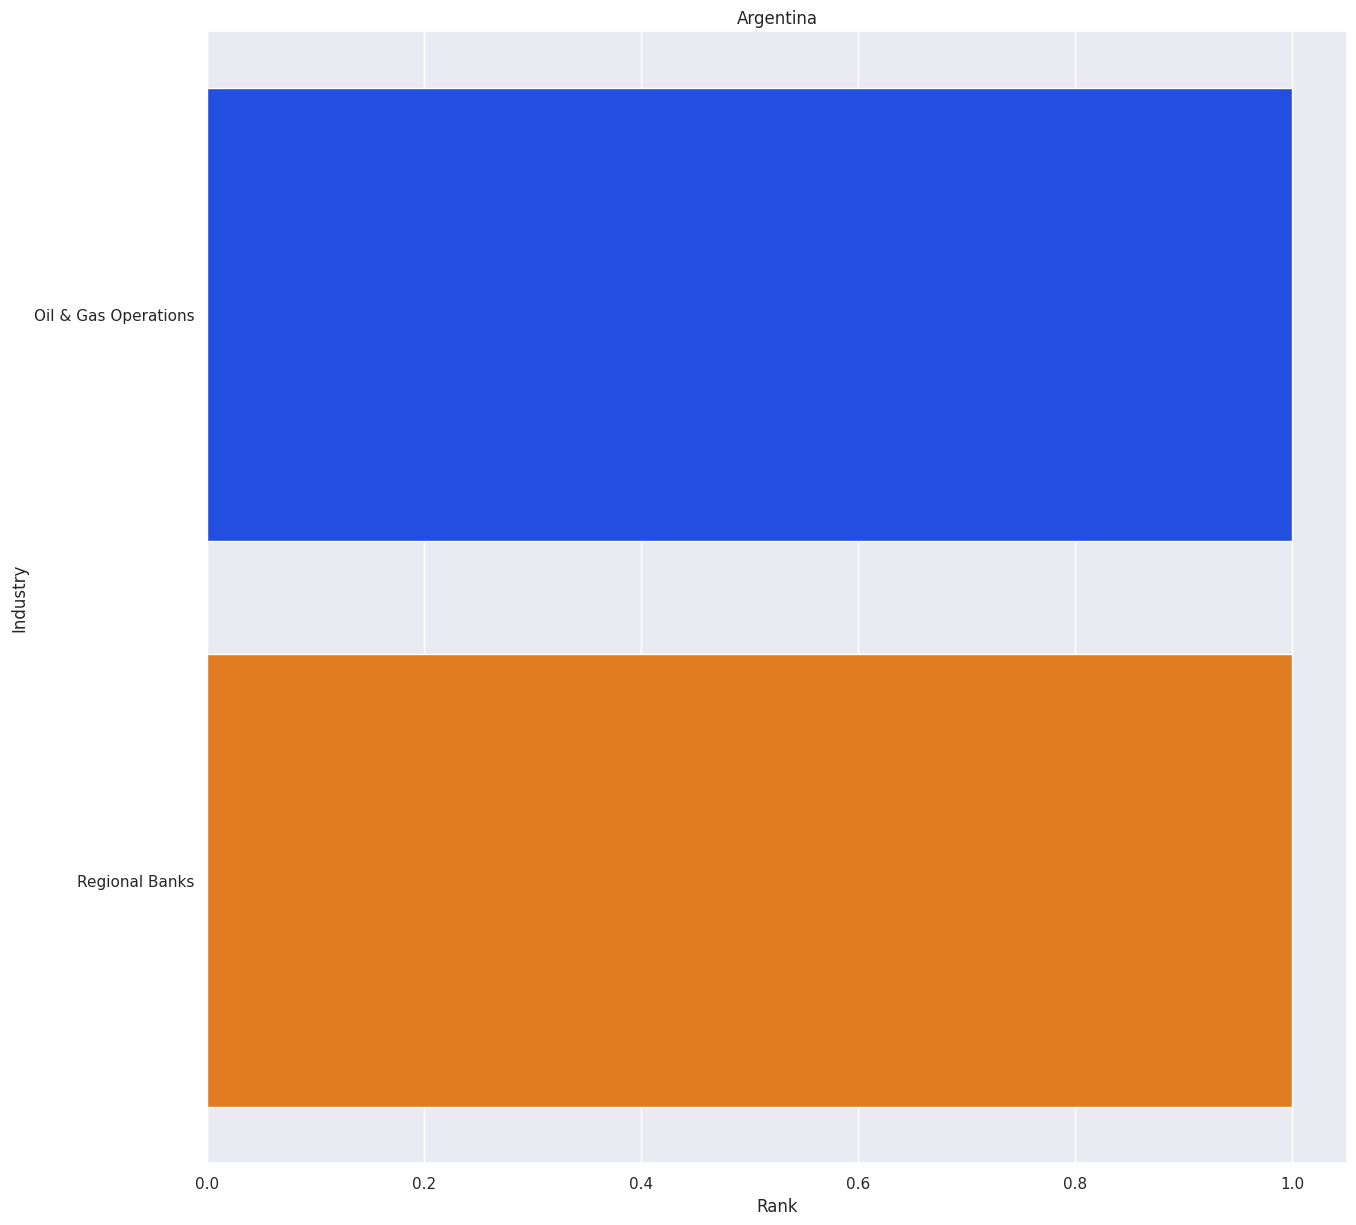

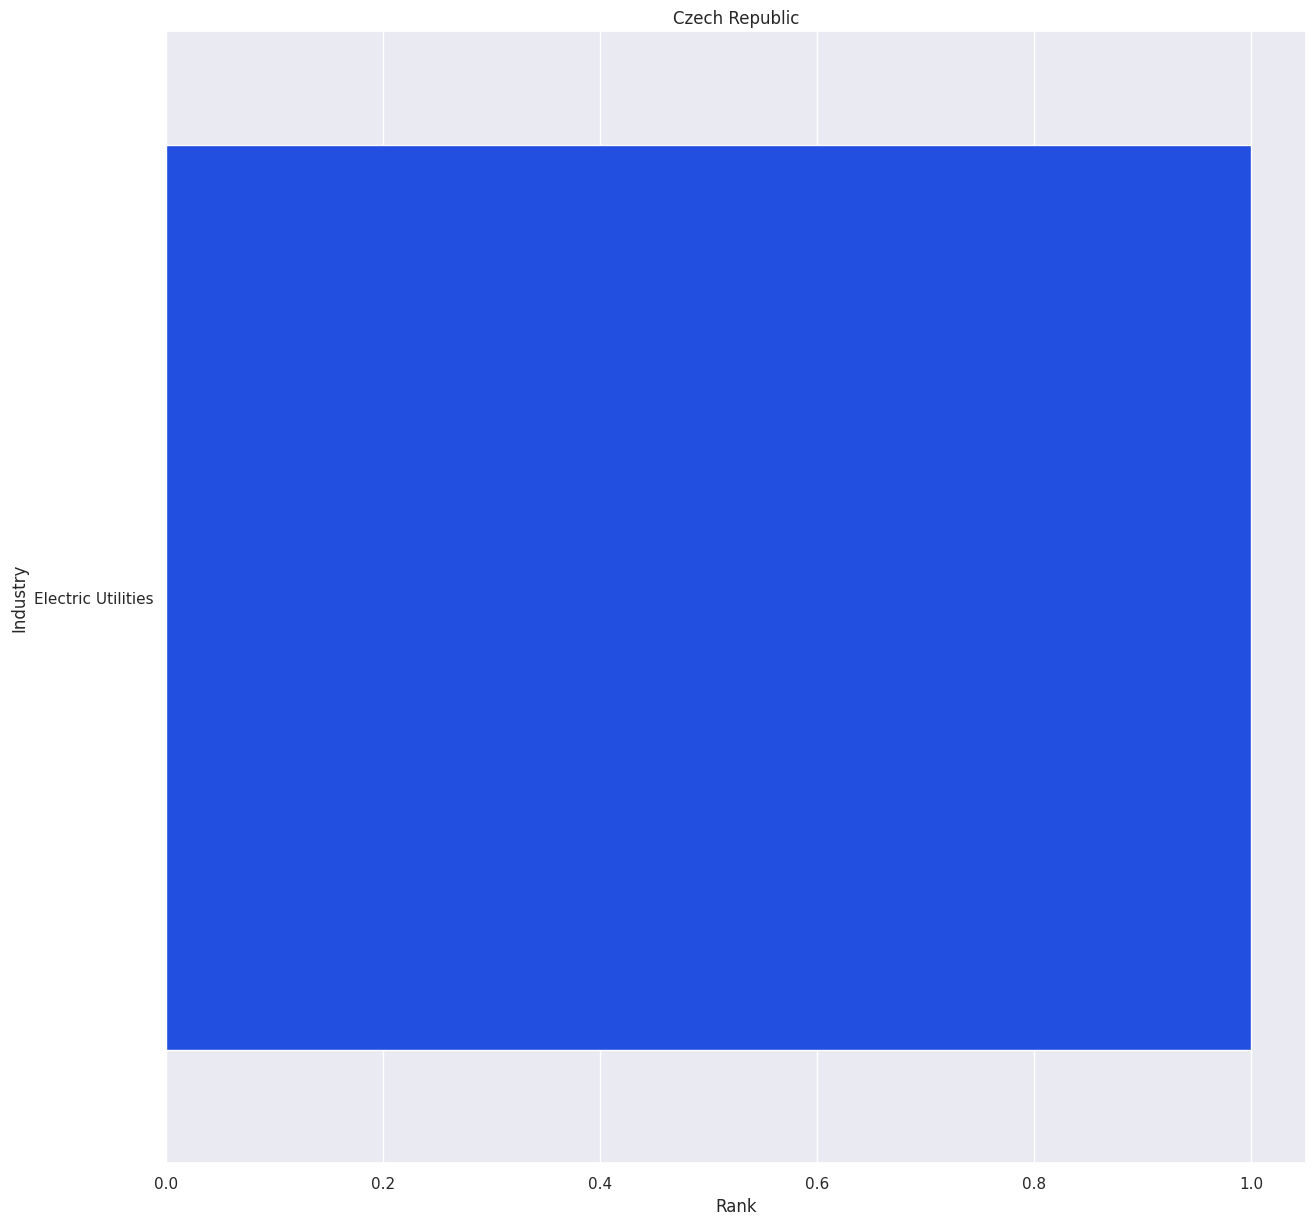

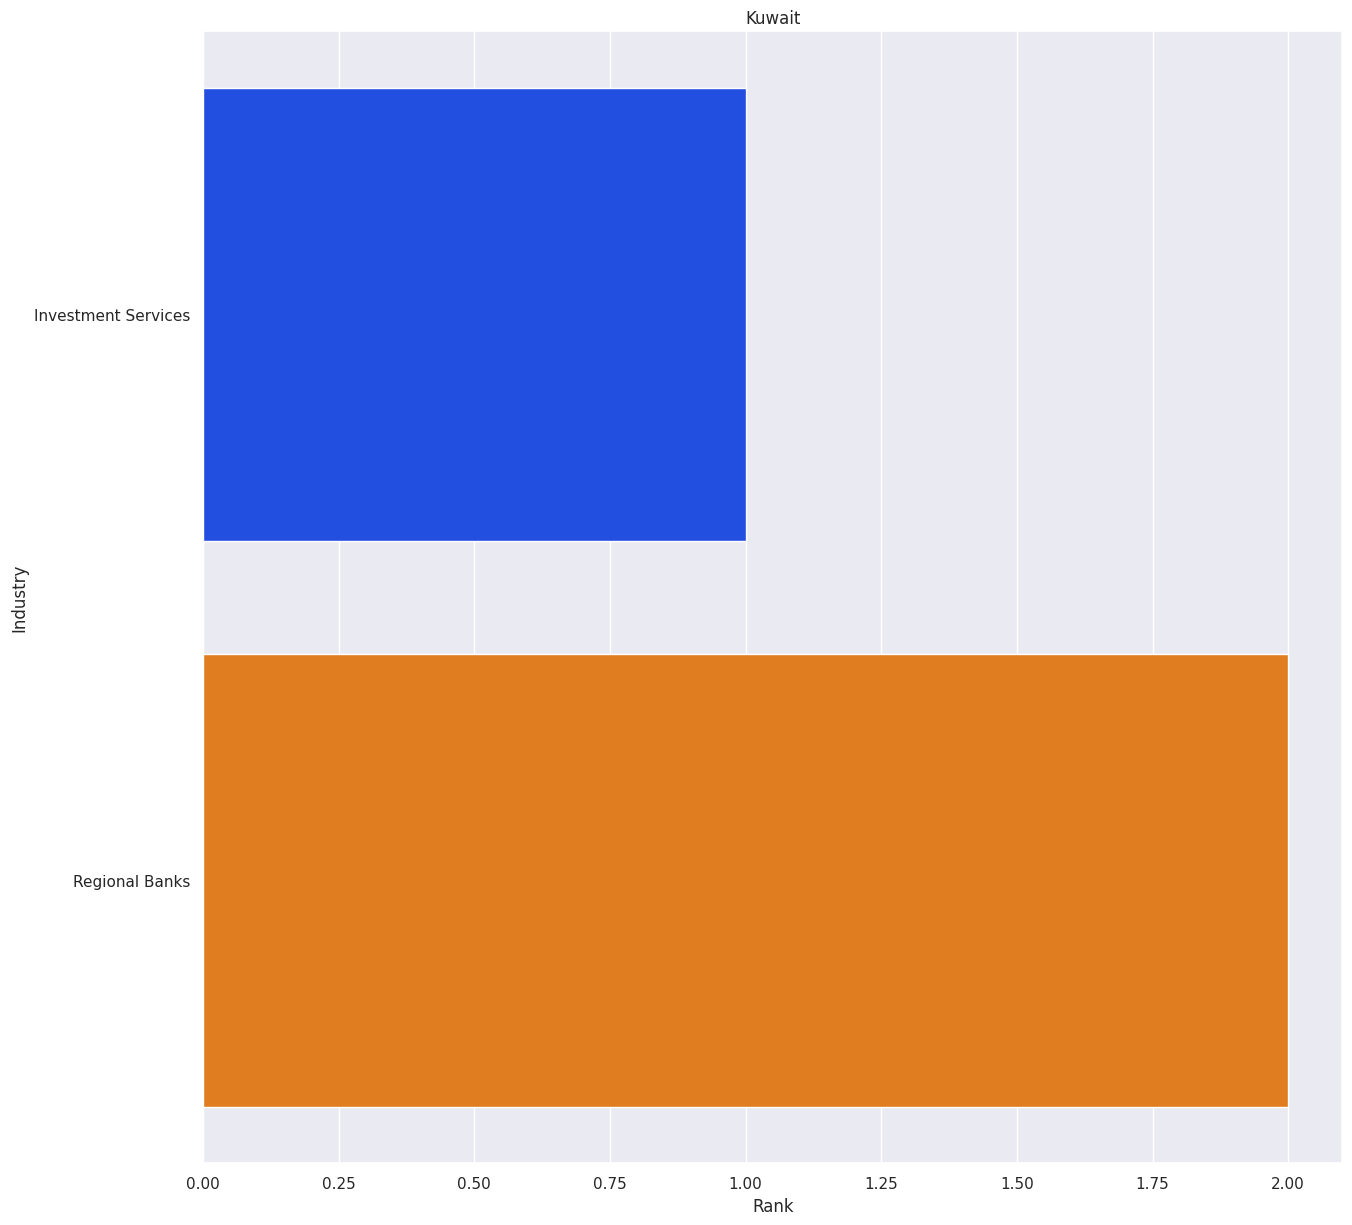

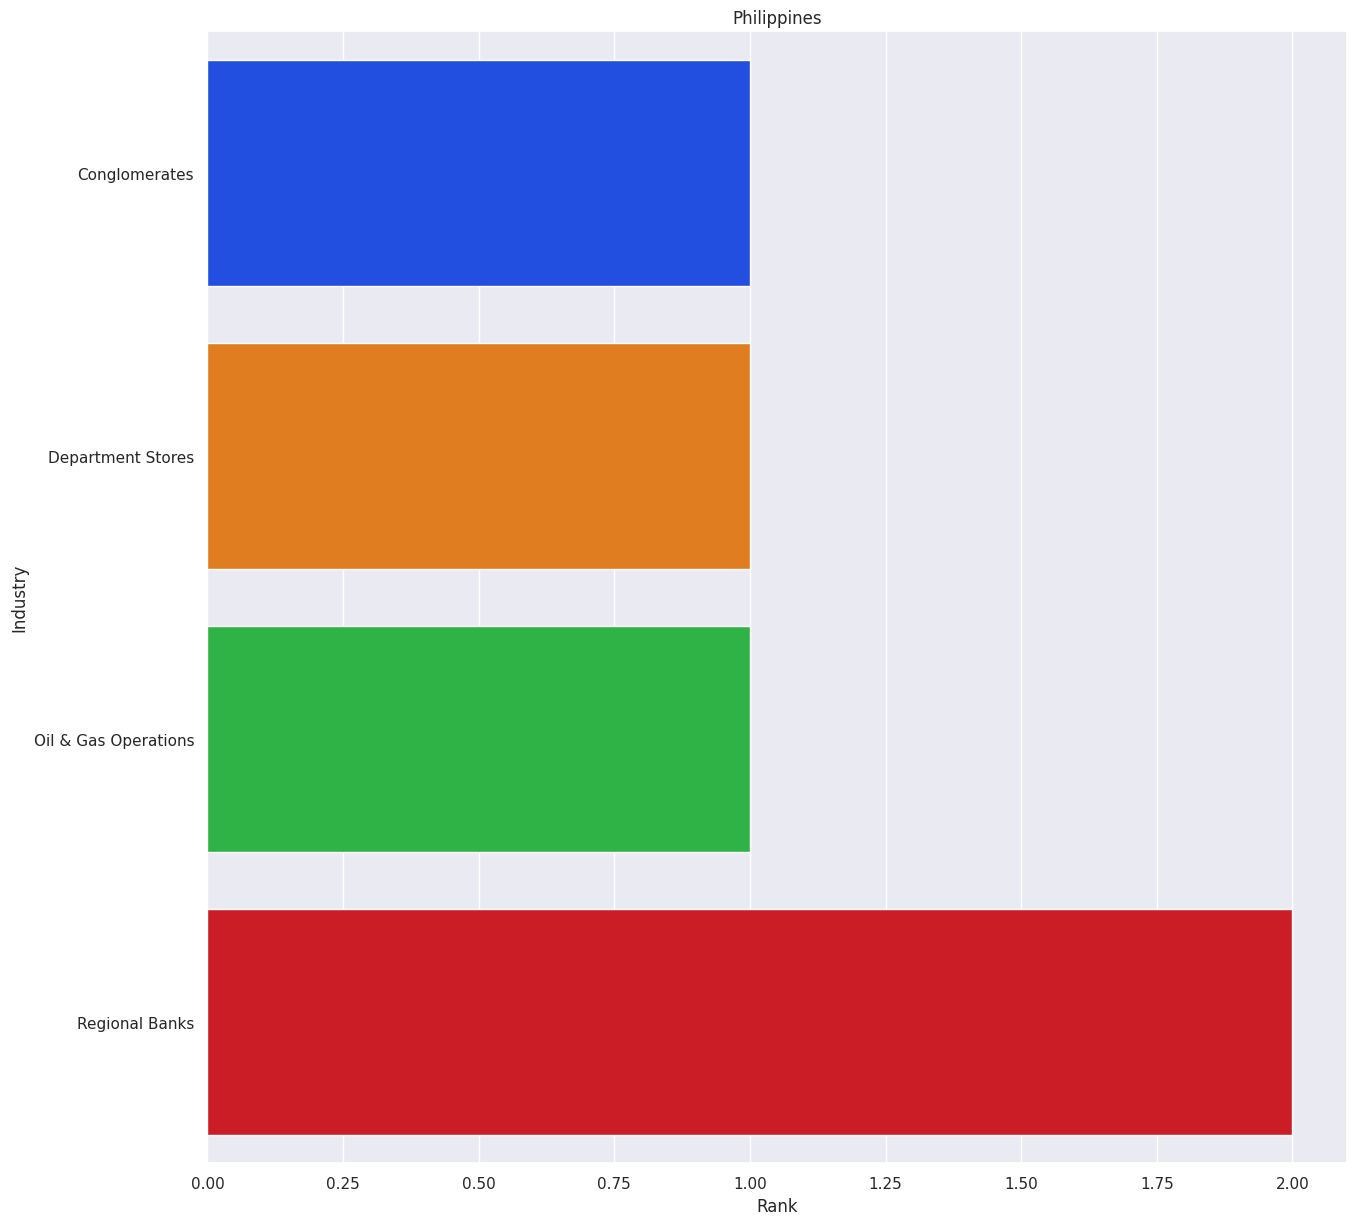

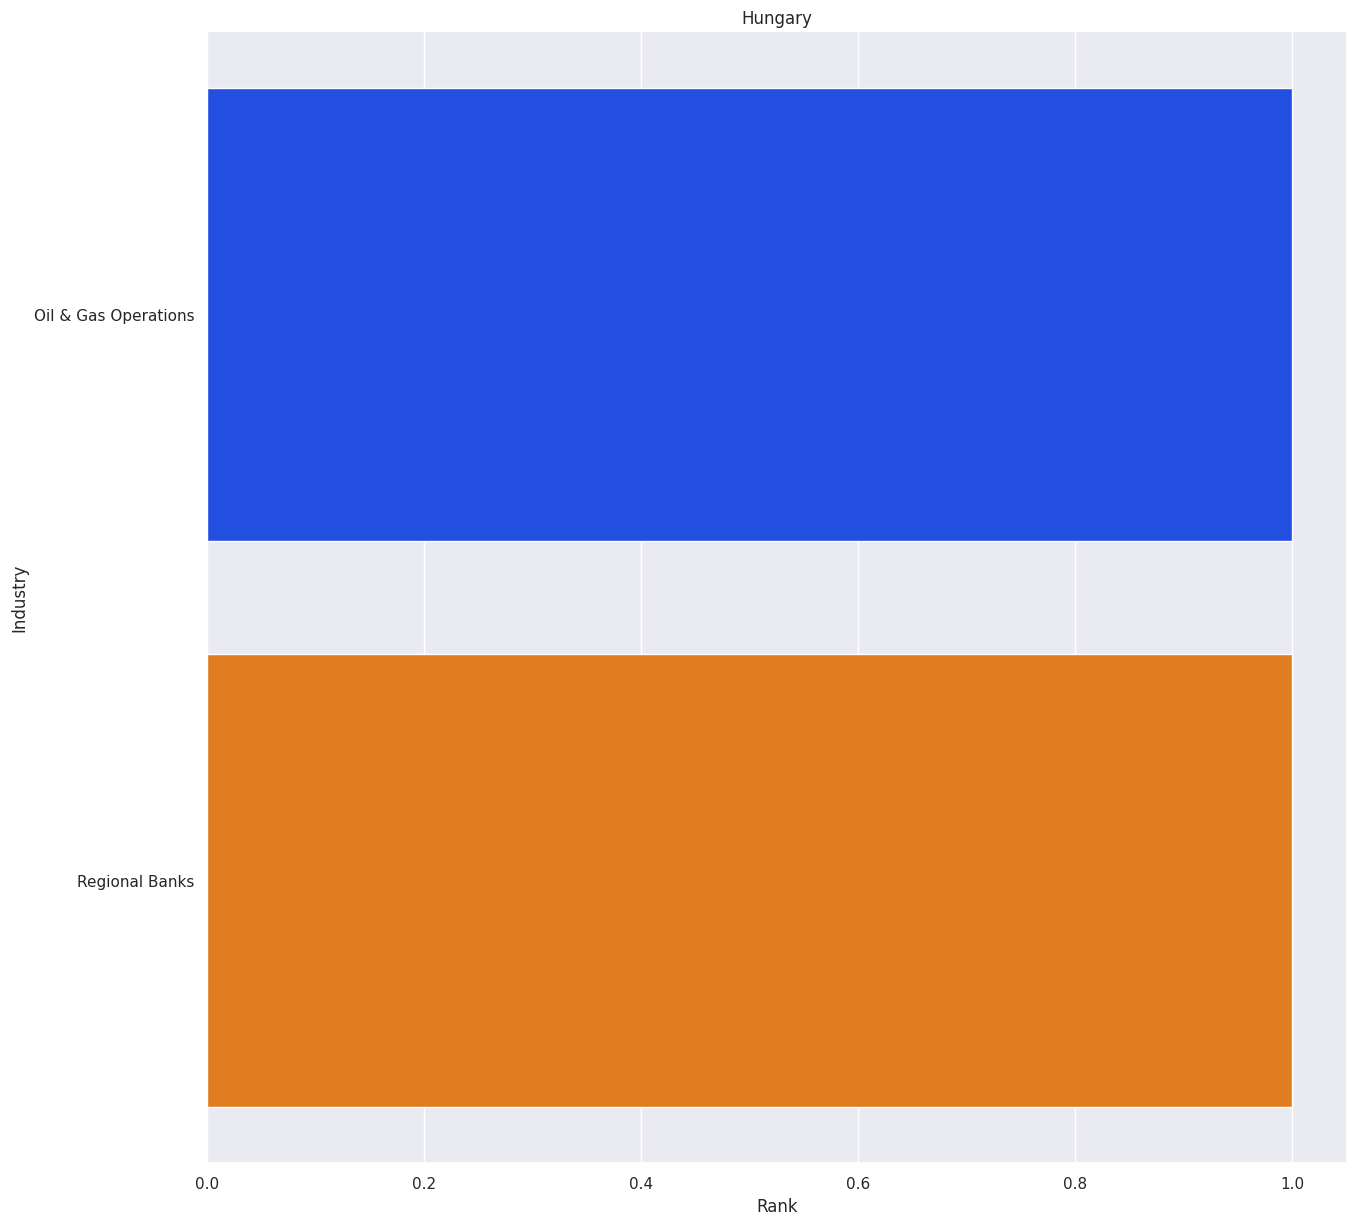

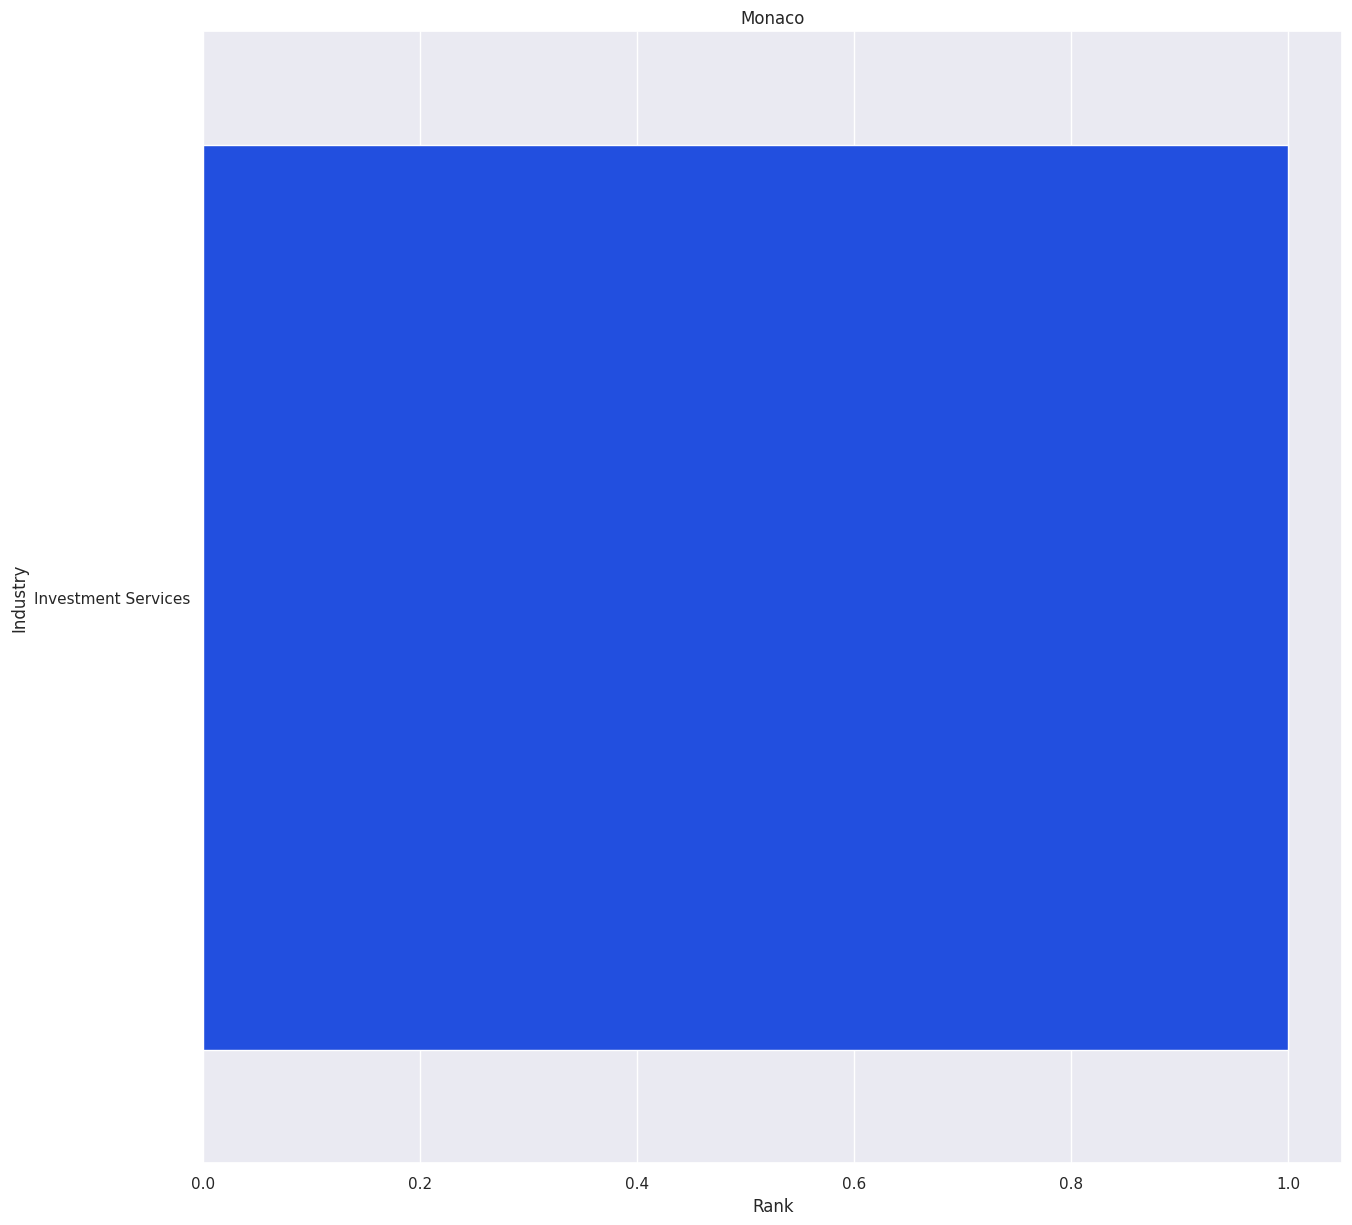

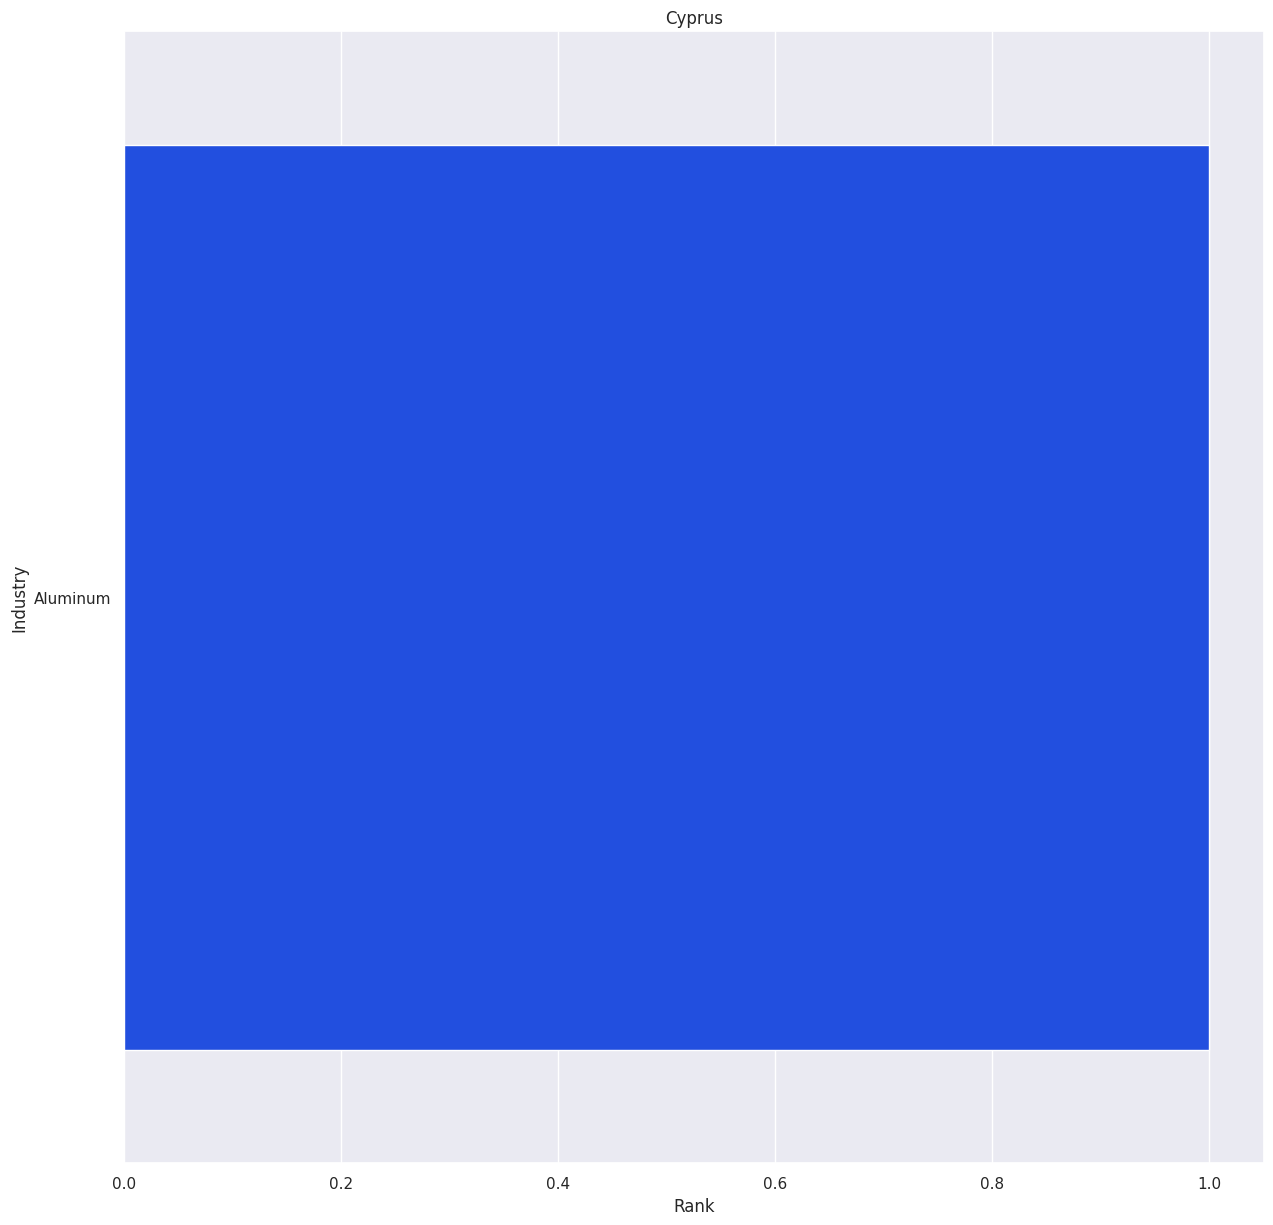

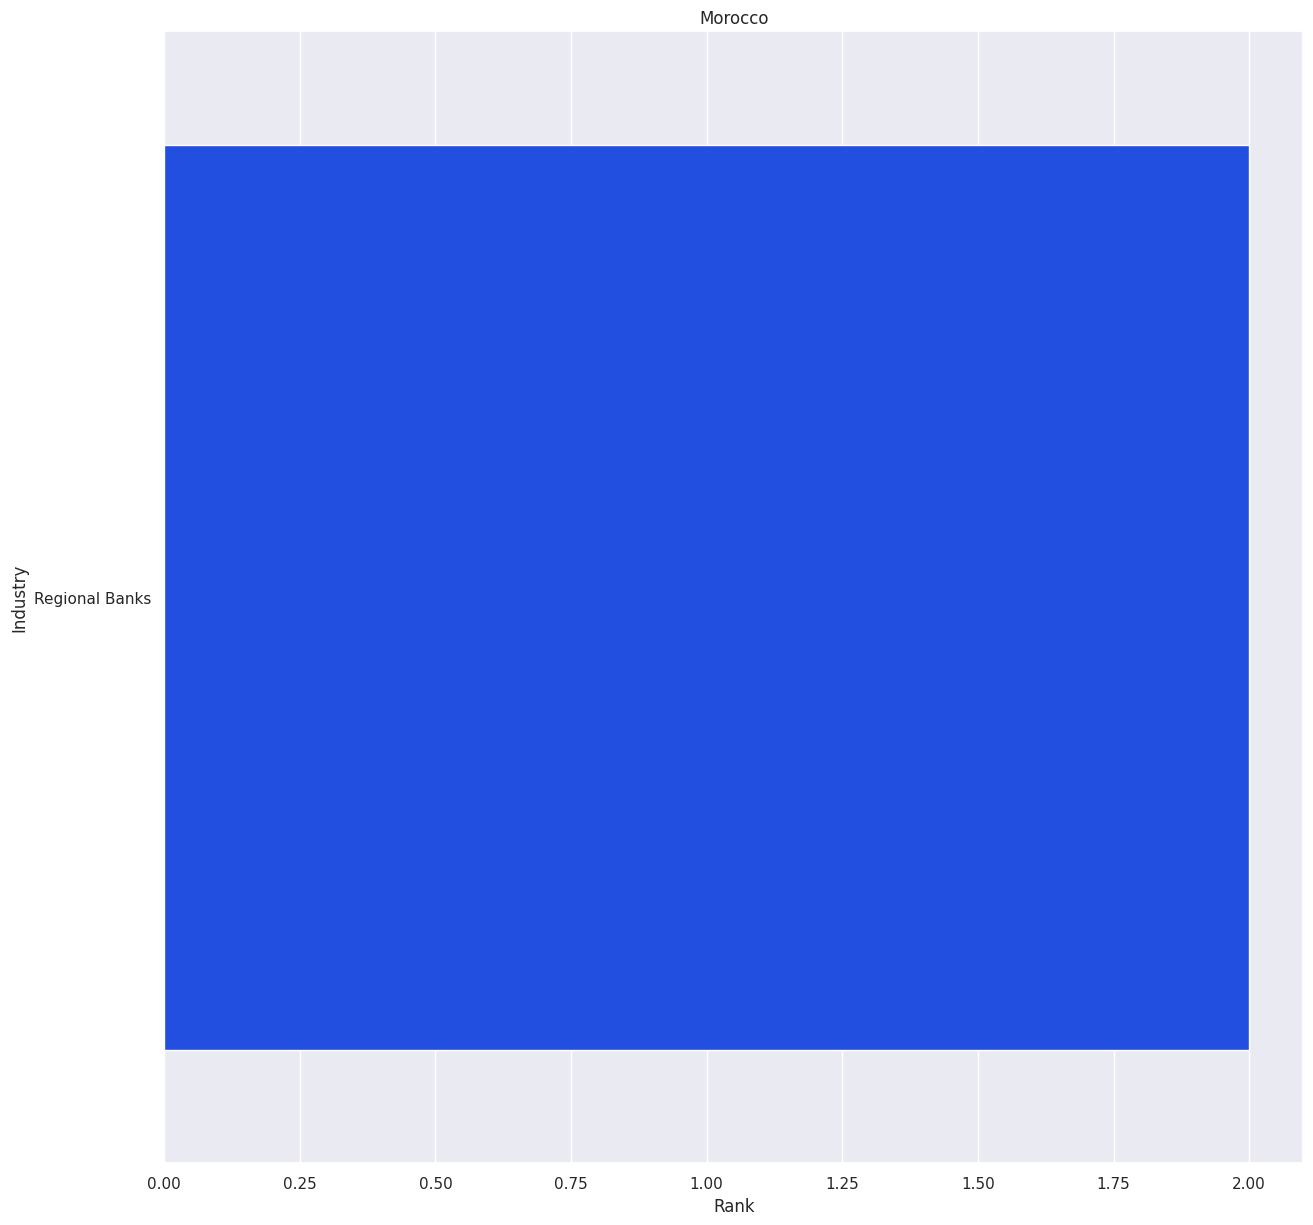

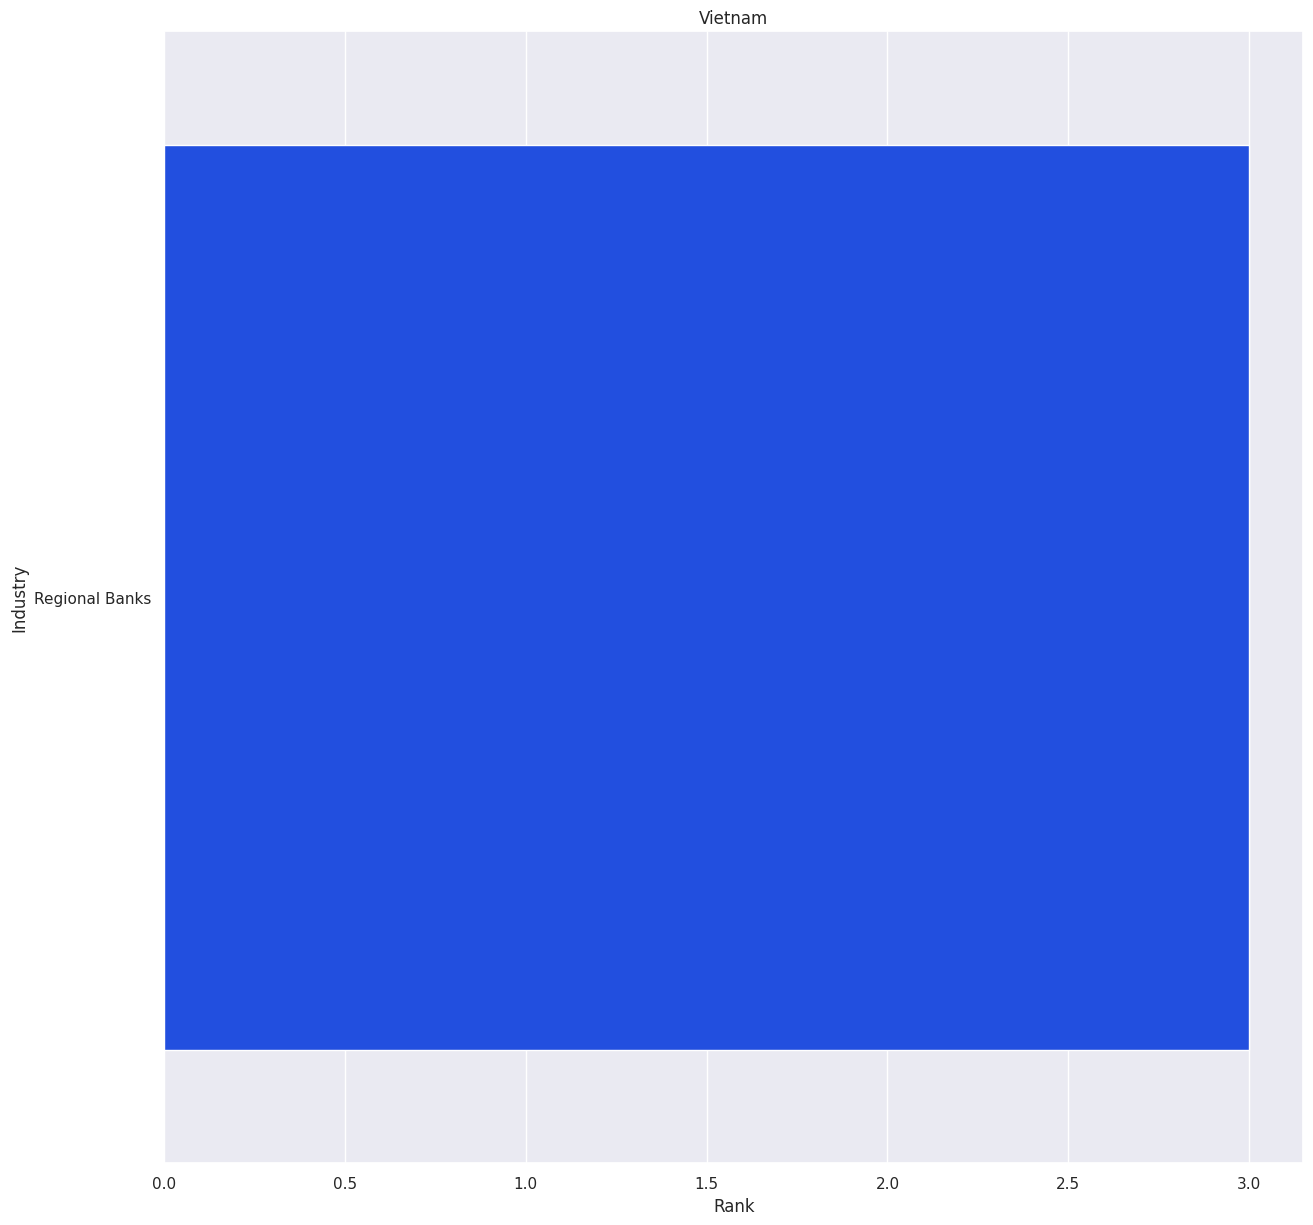

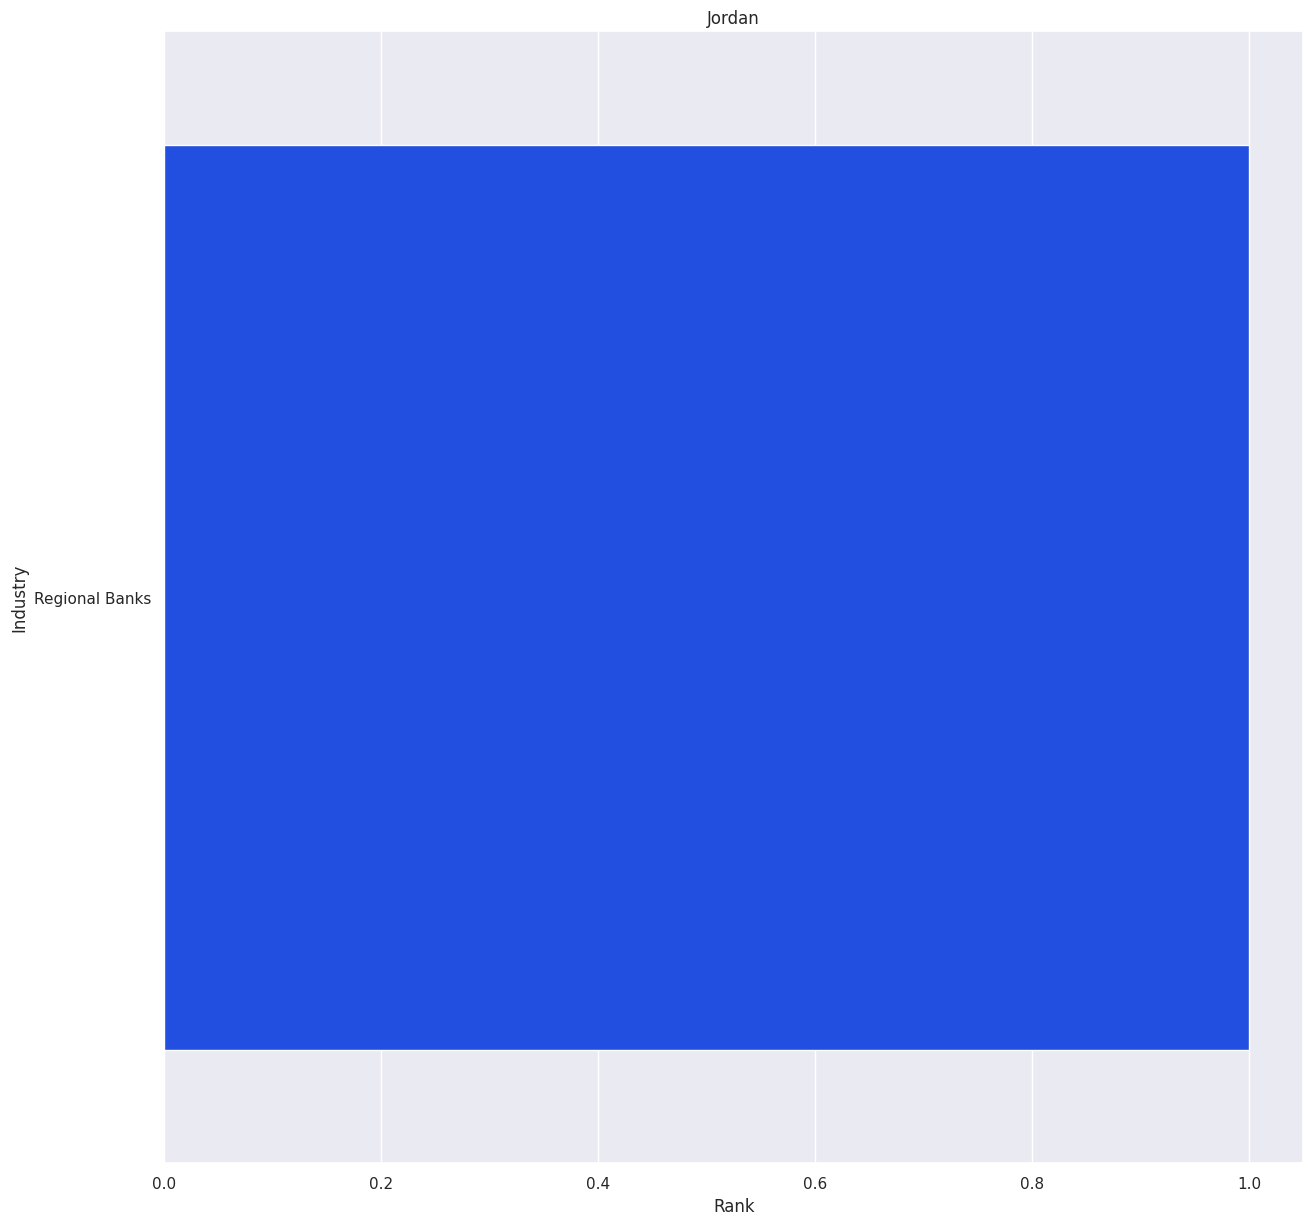

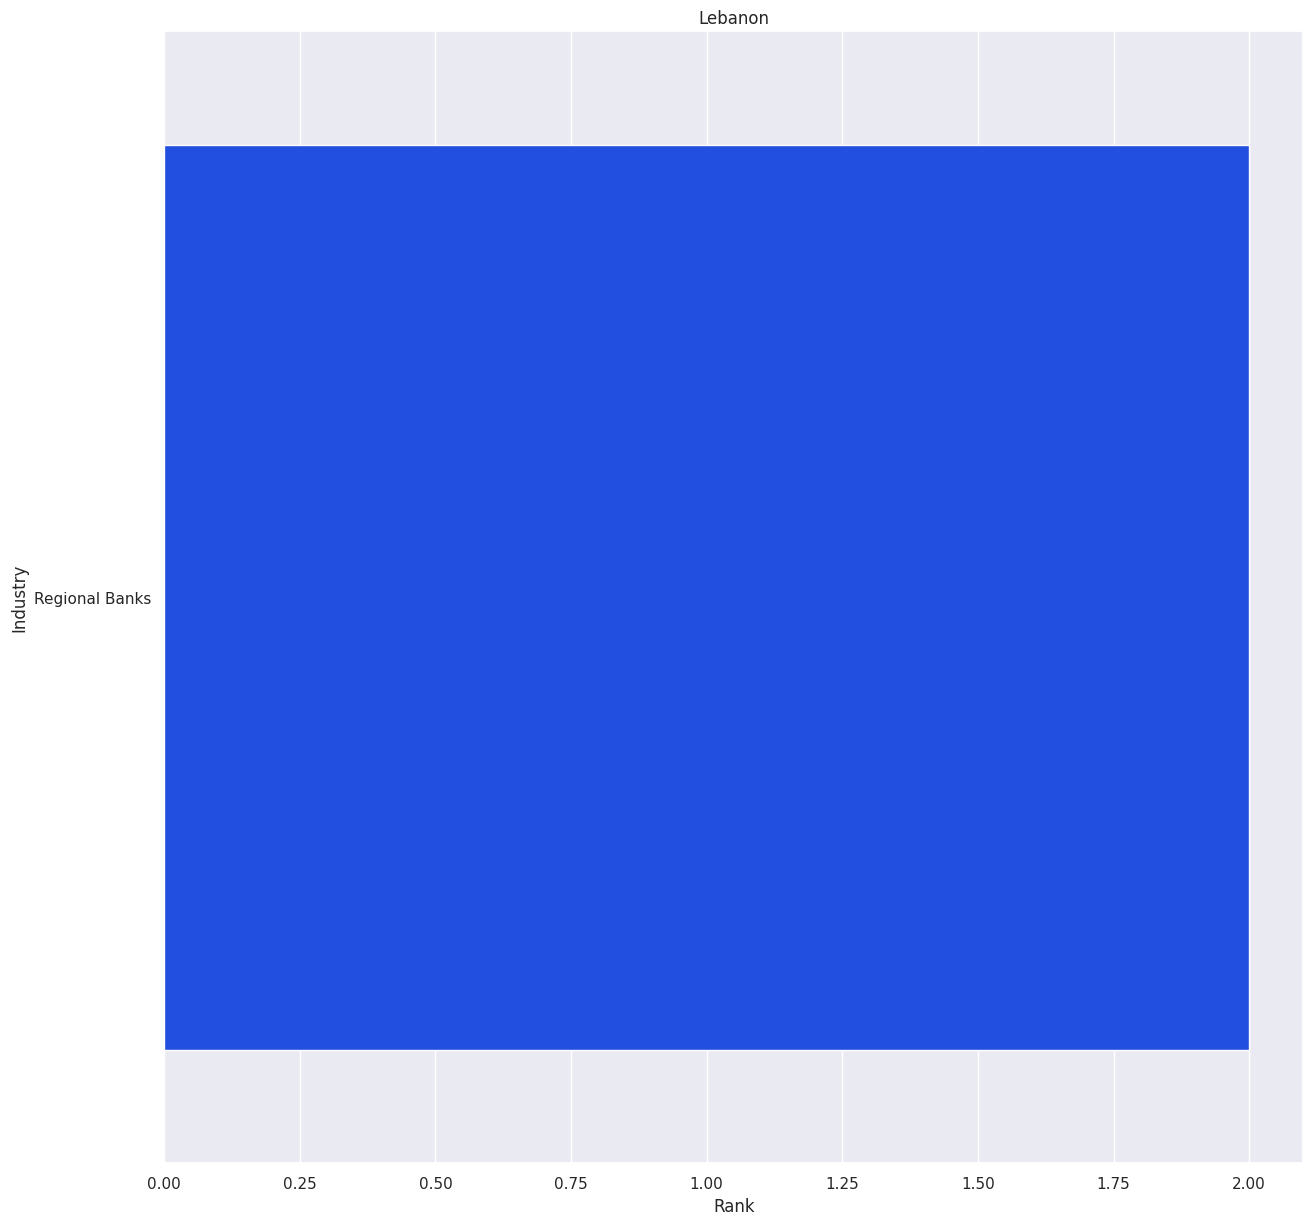

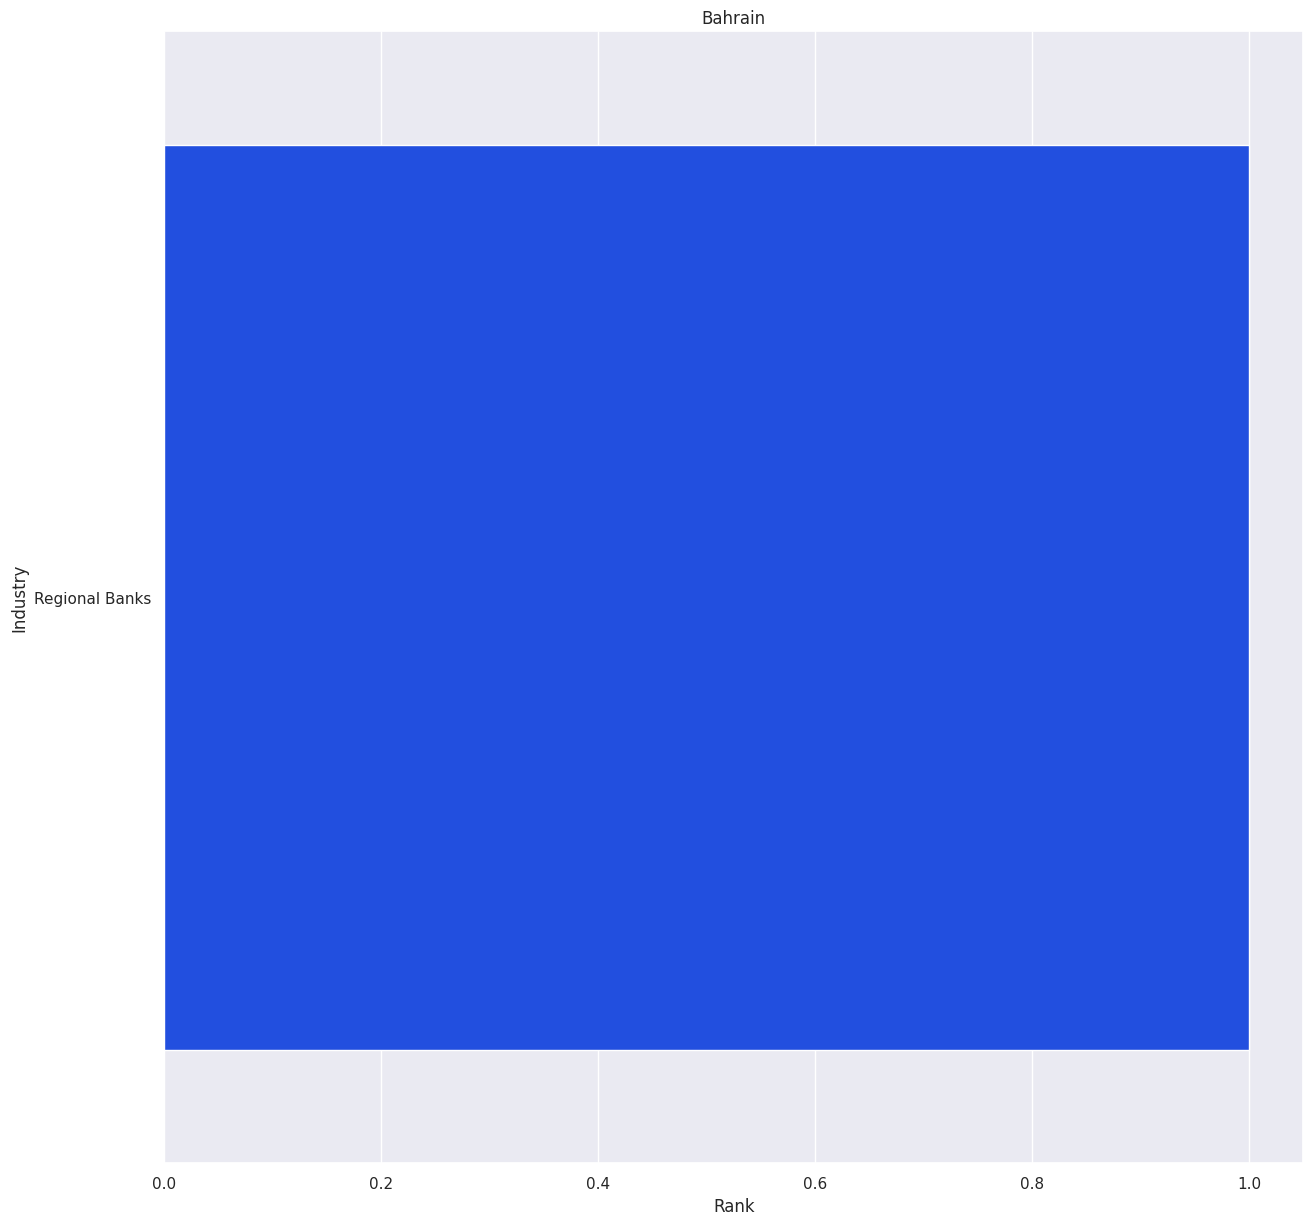

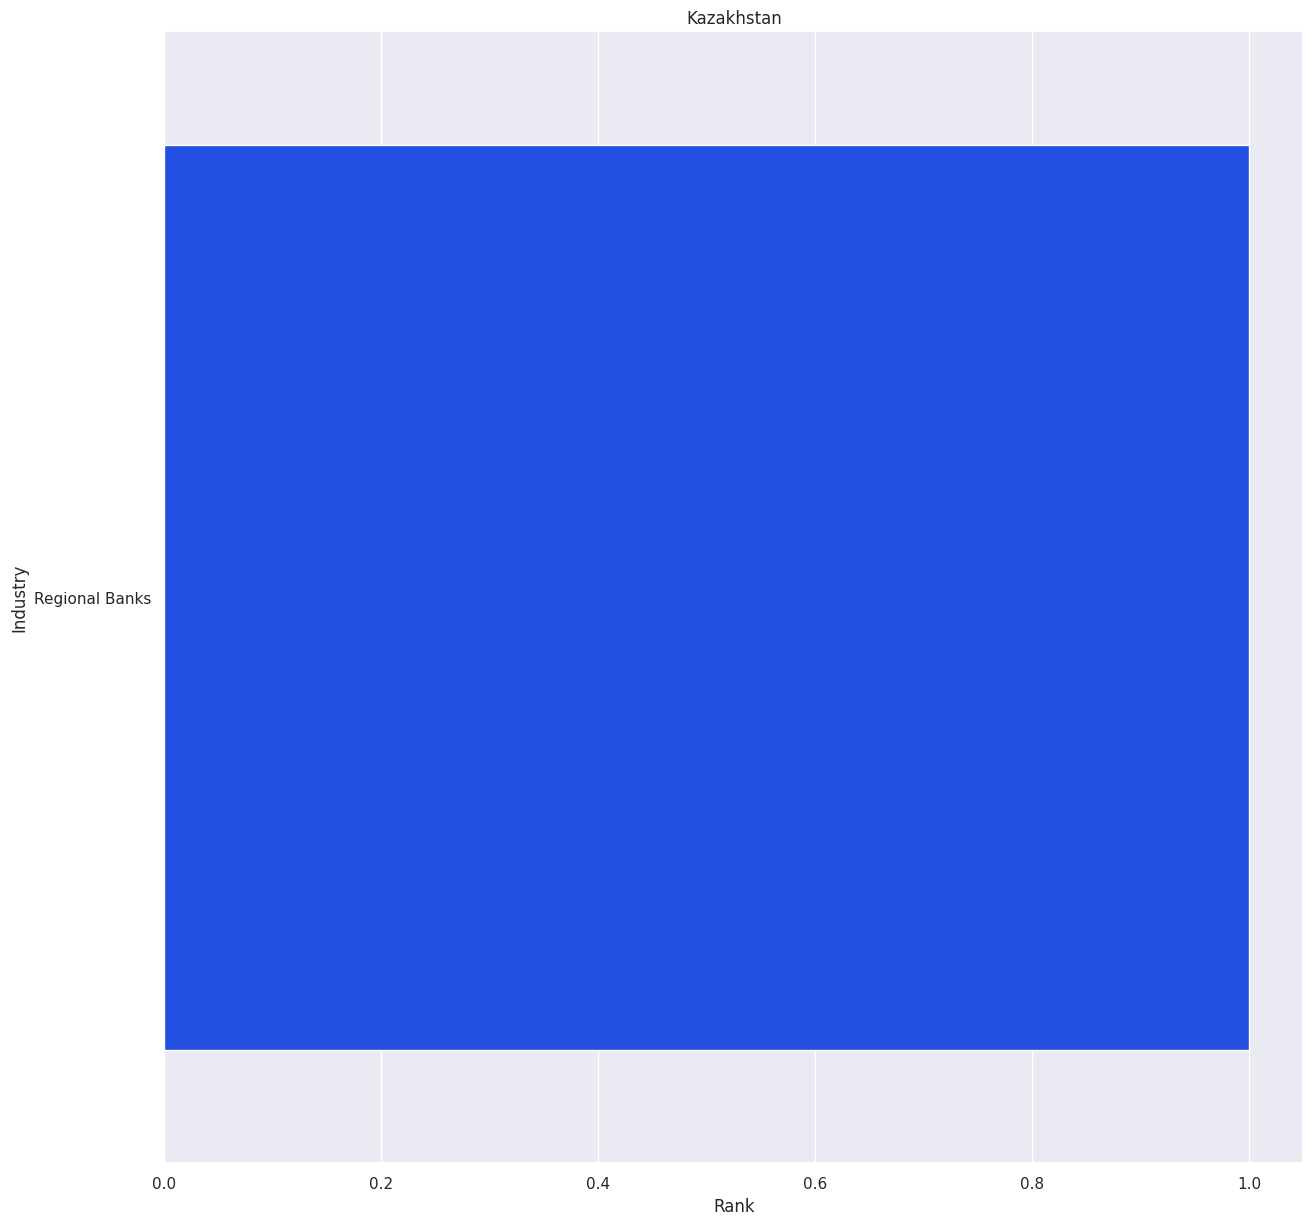

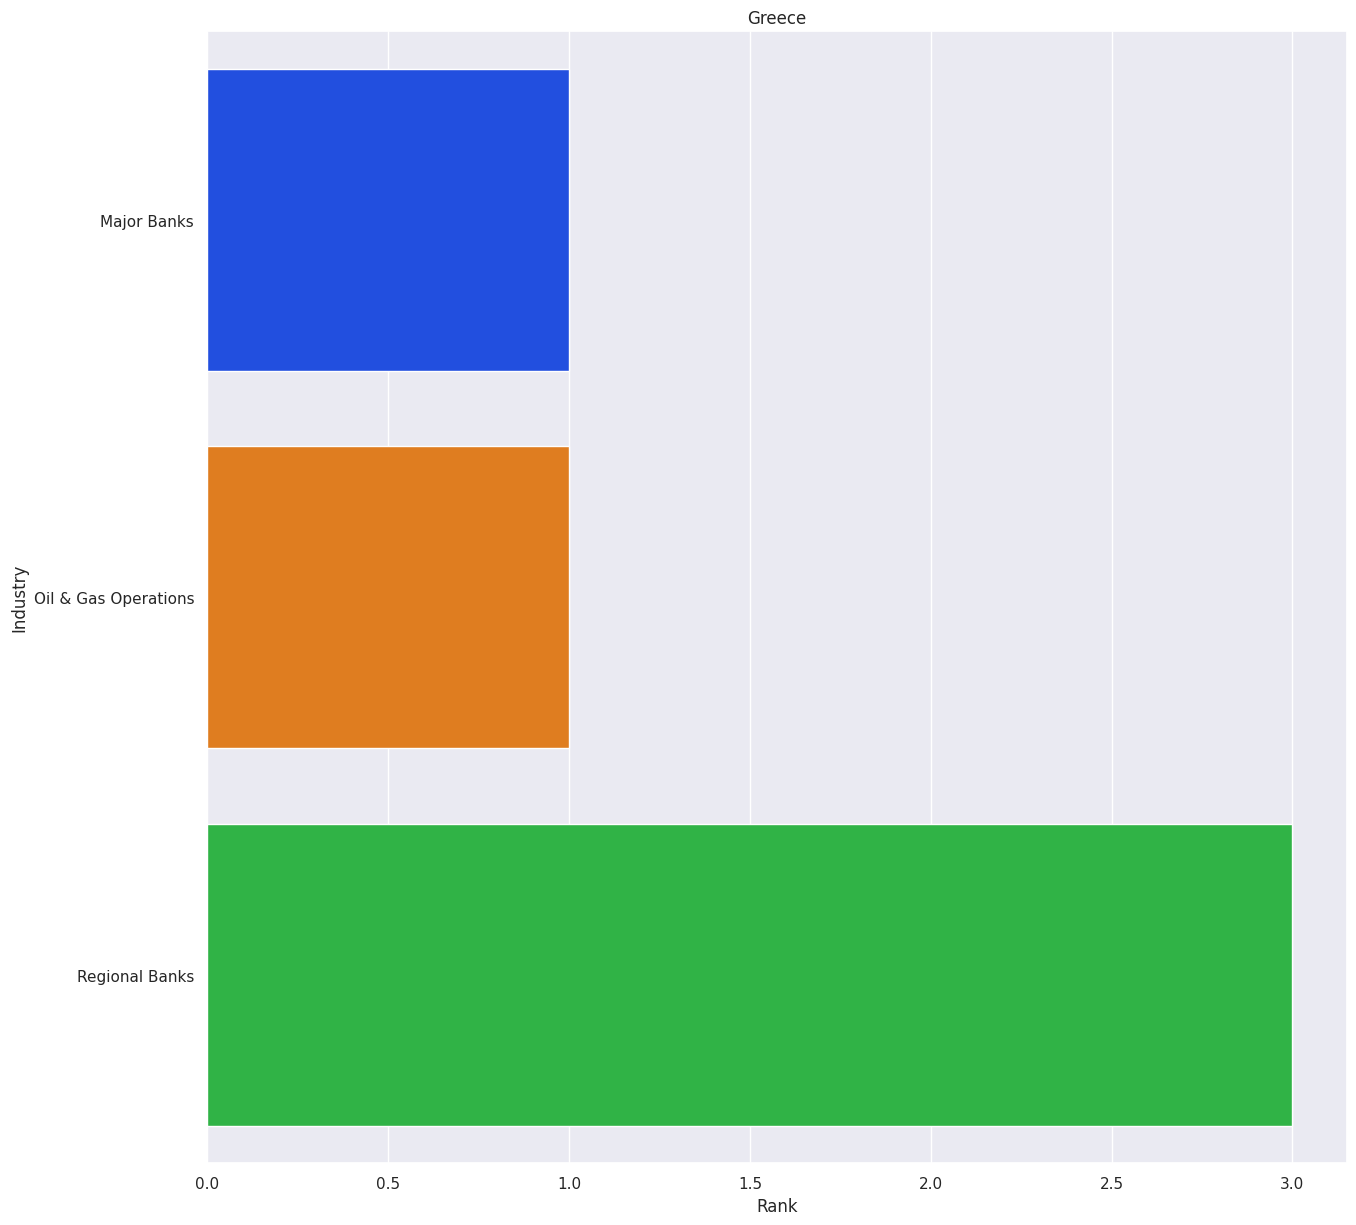

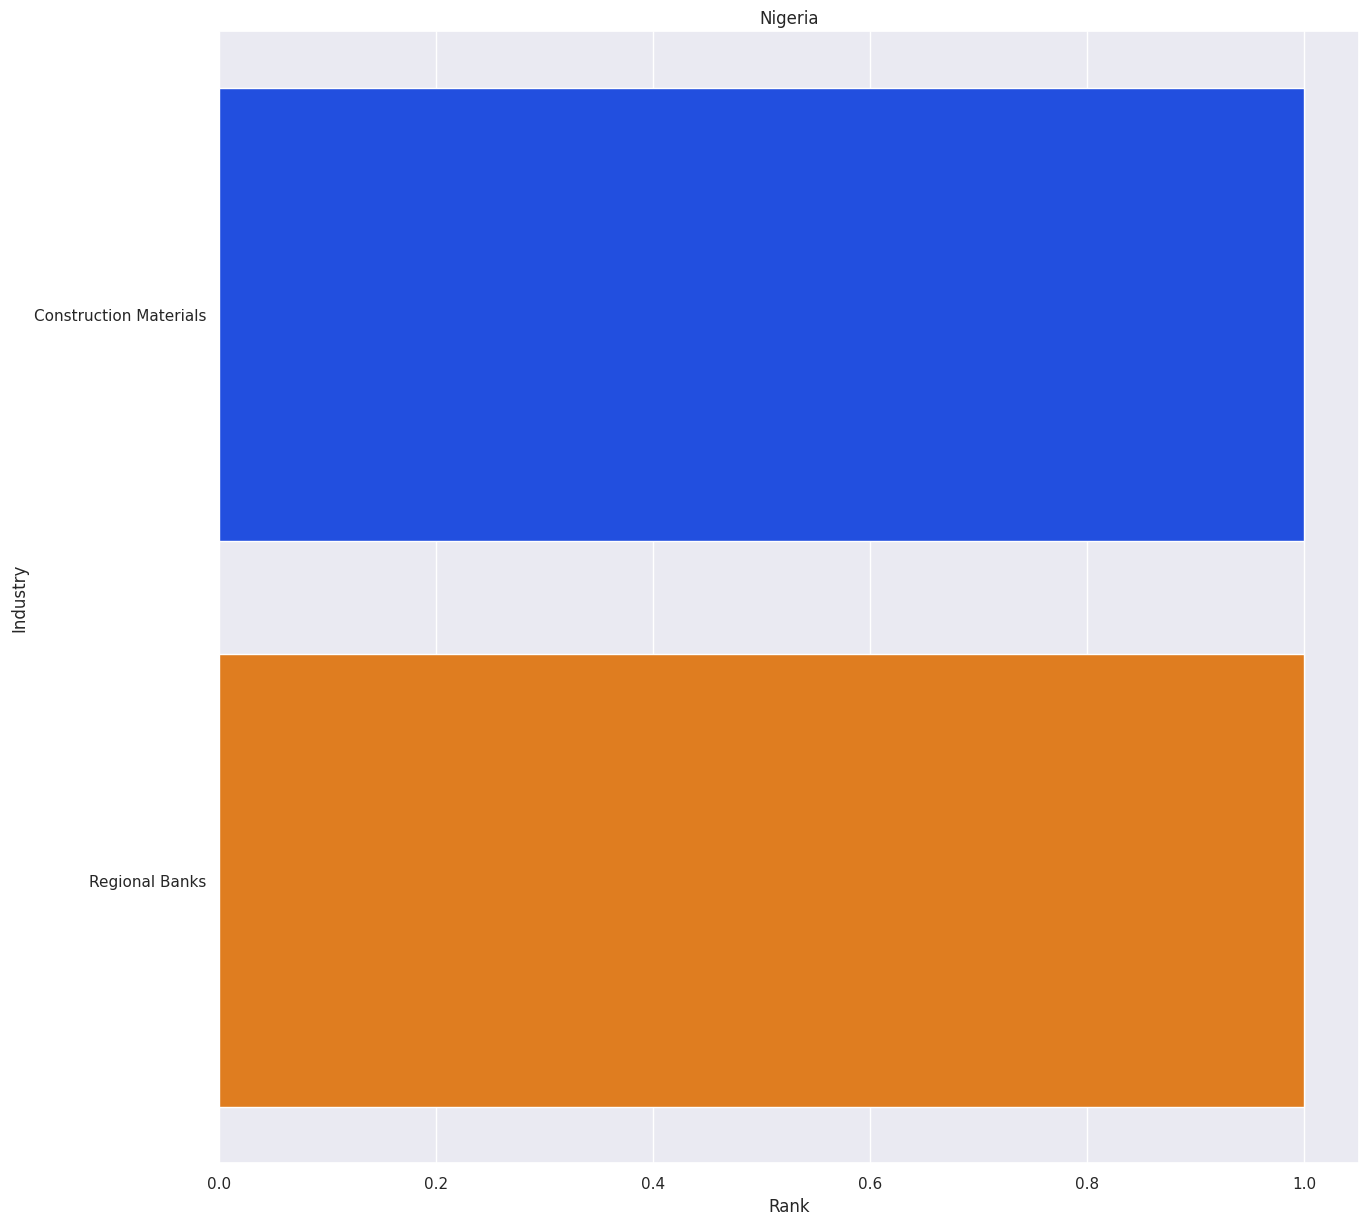

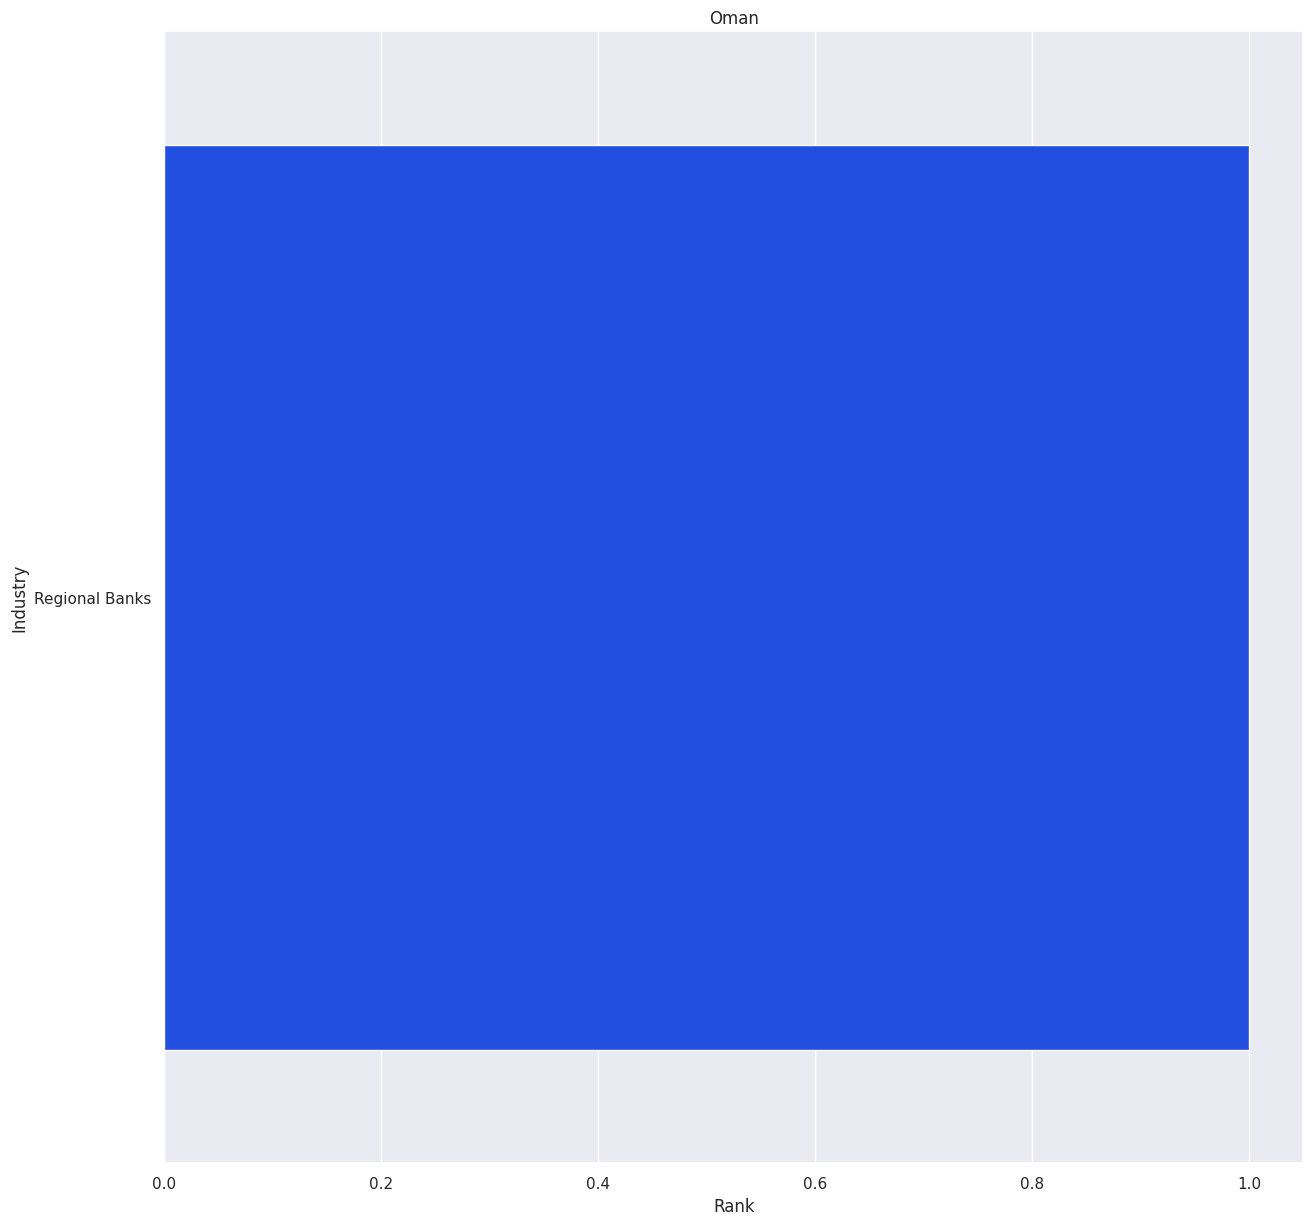

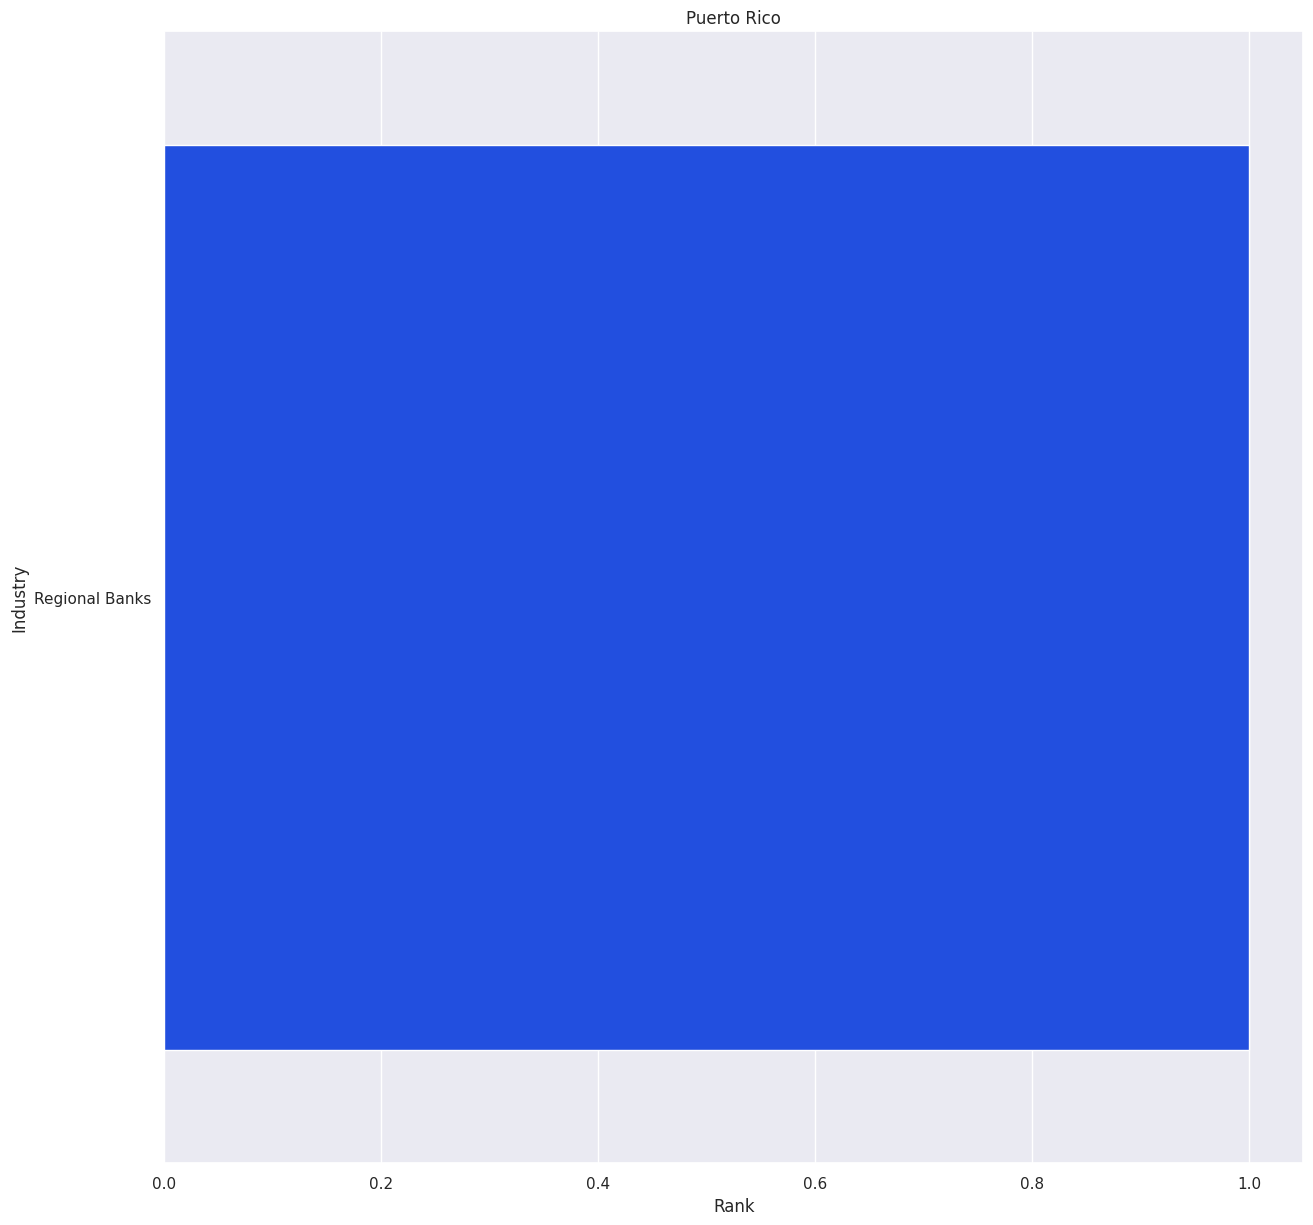

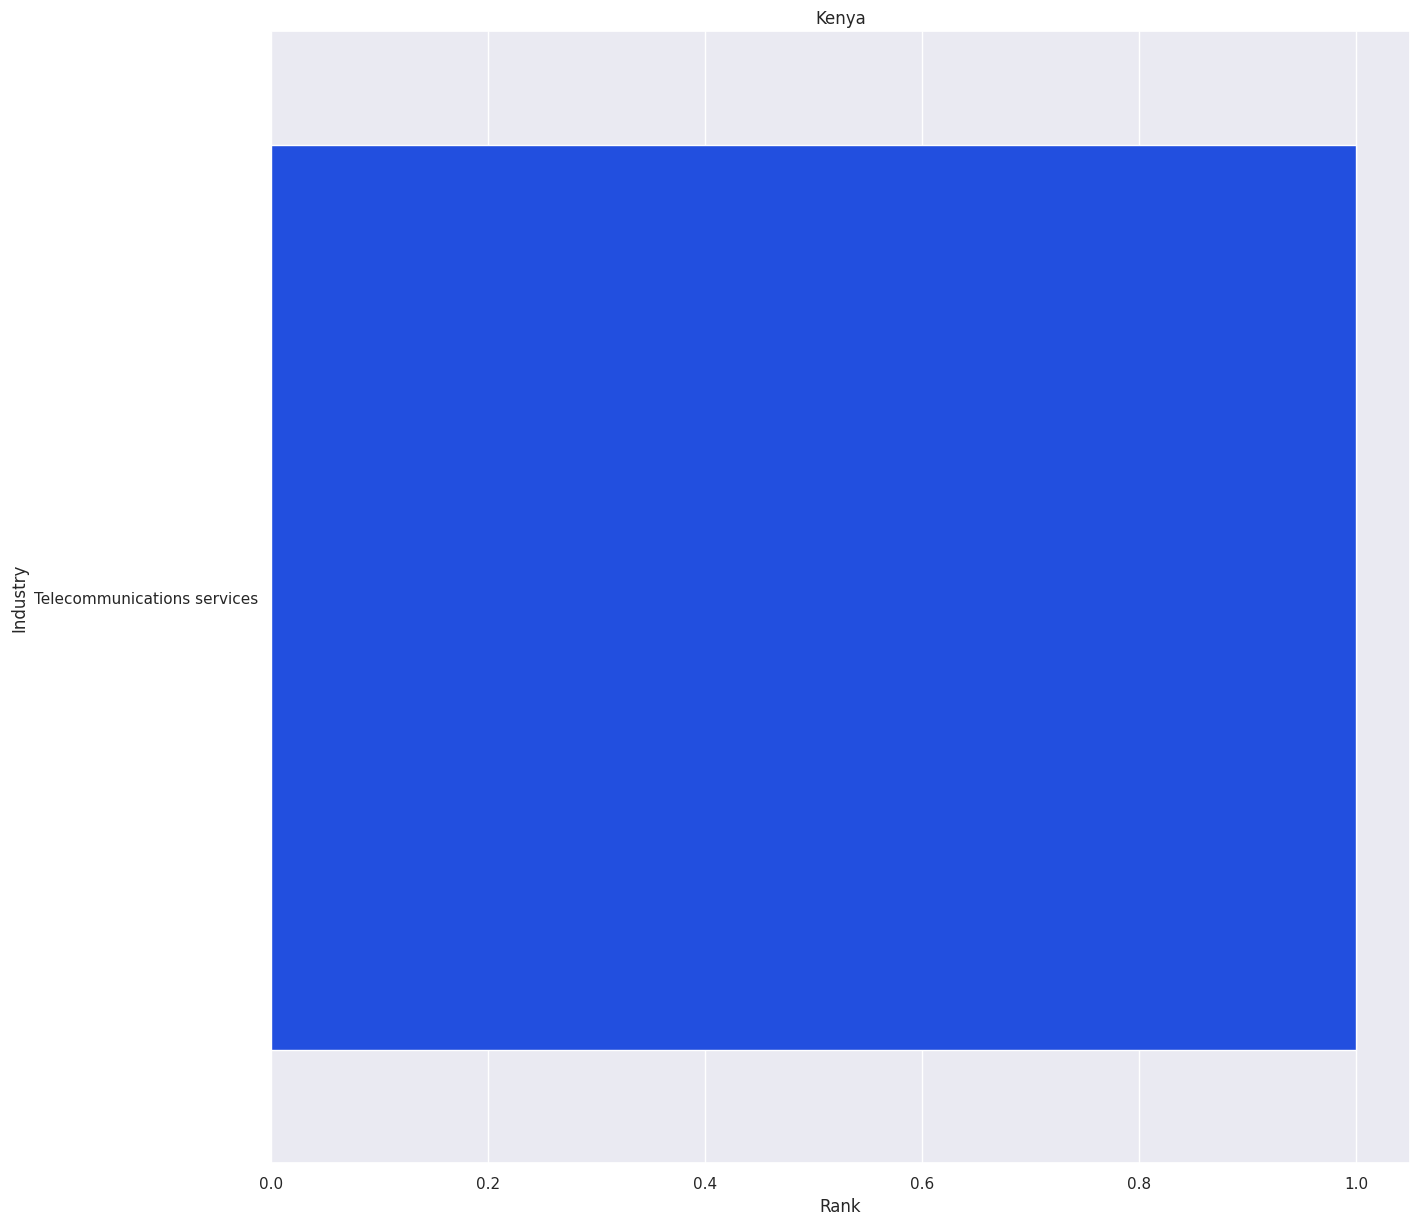

In [59]:
for country in countries:
    country_ = forbes[forbes['Country'] ==  country]
    country_ = country_.groupby('Industry', as_index = False).count()
    fig, ax = plt.subplots()
    sns.set(rc={'figure.figsize':(14.7,14.7)})
    sns.barplot(data = country_, x = "Rank", y = "Industry", orient = 'h', palette = "bright").set_title(country)
plt.show()

In [60]:
##### Conclude this section here #####
##### This could also go in a flask/django application #####

#### Correlation Heatmap
Show which countries are in which industries all in one page. Neat. This allows us to see things like the United States and Japan being in most industries, and regional banking being an industry in most countries.

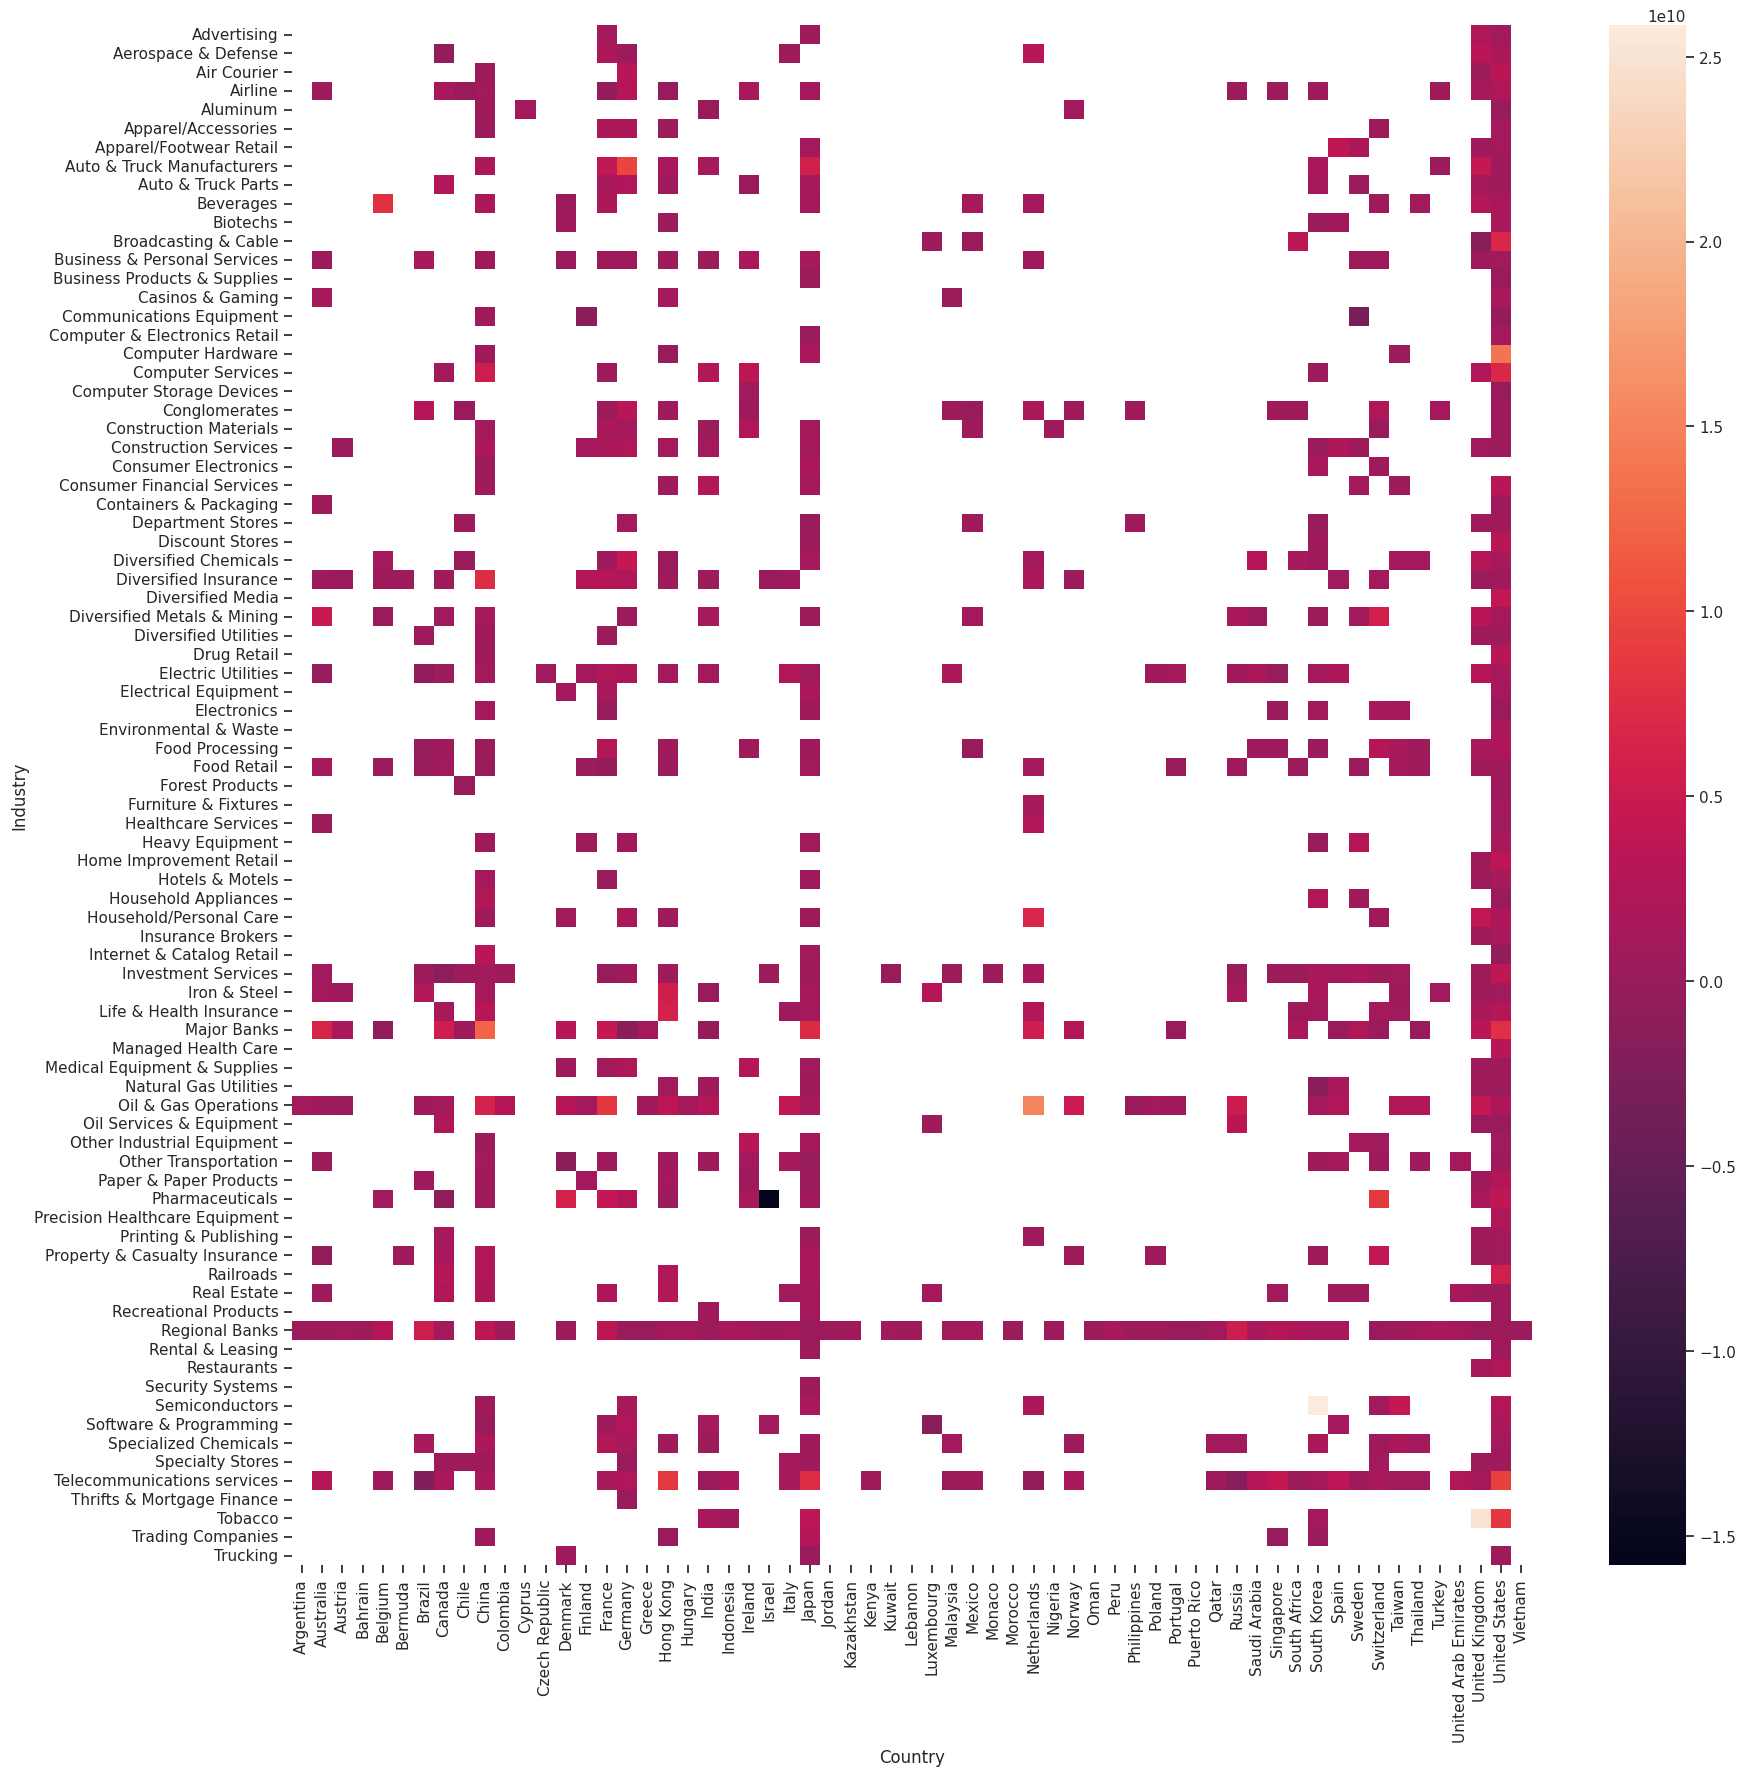

In [61]:
cols = ['Company', 'Country', 'Industry', 'Profits']
forbesProfits = forbes.sort_values("Profits", ascending = False)
forbesProfits = forbesProfits[cols]
forbes1 = forbesProfits.iloc[:100]
forbes2 = forbesProfits.iloc[950:1050]

sns.set_theme(style = "ticks")
forbesProfits = forbesProfits.pivot_table(index = 'Industry', columns = 'Country', values = 'Profits')
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(forbesProfits, annot=False, ax=ax)
plt.show()

### Top Companies vs Mid-Table Relative to Assets

##### Regression/Scatter plots for highly correlated numerical data: Assets, Sales, Profits, Market Cap, Employees
Compare relationship among highest ranked companies and those ranked in the middle of the table

In [62]:
forbesAssets = forbes.sort_values("Assets", ascending = False)

cols = ['Assets', 'Sales', 'Profits', 'Market Capitalization', 'Employees']
forbesAssets = forbesAssets[cols]
forbesAssets = forbesAssets.rename(columns = {'Market Capitalization': 'Market Cap'})

forbes_top100 = forbesAssets.iloc[:100]
forbes_mid = forbesAssets.iloc[950:1050]

In [63]:
corr = forbesAssets.corr()
corr.style.background_gradient(cmap='RdBu_r')

In [64]:
corr = forbes_top100.corr()
corr.style.background_gradient(cmap='RdBu_r')

In [65]:
corr = forbes_mid.corr()
corr.style.background_gradient(cmap='RdBu_r')

Compare correlations here to justify which scatterplots you are making

- Market Cap and Profits are most correlated and much more true for the top 100
- Market Cap and Sales highly correlated for top 100 but not for middle of the table
- Profits and Sales highly correlated for top 100
- Employees and Sales highly correlated for top 100

# Market Cap vs Profits

Top 100

Text(0.5, 1.0, 'Top 100')

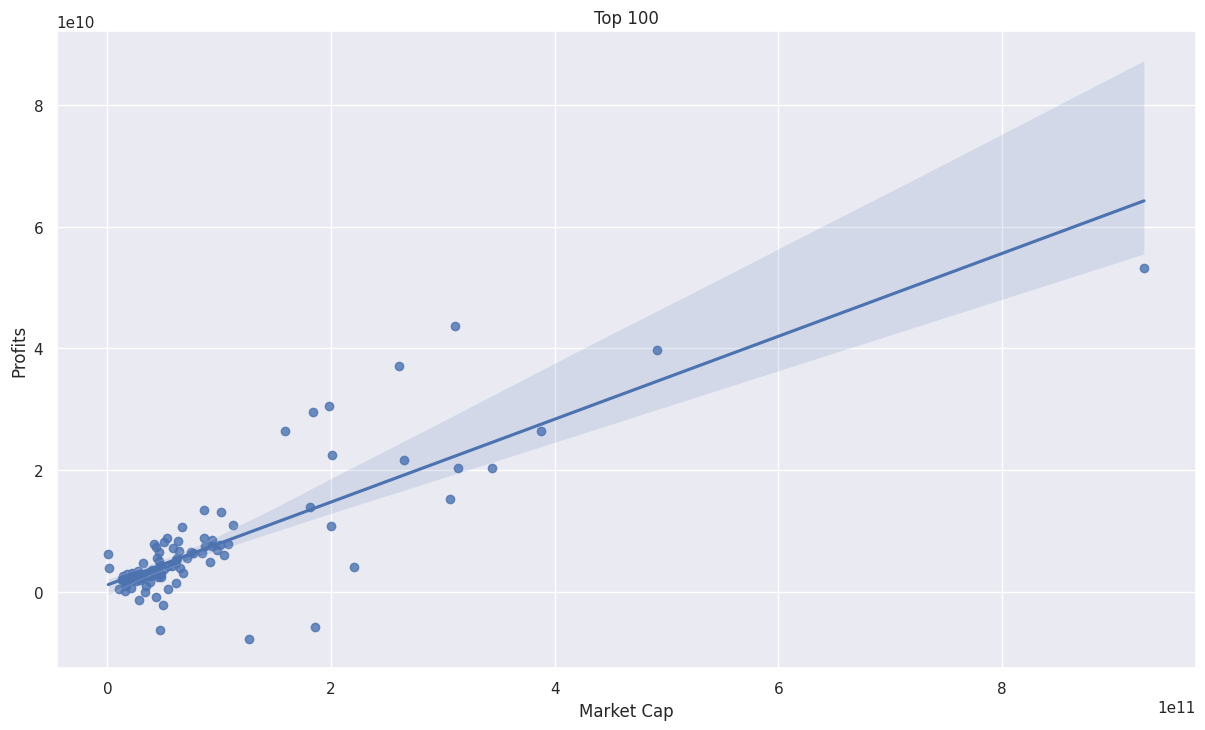

In [66]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Cap", y = "Profits", data = forbes_top100).set_title("Top 100")

Text(0.5, 1.0, 'Middle')

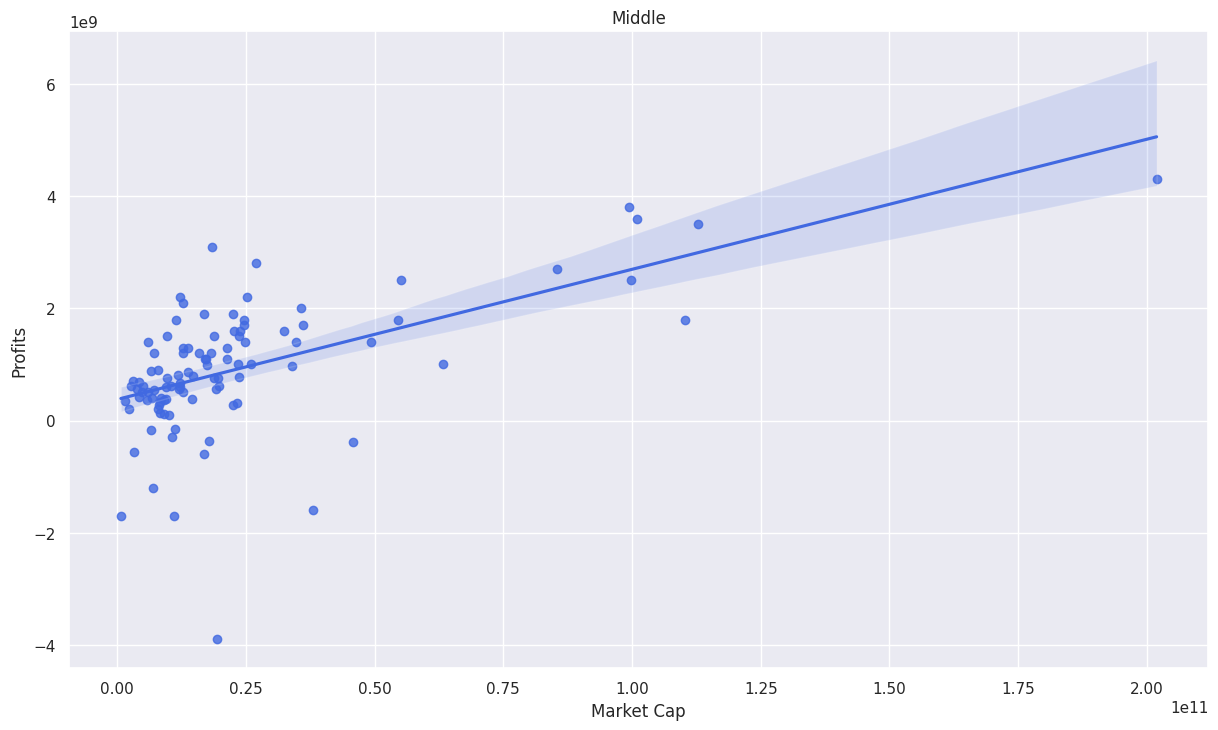

In [67]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Cap", y = "Profits", data = forbes_mid, color = 'royalblue').set_title("Middle")

Text(0.5, 1.0, 'Forbes Top 2000')

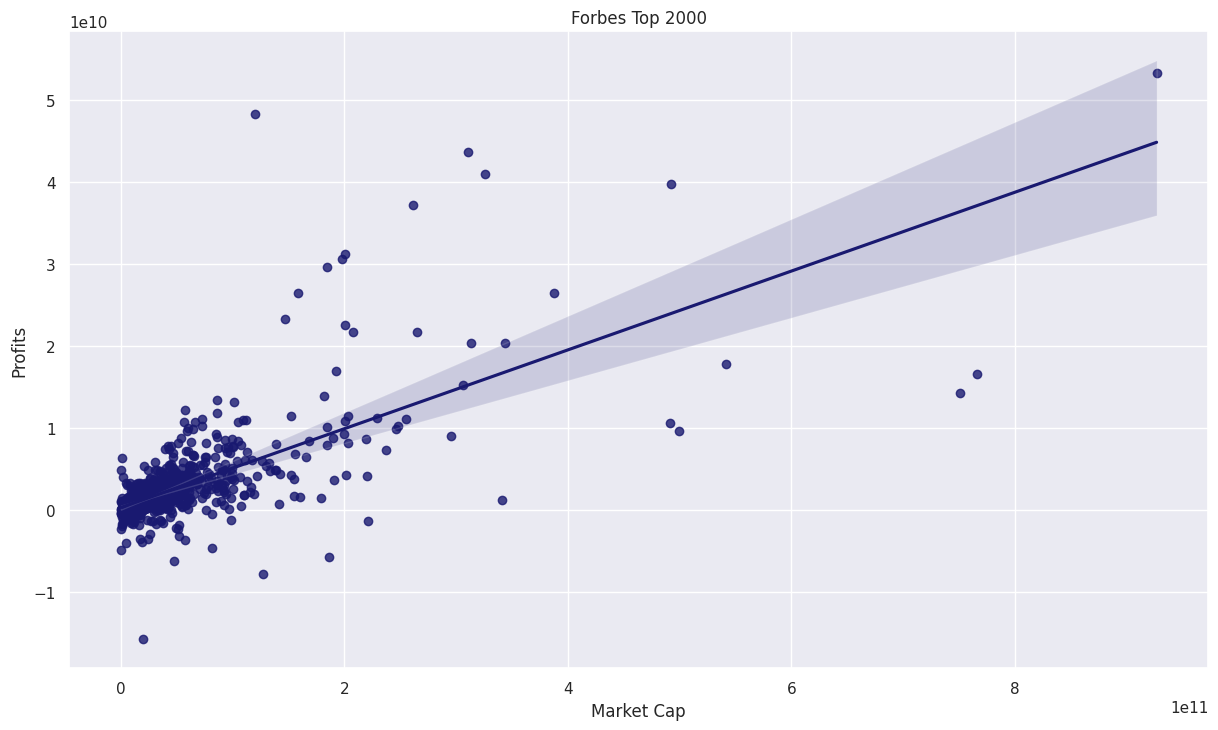

In [68]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Market Cap", y = "Profits", data = forbesAssets, color = 'midnightblue').set_title("Forbes Top 2000")

# Market Cap vs Sales

Top 100

Text(0.5, 1.0, 'Top 100')

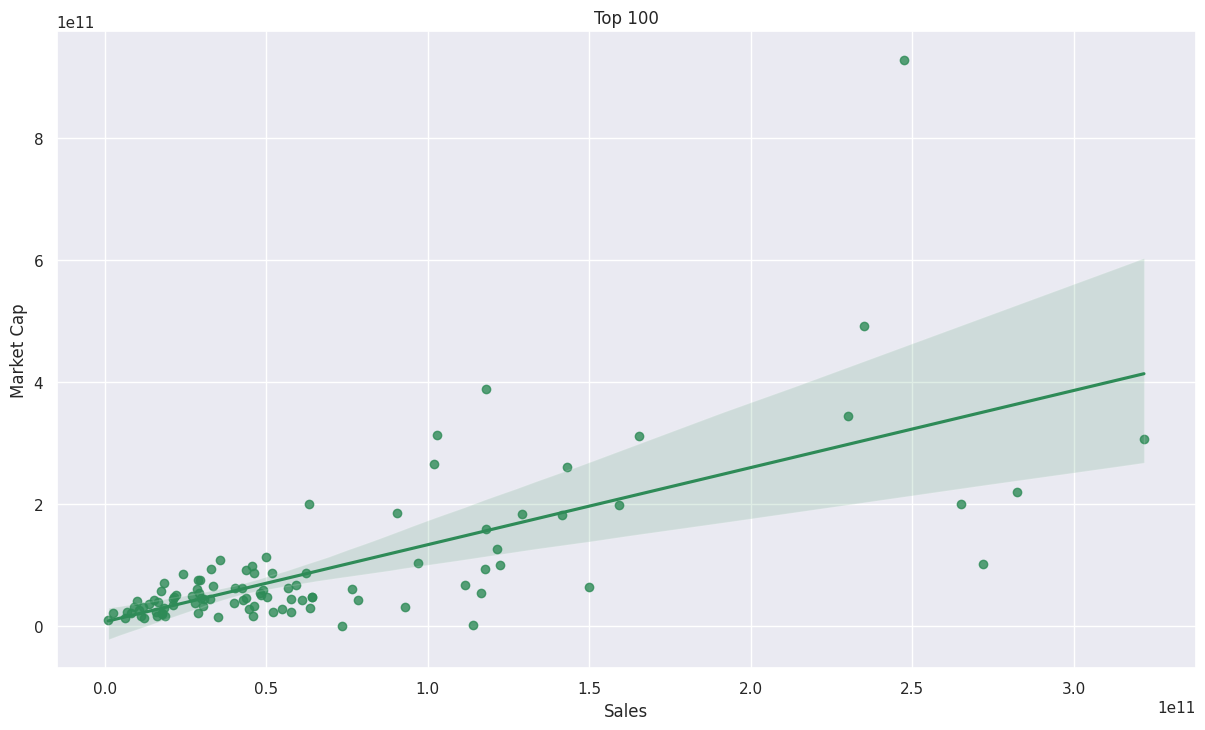

In [69]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Sales", y = "Market Cap", data = forbes_top100, color = 'seagreen').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

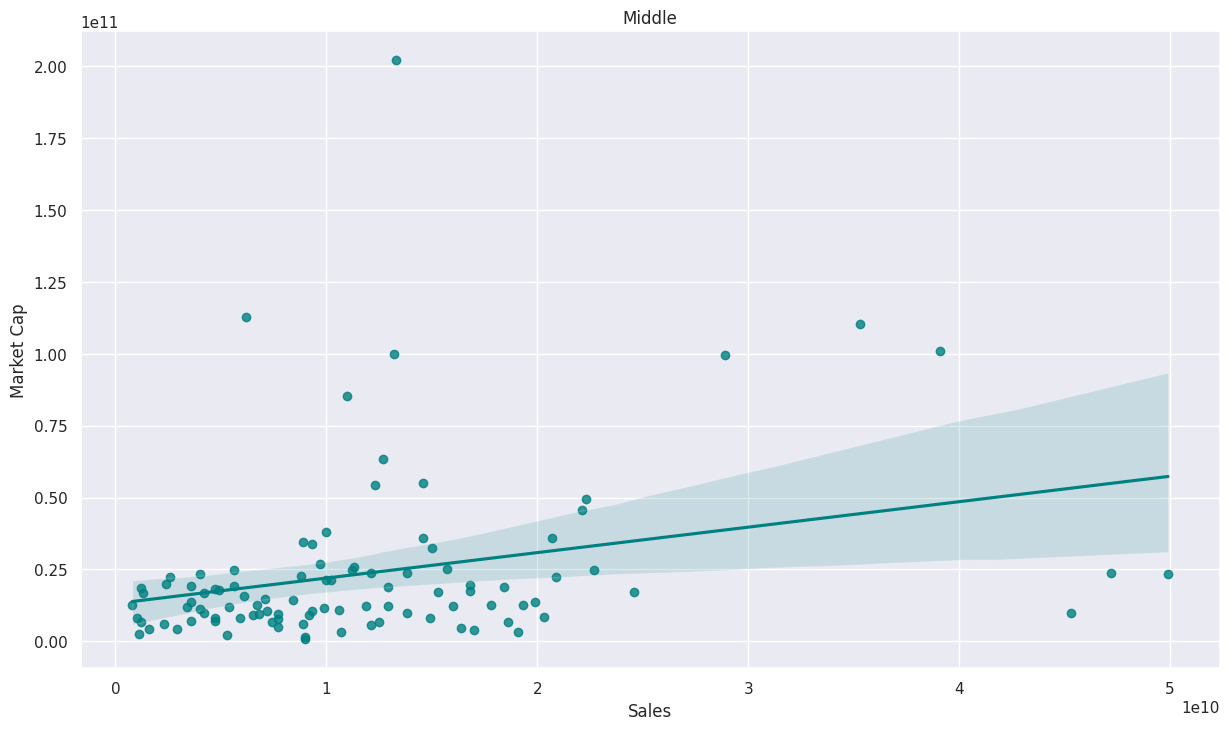

In [70]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Sales", y = "Market Cap", data = forbes_mid, color = 'teal').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

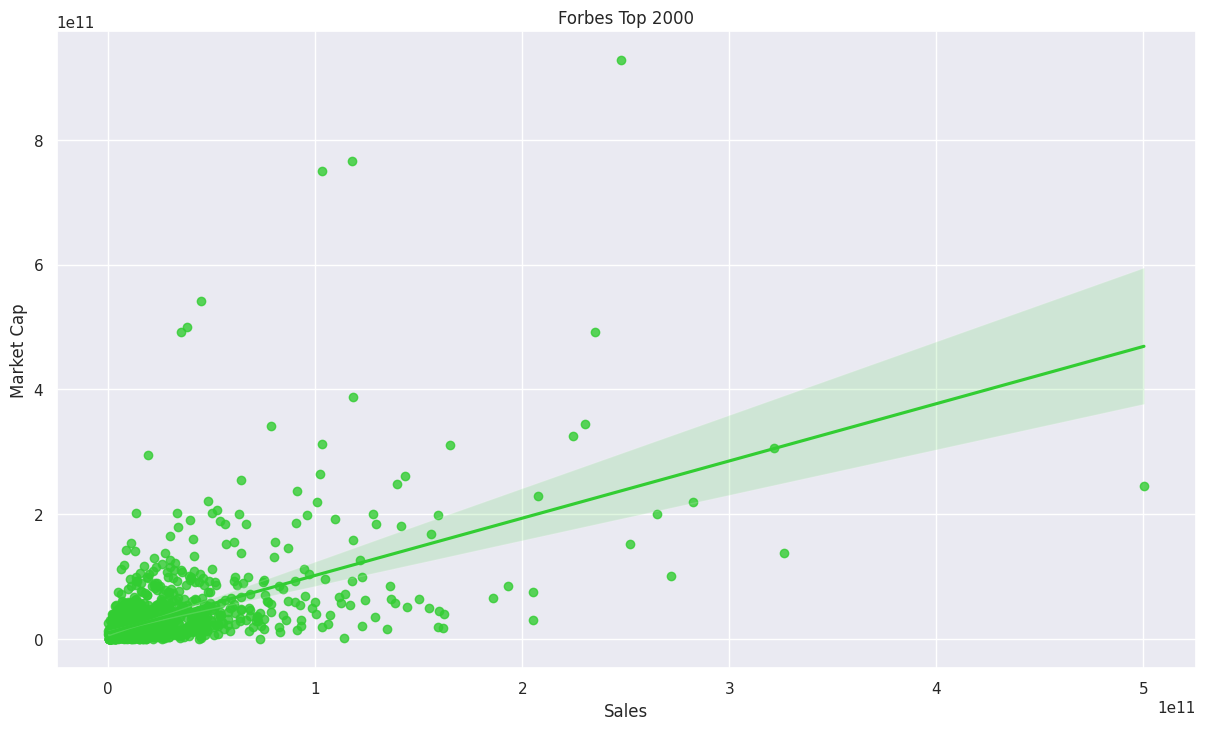

In [71]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Sales", y = "Market Cap", data = forbesAssets, color = 'limegreen').set_title("Forbes Top 2000")

# Sales vs Profits

Top 100

Text(0.5, 1.0, 'Top 100')

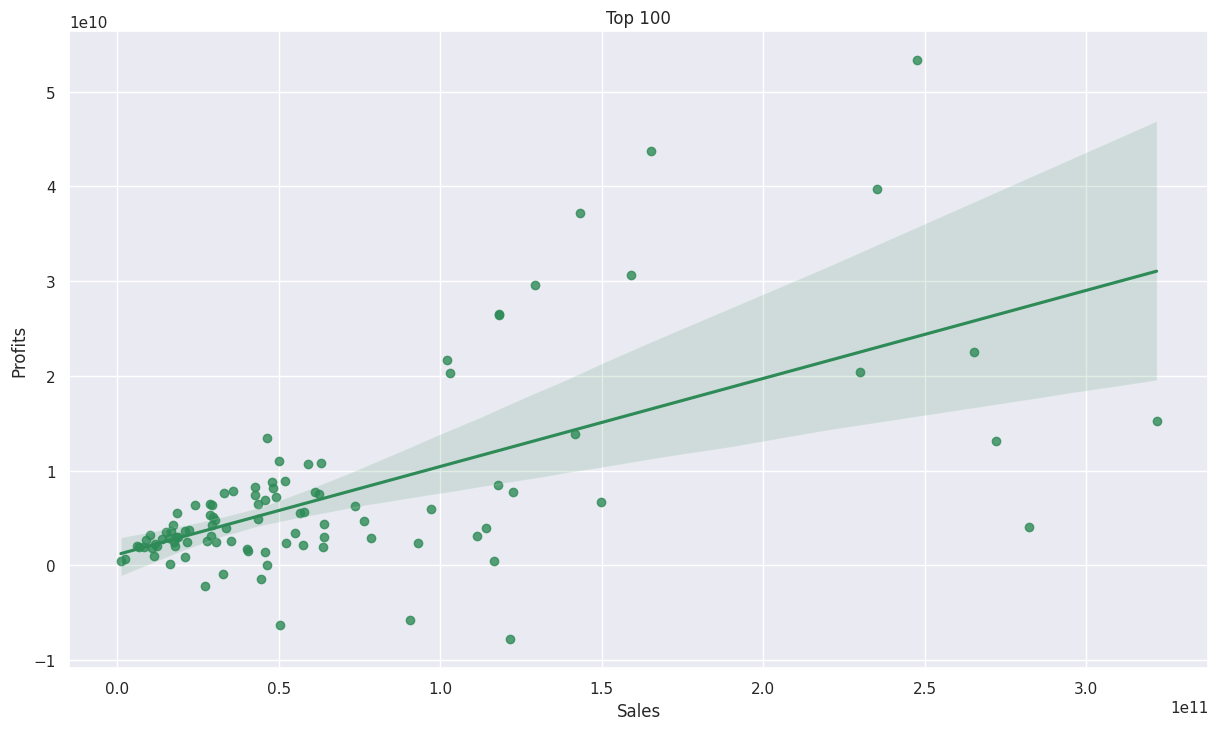

In [72]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Sales", y = "Profits", data = forbes_top100, color = 'seagreen').set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

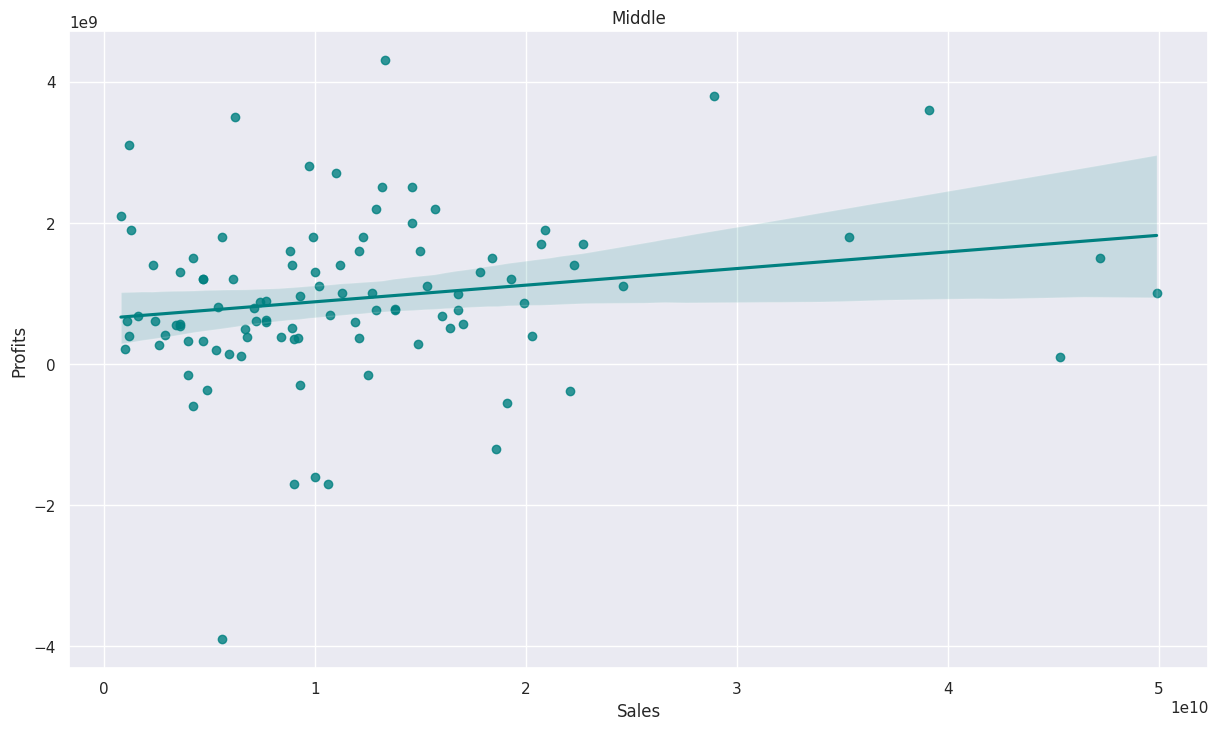

In [73]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Sales", y = "Profits", data = forbes_mid, color = 'teal').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

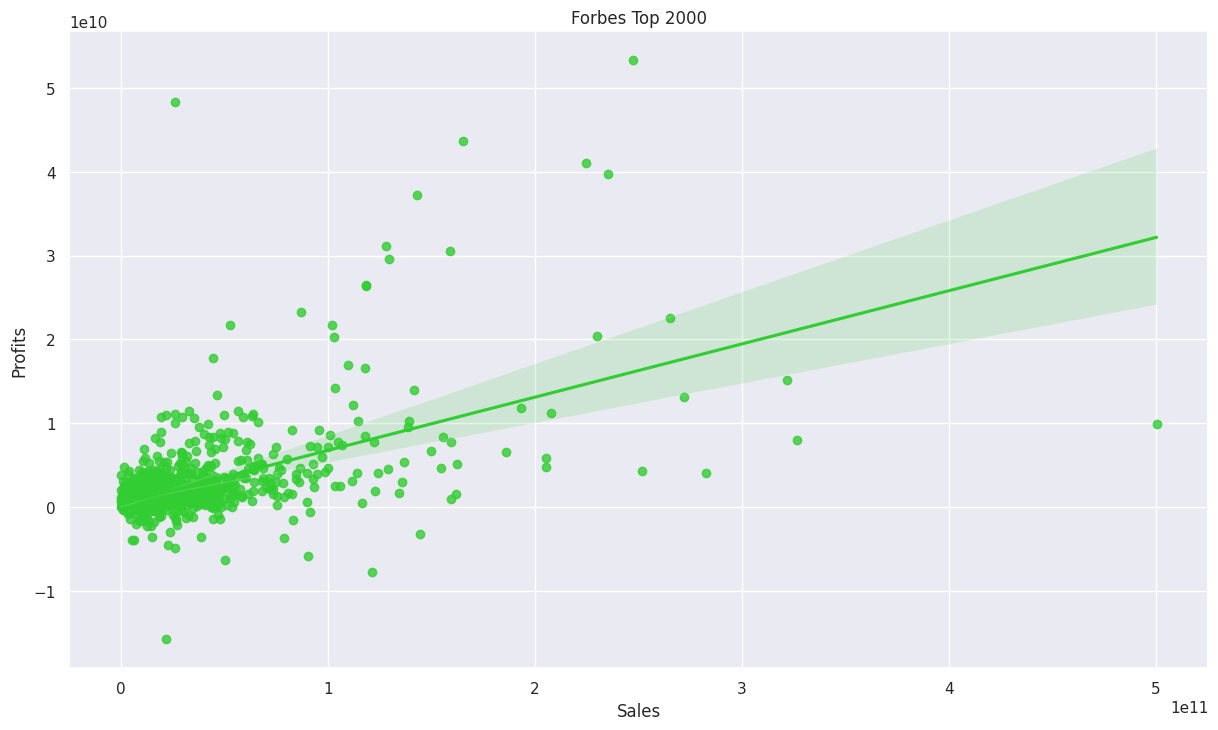

In [74]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Sales", y = "Profits", data = forbesAssets, color = 'limegreen').set_title("Forbes Top 2000")

# Employees vs Sales

Top 100

Text(0.5, 1.0, 'Top 100')

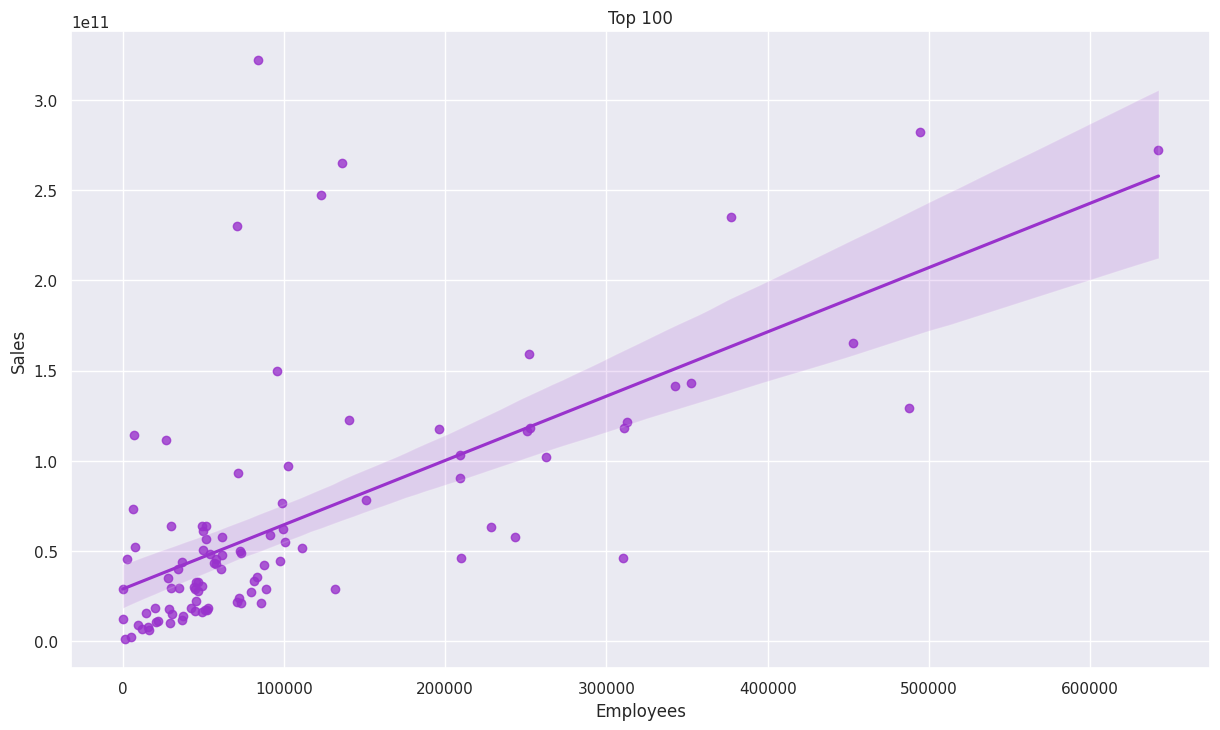

In [75]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Employees", y = "Sales", data = forbes_top100, color = "darkorchid").set_title("Top 100")

Middle

Text(0.5, 1.0, 'Middle')

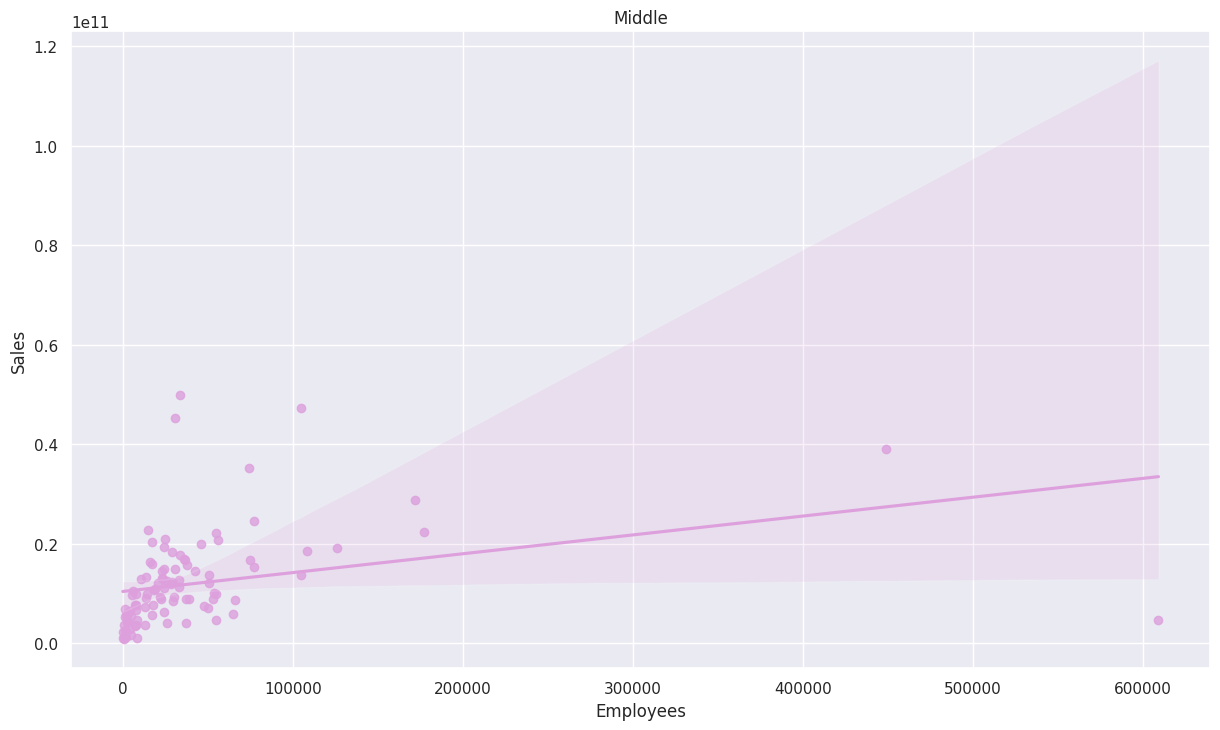

In [76]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Employees", y = "Sales", data = forbes_mid, color = 'plum').set_title("Middle")

All

Text(0.5, 1.0, 'Forbes Top 2000')

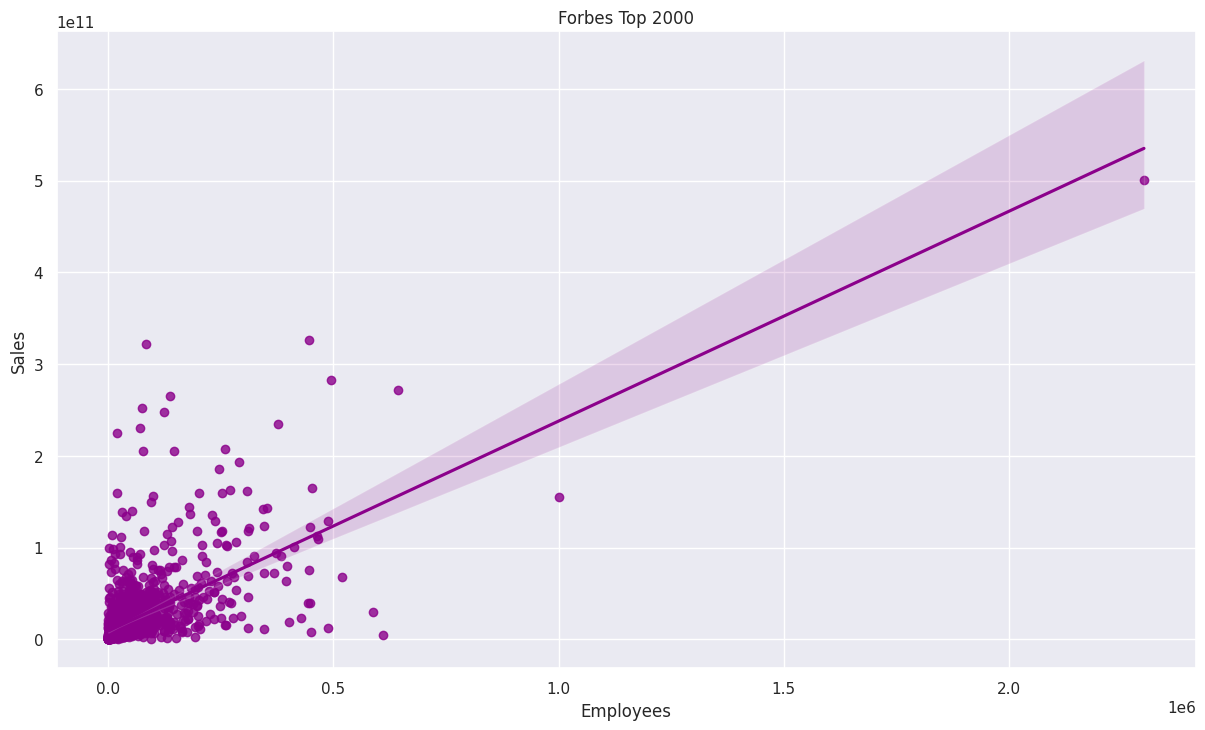

In [77]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.regplot(x = "Employees", y = "Sales", data = forbesAssets, color = 'darkmagenta').set_title("Forbes Top 2000")

# Conclusion

- Discuss findings about countries and their biggest industries

- Discuss the biggest industries overall

- Discuss when todays biggest companies were founded